<a href="https://colab.research.google.com/github/lawrenceneely/ltneely2.github.io/blob/master/LawrenceNeelyFinal2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Covid-Impact**

![Coronavirus particle Image](https://wisconsindot.gov/PublishingImages/covid19.png)

In [102]:
import pandas as pd
#import bqplot
import numpy as np
import traitlets
import ipywidgets as widgets
import matplotlib.pyplot as plt
import plotly.express as pl
#import dash  # (version 1.12.0) pip install dash
#import dash_core_components as dcc
#import dash_html_components as html
#from dash.dependencies import Input, Output
# from _future_ import print_function
import IPython
from ipywidgets import interact, interactive, fixed, interact_manual
from IPython.core.display import display, HTML
import requests
import folium
import PIL
import io
from io import BytesIO
from PIL import Image
from IPython import display
import base64
from base64 import b64decode
#import seaborn as sns


#app = dash.Dash(__name__)

import plotly.graph_objects as go
%matplotlib inline


# **Dataset Description**

Name: Covid-19 Data Repository by the Center for Systems Science and Engineering (CSSE) at Johns Hopkins University

Where to Find Dataset: https://github.com/CSSEGISandData/COVID-19

DataSet License: There is no license for the dataset

In [77]:
# Dataset is from Covid-19 Data repository by the CSSE at Johns Hopkins University
# URL to retrieve it https://github.com/CSSEGISandData/COVID-19
cases_state = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/web-data/data/cases_state.csv')
country_covid = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/web-data/data/cases_country.csv')
covid_death = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv',)
covid_recovered = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
covid_confirmed = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
us_confirmed = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports_us/05-03-2021.csv')
us_cfdeath = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv')
us_states = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv')

In [78]:
#data cleaning - rename province/state , country/region
covid_death = covid_death.rename(columns = {'Province/State': 'State', 'Country/Region': 'Country'})
covid_confirmed = covid_confirmed.rename(columns = {'Province/State': 'State', 'Country/Region': 'Country'})
covid_recovered = covid_recovered.rename(columns = {'Province/State': 'State', 'Country/Region': 'Country'})
country_covid = country_covid.rename(columns = {'Country_Region': 'country'})
us_confirmed = us_confirmed.rename(columns = {'Province_State': 'state', 'Country_Region': 'country'})

In [79]:
country_covid

,country,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3
0,Afghanistan,2021-05-15 02:20:46,33.939110,67.709953,63355.0,2730.0,54634.0,5991.0,162.747752,NaN,NaN,4.309052,4,AFG
1,Albania,2021-05-15 02:20:46,41.153300,20.168300,131939.0,2427.0,122105.0,7407.0,4584.717493,NaN,NaN,1.839486,8,ALB
2,Algeria,2021-05-15 02:20:46,28.033900,1.659600,125059.0,3360.0,87137.0,34562.0,285.190480,NaN,NaN,2.686732,12,DZA
3,Andorra,2021-05-15 02:20:46,42.506300,1.521800,13510.0,127.0,13155.0,228.0,17485.277940,NaN,NaN,0.940044,20,AND
4,Angola,2021-05-15 02:20:46,-11.202700,17.873900,30030.0,651.0,25650.0,3729.0,91.370277,NaN,NaN,2.167832,24,AGO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,Vietnam,2021-05-15 02:20:46,14.058324,108.277199,3816.0,35.0,2657.0,1124.0,3.920337,NaN,NaN,0.917191,704,VNM
188,West Bank and Gaza,2021-05-15 02:20:46,31.952200,35.233200,303270.0,3401.0,288891.0,10978.0,5944.820026,NaN,NaN,1.121443,275,PSE
189,Yemen,2021-05-15 02:20:46,15.552727,48.516388,6523.0,1285.0,3008.0,2230.0,21.870204,NaN,NaN,19.699525,887,YEM
190,Zambia,2021-05-15 02:20:46,-13.133897,27.849332,92356.0,1260.0,90699.0,397.0,502.372830,NaN,NaN,1.364286,894,ZMB


**Dataset Summary**

The Dataset is a Covid-19 dataset for all the confirmed,deaths and recovered cases in the highest recorded covid countries.

**Data Type**

The main columns we will be using are Country, Lat,Long_,Confirmed,Deaths and Recovered

In [7]:
country_covid
Clean = country_covid.dropna(subset=['Lat','Long_'])

#Remove all NaN from the Lat and Long_ columns 


In [80]:
Clean

,country,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3
0,Afghanistan,2021-05-15 00:20:46,33.939110,67.709953,63355.0,2730.0,54634.0,5991.0,162.747752,NaN,NaN,4.309052,4,AFG
1,Albania,2021-05-15 00:20:46,41.153300,20.168300,131939.0,2427.0,122105.0,7407.0,4584.717493,NaN,NaN,1.839486,8,ALB
2,Algeria,2021-05-15 00:20:46,28.033900,1.659600,125059.0,3360.0,87137.0,34562.0,285.190480,NaN,NaN,2.686732,12,DZA
3,Andorra,2021-05-15 00:20:46,42.506300,1.521800,13510.0,127.0,13155.0,228.0,17485.277940,NaN,NaN,0.940044,20,AND
4,Angola,2021-05-15 00:20:46,-11.202700,17.873900,29695.0,649.0,25629.0,3417.0,90.350995,NaN,NaN,2.185553,24,AGO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,Vietnam,2021-05-15 00:20:46,14.058324,108.277199,3816.0,35.0,2657.0,1124.0,3.920337,NaN,NaN,0.917191,704,VNM
188,West Bank and Gaza,2021-05-15 00:20:46,31.952200,35.233200,303270.0,3401.0,288891.0,10978.0,5944.820026,NaN,NaN,1.121443,275,PSE
189,Yemen,2021-05-15 00:20:46,15.552727,48.516388,6523.0,1285.0,3008.0,2230.0,21.870204,NaN,NaN,19.699525,887,YEM
190,Zambia,2021-05-15 00:20:46,-13.133897,27.849332,92356.0,1260.0,90699.0,397.0,502.372830,NaN,NaN,1.364286,894,ZMB


In [81]:
covid_confirmedtot = int(country_covid['Confirmed'].sum())
covid_deathtot = int(country_covid['Deaths'].sum())
covid_recoveredtot = int(country_covid['Recovered'].sum())
cases_statetot = (country_covid['Confirmed'].sum)

In [85]:
# displaying the total stats

display(HTML("<div style = 'background-color:black; padding: 30px '>" +
             "<span style='color: yellow; font-size:30px;;display:inline-blockborder: 1px solid gray; vertical-align: middle; border-radius: 2px; background:blue '> Confirmed: "  + str(covid_confirmedtot) +"</span>" +
             "<span style='color: red; font-size:30px;margin-left:20px;display:inline-blockborder: 1px solid gray; vertical-align: middle; border-radius: 2px; background:white'> Deaths: " + str(covid_deathtot) + "</span>"+
             "<span style='text-decoration:blink; color: green; font-size:30px; margin-left:20px;display:inline-blockborder: 1px solid gray; vertical-align: middle; border-radius: 2px; background:orange'> Recovered: " + str(covid_recoveredtot) + "</span>"+
             "</div>")
       )


**Quick Visualization that is used as a header to display the total Confirmed,Death and Recovered Cases in the World at the time**

In [12]:
sort_countries = country_covid.sort_values('Deaths', ascending=False)
# Sort the countries by Deaths

In [83]:
sort_countries

,country,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3
178,US,2021-05-15 00:20:46,40.000000,-100.000000,32892767.0,585221.0,NaN,NaN,9983.651954,NaN,NaN,1.779178,840,USA
23,Brazil,2021-05-15 00:20:46,-14.235000,-51.925300,15519525.0,432628.0,13703280.0,1383617.0,7301.264655,NaN,NaN,2.787637,76,BRA
79,India,2021-05-15 00:20:46,20.593684,78.962880,24046809.0,262317.0,20079599.0,3704893.0,1742.516854,NaN,NaN,1.090860,356,IND
114,Mexico,2021-05-15 00:20:46,23.634500,-102.552800,2375115.0,219901.0,1895483.0,259731.0,1858.574625,NaN,NaN,9.258541,484,MEX
182,United Kingdom,2021-05-15 00:20:46,55.000000,-3.000000,4462599.0,127930.0,15213.0,4319456.0,6573.665759,NaN,NaN,2.866715,826,GBR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,Micronesia,2021-05-15 00:20:46,7.425600,150.550800,1.0,0.0,1.0,0.0,0.878619,NaN,NaN,0.000000,583,FSM
144,Saint Kitts and Nevis,2021-05-15 00:20:46,17.357822,-62.782998,45.0,0.0,44.0,1.0,84.599188,NaN,NaN,0.000000,659,KNA
111,Marshall Islands,2021-05-15 00:20:46,7.131500,171.184500,4.0,0.0,4.0,0.0,6.847791,NaN,NaN,0.000000,584,MHL
147,Samoa,2021-05-15 00:20:46,-13.759000,-172.104600,3.0,0.0,2.0,1.0,1.529598,NaN,NaN,0.000000,882,WSM


In [28]:
Clean

,country,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3
0,Afghanistan,2021-05-15 00:20:46,33.939110,67.709953,63355.0,2730.0,54634.0,5991.0,162.747752,NaN,NaN,4.309052,4,AFG
1,Albania,2021-05-15 00:20:46,41.153300,20.168300,131939.0,2427.0,122105.0,7407.0,4584.717493,NaN,NaN,1.839486,8,ALB
2,Algeria,2021-05-15 00:20:46,28.033900,1.659600,125059.0,3360.0,87137.0,34562.0,285.190480,NaN,NaN,2.686732,12,DZA
3,Andorra,2021-05-15 00:20:46,42.506300,1.521800,13510.0,127.0,13155.0,228.0,17485.277940,NaN,NaN,0.940044,20,AND
4,Angola,2021-05-15 00:20:46,-11.202700,17.873900,29695.0,649.0,25629.0,3417.0,90.350995,NaN,NaN,2.185553,24,AGO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,Vietnam,2021-05-15 00:20:46,14.058324,108.277199,3816.0,35.0,2657.0,1124.0,3.920337,NaN,NaN,0.917191,704,VNM
188,West Bank and Gaza,2021-05-15 00:20:46,31.952200,35.233200,303270.0,3401.0,288891.0,10978.0,5944.820026,NaN,NaN,1.121443,275,PSE
189,Yemen,2021-05-15 00:20:46,15.552727,48.516388,6523.0,1285.0,3008.0,2230.0,21.870204,NaN,NaN,19.699525,887,YEM
190,Zambia,2021-05-15 00:20:46,-13.133897,27.849332,92356.0,1260.0,90699.0,397.0,502.372830,NaN,NaN,1.364286,894,ZMB


In [111]:

covid_map = folium.Map(location=[11,0], tiles="cartodbpositron", zoom_start=2, max_zoom = 8, min_zoom = 2)


for i in range(0,len(Clean)):
    folium.Circle(
        location=[Clean.iloc[i]['Lat'], Clean.iloc[i]['Long_']],
        fill=True,
       radius=(int((np.log(Clean.iloc[i]['Confirmed']+1.00001)))+0.2)*50000,
        color='orange',
        fill_color='lightgreen',
        tooltip = "<div style='margin: 0; background-color: white; color: gray;'>"+
                    "<h4 style='text-align:center;font-weight: bold'>"+Clean.iloc[i]['country'] + "</h4>"
                    "<hr style='margin:5px;color: gray;'>"+
                    "<ul style='color: gray;;list-style-type:circle;align-item:left;padding-left:20px;padding-right:20px'>"+
                        "<li>Confirmed: "+str(Clean.iloc[i]['Confirmed'])+"</li>"+
                        "<li>Deaths:   "+str(Clean.iloc[i]['Deaths'])+"</li>"+
                        "<li>Death Rate: "+ str(np.round(Clean.iloc[i]['Deaths']/(Clean.iloc[i]['Confirmed']+1.00001)*100,2))+ "</li>"+
                    "</ul></div>",
        ).add_to(covid_map)

covid_map

#**Data Visualization**


*   **Goal of Visual**

  To show how severely Covid-19 impacted countries across the world and to raise more awareness of the danger of Covid-19

* **Reason of Visual**

  Even with the widespread Covid outbreak I feel that a lot of people have not taken the disease as serious as they should have. This visualization is here to show the impact that Covid-19 had just not in someone's specific country but across the world 

*   **Program Description**

  I used the Confirmed column from my Clean dataset as the radius of the circle so the countries with the most confirmed cases will have a larger circle displayed to easily show the difference in countries with Confirmed cases. 
  Then when you hover over the circle the states I decided to display are the Confirmed cases, Covid Deaths and the Death Rate of the countries. The  visualization is easy for anyone to see the countries with the most Confirmed cases which is the most important reason of the visualization. 






# **Contextual Data**


  Below I added three Contextual Data Visualizations which is separate from my world visualization. I wanted to add a personal piece to the Dashboard so I decided to add contextual data on how Covid impacted my city of Chicago.

  The first contextual data visualization is the Chicago African American Covid-19 Cases from March 2020 to May 2021. I wanted to show this visual so my people can see how much Covid-19 impacted us. 


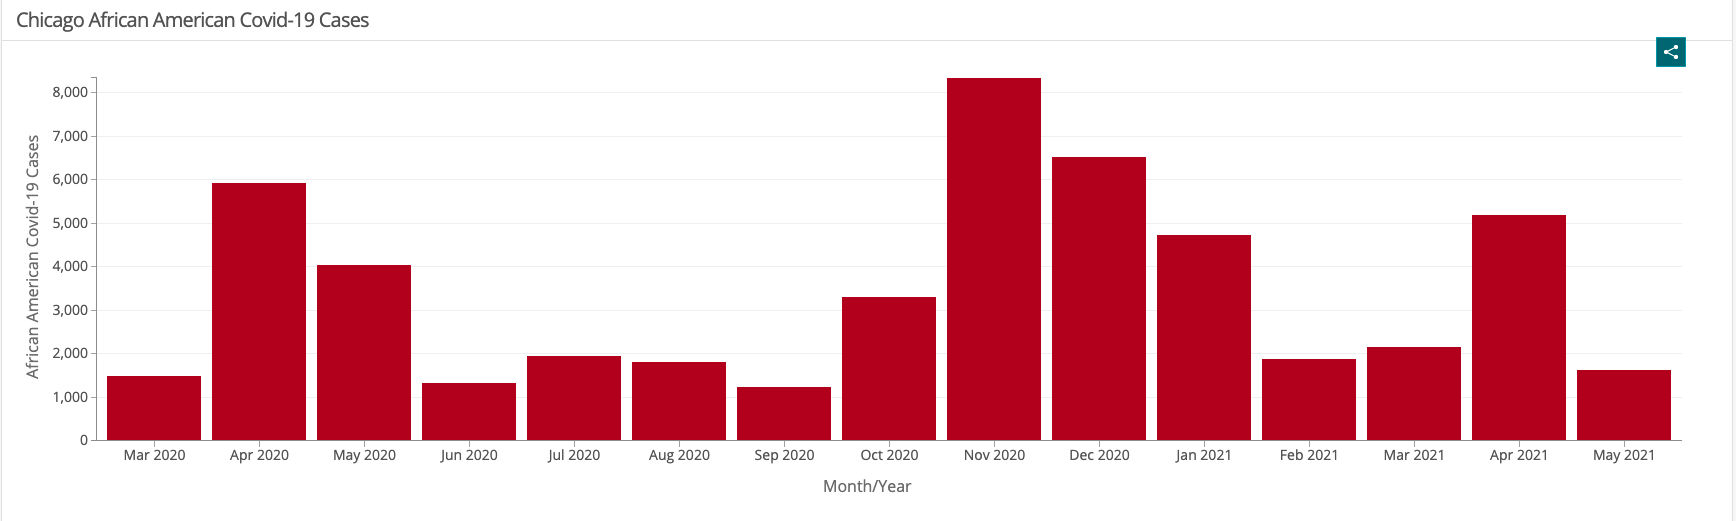

In [103]:

base64_data = "iVBORw0KGgoAAAANSUhEUgAABsgAAAIJCAYAAAAIxrjlAAABfGlDQ1BJQ0MgUHJvZmlsZQAAKJFjYGAqSSwoyGFhYGDIzSspCnJ3UoiIjFJgv8PAzcDDIMRgxSCemFxc4BgQ4MOAE3y7xsAIoi/rgsxK8/x506a1fP4WNq+ZclYlOrj1gQF3SmpxMgMDIweQnZxSnJwLZOcA2TrJBUUlQPYMIFu3vKQAxD4BZIsUAR0IZN8BsdMh7A8gdhKYzcQCVhMS5AxkSwDZAkkQtgaInQ5hW4DYyRmJKUC2B8guiBvAgNPDRcHcwFLXkYC7SQa5OaUwO0ChxZOaFxoMcgcQyzB4MLgwKDCYMxgwWDLoMjiWpFaUgBQ65xdUFmWmZ5QoOAJDNlXBOT+3oLQktUhHwTMvWU9HwcjA0ACkDhRnEKM/B4FNZxQ7jxDLX8jAYKnMwMDcgxBLmsbAsH0PA4PEKYSYyjwGBn5rBoZt5woSixLhDmf8xkKIX5xmbARh8zgxMLDe+///sxoDA/skBoa/E////73o//+/i4H2A+PsQA4AJHdp4IxrEg8AAABiZVhJZk1NACoAAAAIAAIBEgADAAAAAQABAACHaQAEAAAAAQAAACYAAAAAAAOShgAHAAAAEgAAAFCgAgAEAAAAAQAABsigAwAEAAAAAQAAAgkAAAAAQVNDSUkAAABTY3JlZW5zaG90uJ/RPgAAAj5pVFh0WE1MOmNvbS5hZG9iZS54bXAAAAAAADx4OnhtcG1ldGEgeG1sbnM6eD0iYWRvYmU6bnM6bWV0YS8iIHg6eG1wdGs9IlhNUCBDb3JlIDUuNC4wIj4KICAgPHJkZjpSREYgeG1sbnM6cmRmPSJodHRwOi8vd3d3LnczLm9yZy8xOTk5LzAyLzIyLXJkZi1zeW50YXgtbnMjIj4KICAgICAgPHJkZjpEZXNjcmlwdGlvbiByZGY6YWJvdXQ9IiIKICAgICAgICAgICAgeG1sbnM6ZXhpZj0iaHR0cDovL25zLmFkb2JlLmNvbS9leGlmLzEuMC8iCiAgICAgICAgICAgIHhtbG5zOnRpZmY9Imh0dHA6Ly9ucy5hZG9iZS5jb20vdGlmZi8xLjAvIj4KICAgICAgICAgPGV4aWY6VXNlckNvbW1lbnQ+U2NyZWVuc2hvdDwvZXhpZjpVc2VyQ29tbWVudD4KICAgICAgICAgPGV4aWY6UGl4ZWxYRGltZW5zaW9uPjE3MzY8L2V4aWY6UGl4ZWxYRGltZW5zaW9uPgogICAgICAgICA8ZXhpZjpQaXhlbFlEaW1lbnNpb24+NTIxPC9leGlmOlBpeGVsWURpbWVuc2lvbj4KICAgICAgICAgPHRpZmY6T3JpZW50YXRpb24+MTwvdGlmZjpPcmllbnRhdGlvbj4KICAgICAgPC9yZGY6RGVzY3JpcHRpb24+CiAgIDwvcmRmOlJERj4KPC94OnhtcG1ldGE+ChPckSEAAEAASURBVHgB7N0JmB1VmTDgr7OShJANiCEJkAQCaEAFA4iA7OKC46CDbK6jOK44xsFRUEEFxMivIA4uzCCyiBsSYSSyKCAgohMCEvYEAiRCNkhCCJDtv1+Futx03ySddKe76X7P89zcqjp1T53zVt2e4X5+5zQsXbp01VNPPRXbbbddKAQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQ6m8DMmTNj6NCh1WF1q27ZIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQINAFBATIusBNNkQCBAgQIECAAAECBAgQIECAAAECBAgQIECAAIGXBQTIXrawRYAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAg0AUEBMi6wE02RAIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgZcFBMhetrBFgAABAgQIECBAgAABAgQIECBAgAABAgQIECDQBQQEyLrATTZEAgQIECBAgAABAgQIECBAgAABAgQIECBAgACBlwUEyF62sEWAAAECBAgQIECAAAECBAgQIECAAAECBAgQINAFBATIusBNNkQCBAgQIECAAAECBAgQIECAAAECBAgQIECAAIGXBQTIXrawRYAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAg0AUEBMi6wE02RAIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgZcFery82XZbf/vb3+Kxxx6Lgw8+OAYMGNB2F36FXWnVqlVx2223xfTp06N3794xetToGL/n+FfYKHSXwMsCCxcujBtuuCG23XbbeMMb3vByhS0CBAgQIECAAAECBAgQIECAAAECBAgQINCGAq0eIMugzl/+8peYOnVqzJkzJ5YtWxaDBw+OkSNHxv777x9bb711TJ48Oe6q1L/mNa9Zb4DsmWeeiZNOOin22muv+Nd//dc2pNl0l1q6dGn8+Mc/jm222Sbe85731L1QOua4H33kkWp9v803j5/s+ZPqfuONyy+/PK6//vr4xje+Ea961asaV3eo/UsuuSQWPrMw/u3f/i269+jeofrWuDOvpGdw/rx5cX0lAPX444/H008/HX379o0tt9wydn/97rH77rtvEusNee6efPLJ+Nlll8Wuu+3W7ABZfhcmTZoUCxYsiGOOOSb69OnT+BbFiuUr4vfX/j7uu+++ePbZZ2OP3feIvfbeK7baaqsm567tQH4vb7zxxnjwwQdjXsWxR48eMWTwkBi709jY9037Rt9+fdf2UccJECBAgAABAgQIECBAgAABAgQIECBA4BUm0KoBsrlz58YXvvCFWLxoUV2Gn1cCOD+9+OK6dWs7mD+oP135YTyzzjpLgOyG62+IP918czHkgw48KAYPGdxk+DfdeFMRHBtUCS5mEGngwIFFsLHJiTUHMii5sBJQzIyzjhwgy+DNpCuvLHo+btdx8eY3v7lmFB1v85XyDF526WXxm99cURfw+uuui8Pf+tZN8h3alM9dZpxlwLcMFL/rn97VJEC2YP6COPmUk2Ne5e9PWe75+9/joot+Ep/69Keb9XxNmTIlzjrrrFi5YkXZRPX9pptujP/93/+Nc845p3rMBgECBAgQIECAAAECBAgQIECAAAECBAi8sgVaLUCWP2R/8YtfLIJjW1ayNo499tjYYYcdCp2777477rnnnhj2qmFNftxeH99OO+0UH/zQh2LHHXdc36mvmPprJl9T7evvf//7OObYY6r75ca0adOKzcMOO6zI/CmPr+s9A2lpveeee67rtHav+93vflftQ2539ADZK+EZvLIScCyDY297+9uLZ2DEiBHxSCUD8e+VYNH9998f//yuf666t+bGpnru7r333jjjjDPiheefX2d3z/v+eUVwbLfXvjY+XQmIZYbZHXfcEeedd17813/9V4wePbrIYF1bI5l1VgbHXvu618Xhhx9eTGc6f8H8wi7/dh3+lsPX9nHHCRAgQIAAAQIECBAgQIAAAQIECBAgQOAVKNAqAbIXX3wxvvSlLxXZS3tU1hWaMGFC9OzZs8oxbNiweMtb3lLdr7eR09htscUW0a1btzWqGxoa4u2VH/zXVnL6tZwObfPK9IP1pl7Lzy15dkksX7F8ndM5ZjtPL3g6+vTts9Z2avtQTl+Xa4NtSJkxY0bMeeqpYoq5DILltHD1AmT543yWXXbZZZ3N59heeOGFGDR4UGy//fbFa20fyCnklj63tDg3XRuXvI/PLn62bkZb43NzP+9Zr569NmjquZwKL6ex26wSxMgpJmdUst2eqngMHTq03iWqx/JzixYvikGDBlWPlRs5/ueee65uXXlOvmcbGcitl7FXe165nZlJPXv1jP79+7fJM1heN/u54OkFxdSI9e5TeV75fuMfb4xLK1NWduvePU477bTYeeedy6p4XSXgk6+1lZwCdfGixc02qdfOup678nuVz2dzxlK2n1mGX/3KV4rdD1emVv3zn/8c91UCZo1L3s+/V4LCWT772c8W9yq399tvv+jdq3dMnPitYjrTr33ta3m4ScnrnHrqqUXm2Ac+8MF4xxHvqJ6Tz0kG5o888sjqsdqN5n5f8nu3csXK6Ld5v9qPr7FdOg0cNLDJ38DaE5vTVu35tgkQIECAAAECBAgQIECAAAECBAgQIECgvkCrBMjyx+sM+vSoBMVOPPHENYJj9S+7+uiSJUsif7jODI7llR/qs4zcdttiSsGxY8cW+//4xz+KH75zvbKvvPSDeVZkoCkzRB5/7LHivPyn92abxSc/+cl44xvfWKyBdsUVV8QDDzxQnTZtaGVdroMPPjje9a53VX+szzWb/uv88+Puu+6qtpOBhtryox/9qAiu5Y/xec3MKCn7O6Ay9eF73/veOPTQQ2s/stbtq6++uqg74IADih/Ccy22nKKuDGKk5a9+9at4bObM4rxTv/rVIvDRr1+/OP300wuLf/mXf4ldd901fvjDH1bH/41KXbadmTNnnH5GjNlhTPH5DLb89OKfxh/+8Id4vvJDfVnGVLL7vvnNb8asJ2bFL3/1y2IKyzJTJ4NX2b9cH23AgAHFRzLT7X/+53/iy6d8OW7/y+1x0003VdvL89///vc3y+DW224t7PIejR41ugiQZRbZhypZgrXl7LPPLvr0/fO+HxO/PTEefuihojrv8T777BOf+MQn4v/+7//iwgsvjKcq03Bmyfv2T+/8pzj2uGOL/fKfhyqfPffcc+PJyrOUJc/LLLtsowyqluPL5/HRRx+NX//618XUnnnud7/73U36DH7kIx8ppsT88Ic/XPRz1hNPlF2PcZX7/OlPfXqdAaxLLr2kOD+nH6wNjlUbqbOR9+/SSy8txpjVOc4Mxub3N4OQP7vsZ3HlpCvjbW97W3zgAx9o0kJO5zjpt5OKwGFOrdr4ucvA7f/7zv8rvis5bWG2n5lcR/5z/WBT4wvkmoWHVrIn3/SmNxVrFWZ/65WZL31P8u9GBjJry5577Vn8TXis5m9EbX1u533O/uX3oTY41vi8cr+535fnljwXl//88rir8ndl9qxZxcf7V/4HAGPGjIkjjjgidquswZYl/6Z85zvfKf4GltM7bj9qVHzuc5+L/B8WZGluW8XJ/iFAgAABAgQIECBAgAABAgQIECBAgACBZgl0a9ZZ6znp5pfW08of08uAw3o+UlTntGaZRZU/Fu9dCZhkgC0DXl+tBIXyR+Esy5cvL37AzsyJsmRg5AsnnVSc+6rKj8j52Z0rP+5nNkz5o/Ktt9xaZJxkdsshleBV/gCegZTLKkGBSZMmFU1l8OiUL3+5CI5tu912lUyuY4u2sjJ/rM4g3fuOf18xpswYy+Db1DvvLNYDe/ObD4jXvf71sXjx4vhRJVB1wQUXlN1b63tmnNx6661FsCADRG85bHVWXRk0yw/meDNw1K+SEZclp3zbf7/9Y//9969a3FnpQ2a9ZPDwNePGxS6vfnWMHDEyVmeXrCiy5fKzmZXyhf/8Qvyusn5StpvBlvGVwNDgIUNis0qgKcsjjz4St95ySxEI269yjd332COyn5Ovuab44b44qfLPsheXFSbfPOub8fvJk2NU5Uf8NMgAYQbe0uCev99Tnr7W91zLKUtmFB544IHFdgbvsq+1JceSQchPfuqTkVk+eY/HVqbbzCDeHyvnZ7D0m2eeWfQ1+z28Mp1g3rOcZjAzqsqSwccvVab+zOBYWuazkOu53V4JRJ5UeYbK65bjy6DqBT/+ceGV9zfv06Z8BrOfz1fG9EBlCsScojSz8vbJoFDlvmbJtbTO/OaZxXa9f9Im153LANS73/Pueqc0OXZxZR3A8773vSI4kyYHHHBgbFWZFnVaJfCbQcM5c+ZU+rBP4Xn99ddXjWobuva6a4v6fffdt8lzl9/DEz97YvG9yqDVgQcdFG+oZJZm4PFb3zqrtpl1bp9wwglFcCxPKu9T4w88v3T19IuZfVqvZGbikmefLfpYr/4vf/lLcfj4446vV93kWHO/LxkcvKYS+M17m89nZtZmyb8fvXr1KrYzOJZ/U9K9DAjuUMlYy/XWMhsuMxizNKet4kT/ECBAgAABAgQIECBAgAABAgQIECBAgECzBVolgyynyMuSGSIbUnI6xczsyR/ns6xcuTI+/vGPV34Ynh+3/fm2OOSQQ5o0l+dk5lSW49/3vvinf/qn6jn5I3o5jdtxxx8XxxxzzBqZN5kllMGPWyoBocwiy8y1eZXsl8zsyIylsuR6TjllXQaRyqyS71UCChmcyUBNZneU18mMks//x+eLoFFmkW1XCbStreTUghnE2bcy/VtOQfmG8W8oMlwyiywDbRlMyKnh8pUBsPzh/Jijj6lmg2UwJMuDlay4DAx+4xvfqGZ41bvmTTfeFDMrQYlBgwcXayzVTk9YBhzeuPcbY8S3R6wxNWMGSD5ZCZTk9WtN8xpp8MXKdJq777579ZJ5D/9UCZJO/v3kShBudWCnWlmzkc9JTqmY/cl1vbLkulGZvffXO/4amfHTuOQUltl+GQC5/fbb4+xvf7sIfmYw4Rtf/0Z077E64+/yyy+PX1ey7274ww1xwIEHFH0vn5VPVdamKtc6y8Doxz/x8SJodsMNN6zxnE2pBF/fVAn6fOYzn6lOdVe6l31rzWewbDPft61kQWWWYBlAyaDsCR/9aBEwyUzHIVtuWXt6sf2P2f8o3gdXTMvPNTmp5kDeg99WAsQZUMsAdQaQs+R9TqsbKgGxzJg85ZRTIjMuM6ica5iVGU95bq4NlkGnXGuw3nf+mkpwNYN2+YxOnDixGozNTLN0LbMvs62WlmHbrM6yyu9y3tfyWch28ztVZmLmPSyzUstr5tScZV/qjaM8r/a9Od+XDDDndzqzHTPjtHa62fJ7nm1ecvElxfcpn7cMiJUlM8puqwTS/+fC/ynWVGtOW+VnvRMgQIAAAQIECBAgQIAAAQIECBAgQIBA8wRaJYPs2cqP5VlyTakNKZlxVgbH8nMZMMuMnSyzZ88u3hv/c38l0+bpBZX1mSo/ztcGx/K8MmiV25kl1Hitqb333jurijXL8v3xJ1YHnHK6wtqyRyWLKkvZhwweZMZRlo9WAha11xk+Yni884h3FnUZGFhXyakEs7z1rW8t3rOdAypTGWa57rrrivfm/pPZT+X0h2v7zDWTV/cnp8irDY7l+eUYMqBQBknKdrbeeusiiJX7GaysLTn9W21wLOsyuy3Lky9NdVjs1PmnzB6rDXyWFv/7u9WZZY0/lvVlcCzrynuT2xkArQ2IlM9OBviy5LOSAdAMVJR9zOP5mfJZmDJlSh6qlszcyykNG6+FVz2hstGaz2Btux94/wfWCHLlPcupA7PMWsv34ZmFzxT1ec+aU8rnLKcarb3v+Tx88IMfLAJnGZDJDL7DKlMcZik/U7afgeYsZX15vHzPQHCWzL4sMxVzP7/ra/tM1m9MGVHJHMyMyAw8/+jHPyr6nRlsd1fWJcvpIstSL7N10aJFRXUGC/v261ueus735nxfMlCZbWYwOQN3taWcBjL/ptx44x+Lqne/e83Mv/JvQk7l2py2atu3TYAAAQIECBAgQIAAAQIECBAgQIAAAQLNE2iVDLLM8smMklx3aENKvayN8lhOTVavzHppPZ/GQa1652bWSE7h+ERlTaecziwzO7KsqPyYnmWHyrSLWTLgUVvyM1mGVH54z5KZL1m2rkzXVhusKQ5W/nnt614bV1zx6+I65bHG79mXXFsqfzjPLJKcJjLLli9lBWXQ4cgjm7c+U2Zg5ZRs6ytlZl/jgFbjz2V/cg2pp558KubMnVNMC/fccy9NcfmSVfmZnFqxcVnfPcvzM+sqp1LMktlO5fhXrVw9teK9FfPMmGocyMusqtqS2Tg5rWNmKDWuK/czQJKlfFZy+9uVrLPaktNTZimDoGXd6yvTKtYG3crjte9lu63xDNa2W64bV3ssg1g57egLz79Qe7i6nWvTZSnvV7ViLRvleOv1PYNZeb3M8svn9eCDDo6Lf/rT4tlI07TPLK3M4stSG+isvVz5fdl1tzUDz3lO+Z0rz88A5aKFqwNV5bHd99i97vesrK99z8DehAkTirUM/1DJBsxXWXLazSyLK4Gw2kB8Wd+v72q7DK41zpQsz6n3vr7vS/Ypg16//MUv4uuVNe2K9c3e8Y5i7bwy8FobeM7Mx9qSU3pmyb+pK1esXG9btZ+1TYAAAQIECBAgQIAAAQIECBAgQIAAAQLNE2iVAFmu+5U/+M7+x+x1TrHXuEuNgyGN6+vtz38po2nQwEH1qotjGVzLqerufyl7I4NSmW3VOIskf6zP6RWz77nuWWYgZTCtzIA54h1HFO1l4CZL3771s0zKcZR9K05u9E+ZPZY/xufaWY1L9iEDdTvvvHPjqib7GWBqTskf2LM0HnftZy+88MJijbLyWHrkOMsgU3m8fF+Xe3lOvfdc6ykzarL88Ac/qHdKZJDw6KOPXqMuMwHXVvpv3n9tVcXxeZVpCbPkdf/2t78V27X/5HPRvfKqLVtvtf5MrPI+r8uiuc9g7bXXdZ9qz6vdHj58eLFbBqVq6+ptl89yvUBvnl96Z3s5JWGuUZYZZbfddlsxReXtf7m9yNbK9ezKbKjG18k16bLUG0/jZ/e///u/Y85LU7SW7Xz1q6du0N+R7OcPf1CZHvIPNxTrnOXzu0tlTcI9K+vtHX/88UVQujaTrbxOZo3luoc5zWI+K/WCaOW55Xtzvy9HHXVU5L3J4Nf0hx+Oc7773WIKy4997GOR67bNfenZzHbX9mxm3fIVy2N9beV5CgECBAgQIECAAAECBAgQIECAAAECBAhsmECrBMhyasVcryqDIBsyhVrj4ERzul7+sL9o8ZpZJ7WfzXV/Mji2XSUb5tOVtafKdcEy++Xoo99bPTUzPXLtsU9U1tvKDKZ8ZckgUf6QPX7P8cV+OXXk2rJ0nqlkM2Vp/ON/cbDyT163DLodeeS7o6FbQ1lVvD/00EPFOlw5BWFzAmTZ7+aUnFowg0O51lJm+TUu11fWm/pd5Zqb9elTrKv2ukowpGw710TKjLfGpVv3jZuVswwQ7leZjrHxdIBLliyJyZXpKa+99tomAbIy46ZxP5qzXwZ7Dq6sZfdv//ZvzflIJZiy/vG15jPYrE6t46QMTmfJYOjMmTOrz/raPjJ8m+HxcOV5K6cXbHxeZlpmKTMbcxrUDJDls5JruOV7lrcevnqa0GKn0T/lc1dmndVWP7dkdWZieSwDWOX3pzw2ctv1Z0eW55bv/TbvF+985+qpTstjmQWXAelcC21tJbNEc521P1emUG38+caf2dDvy5ve9KbIV36/f1VZGy/Xt8tAWQbUy+zUzEr9/ve/3/hSTfbX1dZrXvOaJuc7QIAAAQIECBAgQIAAAQIECBAgQIAAAQLrFmiVAFlOtXZdJbhx9113FT8G77jjjuu+agtqy2BV47V9apvMtXuyfOELX1gjK+SJWU0DPpm1lBkk73v/+4uMk3qZZpkpk2tTZaZLTiOZP8bXlnJKxm2G1V+D7ZZbbymusdtrXxvHHHtM7UeL7QxKfORf/7WYyi7XfqqXedPkQ804kIGonJ4v+1dvmsVy/a3jjjsucmrBsuR0c+X0jOWxlrwvmL+gCFhm4CQDlmUQrrbNzKLJ9cJy7ajddtuttmqjt0cMXz3FXvk8bHRDjT7Y2s9go+Y3aDcDn68ZN64IUGc21tcqU/qtq4zdaWzcdNONxTNRrtlWnp8BrQyyZSnt8rnIAGoGnDOr7J6//71Y060MHpefrX3P4M/sylSoGRh69atfXVtVXfevPNi4D+Xx1ni/5JJLimYar1VY23auxXbZpZfGLyrTIb7lLW+pG0guz9/Y70v+PfziF79YBMl+Xskoy7UKc1rILPk3Jb//61tPsOxDvbYEyEod7wQIECBAgAABAgQIECBAgAABAgQIEGi+wPrTZZrRVq5BNb4ynVmWr3zlK/HXO/5a91MZeGlpyR/cM9CS2U1/+tOf6jZXrjFWrhWVJ+W1c3q0xuXWW28tDo0fPz5e9apXrTU4Va7Z9JOf/GSNJjL4c+WVVxbHDjn0kDXqyp0ye+rtb397eWiN9/xxfNdKUCizXf74xz+uUdeSnf3226/4eI47A2+NS3k/yvW4yvrf/OY3RUCv3G/p++TJk4smDjzwwLrBsaw8/PDDi3Myi661Sk6zl9mAmSFU3qPatjObqZ5L7Tn1tlv7Gax3jQ05dsJHTyhOv+/ee+PMyvSd9cZU3usy+HjddddF4/ue0wFmsHinyjSfZRA4g5kHHXRQ0f4555xTvB9wwAFrvY95Qhn0urQSeMq158qS/br66qvL3U36XmZsZXCv7H+9C77ziHcWz0hmWn7uc5+rBPZm1zut+PtRGjZ2a/x9yfPKqSxrGyszGjMglq7l38zvfe97RZZp7bkZrMzzmtNW7edsEyBAgAABAgQIECBAgAABAgQIECBAgEDzBFolgywvdcIJJxRZR49VMlC+9a2zYnAli2T7yhSHOY3i7Nmzi7q99947TjzxxOb1bC1n9erVKz70oQ/FD84/P86t/GB/ww03FIGtnE5txowZ8clPfjJeW8nU+svttxfTJ2aQKNcfyinUFixYUKxHVNv0G97whrj6qqviM5XMplyTKktO67fTTjvFPvvsEwcfdHB079G9aDfbv/HGP8Yjjz4S4ypZOznlYgbpMqiwd2X9svxM4/JkJTgzY/r0IgunNkur8XkZPPt7JXsqs0tyWrvWKPnjf7b35D/+ER//+MeLLLHly5fHw5U1kXKM//zP/xx/++tfIwNYuQbTyJEjI7OtHqishVZOk9fSfuQP/Nded23RzLrGdeghh8YlF19cTEOXWXqtUfK+fepTn4ozzzgjLq1kE+W9ynXnckq/6ZV7srDy/slPfioOOPCADbpcaz+DG3TxOidvM3yb+NePfCT++4ILCr8Pf/jDse222xZTWWaQJb9/OdYLKhlmGQTOMX//++dFTqOZU/dlgDbXv8upF/M7kNOL1pYMXuZUnPlcZMlMq3WVzNjKQNiDDzxQfN/32GOPePHFF4t1zOoF79bVVnPqHn300eI5zzXE5syZE/dWAoUZFM3g2CmnnFI862trJ5+Rk046qVizMLO5TjzxM7FNZe2wESNGFH1Ou/xu5DSsOY7mfF9y/bkTPvrR2H7UqGLK1JySM5+3uyoZtlnee9TqaV7zb+add95ZTGH5sX/7WJE5mcH9PDf7v0/l3uTUoM1pa23jc5wAAQIECBAgQIAAAQIECBAgQIAAAQIE6gu0WoAssyO+/e1vF9OIZXbKgvnzi1deNn90z/W5xoweU/Si3hR7Zfca13VrWJ3kVrsWVU6Llj/q/9d//VcxtVyuf5Ylg3I5vVv+wJ+BgZwWLqd+zDKg0r/MrvnpT38a+YN6lpymscxCy4BQue5SBr6yzXxlUCx/pM4g2+mnnx7nVwJzOWXhzJfa6NGzZ7z36KPj3e9+d9Fm439yXa0sOQ1l47HVnptTIOYP+hnMmvXErOq5teuV1bOobaNx+/njf2b95JpsOYXhLS9l3GWfMzCYfcrxpdEdlfXj8pV1H6uMd/HixcXUc7Xutdeq3S6vW77X1v29MiVfro+17XbbRbleVm19ud23X9/Yo9Kn/6v0M7Po6rVVntucPpXnpus3v3lWfPec70YGb/NVllybKoOC6yv13FvrGSyvXQZny/0Nfc8g1q7jdo3zf3B+EWDJoGy+suRzlcGaDOxlyYDgi8tejMzW+9PNNxfH8p9csy+n/mt8n3I/71/aZfCosVnje5VThOZaW98866x49JFH4n9fyhpL7/wOFsHoSoB2Q0p5jdrvQ/n5DEL/oRIoL0uOd/dKMCuDWs2ZujDX/fvRj34UP/jBD4ogVk4Pma8s+X3IoGIG3zJzsDnflx49esQulXMfqAQIc/xlyX69vzKV67hdxxWH8m9m/j3JDLKcnrb2XuSUrpm12ty2ymt4J0CAAAECBAgQIECAAAECBAgQIECAAIHmCTRUMjpW5XpT21V+AG/NsmL5ipg1e1YxZWH+uLypSmakZP9zXagyAFBeKzOR5s6bG0OHDq07deJHKlk3mVlzWmXdpsZrJeWP26ecfHIRXLi4ktnUuGQQK6ehK6dNa1zf0fYzkyudMriUa5PVlpzOLTNlMtNl0KBBtVWdarscZ88ePWPQ4EF1n4mNGXBLnsGNuV5zPpMB4pzmL4NbuU7Z2kr2PbOucs2xDKi2dsnMsXy21tePlly3fLYzsD1066HV6SE3ts3MAMugWwbbc/3BxqV8jtb3fSn/BmbWZv4PBNb1tyLHkNdMr/wOZtu1ZUPaqv2cbQIECBAgQIAAAQIECBAgQIAAAQIECBBYLTCzkgSS8aKybLIAWXmBjvr+2GOPxYTKmkPDK1OpfbeS7dK45NpJ7z3qqCKD5Gc/+1njavsECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQKvEIHGAbINm+fsFTLI5nSzzNCY9cQTxZSGtZ/JzLPvfOc7xaGcilAhQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBDoPAKttgbZK40kpzvbb//9i3V/PvvZEyvTsm1epNYtWbIknqpMdZZlaGXtoU9/+tOvtKHpLwECBAgQIECAAAECBAgQIECAAAECBAgQIECAwDoEuuwUi2mS6/787a9/iz/88Q8xd+7cyLWHBgwYUKwXtN+++8X4PcdHQ0PDOvhUESBAgAABAgQIECBAgAABAgQIECBAgAABAgQIdHSBxlMsdtkMsrxRGfzKIFi+FAIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAga4h0GXXIOsat9coCRAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIEGgsIkDUWsU+AAAECBAgQIECAAAECBAgQIECAAAECBAgQINCpBQTIOvXtNTgCBAgQIECAAAECBAgQIECAAAECBAgQIECAAIHGAgJkjUXsEyBAgAABAgQIECBAgAABAgQIECBAgAABAgQIdGqBHp16dAZHgAABAgQIECBAgAABAgQIECBAgAABAgQIEOiEAqMvvjIeWbK0TUc2ql+fmPG+d7XpNTfVxQTINpWsdgkQIECAAAECBAgQIECAAAECBAgQIECAAAECm0igCI7d+ddN1Hr9Zh95/fj6Fa/Ao6ZYfAXeNF0mQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBDYeIFqBtnMmTM3vhWfJECAAAECBAgQIECAAAECBAgQIECAAAECBAgQ6PQCnSWeVA2Qbbfddp3+phkgAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQKBzCNzWLsN4pcaTGgf2TLHYLo+PixIgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECLSXgABZe8m7LgECBAgQIECAAAECBAgQIECAAAECBAgQIECAQLsICJC1C7uLEiBAgAABAgQIECBAgAABAgQIECBAgAABAgQ6hsBmPaorcnWMDrVBLwTI2gDZJQgQIECAAAECBAgQIECAAAECBAgQIECAAAECHVHgnOPeE0u//61Y9cP/F//x1kM7Yhc3SZ8EyDYJq0YJECBAgAABAgQIECBAgAABAgQIECBAgAABAh1bYGj/zeMz++9T7eS33vXW6nZn3xAg6+x32PgIECBAgAABAgQIECBAgAABAgQIECBAgAABAnUE9t9lbJOjXWW6xa43qWSTW+0AAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQKDrCPzLnrvH6e98W2zWs3ucc9NtceKbV2eRnfenP8fzy5d3CQgBsi5xmw2SAAECBAgQIECAAAECBAgQIECAAAECBAgQ6IoC/Xr2jCXLlhVDLwNj2w0aEJ/+1aT40R9vKY6f/MtJsUXfPvGPhYu6DJEAWZe51QZKgAABAgQIECBAgAABAgQIECBAgAABAgQIdBWB/3jroVGuKZZZYm979c6x41aD4+Srfx9nXPX7NRgygLZk4eog2hoVnXhHgKwT31xDI0CAAAECBAgQIECAAAECBAgQIECAAAECBLqmQBkcy9HnFIoZJDvjt9fEnGeXdE2QRqPu1mjfLgECBAgQIECAAAECBAgQIECAAAECBAgQIECAAIFOLSBA1qlvr8ERIECAAAECBAgQIECAAAECBAgQIECAAAECXVHgpCuvqQ67nGLxqbO/Hl864i3V4115wxSLXfnuGzsBAgQIECBAgAABAgQIECBAgAABAgQIECDQKQUmXnNd5Ktfz56Ra4x9tjLKf9lz9zj9nW+Lrx5+SHz6V5PiR3+8pRh7nrNF3z7xj4WLOqVFvUEJkNVTcYwAAQIECBAgQIAAAQIECBAgQIAAAQIECBAg0AkEMjhWll/eMSXyVQbKTjn84LjirmnFGmV5znl/+nN8+pJflqd36ndTLHbq22twBAgQIECAAAECBAgQIECAAAECBAgQIECAAIE1BTJINvaUb8SEX19VDY7lGZ/a742xWY+ukVslQLbmM2GPAAECBAgQIECAAAECBAgQIECAAAECBAgQINAlBG6+78Em43x++fImxzrjAQGyznhXjYkAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgsB6BpxY/G+fefFv1rP+48nfV7c6+0TXy5Dr7XTQ+AgQIECBAgAABAgQIECBAgAABAgQIECBAgMBGCJx46a/iCz+/MrpK5lhJJIOslPBOgAABAgQIECBAgAABAgQIECBAgAABAgQIEOiCAl0tOJa3WICsCz7ohkyAAAECBAgQIECAAAECBAgQIECAAAECBAgQ6MoCAmRd+e4bOwECBAgQIECAAAECBAgQIECAAAECBAgQIECgCwoIkHXBm27IBAgQIECAAAECBAgQIECAAAECBAgQIECAAIGuLCBA1pXvvrETIECAAAECBAgQIECAAAECBAgQIECAAAECBLqggABZF7zphkyAAAECBAgQIECAAAECBAgQIECAAAECBAgQ6MoCPbry4I2dAAECBAgQIECAAAECBAgQIECAAAECBAgQIPBKFBjVr0888vrxbdr1vGZnKQJkneVOGgcBAgQIECBAgAABAgQIECBAgAABAgQIECDQZQRmvO9dXWasm2KgpljcFKraJECAAAECBAgQIECAAAECBAgQIECAAAECBAgQ6LACAmQd9tboGAECBAgQIECAAAECBAgQIECAAAECBAgQIECAwKYQECDbFKraJECAAAECBAgQIECAAAECBAgQIECAAAECBAgQ6LACAmQd9tboGAECBAgQIECAAAECBAgQIECAAAECBAgQIECAwKYQECDbFKraJECAAAECBAgQIECAAAECBAgQIECAAAECBAgQ6LACAmQd9tboGAECBAgQIECAAAECBAgQIECAAAECBAgQIECAwKYQECDbFKraJECAAAECBAgQIECAAAECBAgQIECAAAECBAgQ6LACAmQd9tboGAECBAgQIECAAAECBAgQIECAAAECBAgQIECAwKYQECDbFKraJECAAAECBAgQIECAAAECBAgQIECAAAECBAgQ6LACPTpszzphx84+++y6o5owYULd4w4SIECAAAECBAgQIECAAAECBAgQIECAAAECBAi0voAAWeubrrXFeoGwtQXN1tqICgIECBAgQIAAAQIECBCIqxpGUmgHgSNWPd4OV3VJAgQIECBAgAABAq0vYIrF1jfVIgECBAgQIECAAAECBAgQIECAAAECBAgQIECAQAcWECDrwDdH1wgQIECAAAECBAgQIECAAAECBAgQIECAAAECBFpfQICs9U21SIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAg0IEFBMg68M3RNQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgdYXECBrfVMtEiBAgAABAgQIECBAgAABAgQIECBAgAABAgQIdGABAbIOfHN0jQABAgQIECBAgAABAgQIECBAgAABAgQIECBAoPUFBMha31SLBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECHVigUwfIli5dGlOnTo18X19ZtmxZTJs2Le69995YsXxFk9NbWt+kQQcIECBAgAABAgQIECBAgAABAgQIECBAgAABAgTaRaBHu1x1E180A1ynfe20uK8S7Oq92WbxwvPPxy6vfnWcdtpp0dDQ0OTqM2bMiJNPPjmWV4JkWTbr0yfO+uZZsc3wbYr9ltYXjfiHAAECBAgQIECAAAECBAgQIECAAAECBAgQIECgQwh0ygyyq66+qgiO/b/vfCcuueSS+PbZZxf7N998c130iRMnxtixY+Pyy38el/3sZzFq1Kj41sRvVc9taX21IRsECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQLtLtApA2SZJdate/fYZtjqDLBtttmm2F+8aHET8JkzZ8a8uXPjuOOOi+49ukfPnj2L7VlPPBGzZ82OltY3uaADBAgQIECAAAECBAgQIECAAAECBAgQIECAAAEC7SrQKQNk++27XxHoOukLJ8WUKVPilFNOiT6VaRP3f/P+TbDnPDWnODZm9Jhq3ejRo4vtWbNmRUvrq43aIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQ6BACnTJANnjI4Pjyl78cj1Wyw84844yYMX16nHH6GbHFFls0QV+4aGFxLLPHypJZZFkWPL0gWlpftumdAAECBAgQIECAAAECBAgQIECAAAECBAgQIECgYwj06BjdaN1ePPLII3HqqafG2J12igMPPDAuu+yyyGyyr33ta1Fmh5VXLINh5X7te+9evaOhW0PtoTW2m1Nf+4FcD61eeeaZZ+oddowAAQIECBAgQIAAAQIECHQoAf/92qFuh84QIECAAAECBNpEYODAgW1ynba+SKcMkF1xxRUxbNiwOP300wvPAw84MD7xyU/Ez3/+8/jiF7+4hvGgQYOK/SXPLol+m/crthcvXr1W2cBBA6Nbt9VJdhtbX3ux448/vna32D777LOjsz5cTQbrAAECBAgQIECAAAECBAi8ogX89+sr+vbpPAECBAgQIECAQI1Ap5xi8YEHHojtt9++OsycPnHnnXeO6ZWpFhuXUaNGFYem3jW1WjV16urtbKOl9dVGbRAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECHQIgU6ZQTZmzJj485//HPvuu2/ssssucc/f74nbb789jjzyyAJ90qRJMXny5Dj33HOjf//+setuu8WFF14YI0aMKOovuuiiYnrG8n8Z19L6DnGndYIAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQKAQaFi6dOmqp556KrbbbrtOQ7Jw4cK44IIL4s4774wXnn++MnXi5rHXXnvFhz/84ejdu3d89atfjZw3/ZxzzinGnNMnnnraqfFoZe2yLCO33bY4Z8CAAa1SXzSyln9yisUJEyaspdZhAgQIECBAgAABAgQIEKgncFXDyHqHHdvEAkesenwTX0HzBAgQIECAAAECBDaNwMyZM2Po0KHVxjtlBlkGtsqg04L5C2LwkMHVAedGTrV41FFHVY/l2mMTJ06MSrCwONanT59qXW60tH6NxuwQIECAAAECBAgQIECAAAECBAgQIECAAAECBAi0q0CnDJDVijYOji1evDhy6sRDDz209rRiu3FgrPEJLa1v3J59AgQIECBAgAABAgQIECBAgAABAgQIECBAgACBthfo9AGyxqS55th5553X+LB9AgQIECBAgAABAgQIECBAgAABAgQIECBAgACBLiLQrYuM0zAJECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIFAICZB4EAgQIECBAgAABAgQIECBAgAABAgQIECBAgACBLiUgQNalbrfBEiBAgAABAgQIECBAgAABAgQIECBAgAABAgQICJB5BggQIECAAAECBAgQIECAAAECBAgQIECAAAECBLqUgABZl7rdBkuAAAECBAgQIECAAAECBAgQIECAAAECBAgQICBA5hkgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBDoUgICZF3qdhssAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQICAAJlngAABAgQIECBAgAABAgQIECBAgAABAgQIECBAoEsJCJB1qdttsAQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgJkngECBAgQIECAAAECBAgQIECAAAECBAgQIECAAIEuJSBA1qVut8ESIECAAAECBAgQIECAAAECBAgQIECAAAECBAgIkHkGCBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIEupSAAFmXut0GS4AAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgIEDmGSBAgAABAgQIECBAgAABAgQIECBAgAABAgQIEOhSAgJkXep2GywBAgQIECBAgAABAgQIECBAgAABAgQIECBAgIAAmWeAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECgSwkIkHWp222wBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECAmSeAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgS4lIEDWpW63wRIgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECAiQeQYIECBAgAABAgQIECBAgAABAgQIECBAgAABAgS6lIAAWZe63QZLgAABAgQIECBAgAABAgQIECBAgAABAgQIECAgQOYZIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQ6FICAmRd6nYbLAECBAgQIECAAAECBAgQIECAAAECBAgQIECAgACZZ4AAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQKBLCQiQdanbbbAECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQICZJ4BAgQIECBAgAABAgQIECBAgAABAgQIECBAgACBLiUgQNalbrfBEiBAgAABAgQIECBAgAABAgQIECBAgAABAgQICJB5BggQIECAAAECBAgQIECAAAECBAgQIECAAAECBLqUgABZl7rdBkuAAAECBAgQIECAAAECBAgQIECAAAECBAgQICBA5hkgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBDoUgI9OuNoZz0xK5avWN5kaL169Yphw4Y1OZ4Hli1bFg8++GA0NDTETmN3iu49uq9xXkvr12jMDgECBAgQIECAAAECBAgQIECAAAECBAgQIECAQLsJdMoA2ecmfC5WrljRBHWzPn3i4osvbnJ8xowZcfLJJ8fySpAsS5531jfPim2Gb1Pst7S+aMQ/BAgQIECAAAECBAgQIECAAAECBAgQIECAAAECHUKgU06x+JOf/CR+WgmE1b623Gqr2HXXXeuiT5w4McaOHRuXX/7zuOxnP4tRo0bFtyZ+q3puS+urDdkgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBBod4FOGSDrU8kAq3099NBDMW/u3DjqqKOagM+cObOoO+6444ppFXv27Bm5PeuJJ2L2rNnR0vomF3SAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECgXQU65RSLjUV//vOfx5gddojtt9++cVXMeWpOcWzM6DHVutGjRxfbs2bNqh7b2PpymsZqQzYIECBAgAABAgQIECBAgAABAgQIECBAgAABAgTaVaBdMsgWzF9QZGfVjvzxxx+PX/7yl3HdddfFiuVN1w+rPXdDth999NF48IEH6maPZTsLFy0smuveo3u12cwiy7Lg6QUtrq82aoMAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQKBDCLRLBtkdf70jfve738W5555bIDxQCWB973vfq4LktIYf+chHqvst2fhZZU2xwUOGxO677163mTIYVq+yd6/e0dCtoV5Vcaw59bUfvuSSS2p3q9vPPPNMddsGAQIECBAgQIAAAQIECBDoqAL++7Wj3hn9IkCAAAECBAhsOoGBAwduusbbseV2CZDNmDEjtt122+qwr7jiiujbt2+ccsopcdttt8XkyZOrdS3ZmFtZd2zK//1ffPSEE9bazKBBg4q6Jc8uiX6b9yu2Fy9eXLwPHDQwunVbnWS3sfW1Fz7++ONrd4vts88+Ozrrw9VksA4QIECAAAECBAgQIECAwCtawH+/vqJvn84TIECAAAECBAjUCLTLFIvz58+PESNGFN2Y9cSsyLW+3vGOd8QWW2wRe+21VyxfvjzyeEtLTtnYe7PN4uCDDl5rU6NGjSrqpt41tXrO1Kmrt3PNspbWVxu1QYAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAg0CEE2iWDbMzoMfHYY4/FqlWr4qqrr4oePXrEG9/4xjVAatcEW6OimTuZBXbTTTfFu/7pXdG4rUmTJhVZajnFY//+/WPX3XaLCy+8sBq0u+iii2LsTjtVM7taWt/MLjuNAAECBAgQIECAAAECBAgQIECAAAECBAgQIECgDQTaJYNs3K7jigDZhAkT4p577onDDjssyrXAHn7o4WJaw6FDh7Zo+FdfdXXx+Xcc8Y4m7UyZMiV69epVveaEz02InGrx85X+5Csz2U466aTq51paX23IBgECBAgQIECAAAECBAgQIECAAAECBAgQIECAQLsLtEsG2W6VjK33vve9cd9998Xo0aPjkEMOqUIsWbIk3vzmN0dDQ0P12MZsHHPsMZGvemX69Olx1FFHVaty7bGJEyfG0qVLi2N9+vSp1uVGS+vXaMwOAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIBAuwq0S4AsR7zffvsVr8ajP+DAAxofatX9nHoxFxU+9NBDm7TbODDW+ISW1jduzz4BAgQIECBAgAABAgQIECBAgAABAgQIECBAgEDbC7RbgGzRokWR0yA+OvPRyKyxU089tZjy8O67745nn3029tlnn02ikWuOnXfeeZukbY0SIECAAAECBAgQIECAAAECBAgQIECAAAECBAh0fIF2CZDNnzcvvv6Nb8Ty5cuL9cZWrlwZ+coyY8aMuP7662OPPfaI3r17d3xBPSRAgAABAgQIECBAgAABAgQIECBAgAABAgQIEHhFCXRrj95O+u1vi+DY5z//+fjc5z63Rhd2GLNDsT9nzpw1jtshQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAg0BoC7RIgmzlzZowbNy623377JmPYvP/mxbHnnnuuSZ0DBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBFoq0C4BskGDBsXs2bPr9v3Pt/25OD5s2LC69Q4SIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQaIlAuwTIdt9991iwYEFccskl1UDZk08+GZMmTYo/3/7neNWrXhVbbLFFS8blswQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgTqCvSoe3QTH9x///3j0Ucfjdtvv7145eUmTpxYXLV///5xwgknbOIeaJ4AAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQKCrCrRLgCyx3//+98fBBx0cf7/n7zF37tzo06dPjBgxIsa/YXx079G9q94P4yZAgAABAgQIECBAgAABAgQIECBAgAABAgQIENjEAu0WIMtxDR8xvHht4jFqngABAgQIECBAgAABAgQIECBAgAABAgQIECBAgEBVoF0CZI888khMnz49DjnkkGpHrrvuumK6xQEDBsRxxx4bQ7bcslpngwABAgQIECBAgAABAgQIECBAgAABAgQIECBAgEBrCXRrrYY2pJ2pU6fG5MmTqx+5+eabY9KkSfH888/Hgw8+GP9z4YXVOhsECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIEWlOgXQJkM2bMiFHbjyrGsWrVqvjd734Xw4cPj9NPPz1OOOGEmDlzZqxYvqI1x6ktAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAoVAuwTIXnzxxRg0aFDRgWn3TItnn302jnjHEcX+qFGrA2ePPf6YW0SAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECg1QXaJUC2yy67xLR7p8WTTz4Zv/r1r2LgwIExbtdxxeCWLl1avA8ePLjVB6tBAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAj3ag2CPPfaI66+/Pr7xjW8Ul//oRz9a7cbdd98dvXr1igEDBlSP2SBAgAABAgQIECBAgAABAgReWQJXNYx8ZXW4k/T2iFWPd5KRGAYBAgQIECBAYNMKtEuAbOTIkXHyySfHww8/HNtvv33kfllyLbL3ve995a53AgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAq0q0C4BshzBsGHDilfj0eT0iwoBAgQIECBAgAABAgQIECBAgAABAgQIECBAgACBTSXQLgGyVatWFVMs3nXXXbF48eK6YzvpP06Kfpv3q1vnIAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAIGNFei2sR9syef+/ve/x6RJk+Kxxx6LHj16xPz584t1x/I9XzvvtHP07NWzJZfwWQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQJ1BdolQDZlypQYOHBgnHPOOcV6Y926dSvWJDv99NNju+22i8efeLwImNXtsYMECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIEWiDQLgGyxx9/PMaOHRsNDQ3Rt2/fWLlyZaxYviIGDBgQhx12WJFZtnDhwhYMy0cJECBAgAABAgQIECBAgAABAgQIECBAgAABAgQI1BdolwDZoIGDYvr06UWPhgweUrzPeGRG8T506NDifcGCBcW7fwgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAi0pkC7BMhe+7rXFmuNvfDCC9G9R/cYPnx4nH/++fHb3/42fvKTnxTrkuVUiwoBAgQIECBAgAABAgQIECBAgAABAgQIECBAgACB1hZolwDZXnvtVaw51rt372I8Rx99dCxfvjyuvfbamD17dhx++OGR65IpBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBFpboEdrN9ic9nr16hXDhg2rnjpq1KiYOHFizJo1K0aOHBk9e/as1tkgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAg0JoCbZamldMp3nzzzbFi+Yq6/c9sstGjR8eKFSti0aJFdc9xkAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgEBLBdosQPbII4/EL37xi5g+Y/o6+/z73/8+Tj311HWeo5IAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIDAxgq0WYBsxowZRR9zOsV1lW2GbRMvvvhiZMaZQoAAAQIVuifqAABAAElEQVQECBAgQIAAAQIECBAgQIAAAQIECBAgQKC1BdosQPbYY4/Flltuud71xYa+amgxxn/84x+tPVbtESBAgAABAgQIECBAgAABAgQIECBAgAABAgQIEIg2C5BttdVW8dxzz62XfNHC1euPrVy5cr3nOoEAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIDAhgq0WYBsl112KQJkM2fOXGcfp9w5pagfOXLkOs9rbuXixYtj6tSpMWXKlFi2bNlaP5Z106ZNi3vvvTdWLF/R5LyW1jdp0AECBAgQIECAAAECBAgQIECAAAECBAgQIECAAIF2EejRVlfdYYcdolu3bnH++efHv//7v8fQoaunUqy9/m233RZ33HFHjB49er1TMdZ+rt72okWL4swzz4yHH3ooNuvTJ5YvXx7f/e53614310c7+eSTY/lLAbQ8/6xvnhXbDN+maLql9fX65xgBAgQIECBAgAABAgQIECBAgAABAgQIECBAgED7CDQsXbp01VNPPRXbbbfdJu/Bo48+WgSpMlg1bty4yCyxfn37xbz584rsrblz50aPHj3itNNOiwEDBmx0f1atWhWf+tSnom/fvvGfX/hCDKmsfbau8vGPfzy23nrr+MqXvxIrV62Mr3/965EBtgyoZWlp/bquffbZZ8eECRPWdYo6AgQIECBAgAABAgQIEGgkcFVD68w60qhZu+sROGLV4+s54+Vq9+hli7bc2pB71Jb9ci0CBAgQIECAQHsL5AyHtclbbTbFYg58++23j//8z/+MUaNGxf333x/XXHNN/OrXv4obb7wxMjj2hje8oQhOtSQ4lte55ZZbYk4l6PelL31pvcGxBJlXufZxxx0X3Xt0LzLXcnvWE0/E7Fmzo6X12R+FAAECBAgQIECAAAECBAgQIECAAAECBAgQIECg4wi02RSL5ZBf9apXVTOmMii2YMGC2HLIkBhceTU0NJSntej9zjvvjO0qwbgnn3wyrr766ujerXu8ad831c2Sm/PUnOJaY0aPqV4zp3jMMmvWrOqxja0vp2msNmSDAAECBAgQIECAAAECBAgQIECAAAECBAgQIECgXQXaNIOs8Ui32mqr2GmnnYosr9YKjuU15s2bVwTHTj/99Hiikgl2zeRr4vOVaQxzLbHGZeGihcWhzB4rS8+ePYvNBU8viJbWl216J0CAAAECBAgQIECAAAECBAgQIECAAAECBAgQ6BgCbZ5B1hbDzvXDMuD2ve99LwYOHBi5JtlnPvOZuO666+JjH/vYGl0og2FrHHxpp3ev3tHQbe1Zbc2pr233kksuqd2tbj/zzDPVbRsECBAgQIAAAQIECBAgQKCjCvjv1456Z17ul3v0soUtAgQIECBAoHUEMs7SGUunDJBtscUWxUJr5U3LYNkee+wRN998c5MA2aBBg4r7uuTZJdFv837F9uLFi4v3gYMGRrduq5PsNra+9qE5/vjja3eL7bPPPrsI4jWpcIAAAQIECBAgQIAAAQIECHQwgfK/sztYt3SnRsA9qsGwSYAAAQIECBBYh0C7TrG4jn61qGrbbbeNRx99tMgcKxt67LHHok+fPuVu9X3UqFHF9tS7plaPTZ26env7yjpmLa2vNmqDAAECBAgQIECAAAECBAgQIECAAAECBAgQIECgQwh0ygDZEUccEQvmz48f/ehHMXfu3Jg8eXJMmzYt9tprrwJ90qRJ8fGPfzyWLVsW/fv3j1132y0uvPDCmDlzZvG66KKLYmxlbbT8X121tL5D3GWdIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQqAq0+RSLt9xyS9w19a6Y/Y/ZsXDhwthss81i8803jxEjRsS+++4bO++8c7VzG7sxdOjQmPD5z8d5550X11fWHcsyfs894+ijjy62p0yZEr169Ypy/bEJn5sQp552anx+woSifmQlA+2kk04qtvOfltZXG7LR6QWuahjZ6cfYEQd4xKrHO2K39IkAAQIECBAgQIAAAQIECBAgQIAAAQIEOqhAmwXIVixfEed+79yYPn16sT5YTl943333xYsvvhh9+/aNe+65J3Jqw9e85jXxkY98pBq82li3vffeO/L19NNPFwG4MhiW7WUfjjrqqGrTufbYxIkTY+nSpcWxxlMxtrS+eiEbBAgQIECAAAECBAgQIECAAAECBAgQIECAAAEC7S7QZgGyafdOKwJTxx57bOyzzz7FwDOD7LTTTouDDjooXv+618cNf7ghfvvb38ZvfvObNQJYLVEaNGjQGh9fvHhxMXXioYceusbx3GkcGGt8QkvrG7dnnwABAgQIECBAgAABAgQIECBAgAABAgQIECBAoO0F2mwNsswOGzJkSDU4lkMdMGBAvO51r4s77rgjuvfoHocddlgccMABcfPNN0dmnG2KkmuK5dSL6wt2bYpra5MAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQKD9BdosQLZs2bJYsmRJrFq1ao1RL160OBYsWFA99sa931hsz503t3rMBgECBAgQIECAAAECBAgQIECAAAECBAgQIECAAIHWEmizANnYsWPj+eefj/+9+n9jybOrA2UPPvhg3Hf/fTFixIjqeMopERctWlQ9ZoMAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIBAawm02Rpk++67b9x+++0x+feTi1e3bt1i5cqVke9HvOMd1fE8u+TZyGkQtxyyZfWYDQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQKtJdBmAbKGhob4/Oc/H3/5y18iM8eWLl0aQ4cOjYMOOii22GKL6ni23nrrOPPMM6v7NggQIECAAAECBAgQIECAAAECBAgQIECAAAECBAi0pkCbBciy0xkk23vvvYtXaw5CWwQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgSaK9Bma5A1t0POI0CAAAECBAgQIECAAAECBAgQIECAAAECBAgQILApBQTINqWutgkQIECAAAECBAgQIECAAAECBAgQIECAAAECBDqcQJtNsThnzpyY89ScZgPssssu0b1H92af70QCBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECzRFoswDZTTfdFPlqbjn99NNjwIABzT3deQQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgSaJdBmAbK99967CJCNGTMm3vOe96y3c/3791/vOU4gQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgsKECbRYgGzlyZBx99NFx+eWXx8yZM2Pffffd0L46nwABAgQIECBAgAABAgQIECBAgAABAgQIECBAgECLBbq1uIUNaCCDYnvssUfcf//9G/AppxIgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBBoPYE2yyAru/zBD34wGhoayl3vBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBNpUoE0zyHJkgmNten9djAABAgQIECBAgAABAgQIECBAgAABAgQIECBAoJFAmwfIGl2/2P3sZz8bt9xyS70qxwgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAi0qkCHCJAtX748lr34YqsOTGMECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIE6gl0iABZvY45RoAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQGBTCAiQbQpVbRIgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECHRYgR4doWdnnHFG9OnTpyN0RR8IECBAgAABAgQIECBAgAABAgQIECBAgAABAgQ6uUCbBMhWLF8RCxcuXCfl4mWL16gfNHhQNDQ0rHHMDgECBAgQIECAAAECBAgQIECAAAECBAgQIECAAIGWCrRJgOyhhx+K8847b4P6evrpp8eAAQM26DNOJkCAAAECBAgQIECAAAECBAgQIECAAAECBAgQILA+gTYJkG2zzTZx9NFHV/uyfNnyuOI3V8Rmm20We+65ZwwaNChWrFgRjz76aNx9991x+FsOj/79+1fPt0GAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECgtQTaJEC2xRZbxL777lvt8xVXXBErV66MU796avTt17d6PDd+dtnP4trrro23v+Ptaxy3Q4AAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQKA1BLq1RiMb2sYDDzwQ48aNaxIcy3betO+biuDZ7FmzN7RZ5xMgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBBYr0C7BMgaGhoip1msV5YvX318+Yr69fU+4xgBAgQIECBAgAABAgQIECBAgAABAgQIECBAgACB5gq0S4Bs3GvGxf0P3B+XXXpZ3HvvvfHiiy/GiuUr4r777osf//jHkWuWbbfdds0dg/MIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQINFugTdYga9ybt739bfHQww/FbX++rXjV1vfo0SM+9rGP1R6yTYAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQKDVBNolQNatW7f493//93jooYfiwQcfjPnz50efPn1i6NChsddee0Xv3r1bbYAaIkCAAAECBAgQIECAAAECBAgQIECAAAECBAgQIFAr0C4BsrIDO+64Y+RLIUCAAAECBAgQIECAAAECBAgQIECAAAECrS1wVcPI1m5Se80QOGLV4804yykE2legzQJkDzzwQJEpts8++xRZY3Pnzl3nyPfcc8/o2bPnOs9RSYAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQGBDBdosQPaLX/winnrqqRg/fnxc+/tr4/4H7l9nX8eNGxcDBgxY5zlrq1y1alU89thjTaq33XbbaGhoaHI8DyxbtqwI3GX9TmN3iu49uq9xXkvr12jMDgECBAgQIECAAAECBAgQIECAAAECBAgQIECAQLsJtFmA7MQTT4xlL75YZIV94IMfiBdfeGGdg95iiy3WWb+uynnz5sXnJ0xocsoF//3fdYNuM2bMiJNPPjmWV4JkWTarrId21jfPim2Gb1Pst7S+aMQ/BAgQIECAAAECBAgQIECAAAECBAgQIECAAAECHUKgW1v1IgNeQ7bcsrjcrFmzKhlaPYr9PFbvtbZMr+b09+mnny5O+/EFF8RPL764+lpbRtrEiRNj7NixcfnlP4/LfvazGDVqVHxr4reql2ppfbUhGwQIECBAgAABAgQIECBAgAABAgQIECBAgAABAu0u0GYBstqRXn/d9XHKKafEt7/97fjrHX+NFctX1Fa3eHvhMwujW/fuMXDgwOhTyQYrX/UanjlzZsyrrId23HHHFdMq5rpnuT3riSdi9qzZ0dL6etd0jAABAgQIECBAgAABAgQIECBAgAABAgQIECBAoP0E2myKxdohHnnkkXHTTTfFX//217jopxfFpZddGrvvvnsccMABkeuEtbQ8/czqDLLrr78+nnvuuRgxYkS8/vWvr7v+2Jyn5hSXGzN6TPWyo0ePLrYz060sG1tfTtNYtuOdAAECBAgQIECAAAECBAgQIECAAAECBAgQIECgfQXaJUCWQaNjjj0mjj7m6Jh2z7S49bZb429/+1vccccdRdbX/vvvHwcfdHCR0bUxPP379y/WOrvyyitj/vz5xdpig4cMKTLWsq62LFy0sNjt3qN79XBmkWVZ8PSC6F7JRMuysfXFh/1DgAABAgQIECBAgAABAgQIECBAgAABAgQIECDQYQTaJUBWjj7XGRu367ji9cILL8Rtt94av6kEtX7729/GXnvtFWtbM6z8/Nre3/jGN0a+yjJt2rQ49atfjYsr65F94hOfKA8X72UwbI2DL+307tU7Gro11KsqjjWnvvbDl1xySe1udfuZZ56pbtsgQGDDBXyHNtzMJwgQIECAAAECBAhsjID/33tj1Nr2M+5R23q7GgECBAjUF/B/j+q7vFKP5nJWnbG0a4AsQZctWxZ3Trkzbrn1lpgxY0ZhnFMibrbZZq3m/ZrXvCZGjxkTDz/8cJM2Bw0aVBxb8uyS6Ld5v2J78eLFxfvAQQOjW7fVy7RtbH3tBY8//vja3WL77LPPLrLmmlQ4QIBAswU66x/oZgM4kQABAgQIECBAgEAbCfj/vdsIugWXcY9agOejBAgQINBqAv7vUatRamgTCrRLgGzVqlXxwAMPxC233BJ33313rFy5Mvr27RuHHHJI7L/f/jF4yOBWH/LcuXNj1113bdLuqFGjimNT75oab3rTm1ZvT51avG+//fbVKRY3tr7JBR0gQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBBoV4F2CZBdcMEFcddddxUD32233SLXHNtpp50ip1xsjXL1VVfHsG2GxQ477FCsQXbdddfF4kWL4qh/OapoftKkSTF58uQ499xzI9ck27XShwsvvDAycy3LRRddFGMr/Smj3C2tLxr1DwECBAgQIECAAAECBAgQIECAAAECBAgQIECAQIcQaJcA2ciRI4uAWK4z1rt371aHyCkSL/7WxbFyxYqi7R49e8YHPvDBGD5ieLE/ZcqU6NWrV5Trj0343IQ49bRT4/MTJhT1I7fdNk466aRqv1paX23IBgECBAgQIECAAAECBAgQIECAAAECBAgQIECAQLsLtEuA7PDDDy8GPm3atLj7rrtj7ry5xRSLmcH15je/Ofr06dMimGOOPSaOOuqoWPD0giIAt8UWW6zR3vTp04v68mCuPTZx4sRYunRpcajx9VtaX17HOwECBAgQIECAAAECBAgQIECAAAECBAgQIECAQPsLtEuALNcgO//88+Pee+8tBLp161asQza1svZXTn342c9+NnL9r5aU7j26x1ZbbdWkicwuy6kTDz300CZ1jQNjjU9oaX3j9uwTIECAAAECBAgQIECAAAECBAgQIECAAAECBAi0vUC7BMhu/OMfi+DYQQcdFOPHj4+ccnHJs0uKY1f85or44Q9/GGeeeeYm0cg1x84777xN0rZGCRAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIEOr5At/bo4l133x077LBDHHnkkUVwLPuQ0xiO33N8fPjDH47M8lowf0F7dM01CRAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIEOrlAuwTIFi5cGEO3HlqXduutty6OL1y0sG69gwQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgRaItAuAbJhw4bFtHunxYrlK5r0/c4pd0auSbbtyG2b1DlAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAoKUC7bIG2YEHHhjnnHNOnPnNMyPXIRsyZEg8/vjjMW3atHjooYdi9913j+49urd0bD5PgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAoIlAuwTIdtxxxzj22GPjF7/4RVx22WVrdGqvvfaK448/fo1jdggQIECAAAECBAgQIECAAAECBFpX4KqGka3boNaaJXDEqsebdZ6TCBAgQIAAgU0r0C4BshzSPvvsE+PHj49Zs2bFvHnzYvDgwTFy5Mjo2bPnph2x1gkQIECAAAECBAgQIECAAAECBAgQIECAAAECBLq0QJsFyFauXBlz586NoUOHVsEzGLb99tsXr+pBGwQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQ2oUC3Tdj2Gk3nGmNf//rXY/rD09c43njn2muvjTPOOKPxYfsECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIEWkWgzQJkDz/8cNHhYcOGrbPjffv2jdmzZ8eK5SvWeZ5KAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAhsj0GYBskceeSQGDBgQffv1XWc/hw8fXtQ/9dRT6zxPJQECBAgQIECAAAECBAgQIECAAAECBAgQIECAAIGNEWizAFnv3r2joaFhvX1ctmxZcc7iZxev91wnECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIENhQgTYLkO2yyy7xzDPPxOLF6w58lVMxjhg+YkPH4nwCBAgQIECAAAECBAgQIECAAAECBAgQIECAAAEC6xVoswDZTjvtVHTmBz/4QaxcubJux3JaxcmTJ8fAgQOj3+b96p7jIAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAIGWCPRoyYc35LP9+/eP97z7PfGrX/8qvvSlL8Vb3/rWGDlyZGy++eYxb968uOeee+Lmm28umvzQBz+0IU07lwABAgQIECBAgAABAgQIECBAgAABAgQIECBAgECzBdosQJY9OuDAA6Jv375xyaWXxC9/+csmnRwwYEAce+yxMWaHMU3qHCBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECDQGgJtGiDLDu+5154xfs/xMXvW7Jg+Y3osWLAghgwZEkOHDo0dd9wxGhoaWmNc2iBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBQV6DNA2TZiwyCDR8xvHjV7ZWDBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBDaRQLdN1K5mCRAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECHRIAQGyDnlbdIoAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQGBTCQiQbSpZ7RIgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECHRIAQGyDnlbdIoAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQGBTCfTYVA2vr91FixbFPffcE08//XSsWrmqyemHHnZo9O7du8lxBwgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAi0RKBdAmTz582L0772tVi5cuVa+77f/vsJkK1VRwUBAgQIECBAgAABAgQIECBAgAABAgQIECBAgMDGCrRLgOwvd9xR9Pf444+P3XbdLTbrs1mT/nfrZvbHJigOECBAgAABAgQIECBAgAABAgQIECBAgAABAgQItFigXQJkU6dOjZ3G7hR77713iwegAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIbItAuaVqbb755LFq8aEP66VwCBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECrSLQLgGyPffcM2bNmhWzZ81ulUFohAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgEBzBdplisW+fftGr1694owzz4jhw4fH4MGDo3v37mv0Odcn22yzpmuTrXGSHQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIbKNAuAbJcg6xbt25FAGz+/PmRr8Zl2bJlAmSNUewTIECAAAECBAgQIECAwP9n707goyjvBo7/c5CDkIQoitwQ5BABLSpQEY8i1YJIQaVV8Gi1trZ91YJSWzzwSFUiVRGxWiygFPB8RbDSV5RLisohcokIyJUgAblCghwm7/wfnO3sZnPOZnd283s+n83O9cw8830yu7Pzn+cZBBBAAAEEEEAAAQQQQAAB1wIRCZDdcMMNrgtenRXs3LlTjhw5Iq1bty43mwbkNmzYIHFxcdKhfQdJSPRv0eZ2frkbZgYCCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggEBYBSISIAvnHhYUFMidd94pmZmZ8sILLwTd9ObNm2XUqFFy3AqSaUpJTZXHH3tcmjZrasbdzjcr4Q8CCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggIAnBCIWINu2bZusXr1aCgsLg0IMGjRIkpOTg86r6sTS0lJ57LHHJNUKeFWUcnNzpX379nL/ffdLSWmJPPzwwzImd4w89dRTJpvb+RVtm3kIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAALhFYgP7+ZObG3Lli0yZswYeffdd+XDDz8s89IWWyUlJa6LNmP6DNO14pVXXlnuurZu3Sp7du+WoUOHmm4V69WrZ4bzduyQ/Lx8cTu/3A0zAwEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAICICEQmQLVu2TJKSkmTkyJEyfPhwSUxMlCeffFJuuP4GSU9Pl3bt2lXa6qsyLX2e2Fsz3zLbqGjZgl0FZnbb7La+xbKzs81wXl6euJ3vWykDCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACnhCISBeL69evl65du0rLli1NK63jx4+bIFn3Ht3lyNEj8sorr8iAAQMkJSWlRkjffvut6VrxqquuklatWsny5cvLXc+BgwfMvITEBN8y2opM0959eyUh4cT0ms73rZQBBBDwhMCsuBaeKEddK8SA0u11bZfZXwQQQAABBBBAAAEEEEAAAQQQQAABBBDwsEBEAmRpaWlSUHCi5dbJjU42PLt27ZLTTjtNOp1xhhnPz88XuyVXdf2effZZycjIkGuuuabSrHYwLNiCyUnJEhcfF2yWmVaV+c7MU6dOdY76hvfv3+8bZgABBKovwDFUfbNw56COwi3O9hBAAAEEEEAAgdoR4LyudlxDuVbqKJSatbMu6qh2XFkrAgh4S4DPOm/Vh9vSNGzY0O0qPJk/IgGydqe3kzn/niPHjh2T5ORk063i5MmT5Zqrr5Fly5cZqGbNmtUITFunfbRkiXTo2FGeHf+sWcfmrzbLgQMHZPwz4+WKAVdI69atfevOysoyw0WHiiStQZoZLiwsNO8NsxpKfPyJXihrOt+3IWtg2LBhzlEzPHbsWInVf64yO8sEBGpJgGOolmBDuFrqKISYrAoBBBBAAAEEEIigAOd1EcSv4qapoypCRXAx6iiC+GwaAQTCJsBnXdio2ZALgYg8g6z3hb1l0KBBEh93YvPaneKOHTvkyaeelEWLFkmnTp1M4Kwm+6VdIp7ZubPpsnHPN3tEX0VFRWZVOnzkyBG/1bZp08aMr/xspW/6ypUnhjWQ5na+b6UMIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIeEIgIi3IMjMzpU+fPj6A888/Xxo1aiRffvmldOzQUdqe3tY3r7oD7dq1k9GjR/tle/PNN2XOnDm+6TNnzjTj48aNM63XuljPQ5s0aZI0b97c5JsyZYq079DB17LL7Xy/wjCCAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCAQUYGItCDbt2+fFBcV++14+/btpX///uY5ZN/s2eM3L9QjK1askKSkJLGfPzZi+AjRrhbvGjHCvPT5ZSNHjvRt1u1834oYQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQiLhARFqQvfHGG/LVV19JTk5OGYAPF38o77zzjmjrrlClwYMHi77stGnTJhkyZIg9ap49lpubK4cPHzbTUlNTffN0QJ9N5ma+38oYQQABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQiKhARAJkO3fuFH2+V7CUnZ0tJSUlsmvXLmncuHGwRVxNKywsNF0n9u3bt8x6AgNjgQu4nR+4PsYRQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQTCLxCRLhYTEhKktLQ06N6m1U8z0w8ePBh0vtuJ6enpMn78eKks2OV2O+RHAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBDwpkBEAmTNmzeXNWvWSLBnjc19f66RatmypTfFKBUCCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggEBUC0Ski8UBAwbIsmXL5MGHHpKuXbtKo0aNJD8/XzZs2CDHjx+X3r17S3JyclTDUngEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAFvCkQkQJaVlSX3/PEeefW1V2XVqlXmmWPKU79+fenfv7/06dPHm1qUCgEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAIOoFIhIgU7WmzZrKnXfeaQCLi4pNi7GExISoB2UHEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEvC0QsQCZk6V+Wn3nKMMIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAII1JpA2AJkEyZMkG3btknOIzkyfcZ007ViRXt13333SXp6ekWLMA8BBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQACBaguELUDWunVr041ifEK8NGnSRIqLiyssbL169Sqcz0wEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEaiIQtgBZv379fOXr06eP6IuEAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAQLgF4sO9Qd3eo48+KlOnTo3EptkmAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIBAHReISIAsISFBDh48WMfp2X0EEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAIFICEQkQNazZ09Zv3697Ny5MxL7zDYRQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQTqsEDYnkHmNO7SpYssW7ZMcnJypFWrVtKtWzdJSUlxLiLdu3eXevXq+U1jBAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAG3AhEJkP1z6j9l8+bNpuxbt24VfQWmzp07S2ZmZuBkxhFAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBwJRCRANmNN90oR48cqbDgGRkZFc5nJgIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAI1EYhIgCw9PV1EXyQEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEwiwQkQCZ7uPBgwdl9qzZsmXrFikqKpLRo0ebZ46tWrVKDh06JOeff36YKdgcAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIBAXRCISIDsmz175OFHHpHjx49LfHy8lJSUmJeC67PJ5s6dK+ecc44kJyfXhTpgHxFAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBMIoEB/Gbfk2NfPtt01w7K677pLhw4f7puvA6W1PN+MFBQV+0xlBAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAIBQCEQmQbd26VTp37iytW7cusw8N0huYacXFxWXmMQEBBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABtwIRCZBlZWVJfn5+0LIv+c8SM71JkyZB5zMRAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAATcCEQmQdevWTfbu3StTp071Bcq+/vprmTlzpiz5aImcdtppkpGR4Wa/yIsAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIBAUIHEoFNreeKFF14oW7ZskY8++si8dHO5ublmq+np6XLrrbfWcglYPQIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAQF0ViEiATLFvuOEG6fOjPrJ6zWrZvXu3pKamSvPmzeW8c8+ThMSEulof7DcCCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggEAtC0QsQKb71ax5M/Oq5X1k9QgggAACCCCAAAIIIIBAtQRmxbWo1vIsHBqBAaXbQ7Mi1oIAAggggAACCCCAAAIIVCIQsQBZQUGBfPbZZ7J//34pLS0tU8yBAwdKcnJymelMQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQMCNQEQCZHk78uTRxx6tsNyXX345AbIKhZiJAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCBQE4GIBMg+XPyhxMfHy2233Sbt27XnmWM1qTnyIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAII1EggIgGy9evXS+fOneWMM86oUaHJhAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggEBNBeJrmtFNvhYtWshXX33lZhXkRQABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQKBGAhEJkPXp00eKiopk8uTJsmrVKik6VCTFRcV+rxrtDZkQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQqEQgIl0sNm3aVJo0aSLLli0zr2BlzMnJkczMzGCzqjTt2LFjsn37djl06JDpyrFevXoV5tPlN2zYIHFxcdKhfYcyz0VzO7/CjTMTAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAgbAIRCZDNnDlT8vLypFWrVnJGxzMkKTmpzA6npqaWmVbVCa+//rq89tprUvLddxKfkGCydevWTe4acVeZwJfO3Lx5s4waNUqOW0EyTSnWth9/7HFp2qypGXc736yEPwgggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAp4QiEiA7MsvvzQtyO6+++5aQTj11FPl9ttvl/PPP9+sf+HChTL+mWdk0aJFcvElF5fZZm5urrRv317uv+9+KSktkYcffljG5I6Rp556yizrdn6ZDTIBAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAgYgIReQZZUlKSNGjQoNZ2+sILL5RevXqZ7hK1y8Qzzjij3G1t3bpV9uzeLUOHDjWty7QrRh3O27FD8vPyxe38cjfMDAQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAgYgIRCRAdt5554m2Ivtmz55a3emSkhJZs3qNjBs3znS12KNnjzLbK9hVYKa1zW7rm5ednW2GtRtIt/N9K2UAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEDAEwIR6WKxYcOGkpiYKA+MHi0tW7aUzMxMSfj+WWG2yrBhwyQlJcUerfb77FmzZcqUySafPofswQcflGDPNTtw8IBZJiHxxLPKdERbkWnau2+vr1w1nW9WxB8EEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAHPCEQkQLZy5UoTINMgWUFBgXkFihw7dsxVgOyC3hdI69atZeOmjbJs2TK579575YEHRkvnLp39NmUHw/wmfj+SnJQscfFxwWaZaVWZ78w8depU56hveP/+/b5hBhBAoPoCHEPVNwt3Duoo3OJsDwEEEEAAgegU4JzB+/VGHVFH3hfwfgk5jrxfR5QQAQTcC/BZ597QS2vQRk+xmCISILvhhhtq3VIrTF8aEBtwxQC5+Zab5d0575YJkGVlZZmyFB0qkrQGaWa4sLDQvDfMaijx8Sd6oazpfOeOaqu4wDR27FhTzsDpjCOAQNUFYvUDuuoC3l+SOvJ+HVFCBBBAAAEEvCDAOYMXaqHiMlBHFft4YS515IVaqLgM1FHFPsxFAIHYEOCzLjbqMdb3IiLPICsPtbS0VNauXSsTJkwQDUiFKmn3iMnJybInyDPP2rRpYzaz8rOVvs1pCzdN2gLN7XzfShlAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBDwhEBEWpAF7rk2t1ywYIEsXrxYiouLfa22Aper6vikSZOkR48eJri1a9cuWbhwoez95hu55eZbzCpmzpwpc+bMkXHjxkl6erp06dpVNE/z5s3N/ClTpkj7Dh18Lbvczq9quVkOAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEECg9gUiFiArKSkRbak1f/582bx5s9nTxo0by4ABA6R79+6mxVdNd3/jxo3yr3fe8WVPrFdPBg++Ss7rfp6ZtmLFCklKShL7+WMjho+Q0Q+OlrtGjDDzW7RsKSNHjvTldzvftyIGEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEIi4Q9gBZQUGBaS22ZMkSOXr0qKSkpBiESy65RK666qqQgOTk5Jh1HzhwwATaMjIy/Na7adMmGTJkiG+aPnssNzdXDh8+bKalpqb65umA2/l+K2MEAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAgogJhC5B98cUX8uabb0peXp7pQrFz585y4YUXSgerK8M//OEPvkBZqDS0hdgpp5xSZnWFhYWm68S+ffuWmRcYGAtcwO38wPUxjgACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAgggEH6BsAXIPvnkExMcS0xMNK23enTvIQmJCWHfY33m2Pjx48O+XTaIAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCDgDYGwBciuueYaadq0qSxcuFCmTZsmM2bMkHPOOUcuuugib0hQCgQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAgTohELYAmT5rrE+fPua1detWmTdvnixfvlyWLl1qoLdt2ybFRcVSP61+nYBnJxFAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBCIjELYAmXP3WrVqJTfddJNcd9118vHHH8v8+fNl7dq1MvKPI6VTp06mVZm+x8XFObMxjAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggIBrgYgEyOxSJyUlSe/evc0rPy9fPpj3gSxbtkzWrVsnOTk5kpmZaS/KOwIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIhEYhogMy5B02bNZVhw4bJtT+/VpYuWyraJSMJAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAgVALeCZAZu9YQmKC9OzZ0x7lHQEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAIGQCsSHdG2sDAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAGPCxAg83gFUTwEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAIHQChAgC60na0MAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEPC4QESfQbZv3z7RV2lJaRmmNtltJD6e+F0ZGCYggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAgi4EohIgKy4qFhyn8iV3bt3l1v4nJwcyczMLHc+MxBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBCoiUBEAmQrPl1hgmPnnHOOdOnSRVKSU8qUvUFagzLTmIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIICAW4GIBMiWLl0qzZs3l1/84hduy09+BBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBKolEJGHfB07dkxoIVatemJhBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQACBEAlEJEDWsWNHWf/Fevn2229DtBusBgEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAIGqCUSki8WePXvK/Pnz5cEHH5QePXrISSedJAkJCX4l7t69u9SrV89vGiMIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIuBWISIDs1VdelaNHj5rX3Llzg+5D586dJTMzM+g8JiKAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCBQU4GIBMhuvOlGOXrkSIVlzsjIqHA+MxFAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBCoiUBEAmTp6eki+iIhgAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAgggEGaBiATIdB+3bdsmq1evlsLCwqC7PGjQIElOTg46j4kIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAII1FQgIgGyLVu2yBNPPFFumZs2bSolJSXlzmcGAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAjUViK9pRjf5li1bJklJSTJy5EgZPny4JCYmypNPPik3XH+D1fNiurRr105SU1PdbIK8CCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCAQViEiAbP369dK1a1dp2bKlpCSnyPHjx02QrHuP7tKvXz9ZsGCBfPvtt0ELzEQEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEE3AhEJECWlpYmBQUFptwnNzrZvO/atcu8dzrjDPOen59v3vmDAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAQCgFIhIga3d6O9m2bZscO3ZMkpOTTbeKkydPlk0bN8nc9983+9esWbNQ7ifrQgABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQMAIJEbCofeFvSW1fqrEx52Izw0YMECmTZsmTz71pClOp06dTOAsEmVjmwgggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAArEtEJEAWWZmpvTp08cne/7550ujRo3kyy+/lI4dOkrb09v65jGAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAQCgFIhIg27dvnyQnJUv9tPq+fWnfvr3oq+hQkXyzZ4+cbAXMSAgggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAgiEWiAizyB74403JOcvOUH35cPFH8qDDz0UdB4TEUAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEHArEJEWZDt37pTWrVsHLXt2draUlJTIrl27pHHjxkGXqcpEXce2bdvk4MGDcmanMyUhMaHCbMeOHZMNGzZIXFycdGjfoczybudXuHFmIoAAAggggAACCCCAAAIIIIAAAggggEDUCcyKaxF1ZY6FAg8o3R4Lu8E+IIBAhAUiEiBLSEiQ0tLSoLueVj/NTNfAVk0DZEuWLJEJEybIt4cPS7y1LU39+vWTG2+80QwH/tm8ebOMGjVKjltBMk0pqany+GOPS9NmTc242/lmJfxBAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBDwhEBEulhs3ry5rFmzxjxrLFBh7vtzzaSWLVsGzqry+PHjx2Xw4MEybfp0mTFjhgwdOlRmz5plWqUFW0lubq55/tmMGa+YPG3atJExuWN8i7qd71sRAwgggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAhEXiEiAbMCAAWbH9VljEydOlLfeesu0+Lrzzjvlk08+kd69e0tycnKNcTT/oEGDpF69eqbLxP79+pt1rVu7tsw6t27dKnt27zZBNO2GUfNoQC1vxw7Jz8sXt/PLbJAJCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACERWISBeLWVlZcs8f75FXX3tVVq1aZZ45pgr169eX/v37S58+fUKKsnbdicDY2T/4QZn1FuwqMNPaZrf1zdPnoGnKy8vzTavpfLubRt+KGEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEIioQEQCZLrHGjjSFmOaiouKTYsxbcEV6nTMeq7Yc889Jx06dhQNzAWmAwcPmEnObWsrMk179+0VfV6apprON5n5gwACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggg4BmBiAXInAL10+o7R0M2XFpaKjk5OXLo0CH5y1/+EnS9djAs2MzkpGSJi48LNstMq8p8Z+apU6c6R33D+/fv9w0zgAAC1RfgGKq+WbhzUEfhFmd7CCCAAAIIRKcA5wzerzfqiDryvoD3S8hx5P06ooTeF+A4oo68LxBbJWzYsGFs7dD3exO2ANmECRNk27ZtkvNIjkyfMd10rViR6H333Sfp6ekVLVLhPA2O5ebmyhdffCFP5D4RtPWYrsBuVVZ0qEjSGqSZdRYWFpr3hlkNJT7+xGPaajrfrOj7P8OGDXOOmuGxY8dKrP5zldlZJiBQSwIcQ7UEG8LVUkchxGRVCCCAAAIIxLAA5wzer1zqiDryvoD3S8hx5P06ooTeF+A4oo68L0AJo0EgbAGy1q1bm24U4xPipUmTJlJcXFyhT0UtuyrM+P3Mp556Sj799FN59NFHpVnzZuVmadOmjZm38rOV0qtXrxPDK1eady2z3cViTeeXu2FmIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIREQgbAGyfv36+XawT58+oq/aSs8//7z8Z/Fi+cUvf2kCcevWrTObSklJkezsbJk5c6bMmTNHxo0bZ1qpdenaVSZNmiTNmzc3y02ZMkXad+jga9nldn5t7SfrRQABBBBAIBICs+JaRGKzdX6bA0q313kDABBAAAEEEEAAAQQQQAABBBBAAIFQCYQtQOYssLbqatGihQTrctC5XE2HFy1aZLJO+sc//FaRafWTOXHiRFmxYoUkJSWJ3UptxPARMvrB0XLXiBFm+RYtW8rIkSN9ed3O962IAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAgYgLRCRApt0WHjx4sNZ2furUqRWue9OmTTJkyBDfMvrsMX1e2eHDh8201NRU3zwdcDvfb2WMIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIRFQgIgGynj17yuuvvy47d+40zyMLp0BhYaHpOrFv375lNhsYGAtcwO38wPUxjgACCCCAAAIIIIAAAggggAACCCCAQHkCdG9enkztTqd789r1Ze0IIICAVwQiEiDr0qWLLFu2THJycqRVq1bSrVs30eeDOVP37t19XSA6p7sdTk9Pl/Hjx7tdDfkRQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQSiVCAiAbJ/Tv2nbN682ZBt3bpV9BWYOnfuLJmZmYGTGUcAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEDAlUBYAmTfHf9Ovv76a2nWvJkp7I033ShHjxypsOAZGRkVzmcmAggggAACCCCAQHABuuIJ7lLbU+mKp7aFWT8CCCCAAAIIIIAAAggggAACoROID92qyl/T9h3b5dHHHpV9+/aZhbZu2Sp7reGTGzUq9xUXF1f+CpmDAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAQA0FwhIgO3DggCme/Zyx+fPny/Lly2tYZLIhgAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAgggUHOBsHSx2LFjR1PC559/Xrp37y4HCw+a8S+++KLckrdr107i48MSvyu3DMxAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBCIPYGwBMiSk5Nl4MCB8s4778jGjRuNYr7ky/ov1pcrmpOTI5mZmeXOZwYCCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACNREIS4BMC9a3b1+5+OKLZcuWLTJ79mypl1hPLu17abllTk9PL3ceMxBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBCoqUDYAmRawHr16ol2ndj30r7y9a6vxe56MbDwX3/9tZSWlIrQw2IgDeMIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIuBcIaILPL2rlLZ9GXMx09elQ+/vhjWbBggWiAjC4WnToMI4AAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIhEogIgEyZ+G1y8X58+fLihUrpKSkRFJSUuTSSy+VBmkNnIsxjAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAjEmMCuuRYztUXTszoDS7dFR0FosZUQCZIcPH5bFixfLwoULZe/evWb3GjduLIMHD5ZOnTpJXFxcLe4yq0YAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEKjLAmENkG3YsEHmzZsnq1evNuZNmjSRn/3sZ/Laa69Jt27d5Mwzz6zLdcG+I4AAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIhEEgbAGyV1991bQYS0xMlD59+kivXr3k1FNPNbv4xhtvhGFX2QQCCCCAAAIIt8iinQAAQABJREFUIIAAAggggAACCCCAAAIIIIAAAggggAACIvHhQmjdqrUkJSXJ8ePHZfny5bJ06VI5cOBAuDbPdhBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBAwAmFrQda9R3c597xzZdWqVfLBBx/Iu+++a17Z2dkmaEZ9IIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIBAOgbAFyHRn4uPj5eyzzzav/fv3y4IFC2Tx4sVmP9977z05dOiQXHTRRXLaaaeFY9+jbhuz4lpEXZljocADSrfHwm6wDwgggAACCCCAAAIIIIAAAggggAACCCCAAAIIIPC9QFgDZE71hg0bysCBA+XKK6+UdevWybwP5smiRYvMSwNkd911l6SkpDizMIwAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIICAa4GIBcjsksfFxcmZZ55pXoWFhb4g2dGjRwmQ2Ui8I4AAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIhEwg4gEy556kp6dLv379zMs5nWEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEQiUQH6oVsR4EEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEokGAAFk01BJlRAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQCJkAAbKQUbIiBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQACBaBDw1DPIogGMMiKAAAII1K7ArLgWtbsB1h5UYEDp9qDTmYgAAggggAACCCCAAAIIIIAAAggggEAsCtCCLBZrlX1CAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBAoV4AAWbk0zEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEIhFAQJksVir7BMCCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggEC5AjyDrFwaZiCAAAIIIIAAAgggUDsCPG+xdlwrWyvPW6xMiPkIIIAAAggggAACCCCAQN0RoAVZ3alr9hQBBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQMASIEDGvwECCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggECdEiBAVqeqm51FAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBCI+WeQ7dq1S1JTUyUjI6PC2j527Jhs2LBB4uLipEP7DpKQmOC3vNv5fitjBAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAIGICMRsg++74dzLxxYky9733ZNCgwXLd0OvKRd68ebOMGjVKjltBMk0pVkDt8ccel6bNmppxt/PNSviDAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCDgCYGY7GJx7zd75fY7bpelS5dKckpKpdC5ubnSvn17mTHjFZk2fbq0adNGxuSO8eVzO9+3IgYQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQiLhCTAbL0jHT54Q9/KM8++6xkZmZWiLx161bZs3u3DB061HSrWK9ePTOct2OH5Ofli9v5FW6cmQgggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAmEXiMkuFjXINWzYMINZUlJSIWrBrgIzv212W99y2dnZZjgvL883rabz7W4afStiAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAIKICMRkgq47ogYMHzOIJiQm+bBpg07R3315JSDgxvabzfStlAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAwBMCdT5AZgfDgtVGclKyxMXHBZtlplVlvjPz1KlTnaO+4f379/uGGfCeAPXjvToJLBF1FCjivXHqyHt1Elgi6ihQxHvj1JH36iSwRNRRoIj3xqkj79VJYImoo0AR741TR96rk8ASUUeBIt4bp468VyeBJaKOAkW8N04dea9OAktEHQWKeG+8OnXUsGFD7+1ACEpU5wNkWVlZhrHoUJGkNUgzw4WFhea9YVZDiY8/8Zi2ms531pHd7aNz2tixYyVW/7mc+xnNw9SP92uPOqKOvC/g/RJyHFFH3hfwfgk5jqgj7wt4v4QcR9SR9wW8X0KOI+rI+wLeLyHHEXXkfQHvl5DjiDryvoDIiehPNJS0lsrYpk0bs+aVn630bWHlyhPDrVu3FrfzfStlAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAwBMCdbIF2cyZM2XOnDkybtw4SU9Ply5du8qkSZOkefPmplKmTJki7Tt08LXscjvfEzVNIRBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBIxAnWhBFhfn/xyxFStWSFJSktjPHxsxfIRoV4t3jRhhXhkZGTJy5Ejfv4jb+b4VMYAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIBBxgZhvQfbcc8+VQd60aZMMGTLEN12fPZabmyuHDx8201JTU33zdMDtfL+VMYIAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIBBRgZgPkAXqFhYWmq4T+/btGzhLAgNjgQu4nR+4PsYRQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQTCL1DnAmT6zLHx48eHX5otIoAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIeEKgTjyDzBPSFAIBBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQMATAgTIPFENFAIBBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQCBcAgTIwiXNdhBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBDwhQIDME9VAIRBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBMIlQIAsXNJsBwEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAwBMCBMg8UQ0UAgEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAIFwCBMjCJc12EEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEPCFAgMwT1UAhEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEwiVAgCxc0mwHAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEDAEwIEyDxRDRQCAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAgXAIEyMIlzXYQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQ8IUCAzBPVQCEQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQTCJUCALFzSbAcBBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQMATAgTIPFENFAIBBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQCBcAgTIwiXNdhBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBDwhQIDME9VAIRBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBMIlQIAsXNJsBwEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAwBMCBMg8UQ0UAgEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAIFwCBMjCJc12EEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEPCFAgMwT1UAhEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEwiVAgCxc0mwHAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEDAEwIEyDxRDRQCAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAgXAIEyMIlzXYQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQ8IUCAzBPVQCEQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQTCJUCALFzSbAcBBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQMATAgTIPFENFAIBBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQCBcAgTIwiXNdhBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBDwhQIDME9VAIRBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBMIlQIAsXNJsBwEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAwBMCiZ4oRQwU4tixY7JhwwaJi4uTDu07SEJiQgzsFbuAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCMSeAAGyENTp5s2bZdSoUXLcCpJpSklNlccfe1yaNmsagrWzCgQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAgVAK0MViCDRzc3Olffv2MmPGKzJt+nRp06aNjMkdE4I1swoEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAIFQCxAgcym6detW2bN7twwdOtR0q1ivXj0znLdjh+Tn5btcO9kRQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQRCLUCAzKVowa4Cs4a22W19a8rOzjbDeXl5vmkMIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIeEOAAJnLejhw8IBZQ0Jigm9N2opM0959e33TGEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEPCGQNzhw4dLd+3aJa1atfJGiaKsFAsWLJDxzzwjr73+ul/Jr7n6avnd734vF19ysW/62LFjfcMMIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAJeFxgxYoTXi1il8ukjsxo3buxbNtE3xECNBLKysky+okNFktYgzQwXFhaa94ZZDf3WGSv/RH47VcWRqVOnyrBhw6q4NItFQoA6ioR69bZJHVXPKxJLU0eRUK/eNqmj6nlFYmnqKBLq1dsmdVQ9r0gsTR1FQr1626SOqucViaWpo0ioV2+b1FH1vCKxNHUUCfXqbZM6qp5XJJamjiKhXr1tUkfV8/La0nSx6LJG2rRpY9aw8rOVvjWtXHliuHXr1r5pDCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCHhDgBZkLushPT1dunTtKpMmTZLmzZubtU2ZMkXad+ggDRv6tyBzuSmyI4AAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIhECAFmQhQBwxfIRoV4t3Wf1w6isjI0NGjhwZgjWzCgQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAgVAL0IIsBKL67LHc3Fw5fPiwWVtqamoI1soqEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEakOAAFkIVQmMhRCTVSGAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACtSQQZ7V6Kt21a5e0atWqljbBahFAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBCInMDWrVulcePGvgLwDDIfBQMIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAJ1QSDh3nvvHV1UVCQNGzasC/tb5/fx2LFjsmPHDjl69KikpaWV8SgpKZFt27aZ56mlp6eXme9mgq5bI7S6/kYnN5L4+LLx2YKCAlm3dp2kpqRKan3/Z7m5ze+m7JHMq3W1adMmOemkkyQuLq7WinLw4EH5/PPPJSEhIej/hv7vrF+/Xvbs2SMnZZ1Upv7c5q+1HauFFe/evds4aLeqiYlle6rdt2+f6P9ycnKy1KtXL+QlcGvtNn/Id6iWV3jgwAHRV4MGDWp1S9oae8OGDeb7NFi9FxYWytq1a83nb2ZmZpnj2W3+Wt25MK5cvyP02Al2bAUrxqhRo8yyrVu3DjZbjhw5Ihs3bhT9v8/KyiqzTGlpqflu2rx5c9C6c5u/zAajdEK4votsHrfHQ137nFM3fRbumjVrzPdzbX/euT0u6uo5nf3/rd9JX3zxhTlXaJDWQJKSkuxZIXl36+s2f0h2Iswr2b59u+h+B3aZr599eXl5ot/btZHcHktu89fGPtXWOvU86uuvvzbndPoZr8dNsPOtUG/f7feR2/yh3p9wrO/bb7+V/Px8ycjIKHO+G6rtu/3fr8rnnJZV60+X1XPTWEn6ebd//35zLNm/k9SzKucOlZ13BzNyW1eV5ddt6vm87pd+huv1jGhNsX69Tusl1o6pcP1GcvvbprL8Wjf62b1z585aO+fRbYQjxfr1OjWMlboKx/9DedsIvEZY9spueTmZHhMCGmi57957Jd46aZg6dWqZHxUfffSRPPnXv0qadSF58uTJIdvnJUuWyIQJE+Rb6+KNbltTv3795MYbbzTDekIzbtw4+XDRIkm0AgrHrWDM5T/5idx8881mvtv8ZiVR+mfOnDny8ksvyd13j5TuPbqHfC+KDhXJsxOelaWffOKzb3zaafKne/4kzZo3M9vTC8d6Mqz1oinFOvF8/LHHpWmzpuI2v1lhlP0ZO3asbLIuuF919dXy85//vEzp//znP8seK4j269/8Ri699NIy82s6wa212/w1LXek873yyivy2WefybPPPlsrRdHA/5NPPil51s0H9ufXGZ06yQP3PyAJiSc+7+bOnSvP/+1v5vOv5LvvpHWbNvLwww9LSkqKCc64yV8rOxWhleoPjBHDh8vwESPkhz/8YZVKoQG1vXv3Bl12+rTp8tbMt8w8ddfvtl/96lfSq1cvM00vtlk3Ckm+dfFTv5t0Gee23eYPWqgonVjb30U2i9vjqS5+zmlg7MEHHzTfS7ajfhaNHj1aOnToYE8K2bvb46Iun9PpDzE9h/h83Tq/+uhpfd797ne/M98JfjOCjOgFQK3z9u3bB5kr4tbXbf6ghYqCicP/8AdJtr6TX3j+BamfVt9XYr057OGHHpJXXn21zM1hvoVqOOD2WHKbv4bFjli2d955R954/XW/7etvksGDB8tPf/rTkAdi3H4fuc3vt6NRNrLqs1WSmztGXrauN+i5bqiT2//9yj7ntLzfHf9OJr44Uea+954MGjRYrht6Xah3I2Lr08+7wHRakybyzDPPBE4uM17ReXeZha0Jbuuqsvy6Tb059bHHHpPN1rWuB63P607W77BoTbF6vU7rI1aPqdr+jeT2t01V8mv96I1bjz76qHV975C8FvBdq/OjKcXy9Tqth1iqKy/9X5VtwuOl0lGWWhPQi4AajApM//rXvwInhWT8+PHj5sfLtOnTZcaMGTJ06FCZPWuWuXtEN6AnqVqe0dYFnunWMg88MFrmvPuufPrpp2b7bvOHZCcitJJ3LQe90PXOv96plRLoBXy9W2xMbq6xf966MKB3Lk2bPs23vVxrnl6ImTHjFWv6dGljXdwfY/3o0eQ2v28jUTjwf//3f2VK/eWXX5rgWJkZIZjg1tpt/hDsQkyuQlt26g+xv0+caI6hnL/8xVz8/GDeB2Z/9YKoBseG/OxnosE6Pcb0rqZp004cY27zxyRqiHZKb7648847jftLL78sZ5xxhrz44ovmLlPdhN4ookGyF/7+d7PM1ddcI0899ZQUFxWbErjNH6Ld8MRqavu7yN5Jt8dDXfyc+8eL/5CvvvpKHsnJkVdfe03GWzcD3HbbbXJ629Nt1pC+uz0u6uo5nbrdc889pgWMnudqwEXPq/5s3YC0evVqeeSRR6pUT/rdsXjx4nKXdevrNn+5BYuCGUesO6ef+9tzYSup22PJbf6w7WgIN6QBMf2cm/rPf8oTVrD5yiuvNL8t9eJ4qJPb7yO3+UO9P7G0Prf/+5V9zu39Zq/cfsftsnTpUhM4jyU7e19uvPEmcxzpsaSvv1o3SddGcltXleVfs3qN/Pa3v61yzxO1sY+1sc5Yu14Xy8dUbf9Gcvvbpir533rrLbnXOh89+eSTa+PfOWLrjMXrdbFaVxH7J3FsmACZA6MuDZ7ZubP8ywq8OJN+aX1h3SXZ9ayznJNNE1u9M3nYsGHyM+sC7/333y9btmzxLTPcutt/xYoV5oe9zn/hhRd88+yB3r17W3deDTIt1vTHQv9+/c2sdVZ3Y5q0dUWHjh3lzDPPNOOdu3SW09u1Eztg5za/WWkU/tHu2rQl0girNYVa6d1RzqT271l3tel8tf/lL38pb7/9tm+RhQsXykPWXVQffvih3HrrrXKN1eJJ7zp2Jr2rT08qNeil6aSTT5KePXua7hZ1XO9+1DJoUFO/XLUrEx3W1jL5efnmrkA3+XUb0Zj0GCq0unfRk3Jn0v/Ztqef7mspqfM04Dj+mfFy0003mTr4n//5H9/FrSeeeMLc8eZchzZr12W1Oz5noq6cGjUf1mPhP//5j98K9KKlfezocfPAAw/I69adU3pMXXvttTJmzBhzAdov0/cjLVu2NMeX3VWxBpNbWNNWrVpllpg/f775f7jqqqvMuB5jP7FayH7wwYkAmtv8wcoUK9Nmz5pttZ692293ln6yVG655Ra/aeWN6N2+dks07XLlsssuM8etdiujSeta68LuevHqq6420+fNn2fe3eY3K4mBP5V9F1V2TOkdo9P+Oc20kNHvquuvv958xmmLmcDk9nhw+zkZWJ5oGD9UdEjUTVuL6TmWPmz4wgsv9LVg1X2YOXOmOW7UX4PG2jLcTs8//7y8bAWQH3/8cfN5p+d72qpfv7uCJbfHRV09p9PzNT2f0u8bPc/Vrsb1vOoHP/iBqRM9B1+5cqWPXL+T7HM3rZN51neGfhctsy7Y6t3Kep6gAf3A5NbXbf7A8kTT+KV9+8pH1k179g165ZVdv5u0bvR4+vWvfy3vv/++WVRvktJ60YC1M+mdzHpXdmByeyy5zR9YnmgZ18857e6uVatWco11Y8sdd9whK5Yvt3rDWOrbBT0H+/3vf2/qSOtqwYIFvnk6EOz48lvAGnH7feQ2f2B5onlcf9tUdD1Bv4desnpM0WNFP+/0ONJrCtolWLDk9n+/ss+59Ix0c/6ovU/UVveqwfYrnNPqJdUzx5EeS/qyuyvV7349B9B60N9AevNGYD3ojX56fq6fgXpOrq07y0tu66qy/Cc3Otn06KI9QsRSirXrdbF6TFX2GykartfpcXOa1YPUKOsYutq6XhgrKRav18VqXXnlf44AmVdqIszl+PGPfyxbrB9v2v+vnf79739LlvWcq7bZbe1J5l2fA6P9OOsFLb2oonm0FZid9ARJWxhpn/D6A0QvNlaW1q47ceH/bOuigCZdR+uA58dowEbXGSy5zR9snV6cpieb7a0LXueee66pG60jZ1K3F6wfFE2bNhUNujRr1sx0x6hdZWoqLi42QRY9uT/nnHNM12GBz1Zwrs8e1sBMly5dzGjBrgLz7vy/yM7ONtP0mQzBktv8wdbptWlqrl1R/Ovd/7a61O7hNPCix4De9WUn/cFRfLhYrrjiCnOnuN6Z8zerRZGms88+W5YvW+YX/NSAsfa13rFDR3sV5b67tXabv9yCeXjGPqs7Pj02nEm76DtUeMhM0nkakNYLkFpnv7711+bZYnphsipJg9B6bJzT7RyzuH5m6kmn87mL2W2yRe9UD3YB2m3+qpQxWpbRC//ffPONX3H1WDrwfYDLb0YVRvSCWab1zFUNiKm9dhtrf55pdr1Yfeqpp5r6C7Y6t/mDrTMaplX2XVTZMbXIaiE+8+2ZcpN1t7JeJNZnaurx8PBDD1e6+6E4HmL9c04v9Ok53WSra+zAm2AUWAMzU60AmN78cvvttxtzvdlJ+67XpJ9/b1sBNH3/jdU18A97/lAWWcHjf/zjH2Z+ZX/cHhd15ZxuwxcbzOeP8zPHttVzAe3m9fN1n5tJdnc9TazzjD9YN0MNGTJEstu2lasGXyXp1jN99Jxu5MiR1k0319irKPfdra/b/OUWzIMzunfvLp2sm/Wefvpp3/ERWEytmylTJpsbyzQAo+eDf3vuOXPj0+nWDVLfWed/eszZSY9JDbrZNwHa04O9uz2W3OYPVqZomHb++eebVj6r16w2xdVgjHaLqd/n+ttV62W81XWcXsjUVN7xZWZW8Mft95Hb/BUUzfOzKrueoN8/s6ybArTubrn5Fhk4cKAJPGtL/6okt//7gZ9z+ttNA0QaONLnj9WlpDdefGI9ekEvlOvjMLQrL73W40zvWb2onHLKKeacQgPBkydN8gtQO5cNHHZbV878um79ntT/l1hLsXa9LlaPqcp+I0XD9To9dvQ3gp6LxtLnXSxer4vVuvLK5zcBMq/URJjLoT+stYsKbQ5sp/fmvid9rTsnA5Oe/OgdOXrnvd6Jr88OC7yzUgNo2md1nz59pEWLFoGr8BvXi5LPWT8ktcWYfde+dnGVVj/Nb7n0Bumm6yu/idaI2/yB6/PquF640kCXnhxp+tGPfiTBmghrkEZbkF1wwQXmmUb6jB275Z3m00DN0OuGmjtc7ZYUOr28pHdYbrVaCNqBzgMHD5hF9cKxnew7zPbuK/vcH7f57W1Ew/vll18uy607Vu0LktoaRS/6XtDrgjLF1wtZ+kND7xT/xS9+YZ7Hp3cY613+elFMg2J2UsNe5/fyu/vfnud8d2vtNr+zLLE4fN9995muYS++5GITKNM7/7UlTGVJ73jVY6RHzx5mUb3rMjAw3SC9gZkX2CpUJ7rNb1bMnzICetFFf8Tod5mmg1bXl5rq169v3u0/aWlp5sHl9rj97ja/vZ5oe6/qd1FF+/X+B+9LO6tV+HndzzMBSbslX9ZJWRVlM/PcHg914XNOv9u1C9d3Zs+Wm266yTzzVZ83YCdtDat3Uepd3vr8PW25pwH6ZdbNGc6kzyy76KKL5He//51VV919rVydywQOuz0u6so5nbrtKtjlO+8NdNRxbYWcvzPfzHrzzTdFn1WpLS704r92I6etZdqe3tZ8n+i5uXbtaz8rNtj6dJpbX7f5yyuXV6cfP3Zc7rj9DnNe9+LEF4MWU+tGewr405/+JBqc1hbnTa0b1F61uszUlk16DOlNAdotmCY9N9R0ySWXmPfy/rg9ltzmL69c0TJdbz7bYfVuoenNN9403dOP+vMo89tVW7roufZ7/3cicFne8VXZvrr9PnKbv7LyeXl+Va4n6DMA9RnXet6tPc/oZ9xG65nPlSW3//vBPucq22YszNcbb7UnE/ulXffqb5ZPPv5YtNcLfa6f/tbV75/1n3/ud11Gzyn0t62eU+gNN3rz2azZsyplcVtXgfkr3WAULxBr1+uiuCrKLXpVfyN5/XpduTsYAzNi7XpdDFSJp3ch0dOlo3C1JqAX8fWHmnYJoncG6bMPtLs4Dca8M9u/ibyeNOpyusyePXtMSxdn6xgtpP541x+FlSX9sZhjPSPjkPXgx79Yz+mxU1JSkhz/7rg9at6PHjtapi9pt/n9NuDxEe2WTZ21uxbt5lDvPtE60rumunbt6iv9WQFdYuozdvThrs504UUXOkfLHda77PUOy6usQE5HK4CpyQ6GBcuUnJTsN9ltfr+VRcGIBi31jjmtKw0oasBZL5Y4g4n2buiFSG1dVlBQYP7/dbpewNT/ff1xoQEy7SZGu73S1jE/vuzHdtag726t3eYPWqgYm6gXI+1kt3DVz6XUxFR7cpl3vRCtz1O8z/qxaAfF9BjSO8qdST9XNWn9O5Pb/M51MfxfAe1ScZTVr7reRW53HaHPdtQUGPTUugn83HOb/78lib4h/XyryndRRXvWvHlz09WvtozVu7E/ty60nGp1A1jZeYPb46GufM6po35/XHzxxaYrRW29ot83ejOSPmN0r9UKU+3vuusuU032hXu90GQn/fFuf2bpND23WGrdQa4XyzKsFkvBktvjoi6d06mf/u/rDWHlJa0jDdCri7bK1Bto3CS3vm7zuyl7JPNqN8j622iS1YJSL9Q7k103l1zsH+zS48Xu5UF/S/3bamW2ds1a05WmdqesF5PT09Odq/Ibdnssuc3vV5goHSkqKhL7XG3b9m3mLvg/3vNHv73Z+fXOGh9fbr+P3Ob325EoHKnK9QTtCcX5G0pbJgXeyBG4627/98v7nAvcTiyO628T+/eI7p+2HLGDzHpTrv2sS/t7S3v2sT/H2lotmp1Ju3jWaxYVJbd1FSx/RduL9nmxdr0u2usjWPmr+hvJ69frgu1brEyLtet1sVIvXt0PAmRerZkwlMtc0Leel6TPD9OTIP3xFqyP7T/+8Y+muwNtFXO5def9V1bronetfM6kTdsrS3oCqs3ztZn+E7lP+N1FqxdfDh7w72P8gHV3v/OijNv8lZXPa/M12KKtwdasWeMrml7Q1RYQzgBZYMs7veDubBqteZyOvpUFDOhJrT6v7BIr6PPzn//cN9du5afBnLQGJ1r52SfKDbMa+pZzm9+3oiga0IuJ51jdX2pXLdokfZsVyNSuLgPTZKvbK72zX+/I1zv99YKlBiLtpN34aXdWGhzTQJl2darPsSovubV2m7+8ckXzdO0e05ns4IlzWmXD+n/witX97O3WszCcx6geQ+vWrfPLrp9vmpyfuW7z+20ghkf0InJ1kn5e6feY/qjXu1ztoIz9ubj/wInnkdnr1OXtzz2d5ja/vd5ofa/qd1Hg/jmPKb0LeYnVxdgNN9xggo/6nDDtmqyi5PZ4qIufc3qHvrYS69+/v+lWTJ8/areY1AvH2n2cM+kNNXYKbElp3wATGNy3l3d7XNS1czp1065eNGir+25/Dtme+rlWZN08pufTOl+TnivUNLn1dZu/puX2Sj7tLUMDW08++WTQzyp9do8zpSSn+LrW1ov6ja1ulee+P9d6HmkL2WzdtDbc6umhvOT2WHKbv7xyRdN0NdCby+wbm/Siv55f6YUxZ9LnM9bk+HL7feQ2v3MfonW4KtcTnDdpVGU/3f7vV/Q5V5XtR/sy+jlnnyPY+2I/B1NbL+l3ljNpl6V2CvwOC7z+YC9nv7utq/Ly2+uP1fdYul4Xi3VU1d9IXr9eF4t1Y+9TrF2vs/eL99oRoIvF2nGNirXqj/CWVguJ1157zTzYuH+//mXKrc/O2b5tm+miT7vc0eBJ4ENay2QqZ4L2Z61dM+rzRwK7hNG7+tes/W8gSFehFxHsOwF13G1+XUe0JG0xlm89w0i7b9H9tl/6HDh9CLWz6yS9S9KZ1E27GalO2mIFPfXCsbZk+u1vf+uXVZ8Fp2nlZ/99cLx98mzXj9v8fhuMshH9caF1pQ+X1gsitolzN7QF5llWAE27otALl4FJn0eirSn0Yoze9R/4g965vFtrt/mdZYnWYe1mx/lcK+0eQS9Muklaxy9OnGiOH21F6EzatZy24NAfd3b6bOVnJhBq/8B0m99eb6y96zMr9K5wZysv++7Wquyrdn+qn6P6w/2xxx4zLTjsfGqvx522yrWTBi615YZ9Z6zb/PZ6o/W9qt9FlR1TehesWmrrPT0HmGgdK3pTQXnJ7fFQ1z/n9JmH2gpSg4RqrzfbaABGv6+cL/v7XevB+UxaHbe/853BYp2uKRTHRV06pzuhduL5DvrcQ/3/DkyzZs0yk3r06GHqTLtBt8+1ApfVcedd/8Hmu/V1mz9YmaJtmnZfrkEX53OX9XtDz/W0Vw1n+mzVZ3KS49z70ksvlY+tbsrmzZtnuvrrfp5/cNrO6/ZYcpvfLkc0v2uQw36ur3Y3r0l/4+r3+WU/vszvM08v+utnYmXHl9PD7feR2/zOskTrcCivJ9gGofjfr+hzzt5OXXvXVnya9KYy5/mCDjtv6gt8Dvn69evLvf7gtq4qyh/r9RNL1+tira6q+htJ99vr1+tirW4C90c/v2Llel3gvjEeWgECZKH1jLq1aZ+sm6y+vbXP73PPO7dM+U+yWrLoha+8/DwTGNOTfL0LvLpJgwf/sfq11gBPcXGxaU2hLSq0xYwmLYc+30f779dn8rzyyivmgrJ9V5Pb/NUtb6SX11Zi2opIuytwJu0W0/Shbz0vzk7Lli41QU510+5d9Me8/jCvasrPyzcXkPWuMM2n9WK/9IK+niB3sbp0nGR1JagnAvqaMmWKtLfKZp6X4TJ/Vcvp1eW0pZBefFxrtfS7/LLLgxZTf2xo/ehLW2w6L7bYGX5y+U/MQ901UPPjvsG7V6SubC137/q/rsFI/fzRFq1jxoxxtUJtpfE3qyuzi60ul/TCmX386Lu25tQLnvoZqz/EtavUTz7+RBYsmO87Tt3md1V4j2du1bKVuSv/zf990/pO2Gta0Gr3cVVJ2oJJg2MaDNXusvSZf3bd2MEA7QpLn1G19JOlpm6efvppczFTH1TsNn9Vyuj1Zar6XVTZMaVBTe2mUS9k6jGnz+dxBoydDm6PB7efk86yRMuwnjtpMEU/XzZs2GBu2NBnjNnPEtUfhhutYJl+j2/fvt0cB9rdl7MO9LtH///zduSZLjD14n5367MrMIXiuKhr53S2oT5Pp3OXLvL83/4m6q91oedU06dNN62P+1qfRxrc1KTP9NXziqlTp5rgpZ47aOBXk95Ups8/1QCAs6WmmWn9cevrNr9djmh/1wuT1wwZYn4nOffFnCtbN6PpbxXtckzrSFuJ2cebLqs3OmkwVJfRHjic3cbZ63J7LLnNb5cj2t71e0SPBb0hUH/33HnnneaZSUOHDRO7hYs+M0m/cx57/DHzeafHmbbi0psGNFV0fDk93H4fuc3vLEs0D4fqeoJtEIr//co+5+xt1bV3bYmuv/H1po23337bPBpAv29mzpzpR+G8/qDn0XodJ9j1B7d1VZX8fgWLwZFYuV4Xa1VT1d9Iut/O48WL1+tirW4C9yeWrtcF7hvjoRWgi8XQenp+bXZrBbug+nwDvZNbf8jZ8/Rd767TpHcg/8x68Lu2MptrXZTUbse0iyR97pIz2Xmd05zDejFMk/bn70z6QFfdfmur659f/+Y38ve//11esy70aBDoxhtv8gWI3OZ3btPrw3pBXfdXH04cmLSJcLdu3UwgRbus0tTNuhtST1pftX6Ea/qRdVEl2AmqmRnkj1500R/xelfFA1YrMmf6vdVdoD5sfMTwETL6wdFy1/ddxLSwuo/R1lCa3OZ3bi9ahgP/3/WH9ttWHfS5tE/QXdAuKydMmCC3/upXZv7V1rNiZltdLjqT5p0yZbJkW3266/MvgiW31m7zBytTNEzTiynOdNttt5nPnT9+/z+s3cvq/3RgvTrzVDSs/Y9rmj9/nnmZke//THzxRXPHpXZf+sgjj8hvrW1r6ml1tWk/C8tt/u83FRNvgXWlN27oZ9qbb75pPuP0O0hvnNAuS50pWN1pECzPCsxoetxqPeZMvay7zPWiml5E27F9hxUkfdzM1mD3Aw88YL779OK1m/zO7UXjcHW+iyo7puxuMfWCi/0cJr14+Yfhw80zTJ0+bo+Huvg5p10x67mTnfR75Fe33iraelXTVYOvMjc5/cu6+UZfmvR/Xb+77KQ9CujF4zvvvMNMamsFYW611hGY3B5Xur66dE4X6HfvqHvlpZdfkjfeeMMExXS+tmbRi/v2eZ1Ou+6660xwf+Zbb4m+9Lz4tt/cZs6XNeCpz/G75eabpbXVyl+7L3cmt75u8zvLEu3D+j2tF38LrO8T+3tG60mfhfOWVS+vW7+PNF1uPYdWv0/spF34djrzTFlnBXH04maw5PZYqovfUVoHGvy/+/vnKaZbzvqMS+39wnlToQ7rtBet350rrd5LNOkxdNeIu8xwRceXWeD7P26/j9zmd5Yl2oZLSkt8Ra7q9QRfhu8H7GMucLrbY0fXV9nnXOA2yytL4HKxMH733Xeb7mVffukl0Zem063ziYEDB/p2b9CgwVW6/uC2rqryOecrVIwMBP6vxcr1usDqCdzPwPleHq/ObyTdj2i4Xmd7R3O92Pug74H7EUvX6+z9DNxHezrvNReIs5osl+oXl91nd81XRc5YFtCLlvpjMFhXO6Hcb3s72jKpJge82/yh3JdwrEtb5A0ePNgE07R1UkZ6RtC7VENVFu3iQFN1+4i3t+82v72eaH3XY0gvmtgBaOd+aNelN//ylyZQXJ0Ap3MdzmG31m7zO8sS6WH9oad35Wt3Sc6k5nqxXl/hSnrHf4O0BjU+Tt3mD9d+1nQ7a1avkQetYLx2l3Ryo0a+1egPEd332voO0i4cDxUd8us+xrfxKgy4zV+FTUTFIsGOqW/27JHfWDfA3PmHP5hufO0d0YCx1mngxX17flXe3R4PsfQ5p0FI9dfvmPI+0/QcSbt7TbI+87R1uJ2020vNP3r0aNOFc3xCfI2/5+116rvb4yLWz+m0BV9CfILUT6vvZPMbVkP9Pw9244y2qk3PSDcBfb9MVRxx6+s2fxWL6enF9Ny7pr9ZqrNjbo8lt/mrU1avLavHj55DBKunio6v6u6H2+8jt/mrW97aXv7ll182XYz+w3FzrP2ZUVvncsH2qS7/7wfzqM40tdu7z/qesc4X9NmxwVIorz9QV8GEqz4tXMeXvZ1gn6lVL23dWTLartfVnZoJvqfRdL0u+B4wtToC2sOAPp/WTrQgsyV4r1BAg1XhOJl1ux23+StE8PjMcNRPTQNjNp3b/PZ6ovVdTyTLS9p6Uu+E1RZ7oUhurd3mD8U+uF2HXnjX7o+2WV981157bZnV6YXkcCdn//012bbb/DXZZjjyaNe92oWvdpnU1OqS1Bkc0+1rULk2P+O0+ys3tm7zh8M4HNsIdkwd/P7Ze9pdmZ00MLXR6t65tdV63E1yU2e63Vj4nLP9NCimXSNVlPQcKfDYClw+rUFa4KQaj7s9LmL9nM4ZpCwPWQ2DBcd0+fKml7euwOlufd3mDyxPNI7X5veS08PtseQ2v7Ms0TZc0fdERcdXdfezou1UZV1u81dlG+FYRrsVNd1Za+tJq2WlM0XiM6Mu/+877WsyrHaVnVeE8jOQuqpJLf03T7iOr3Bt5797FjtDoTxeylOJpd825e1jbU6Pput1telQV9dNgKyu1jz7jQACnhAYN26cLLWeI/etdcH43vvuq/Gd4J7YGY8VQp9FoRccbr/9dlpJe6xuAoujJ6N6gf+WW26R3r17B85mPIoF2lhdwGnXItqlqQY/NTi2b+9e85zN2//n9ijeM4qOAAIIIIAAAk4BvQCsr1H33itnnXWWcxbDCCCAAAIIRJ0A1+uirspqXGC6WKwxHRkRiLyA9p+ud+C3aNEi8oWhBDUSWL9+veyxuiA7x7qAzB0/NSIkEwIIRIGAtubUFoLaTc9pjU+Ttqe3jYJS140iar18Zz0TTh9iTUIAAQQQQAABBBBAAAH3Alyvc28Y6TVwvS7SNVB72w/sYpEAWe1Zs2YEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEPCAQGyOI9UCaKgAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggEDYBAiQhY2aDSGAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCHhBgACZF2qBMiCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCIRNgABZ2KjZEAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAgBcECJB5oRYoAwIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAQNgECJCFjZoNIYAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIeEGAAJkXaoEyIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIhE2AAFnYqNkQAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIICAFwQIkHmhFigDAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIBA2AQIkIWNmg0hgAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAgh4QYAAmRdqgTIggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAgiETYAAWdio2RACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggIAXBAiQeaEWKAMCCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggEDYBAiQhY2aDSGAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCHhBgACZF2qBMiCAAAIIIIAAAggggEDMC+zatUuefvpp2b59e8zvKzuIAAIIIIAAAggggAACCHhdINHrBaR8CCCAAAIIIIAAAggggEBVBV577TVZsGCBpKeny6OPPho028KFC+XVV18188aPHx90GbcTS0pK5MCBA5KVleVb1aHCQ/Lll1/KwYMHfdMqG5g4caKsWbNGTm97umz4coM88sgjkpGR4ZftpZdekk8++UTuv/9+OfXUU/3mMYIAAggggAACCCCAAAIIIBBcgBZkwV2YigACCCCAAAIIIIAAAlEoUFpaakpdWFgomzZuCroHixYtCjo9lBM1EFZegK6q2zl27JisWrVKzj77bBn404GiQbd3Zr/jl33fvn0mONa1a1eCY34yjCCAAAIIIIAAAggggAACFQsQIKvYh7kIIIAAAggggAACCCAQZQL169eX+Ph4WfRh2UDY7t27ZefOnXLyySdXuFd2oK3ChayZ5S2nrb7cppWfrjRBsV69ekmLFi2kY4eOsvg/i/1aoL399ttmM4MGDSqzufLKVmbBKkzQ4BwJAQQQQAABBBBAAAEEEIglAbpYjKXaZF8QQAABBBBAAAEEEEDACJx11lmyYsUKuX7Y9ZKQmOBT0dZjGjzr1KmTBLYkO3z4sEybNk3Wrl0rR48elczMTLnsssvkwgsv9OV/8cUXzXTt5nDevHmiLdVatWolGsQ6//zzzXJTp06Vjz76yAzfc8895v3aa6+VBmkNzPDevXvlr3/9q2zZskWSkpLkvPPOk76X9pWTTj7JzLf/aIBPg33t2rUzk666+irJyckxrciuve5a2fvNXlm6dKmce+65csopp9jZTABw8uTJ5l0nduzYUa6//nrT7aSOHzlyRGbPnm18tBvIxMREOeecc+TKK680+6bL6H5qEFH37X//939Fy3zD9TdI9x7ddTYJAQQQQAABBBBAAAEEEIh6AVqQRX0VsgMIIIAAAggggAACCCDgFDh+/Lj07t3btL7SIJmdtEWVBq40GBTYukrHtUvETz/91AS7hgwZIo0bNzbPKnv33XftVcg333wj8+fPNwGmNm3aSL9+/UyQTANra1afaDWmwTfNq4GnK664wryaN2vmW8crr7xiAk4afLMDdc9OeNY3XweKDhXJ5s2bpUePHr7pTZo0kS5duvhakc18e6aZ99Of/tS3jHa5qPuhLeUuvvhi6datm6xbt07Gjh3r2+fEhERZtmyZNDmtiWjeH/zgB/Lxxx/Lyy+97FuP7qdaaaAsOztb+vfvL22y2/jmM4AAAggggAACCCCAAAIIRLsALciivQYpPwIIIIAAAggggAACCJQRaN++vWl9pa2wzut+npm/YcMGKS4uNi3CNCDkTEuWLCnTSkpbjj3yyCOiAbJLLrlEUlJSfFnuvvtu0+2hTtAWXA899JCsXbdWOnfpbIJSGoDS1mUXXHCBL8/+/QfMsLYIu+OOO3zT9Vljq1evNq3WtEWZpiUfLTHvzvw6QbtS1GVfmvKSrP9ivfQ6v5c0bNjQLKt/Zs2aZQKD2nLt1FNPNdN1/ty5c+Xzzz83ATltURf4fLT8/HzZ/NVm33p04NChQya4d/nll/tNZwQBBBBAAAEEEEAAAQQQiAUBWpDFQi2yDwgggAACCCCAAAIIIFBGoGfPnqYVlgaqNC1cuNB0M6gtvwKTttbSZAfT7PnaYkufv5W3I8+eZAJl+kwwO2kgSgNb2l1hVZK26nIm7QJRU+HBg77JixcvlkaNGpmWaL6J1oBuS1t8aXBMu4q8YsAVztmyceNGUxbdH20Bpi8NwGnasWOH37Laykxbl+kyWn5teReYtOtIEgIIIIAAAggggAACCCAQiwK0IIvFWmWfEEAAAQQQQAABBBBAwLTe+uCDD0Rbh1100UWm5dWP+/44qMz+fftNl4hxcXF+8zt06CDvvfee6Vqx7eltzbz09HS/ZXREu1OsatJnmzlTYN6CggLTReLAgQOdi/mGBwwYYLqC1JZrgWU5aAXZNNA1Y8YM3/I6oNvQQJ+mrVu3mq4T9bliOr1BgwamtZiZ6fijzyALXL9jNoMIIIAAAggggAACCCCAQFQLVP1XXFTvJoVHAAEEEEAAAQQQQACBuiagra1OO+00+fDDDyUtLc0EiHpdELxF1CmnnmJaZe3fv9+vy8IjR44YtozMDB+fttxykxISEirMrq3HNGkLuGDJ7lIxWPAqNTXVZAnsQtG5nmeeecZ05/ine/4kzZqfeDba3//+dxNAdC4XGLhzzmMYAQQQQAABBBBAAAEEEIh2AXe/7KJ97yk/AggggAACCCCAAAIIxLTABb0uMM8WmzlzprRs2VKysrKC7m92m2wzfe3atX7zV6xYYcabNm3qN72ykXr16sm3334rpaWllS1aZr4+H027gQwWACuzcMCE5s2am2efObuEdC6iZdJX165dfcEx+xlozuUYRgABBBBAAAEEEEAAAQRiXYAAWazXMPuHAAIIIIAAAggggEAdFujRs4fZ++LiYtPlYnkUXc/qap759cYbb8jST5aabgjfeustWb58uXTv3l0yMv7bgqy8dTin288ue2f2O/L1119X+flkmzZuMt0d1vTZX4MGDTLFmPDcBLMf69evlzlz5siz4581gbOUlBQ55RSrtZw1fdWqVWaZp59+2tf9onMfGEYAgf9v74510gqjOIB/1iaMRjCQWBIWhjoTl/oWkPgWLj4OcRG7yQPYF7DPYDdHp+pSlpqWj0bkEB2MTRpPfzchuYf73Yvndyby914IECBAgAABAgQIZBbwiMXM09UbAQIECBAgQIAAgf9MYP03xOojB/c+7pWrb1dlf39/qbG+rtFolOPj43JyclLOPp8tAqP6KMWDTwfl8PAwnLd+7vLgyk4NyPr9frn4crF4jYbD+R1svZUVj7ur17v8elnq5w4Gg8cFz+ytnvewZPfDbjk6OiqTyaScTk4f3i7NZrO82/jz/5Gj4aicT8/LeDxeHO92u4sep9Ppcn299lPXXy6wQ4AAAQIECBAgQIAAgTcusDGbzX7d3NyUXu/pL2tvvD9/PgECBAgQIECAAAECBF4kcP/zvtzefi/NVuvVIdH8+1aZ/ZiV7eb2q6/1oibmi+vvp93d3S3ufqt3jq1v9Vh9v4aDNgIECBAgQIAAAQIECGQXuL6+Lp1OZ9mmO8iWFHYIECBAgAABAgQIECBQyub7zdLa2fkrFPUOtvr6F1sNvtrt9rMfvbW19ewxBwgQIECAAAECBAgQIJBdwG+QZZ+w/ggQIECAAAECBAgQIECAAAECBAgQIECAAAECBIKAgCxwKAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBLILCMiyT1h/BAgQIECAAAECBAgQIECAAAECBAgQIECAAAECQUBAFjgUBAgQIECAAAECBAgQIECAAAECBAgQIECAAAEC2QUEZNknrD8CBAgQIECAAAECBAgQIECAAAECBAgQIECAAIEgICALHAoCBAgQIECAAAECBAgQIECAAAECBAgQIECAAIHsAgKy7BPWHwECBAgQIECAAAECBAgQIECAAAECBAgQIECAQBAQkAUOBQECBAgQIECAAAECBAgQIECAAAECBAgQIECAQHYBAVn2CeuPAAECBAgQIECAAAECBAgQIECAAAECBAgQIEAgCAjIAoeCAAECBAgQIECAAAECBAgQIECAAAECBAgQIEAgu4CALPuE9UeAAAECBAgQIECAAAECBAgQIECAAAECBAgQIBAEBGSBQyHz4QsAAAIhSURBVEGAAAECBAgQIECAAAECBAgQIECAAAECBAgQIJBdQECWfcL6I0CAAAECBAgQIECAAAECBAgQIECAAAECBAgQCAICssChIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQyC4gIMs+Yf0RIECAAAECBAgQIECAAAECBAgQIECAAAECBAgEAQFZ4FAQIECAAAECBAgQIECAAAECBAgQIECAAAECBAhkFxCQZZ+w/ggQIECAAAECBAgQIECAAAECBAgQIECAAAECBIKAgCxwKAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBLILCMiyT1h/BAgQIECAAAECBAgQIECAAAECBAgQIECAAAECQUBAFjgUBAgQIECAAAECBAgQIECAAAECBAgQIECAAAEC2QUEZNknrD8CBAgQIECAAAECBAgQIECAAAECBAgQIECAAIEgICALHAoCBAgQIECAAAECBAgQIECAAAECBAgQIECAAIHsAgKy7BPWHwECBAgQIECAAAECBAgQIECAAAECBAgQIECAQBAQkAUOBQECBAgQIECAAAECBAgQIECAAAECBAgQIECAQHYBAVn2CeuPAAECBAgQIECAAAECBAgQIECAAAECBAgQIEAgCAjIAoeCAAECBAgQIECAAAECBAgQIECAAAECBAgQIEAgu4CALPuE9UeAAAECBAgQIECAAAECBAgQIECAAAECBAgQIBAEfgNOJuVKVT/RtQAAAABJRU5ErkJggg=="
display.Image(b64decode(base64_data))

# **Contextual Data #2**

  The second contextual data visualization is Chicago African American Covid-19 Deaths Compared to Other races. This is to show that it is not a huge disparity
  between any of the races for the people that believe that their race is more immune to Covid-19 than others. Just to show more information for people who still do not believe in the danger of Covid-19.

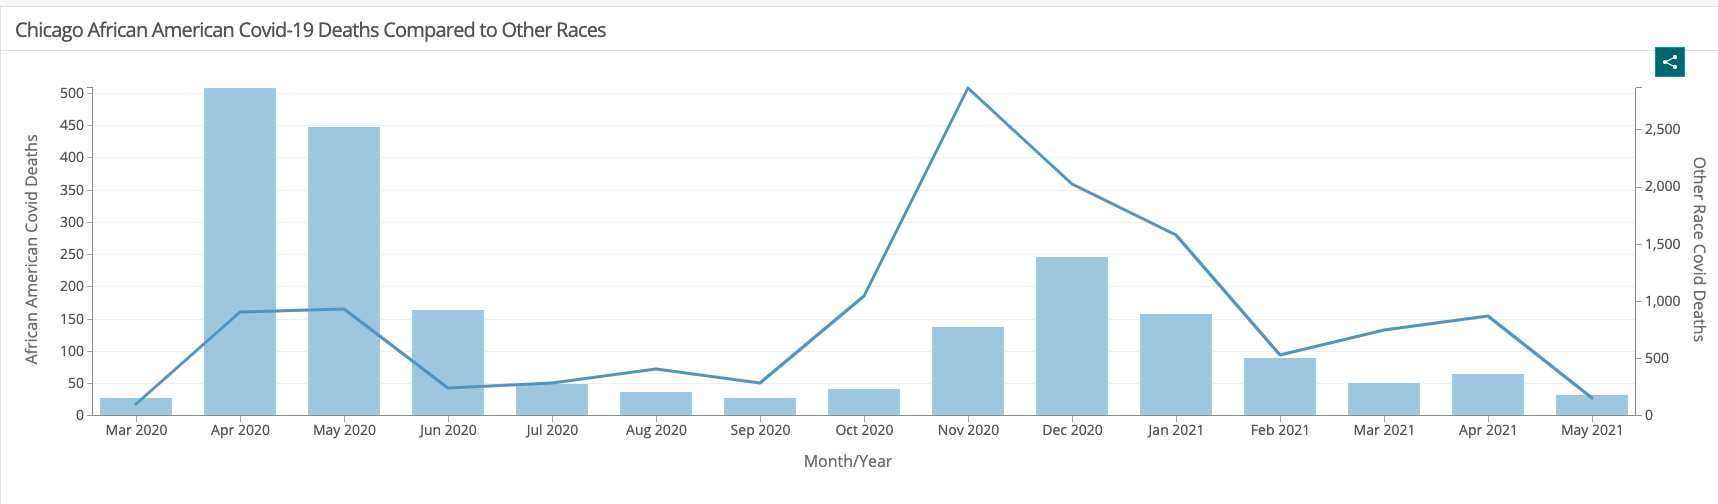

In [105]:
base64_data2 = "iVBORw0KGgoAAAANSUhEUgAABrYAAAH4CAYAAAAPYN3vAAABfGlDQ1BJQ0MgUHJvZmlsZQAAKJFjYGAqSSwoyGFhYGDIzSspCnJ3UoiIjFJgv8PAzcDDIMRgxSCemFxc4BgQ4MOAE3y7xsAIoi/rgsxK8/x506a1fP4WNq+ZclYlOrj1gQF3SmpxMgMDIweQnZxSnJwLZOcA2TrJBUUlQPYMIFu3vKQAxD4BZIsUAR0IZN8BsdMh7A8gdhKYzcQCVhMS5AxkSwDZAkkQtgaInQ5hW4DYyRmJKUC2B8guiBvAgNPDRcHcwFLXkYC7SQa5OaUwO0ChxZOaFxoMcgcQyzB4MLgwKDCYMxgwWDLoMjiWpFaUgBQ65xdUFmWmZ5QoOAJDNlXBOT+3oLQktUhHwTMvWU9HwcjA0ACkDhRnEKM/B4FNZxQ7jxDLX8jAYKnMwMDcgxBLmsbAsH0PA4PEKYSYyjwGBn5rBoZt5woSixLhDmf8xkKIX5xmbARh8zgxMLDe+///sxoDA/skBoa/E////73o//+/i4H2A+PsQA4AJHdp4IxrEg8AAABiZVhJZk1NACoAAAAIAAIBEgADAAAAAQABAACHaQAEAAAAAQAAACYAAAAAAAOShgAHAAAAEgAAAFCgAgAEAAAAAQAABragAwAEAAAAAQAAAfgAAAAAQVNDSUkAAABTY3JlZW5zaG90RD8zgAAAAj5pVFh0WE1MOmNvbS5hZG9iZS54bXAAAAAAADx4OnhtcG1ldGEgeG1sbnM6eD0iYWRvYmU6bnM6bWV0YS8iIHg6eG1wdGs9IlhNUCBDb3JlIDUuNC4wIj4KICAgPHJkZjpSREYgeG1sbnM6cmRmPSJodHRwOi8vd3d3LnczLm9yZy8xOTk5LzAyLzIyLXJkZi1zeW50YXgtbnMjIj4KICAgICAgPHJkZjpEZXNjcmlwdGlvbiByZGY6YWJvdXQ9IiIKICAgICAgICAgICAgeG1sbnM6ZXhpZj0iaHR0cDovL25zLmFkb2JlLmNvbS9leGlmLzEuMC8iCiAgICAgICAgICAgIHhtbG5zOnRpZmY9Imh0dHA6Ly9ucy5hZG9iZS5jb20vdGlmZi8xLjAvIj4KICAgICAgICAgPGV4aWY6VXNlckNvbW1lbnQ+U2NyZWVuc2hvdDwvZXhpZjpVc2VyQ29tbWVudD4KICAgICAgICAgPGV4aWY6UGl4ZWxYRGltZW5zaW9uPjE3MTg8L2V4aWY6UGl4ZWxYRGltZW5zaW9uPgogICAgICAgICA8ZXhpZjpQaXhlbFlEaW1lbnNpb24+NTA0PC9leGlmOlBpeGVsWURpbWVuc2lvbj4KICAgICAgICAgPHRpZmY6T3JpZW50YXRpb24+MTwvdGlmZjpPcmllbnRhdGlvbj4KICAgICAgPC9yZGY6RGVzY3JpcHRpb24+CiAgIDwvcmRmOlJERj4KPC94OnhtcG1ldGE+Ck28L2cAAEAASURBVHgB7N0HnBRF2sfxB1jCkhcFlBwUkKgoBhREUTEnMGLg1NM7jCeGU4xnFvE1IQaMoKJiVoyYERRFQBQlIyw5LVni2/9aauyZnc2BGfZXn88yPR2rv93To/XMU1Vm/fr124yCAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAQIILlE3w+lE9BBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBJwAgS1uBAQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAgaQQILCVFJeJSiKAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCBDY4h5AAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBICgECW0lxmagkAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIBAyqJFi1BAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAIOEFUlTDxo0bJ3xFqSACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggEDpFqArwtJ9/Tl7BBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQCBpBAhsJc2loqIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAQOkWILBVuq8/Z48AAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIJI0Aga2kuVRUFAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBAo3QIEtkr39efsEUAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAIGkESCwlTSXiooigAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAqVbgMBW6b7+nD0CCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAgggkDQCBLaS5lJRUQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEECgdAsQ2Crd15+zRwABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQSSRoDAVtJcKiqKAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCJRuAQJbpfv6c/YIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAQNIIENhKmktFRRFAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQACB0i1AYKt0X3/OHgEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBIGoGUkq7pjz/+aH/++ad1797datSoUdKHT5rjbdu2zb777jubMWOGVaxY0Zo1bWad9u+UNPWnogjECmRkZNioUaOsUaNGtt9++8Uu5n0cgY8++sg2btxoJ554YpylzEp0gTFjxtiCBQusx1E9rErVKole3Vzrx/2YKxErIIAAAggggAACCCCAAAIIIIAAAgiUgECRBrYUjPn+++9twoQJtnjxYtu0aZPVqlXLGjZsaF27drU6deqYGsYmBsvbtGmTa2Br5cqVdt1119kBBxxgF154YQlwFP8h1q9fb08//bTVq1fPevXqFfeActR5z541K7K8StWq9vz+z0fex04MHz7cPvvsM7vzzjttt912i12cUO+HDRtmGSsz7F//+peVSymXUHWLrUwy3YPLli61z4LA0dy5c23FihVWuXJl23XXXa3jPh2tY8eOxWKdn/tu4cKF9srLL1u79u3zHNjSZ+Gdd96x5cuX21lnnWWpqamxl8i2bN5iH3/ysU2ZMsXWrFlj+3bc1w448ACrXbt2lnXDM6ZOnWrffvtteJYz0/NKwbf69etb2bI7NqlVn5W/NmwoscDWtGnT7JtvvrFFixY5S/34QM/tzp07W4sWLaKseJO7wPvvv29T//jD3e87MrA1+ZfJNuX3KTYr+E5RgFn3eNOmTW3//fe3tLS03E9k+xolfT/Gq9iqVatsxIgRUYvKly9vu+++ux188MFxnxFRK/MGAQQQQAABBBBAAAEEEEAAAQQQQCDpBYossLVkyRK7/vrrbXXQ6BSvvBoEXl4cOjTeomznqSF8RdCgrSyvnSWwNeqzUfbN11+7cz78sMOt1i61spz/V19+5YJaaUFQUMGfmjVruiBhlhVDMxRMzAgCgcrwSuTAloIu77z9tqt523Zt7dBDDw2dReJNJss9+PJLL9tbb70ZF/CzTz+1o485plg+Q8V536kBXoFaH+A9+aSTszRaL1+23Prf1N+WBs8fXyb/8ou98MLzdtnll+d4f/3+++/24ciRfrMsr/r8XXXVVda6dessy4p6xuzZs4PznG3dDutW1LvO0/4UHLzt9tvs9yA4GK98EARobrjxRhcgjbeceQUXWL16tctkPO6440wBmqIs69aus4cfedjG//RT1G4VbFN5/vnn7dJLL7VDDjkkavmOvh+jKhPzRj82yO5z++QTT1jHffe1//znP1apUqWYLXmLAAIIIIAAAggggAACCCCAAAIIILCzCBRJYEsN0DfccIMLau0aZEmcffbZtsceezijSZMm2eTJk2333XbP0iidG2LLli2tzz/+YXvuuWduqybN8g8/+jBS148//tjOOvusyHs/8euvv7rJo446Ks8NyQqAyVq/wE/kMjIUSNB0oge2kuEefDsIFPqg1rFB47jugQYNGrjsjF+CII8COKecfEqx3BbFdd/99ttvdvfdd7tspZwq/tigx1xQq32HDnZ5EMhSRtcPP/xgjz32mD3++OPWrFkzl52S0z4O6dLFTj75ZFN22JLFS2zuvLn2dRB8Tp83z2695RY748wzs82uzGm/+Vn26quvuqD0jghs6bzvuvsuF9RKCQIrvc/uba3btLaaNWq6LB89v5cG2YDK+qMUvYC6nH0pyMw7/PDDizSwpWDlVf+5yv04RNe1T58+LkirLE5lbikzT0Hvhx96yBRcOyYIfvuyI+9HX4fcXuvUrWv9+vVzqynYNX36dHv33XddEO+RRx5xWc+57YPlCCCAAAIIIIAAAggggAACCCCAAALJKVDowJbGf7kx+CW/soX2DcbNUUNT+Ffn6h6oR48eOeqoUap69epZuv0qU6aM6Vfs2RU1yKrBtWrQTV+8Lsq03do1a23zls05dnuo/axYvsJSK6dmu59wHXw3bxr7Kj9l5syZtjjo4ktdsSl4pe7T4gW2li1f5na711575bh7ndtff/1labXSrEmTJu4vuw3UBeL6devdunKNLbqOa1aviZtBFruu3uuaVShfwSpXqRxvcdx5amj98ssvrVIQfFBXjDOD7DJ1eVY3aKDMqWi7VatXxe0yS+e/bt26uMvC+9Q+FICNlyEXXs9PKxOofIXyVq1atRK5B/1xVc/lK5a7LgTjXSe/nn/98osvXaN42XLl7Pbbb7dWrVr5Rbb33nu7v8iMmAl1Fbp61eo8m8Rs7t7mdN/5z5Xuz7yci9+/svoUUFK5IOiCVOMUTQkCXbFF1/OXIJiroswqXSuVLkGgqmKFijZgwP2u28///e9/bn52/ygjsnHjxm6xzkdj2Z166qmmwOtzzz5ryjY96MCDrH6D+ll2kZ/7Sp8ZPTNin1W6Dsp88/XPcpDQDP9ZUJ1zMtXnfeuWrXka10lBADnqRwkKJoa7plPXbvrLrigjaMvWLXmqu/aha6YuMsPfEX7f+sxVq14t7jK/jn/VM7h6teq5dq+Zn+ea7ldlHuu7KDbbR566TlqWU9F6mzdvzrOH9hXbHWZ2+8/v985777/nglo1gnvlgQcecJm/ft/KQtRf27Zt7aH/+z978cUXrVu3bu7eLI77UcfVtZdrXr43w99t2d3n2pcC174o8Kqg/rXXXGM/BRlqup6x227dutVWrliZp/sst+9M/3yrmVYzy3+7+DrpNT+fxfB2TCOAAAIIIIAAAggggAACCCCAAAIIZC9Q6MCWGp0VrNEvwq+88so8NUqqOmvXrjU1OGtcnM1Bg6FKw2BcG2WA+LFcFixY4BqsNR7XLdsburWeAkTKyJj7559660rFoJFLXSoddNBBrpH4zTfftD+C7pa2btniltcNxp3q3r27y8zwjV0ak+jxwYNt0sSJ2/dipgBBuDz11FMuKKZGOR1T2Qu+vmowPOOMM+zII48Mb5LttMZbUVEDosbu0VhjatBWAEJFlho75M85c9z722691dWnSpUqdtdddzmL0047zdq1a2dPPvlk5PzvDJZp38pUufuuu635Hs3d9moEf3Hoi/b555/bhqDB1ZfmQTbdvffeG2SkpNvrI153XT1qHB8VBZ1UP43/pfF1VJRZ9mzQwH/zTTfb2O/H2ldffRXZn9Y/77zz8mQw+rvRzk7XqFnTZi6wpeDBP4KsvHAZOHCgq9OgxwbZgAcG2PRg3B8VXWON9dO3b1/XcPncc8/ZoqC7ShVdt5NOPMnO7n22e+//0ZhBarhfGNxLKlpPjZ/ahw8w+PPT/aguuN544w3XIKx1HwqyGRQ0Ka578KKLLnJdR15wwQWunsoS8qVtcJ0vv+zyHANPw14a5lZXN33hoJbfR7xXXb+XXnrJnaOW6zwVRNXnV0GNV15+xd5+52079thj7fzzz8+yC3V7+M6777iAnwIBsfedGqUf/L8H3WdFnz/tXw3Qp55yapZ9xZuh8X+ODLIVFVCRu+obr8zZ/jnRcyM2KLT/Afu7++XP0DMi3j5ymqfz1+d9XPC5euLJJ+yOO+6IrJ6X+0or6/7W/TU/PT2ybcsg+KiAvT4HOrcngu7T9ExRt6t6nqjo3nw+6CZORX4zps+wQY8PinzmNU/PAT3zfCBKQabhrw63icHzzB+vWhCIad68uZ1wwgnWPgioxxYFS74NMndUlPHm9xW7Xvi9nitDhw113ef554o+mxpH8cILLowEm/zzW0HCKpWr2Ig3RgQ/NFjjdqXn8RVXXOHGedLn8+eff45k59UPsg3VlZwPNvrPp74DlEmnP/8M1n6uvvrqqABHXp9r/jnzcjDum57zCrprvy2CTGE9b1U0bqGW+y52dZ7K7uvZs2dU0ETZT3oe+fU0JmKvnr2sXHCdsit61txzzz22fFnmDxn++c9/Rla9//773fkX9HtHQRdlXanoM6xAaLyiz5iynPQjg7fefMsFb4vqftTxdK888+wz7pr57xjfxa7PAPT3SXbfbcqazWtRYFrXSMfSj1X0QwY9j94MumnVZ00/wFHR56dTp07uOmqsMV9y+87Uerom/xcEA/XfLv6/L5oE+9B9qB/yqBTks+g25B8EEEAAAQQQQAABBBBAAAEEEEAAgTwJFDqwpUZGFTUC+0BBXo583333udUU1KlQoYILZChQdWsQzHlmyDMuE0i/fFfDkX7x7It+iX1v0BioslvQiKSGLGVCTJ06NdKoNPrb0S7Do1nQoKsGdXW7NCPopujloDFfQS01TKoB66abb3bdmDUKsjXUwKf11EivY7YKGvoP2P8Ad05q/FWjrxrLlNXQpnUby1iV4br+eyoIMKmBXQGKnIoyB0aPHu0a1NSgnVop1QW2FJDygS2drwI+y4KGTjUAdwhs0mqmuawLb6EGYAVeVNoEv7bXL9AbNmi4/VfhW1x2mpapYfP6/15vc4LGUwUdFSTR9dEYXD4bYdbsWTb6229NXTq1DII9CjYq0PbRhx+asmZuu+027co2bdzkTO69715nsFfwS/86tevYhImZ43rJQF1NasysnMoHH3zgFiuDr0H9Bm4cJAXd+vTpE9VI7LIeggbmSy+71DUMHxh4LQ8a/TUuzBfB+hr3Shk8aiDtEjSmK9CpgJC641MmmO/OTedyVzBGk4osawfXbvz48TY2CCCqUVkN6rof/PkpGKqxaBQM2HuffUwBRe9eHPeg6rUhuKf+CLoKVFeeuj6dg/tQDae/BgEVjRV1z733BJlHA7RqlqJrpIZaNdL27NUzy/J4M4YG49y9+847bht/f035fYo7noJ9Dz/8cFCHzvbmm2+4Rn0FLX0g2O/vk08/cfeDxuVRo78+L8qKVFG2x5VXXenqpcCvGq91X8n9/vszP/N+Pzm9XnzxxZHFupfjlQ3rM4Ox2WXRKBNQQWJdu/w8m8LH0r2pwJa6OfMlr/eV1n8nsNbzSVmaqo+6C9X11t99QfAiJSXFBbg07p6uY9cuXd1hlD3qi3xv7H9jlvtDgXE9RxWkVlEwUfNq7bKL+1wok1HPxQnBM0OBmHhFARmVxsFzNK9jif33hv+6cc8U1NZnU0Umn37yictEVTBY94z/7KirTAWMFFDX+H96hisgrWe9AgF67ute1HNp3Lhx7rOswJKC9+HPp8Zb035kqc+yuthUAO/6664LDO6LBPTz+lzzzxl9vnSN69Wvb3Xq1HHBVJ2TArz6HOi6HBzc6ynlUkzBeWXw6Xnk71EF3oY8/bQ2MXWJqX3oRxUa5y230r5de/t29LfuvBRwr1Qxc1wo3dOF+d5RsExWCvLEjp8VW6fjjz/eHgk+939M/SO4DxoX2f2o42j8O3336lmgeujZ9mNwje8JMgP7BZlVBx54YOQ+ye67Lba+Ob3X97q+p/Wdp0xRlU2bN7lnnu7XA4Lj6b83dJ99P3asCwIPGTLEZZHl5TtT9VcwWcfQZ0Y/wtF/N+jHF/oBxODHB7tgWkE+izmdF8sQQAABBBBAAAEEEEAAAQQQQAABBKIFUqLf5v+dupJTCXcJlJe9KGNJgQU1UKooQPPvf//b/Xr9uzHf2RFHHJFlN1pHjZ0q55x7rp100kmRddQo5Rvge5/T284666yoTBff+KhunxTY0q+tlwbZJgpi6Jf7vqgRVuOdqJH1+BOOd7MfffRR15ClRlz9KtsfR5kB11x7jX380UcuY8lnGPh9hV+VDaAGao3no2649uu0n2t0VEO0xjdRxom6UNOfAkoKbJx15lmRxloFMVQU3FFAT428PqMqfBw//dWXX7mgloI/avwOZ2L4QIG6V2vwQANrEjTQ+bJ48WK7NAhw6PhhUy1XY94NQbeT/pf2mqdrqEb5jz7+KMfAlu4TZQWoPv4X+GoEVrbcuB/GmTJsYou6rNL+feBibNAQOTDoUktBrT2CcdfuvOPOSHbI8KCx+Y0g223U56NcYEt19/fKZUFQ0o/lpYbPf/f9t8vgGjVqVNR9pqCWGrCVSaL7U8W7+7oV5T3o96nXRkHWkRrz1eiqokbti4MMjtlBo6kyC3cJxsWJLQvmL3CzagWmfrvYdcLvdQ18UEv3hL/u3mpUkJ2izJWbbrrJlAmj4IPG6Apn+mjsKwVdFeCN95n/MAiKKtime1QBAx9EVWaXXNXYXlRl93qZ2RH6LOu6lkspF9m1PlM+81HX0GeBRlbI44SCFApsqN7ap7o9zc99dcvNtwTXbpeIgw6rbBwFUhToPjd4jimgoc+QPs8K5sYr2d0fChqoC78qVau4oJYCGcosDXf1558v8farILFKvGsZb30FlnVPKhiugJrPlFOQqH///i5I9cH7H0SendqH7MLjlOl+0w8FdH9l/pjhtsizQ4HRc845x2WvzZwxM/L88/u59da/19U8//x5Pggi+Yy6/D7XdC0uCTKFw985MlVQS0We/nvqrLPOdFnFCuKdeOKJtksQRBwWfF+oXBFkPOr57YuyXD8MMvayK/r86XorsCwLZWz5Z5220feSnrkF+d6Ztz1DUONp+e+r7OpRPwjoqehe0A88iuJ+VKaUvmt1f+pZoevk70l1nzpo0GPuWXPAAQdEqpXX77bIBjETejYPeWaIm7vvvvtGzlvZavcHzyJ5ewvdg8oU1rNs2tRp7v7Ly3fmsKHD3DXR94QCWb4og+u74PP87HPPuntb3+v5/Sz6ffGKAAIIIIAAAggggAACCCCAAAIIIJC7QGbrfe7rZbvGmu1dSylTJj9FGV6+sVDbKZCgTCaV+fPnu9fYf/QLfXXXpYaycFBL6/kGK02rISt2LCX9MlxFY3KpzJ2XGShSd17hogYxFV8HNYApw0dFDY/h49RvUN9OPOFEt0wN+jkVdUmmcswxx7hX7adb0OWfyqeffupe8/rPdUGGQk5BLe3nw48y66NuqMJBLS3z56BAgBr7wkUN+Qo+qfgusvxydbcUDmppvrofU/EN5O5NnH98tla48dhbfDAyM5MrdjMtDzf0+muj9RS4DAcy/L2jwJyK7hUFLtW46Ouo+drG3wvKIgoXdR+mrv98UCu8zE8X5T3o96nX8887Pyo4pWumLvZU0rP5PKzMyOxWS9csL8XfZ+qSM3zddT/06dPHBXDUIKsgxVFBV4Aqfhu/fwWIVfxyP9+/KoCrcu4550YFc/RZz24bt0EB/mkQdFmn7CQFjJ96+ilXbwVGlBWlbhV9KWi2lt/ef9b0TMjvfaVnhA/u+f35e9X/KMDPz+k1p/tjXvo8d+8oAKdAiAJ94eKDT+F5flrZZCrKpMpLGbn9Odfn/D6RoJa2k7HvSs8/e/z+VK/w81r3mw9oKOslnOmp4Ie6n1RZsDAzcOv3owzc8Lqar64Ptf/fg3PWtVfJ73OtY/DMDz+XtA9/n/tMT81TUYBZXSWqqMtHjZWo7hgVCA4HtbRczyjVrSClsN87/jkY++yPVxf/PezvhXjrxM7L7X7U+r7r3eOOPS4S1NL8Aw/K/C5Wt40KeIdLXr7b/Pr6PCr4pz91U6nvus+C71JlYCvTNFyaBt9d/ntP8zXtv8sWLsoM7vr7NrvvTF2TL7/8wu02NgPSf5er61L9yKAgn8VwfZlGAAEEEEAAAQQQQAABBBBAAAEEEMhZICXnxbkvVVaNfvWscSzyU+JlCPh56p4tXknf/iv02GBUvHWVpaFGx3lBF3XqPkhdAapsCRrBVfYIusVSUUN1uGgbFf0SX8U3vClDIRxkcQuDfzrs3cH9sl/Hya6oLuoqT41dyp5QV1wq+jW9ihpRNQ5NXoqCThqDKLfiG819411266s+6n5x0cJFtnjJYtc1nrowU9m83cpvq8bB2JLbNdP6+iW9uhxUUXaRP/9tWzO7mPstMFeGUmwjrLJUwkWN3urSShlBscv8e9+47e8Vbf9AkOUVLhrTRcUHL/2yfYLuB8PBMj8//Or3WxT3YHi/fly08DwFn5TR8teGv8KzI9PqKlHFX6/Igmwm/PnGq7uCLzqesup0v3Y/vLsNffFFd2/IVPbKilLWnEpsIMAf0n9e2rWPDhhruf/M+XUVWFyVscq/da8d9+0Y93MWtdL2N2qc7tevnxur7/Mg+05/vvjggxrPfcO9X5bfV31GVHTvKpjhS17vKz1TNCaX7jv9EEDd2Kn4Z5HfX06vud0fslBj++uvvWZ3BGPFqds/dTGnMelyCtRq7CsVdReZl+Kvb2yASdtqnDYV/+MB9yb4R885n63j5/nPq88W8vP1qoDlL0FwMvZ7IN7zR5lqur7KeFJw3T8b8/Nck1FsSZ+fOSaarllsV6CrgntKRc8CBTtU2gbdwsYWBfv0I4vYHwjErhfvvXcu6PdO5cqV3W799168Y/h5/vmRl6xPv01u96PW8z92+Gn8Ty4rzW+rV30XKiAtQ/89mNfvNr8fZQL6H534eQpS/ve//40KYmmZnmE//vije7apXrq31IWgiv8c5vadGb6OyhAOF3W7qaL/Ftq6ZWuBPovh/TGNAAIIIIAAAggggAACCCCAAAIIIJCzQKEDWxojRQ0+8xfMz/Jr+pwOHRvEyGldv0xjT6lo3Knsihqs1KWbfsGvogY0ZVzEZm2okV3dEKruGutFWRQKTvmMkxOOP8Ftr4CLim8odG9C//jz8HULLYpM+mwtNeT58cEiC4MJ1UEBtlatWoVnx51W43peihrYVGLPO7ztc889ZyO3j3ul+fLQefrgUHhdTefkHrtu+P3333/vMkk078knnggvikwruHfmmWdG3mtCjcLZlWpVq2W3yM33jevKYFGDZmzRfVEu+AsXjRuWW/HXOSeLvN6D4WPldJ3C64WnfVDAN4KHl8Wb9vdyvACt1vfe2p+67lO2ijK4vvvuO9eV49jvx7rGaI3Xll0WkLJXVOKdT+y9+8wzz9ji7V2Zuo2Cf26N6WrOz8/uVfV88oknXReUGjdN968CLOpOTV3a6TrHZkxlt69489etXee60tN+FEDJz331ZxCUVJehyjJV0bg/svcN6fGOl928eJ6x655++umme0KN7uoC7uFgrCt1m3jJJZdkO85SvfqZmbY+2Bu7z9j3uT1XlCGpz5yy/nzJ7l7R8pyW+e39qw/k+vf+Vc93BbZ0fyuwld/nWryMR3+ddX/6aX88vep+UDBxxfLM7wd1URmv6HqHAyLx1ok3z39WC/q9k59ngw9AaQy4vJa83I/+XlH3pfGKDPWjB19inw9+fnavCl777ieVKfVgkLmlbE09f8P10zhyjz/+eKQbVI21peviA9Z+/76+4W39Mr0u2Z7trensvlO0bPOWzVaQz6K2pSCAAAIIIIAAAggggAACCCCAAAII5E2g0IEtdUGo8ZgUvMhPV2OxQYW8VNc3yK9aHZ3lEd5W46EoqKUurjSOix/3StkmZ555RmRVNUqqC6O+wXhSyhjSn4qCO2oI7rR/J/fed7Hof9XuZob+8d03Zdcop+P6YNmpp/a0MmXLhLY2l8mhcabUVV9eAluqd16Kb2D+66+/TFl1seWzYDwlBbXUyKdxw/YOghh+3xo7RBlmsaVsuYL1XOkDe12CbgtjG5GVKfJR0L3ZJ8GYNbGBrZwyTWLrFvveB2m6B2O1/SsYPycvJS/nV5T3YF7qlNM6CiqrqEF2zpw5kXs9u23q16tv04PMIZ9xErueMhtVfAaFugtVYEv3isYo06vKMUdndqfp3sT84+87n+UVXqwgUbgo8OQ/P35+w0a5ZyP6df2rsnY03lG4KOtMgWSN9VWY8smnn7jNvUl+7it1j6Zr063bYXZ277MjGYnKVLvn7rsLU61st9UYSfpThtiIYMw5jRunAJcC8L6Lv/DGDepndqunsdTiXbPwuppW148K1ChwFS8AoKCWAhbhZf65Eruv/L6Pze7z2/v7VudYoOda2azPNd/95NVBRqDvOtIfL/z6/nvvu7fZfT8oyFKQUtjvHb+9gqrZjdHn6zUh+Iyr+OeJn1/YV323KND9/PPPR90PsfvVZ1Ulv/eJ/hvCB0Z1jfZq3dqNv/jsM89GxqpTwPaRhx92+//HBRe4TFOfmRY7Bpp/dmX3nek/+8qiGzRokNtnTv/k97OY075YhgACCCCAAAIIIIAAAggggAACCCAQLZC1RS96ea7vfJdkCs6oMbU4i2+six1DJnxM/XJb5frrr49q6Nc4NLFFWULqzujcYDyOR4OA2ItDh5oau8JjpajhTGMv6Zf78bpb9F0X1ts9M/Mh9hjfjv7WHaN9hw521tlnueCNAjj+74orrnCbqDvAcJZD7H7y+94HkHz9Yrf340v17t3b1AWfb1RU11q+S6bYbQryfvmy5S7QqEZDBRr9efvXCy+80I2Zpi7j9Gv7oiq+wd7fD0W136K+BwtTLwUs22zvAk3ZT7mVFi1buFXi3RMKaig4puLtdF+ocVqBYmVxTQ6CH7qOPujrVo75x3fhGe9Z4Me185uoMVrjqIX/fEDBr1PQ12HDhrlNw2M75XdfundfeeUVt9lpvU5zr94mt/tKYxwpqCW/Sy+7NBLU0k6UyRWv+O7M4i3L77w999zTbrjhBjtjexZkdmMAtu/Q3l1TBSDeeeedXA/TPBjnSiVeFs6M6TPcMh8AcG+K8J9ZszO7jgvvUsFSn7GoccKK6rmm7hBVcnsm7V4vM3A6I+jCM7YoGyletlfsev795k2Z3dnpfWG/dxS8ade+vdv1sJde8ofI8qrvHP/Dg+OOOy5qeWHvRz9uW7j7zqgDFPEb/UhFReNgzZw5003766cuChWo90EtLfQBNbdi8E9u35k+o03/LeCDqX7bnF7z+lnMaR8sQwABBBBAAAEEEEAAAQQQQAABBBCIFih0YEtjLHUKuv1SUYbCuB/GRR9h+zs/FknchXmc2Tr4RbYa1pVNpO6F4hXfzZcfC0nr6Njqniq2jB492s3q1KmTqREunGUQXtePSaRfnoeLGr7ffvttN+uII48IL4pMZ9do6FdQQ74aIJVd8sUXX/jZhX71wTmdd7yAmb8esV2QvfXWW5EumwpdiWAHH330kdvNYYcdFgmexe736KOPdrOUtVZURd3RKftOXZT5axTetxrE47mE14k3XdT3YLxj5Gfexf+82K0+Jeju65577ol7Tv5at9/e0P3pp5+68Z7Cx1H3dQrytgy6w1QGlIqCnYcffribfnh71kO3bt2yvY5a0We3vBQ0poe7GZP1++9nZre4HRbjPz5TSUElX//8HE71ViaOAlL6XLZo2dK6HdbN7SKv95U31xhH4ftM3Z/F3o8af0pZTgru6plSkKLj+e7rwtv7IFN2DfEKjp577rluk1eDe+C1YIwuX/fwfvw8P2bfi8H4a+FsJAVGnx7ytNvE/9ghvH1RTM8JupqMDagNHTY0co3k6OtZ2Ofa4Ydl3vefBZ+VP/74I0v1Za1j6XmgLiY1Nl1s3UZ+MDJPz1IfzP15ws9RxynM94529M9//tPt79vgu/L54LvL2/iDKPiq8ah0j6vbUZ8xXBT3o47h7wP9WCT23lRdCnqv+/rHvuo7/OggUK6i51X4fH3w02+ja6pAfbjk9p2p56H/b51HH33UjTkY3l6fAX3OdNzY89V6uX0Ww/tiGgEEEEAAAQQQQAABBBBAAAEEEEAgZ4GUnBfnbenFF1/ssnz+DDI+7r//PtddVZOgK0B1FTR//ny37MADD7Qrr7wybzvMZi392vof//iHPTF4sOteaNSoUS4gpV9e6xfal156qXUIMqO+HzvWdTOohiqNrzNmzBhbHnTJpMbjcNlvv/2CBuz37Iogk8gvU/d3LYOG7M6dO1v3w7tbuZRybr/av34JrqyBtkGWjLqeUnBNwYADg8wTbRNbNHaJGjzVwK7sl+yKfin/S5CtpKwK/aq8KMqJJ5zo9rcw6Irp3//+tzu+foE/PRh7R+d4yimn2I/jxrnAk7IKNDaNslD+CMb68l0yFbYeauDzXbnldF5HHnGkDQuy5dRtWrysuILUQ9ftsssuc12+vRRk7+haaVw1dX2n7IqM4PXSSy+LBCzyeoyivgfzetzs1tMYSRdedJE9M2SI87sg6G6rUaNGLvtAjaz6/OlchwQZXWr41TkPGvSYqbtJdZWlRnWN76YuCvUZUDec4aKgo7qs1H2h0qNHj/DiLNPKkFIAa2rQcKzP+75BpoSCOxqnKxzgybJhAWdoXC19bjT+lRrqFVxQMFOfuZtuusnd67ntWvfGrFmzTF2QqQFcXr6oITvclWVe76tDux3qAqsKVl1zzTWm55/OX8HreN2w6prNDupww403uGCc1u3Tp4+vRq6vCjJdHAQymjRt6gIU6jJT97nPljnj9L+7YY3dmbqQ1T2gAMjrQWDrveCZqB8saB8y1T2koP9TTz3lghXK+NO6+nxpLDM9T8YFzxJ1UZgWjAF48sknxx6iyN7fGvx4Qs9bZdcoOOHvy/PPP98dQ/dbUTzX6jeob8cdf7x9ENzLN/Xv7358oIwd/WBC3wXqcvHp4DOnYEXPnj1NQUHV7ZDgO0fd0up+0jNdnykFjnIqCpbq8zIk2J+yJitVrGSHHX5Ygb93/LHUteBFwT2hwJLO48svv3TXVXXWd6YyB1W3hsG9p+/OcCns/ah96b5SEF0BSWVTKSiqcdLkp+MrK03nXJRFGcj6jM0PrpMysvXfAypzg3O9+eab3Xe3xtIcG/w3Qez3XG7fmep+UP+t8/PPP7suWi/51yWmHwvoxzT6rOm50zl4pup5UdDPYlFasC8EEEAAAQQQQAABBBBAAAEEEEBgZxYoksCWGsoeeOABN6aLGrLUwKk/FTXsqaGvebPm7r3v8s69ifkndlnZMpkJZeGxlrp37+4a4zUYvMb20p+Kxn5RN2hqmFeDvrpP+zQYt0mlRlA/ZbMoy0AN4SrqztBnfamBy4+ho4CV368a4NRIpeDYXXfdZYODgJoaddVQp6Jf6qurLzVsxisaN0pFv1yPPbfw+mrwU0O8glDp89Ij64bH44pnEd5H7P7VAK9frWvMMQ10r4ZoFdVZAT3VSecnox+C8dH0p2WXBOerrJKXg4ybsHv4WOFpf1z/Gl6mcXvUHVujxo1zHL+lcpXKtm9Qp5+CeqpRMt6+/H7zUie/rlzvvfc+e+jhh0xBV/35orGXFMzLrcRzL6p70B9bn5HCFAWf2rVtZ4OfGOwaWBVM1Z+K7isFO3wXXMo82rhpoxvT7Zuvv44cVmPS9QvGE4odZ0fvdf1kV69+/SxmsddKARCN6XTvffe5QI0a1FXkrc+gCyIHgZD8FH+M8OfBb6/g8edBgNsXna+6HVNDus+E8ctiX/21VSDLB7P0LFBDf/3gXNVFojJyYkte7ivVuf+N/e2+INCvrsve3d7NX/MguHrjjTe655Q/L+1fQaI77rjDPTdHvP66O6QP1uTl/khJSXFjDCnYowCZL/I4L+hqtW27tn5WllfVQ0HIzgd1DrpjfTEzQLh9zEGtrMxHBV98UfepClCMDX5A4J+xqqMCTnJXxo+K983PZ9Ztt/3+KBdzn/Q67TT3zFJQwhc923XftmiR2c1mfp5rYX+/v/Brnz59rEnjJvb8C8+7IFU4v0eZjX7swl69erlg1EsvvxT1nO0ZzN+6Zau99dabOT7TtL2+jxTc+nDkSFeFNm3buM9iQb53wuegQLSeDY8Pftw9GxRs80VBSGU0nnHGGVnqV9j7UceQ733B81dZdQoy6TvGF90vCoqq5Pc+8dfNv/p96lXf1bpuTz7xhL3wwgvuT8H8J5960v03gf67QMc+PPjvCNlcf911kXPP7TtT+9d/6+i/A5Sxpe6Xw89QdVmsLLvCfBZ1DAoCCCCAAAIIIIAAAggggAACCCCAQO4CZYJAz7bGQcN1UZYtm7dY+vx09yt/ZVIUV1FWg8aD0rhHvuHeH0uZP0uWLjH9yj5eF4MXBVkuasy+/X//y9J4rcZh/UpfjcJDg0yi2KLgk7prUyNXMhRlTslJDcx+HBFfb3WfpIwMZWekpaX52Tvdqz/P8inlg6yStLj3REFOujD3YEGOl5dtFNhVV1gKSvnG93jbqe7KyNG4UWrULeqiTC3dW7nVozDH9fe2AtJ169SNdKNYmH3mZ9u83Ffqcm31mtXuOeWDPvGOoXNR9uSaIBicU9eo8bb18/yzV9mZ+kFBQZ9Rel5ozCeNIZVTYErnpkCpnrPxAg2+XoV5VbeQLwTBJQW2FIRRV5HK+NH5KesnXvHXpaiea/qsqHtDBfR03OyuozL+VD8/HlO8umU3b1WQ3afrX7NGzeCHGrWyrFYU3zt6NihrNS+f+aK4H8MnoWeSjl2jeg33DC6u+yV8TD+ta6J7WkWfrdyO7Z8r8b4z/T61jgLres7pu1P3WrgU1WcxvE+mEUAAAQQQQAABBBBAAAEEEEAAAQQyBYolsJXouOqCqd/VV1v9Bg3soSC7JLaoEeyM0093GUyvvPJK7GLeI4AAAgiUkEBsYKuEDsthEEAAAQQQQAABBBBAAAEEEEAAAQQQQCBBBfLXJ1iCnkR+q+V/WZ0ejLWhX8GHizK9/u///s/NUpd9FAQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAgcQQKJIxthLjVPJeC3XP1aVrVzc+xlVXXRl0X1bVdR21du1aNwC89lQ36K7o8ssvz/tOWRMBBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQKBYBUplYEuiCloddOBB9vkXn5vGRVFQq0aNGta0aVPrckgX67R/p1zH4SjWK8POEUAAAQSsRs0atmswVuPOPAYglxkBBBBAAAEEEEAAAQQQQAABBBBAAAEE8i5QKsfYyjsPayKAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCSKQKkcYytR8KkHAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIBA3gUIbOXdijURQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQR2oACBrR2Iz6ERQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQTyLkBgK+9WrIkAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIILADBVJ24LE5NAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAQD4Fmg1922atXZ/PrQq3etMqqTbz3JMLt5Mi2JrAVhEgsgsEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAoKQEXFDr53EldTh3nFn7dCrR42V3MLoizE6G+QgggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAgkl4DK25syZk1CVojIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAKJJZAI8SQX2GrcuHFiyVAbBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQACBbAS+y2Z+8c5OhHgSXREW7zVm7wgggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAkUkQGCriCDZDQIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAQPEKENgqXl/2jgACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggkrEClFDdqVcLWL7ZiBLZiRXiPAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCJQCgYd797L1g+63bU8+aNcec2RSnDGBraS4TFQSAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEECg6gbrVqtoVXTtHdnj/ycdEphN5gsBWIl8d6oYAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIFINA171aZNlrMnRLmFwdJ2YhZgYCCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggEBeBU7bv6PddeKxVql8OXv4q+/sykMzs7Ye+2aMbdi8Oa+72WHrEdjaYfQcGAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBAoPoEq5cvb2k2b3AF8QKtxWg27fMQ79tQX37r5/V9/x6pXTrUFGauKryJFuGcCW0WIya4QQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAgR0tcO0xR5ofM0tZWce2bmV71q5l/d//2O5+7+Oo6inwtTYjM/gVtSBB3xDYStALQ7UQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAgYII+KCWtlVXgwpu3f3uh7Z4zdqC7C6htimbULWhMggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAghkI0BgKxsYZiOAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACyShw3dsfRqrtuyJcNPAOu/GEHpH5yTpRZvbs2dsaN26crPWn3ggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIBAqRIo88QrZj+Py/Wcq5QvbxpDS+W0/TvaXScea43TatjlI96xp7741s3XOtUrp9qCjFXufbb/7NPJtv3rrGwXl9QCxtgqKWmOgwACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAgiUoIAPaumQr/8w3v35ANdNR3e3Nyf+6sbg0vLHvhljlw97XZMJXeiKMKEvD5VDAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBIpOQAGuFjfdaf3eeC8S1NLeL+tykFVKSfx8KAJbRXcvsCcEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAICkEvp4yNUs9N2zenGVeos0gsJVoV4T6IIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAALFLLBo9Rp75OvvIke59u2RkelEnkj8nLJE1qNuCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggECSClz50gi7/tW3LRkytTwxGVteglcEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAoJQJJFNQS5eGwFYpu0E5XQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAgWQUIbCXrlaPeCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggEApEyCwVcouOKeLAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCSrAIGtZL1y1BsBBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQKGUCBLZK2QXndBFAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQACBZBVISdaKU28EEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAoDQKNK2SarP26VSip65jJkIpM3v27G2NGzdOhLpQBwQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQSyFaArwmxpWIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIJBIAgS2EulqUBcEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAIFsBQhsZUvDAgQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAgUQSILCVSFeDuiCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCGQrQGArWxoWIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIJJIAga1EuhrUBQEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAIFsBAlvZ0rAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAgkQQIbCXS1aAuCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAAC2QoQ2MqWhgUIIIAAAggggAACCCCAAAKlRWDY93Ns7KzlpeV0OU8EEEAAAQQQQAABBJJWICVpa16Iiq9YscJWrVoVtYfq1atbWlpaZN6mTZts6tSpVqZMGWvZoqWVSykXWaaJ3JZrnYEDB+olS+nXr1+WecxAAAEEEEAAAQQQQAABBBDYMQIjJy+wN3780x38hL0b2AUHN90xFeGoCCCAAAIIIIAAAju1ADGDorm8pTKw9fTTT9u4H36IEjykSxe78sor3byZM2da//79bXMQ3FKplJpq9917n9WrXy9Py91KwT/xAljZ3bh+G14TW+CZsbMTu4I7uHYXHthkB9eAwyOAAAIIIIAAAgggkH+Bz35dGNnovQnzbNX6TXbVES0i85hAAAEEEEAAAQQQQKCwAooNxIsZFHa/pXH7UtkVobK1unU7zF4cOjTy17dv38j1HzBggLVo0cKGD3/VXn7lFWvatKndP+D+PC+PrMgEAggggAACCCCAAAIIIIBAQgsoW2vW0jVRdfzqj0V2xwe/Rc3jDQIIIIAAAggggAACCCSGQKkMbGVkZFjtOrUtNcjE8n/ly5d3V2TOnDm2dMkS6927t+t+UPM1nT5vns1Pn2+5LU+My0otEEAAAQQQQAABBBBAAAEE8iIQztbqtV+jyCbjZy+z60ZMiLxnAgEEEEAAAQQQQAABBBJDoFQGtlavXm1z5861d9991774/HNbtGhR5GosXrTYTTdv1jwyr1mzZm46PT3dclse2YgJBBBAAAEEEEAAAQQQQACBhBYIZ2vtUaea9T6gsZ3b+e/xtaYtWm19h/2Y0OdA5RBAAAEEEEAAAQQQKG0CpXKMrVq1atmUKVNs+vTpLjtLF/2cc8+1k046yTJWZbh7oFxKuci94LO5lq9YbuXKZc7PbnlkIyYQQAABBBBAAAEEEEAAAQQSWiCcrXXC3vVdXU/dp4GlVkixp76c5t4vyFhv5w4ZY0MvOiihz4XKIYAAAggggAACCCBQWgRKZWDrwQcfjFzftWvW2sAHB9qwYLytbt26mQ9iRVYITVSsUNHKlC0TmhM9qeXhMmzYsPDbyPTKlSsj00wgsDMJcG/vTFeTc0EAAQQQQAABBHZugVHTlkfG1mq6S2VrX7u8+f+ePah+JdvWuaG9+EO6/bV5q635a7OdMugbe/z0NpZavlR2fLJz3wycHQIIIIAAAggggEBSCZTKwFb4ClWpWsV69eplv0yaZLNmzbK0tDS3WAEvLVNR14UqNdNqWtmymf8Tk91yt+L2f84555zwWzc9cOBAq1mzZpb5zEgWAYKSOV0p7u2cdFiGAAIIIIAAAgggkEgCo2fOilTn5I6Nsvx/2rH71LRda1a3wV9MtZXrN7l1+772qz1xbierW71SZFsmEEAAAQQQQAABBBBAoGQF+KlZ4D1//nyn3rBBA2vaNLM/9QkT/x4keMKEzOkmTZrkurxkLx9HQwABBBBAAAEEEEAAAQQQyK9A7NhaXVvUjruL/ZvWsv8ctZftVj01svxfQ8fZ1MWZP36MzGQCAQQQQAABBBBAAAEESkyg1AW2lixZYsOHD7f0eemWkZFhX37xpXvfcd99bZddd7Vq1apZu/bt7bnnnrM5c+a4vxdeeMFatGzpfsGX2/ISu3IcCAEEEEAAAQQQQAABBBBAoEACUWNrdcgcWyu7HbVvUMOu7tHSmuxaNbLK9a9PsJ/mrIi8ZwIBBBBAAAEEEEAAAQRKTqDUdUVYtkwZ++qrr+yNESMiygpaXXTRRZH3/a7uZ7fdfptd06+fm9ewUSO77rrr8rw8siITCCCAAAIIIIAAAggggAACCSWQ12ytcKX3rFPNrunRyh77fKr9vmCVW3Tn+5Pt8iNa2uEt64RXZRoBBBBAAAEEEEAAAQSKWaDUBbaUlTV48GA3btaGDRusVlotK5dSLopZY2sNGDDA1q9f7+anpv7d7YRm5LY8ame8QQABBBBAAAEEEEAAAQQQSBiB/GRrhStdv2aqXXv0XvboZ9NswtzlbtGjn/1hq9ZvtpP3rhdelWkEEEAAAQQQQAABBBAoRoFS1xWht1SXgrVr184S1PLL9aqAVmxQKz/Lw+syjQACCCCAAAIIIIAAAgggsGMFCpKtFa5xrcoV7MbjW9uBzf8ek+uF0TNs6Ng54dWYRgABBBBAAAEEEEAAgWIUKLWBrWI0ZdcIIIAAAggggAACCCCAAAIJKBDO1jo+l7G1sqt++bJl7PqjW1m3VnUjq7z505/2+JfTIu+ZQAABBBBAAAEEEEAAgeITILBVfLbsGQEEEEAAAQQQQAABBBBAIEEEwtlazYMxsw5t8XfWVUGqeGX3FnZs+/qRTT/9daHd+9GUyHsmEEAAAQQQQAABBBBAoHgECGwVjyt7RQABBBBAAAEEEEAAAQQQSCCBcLbWCQXM1oo9nX92aWan7tsoMvv7GUut/1uTIu+ZQAABBBBAAAEEEEAAgaIXILBV9KbsEQEEEEAAAQQQQAABBBBAIIEEijpbK3xq5x7Y2Hof1CQy67f5GXbl8PGR90wggAACCCCAAAIIIIBA0QoQ2CpaT/aGAAIIIIAAAggggAACCCCQYALFka0VPsVeHRvaRV32iMz6c9lau+C5723L1m2ReUwggAACCCCAAAIIIIBA0QgQ2CoaR/aCAAIIIIAAAggggAACCCCQgALFma0VPt3j2u9ul3VvaeXLZf5v9op1G+3MJ0fbqg2bwqsxjQACCCCAAAIIIIAAAoUUILBVSEA2RwABBBBAAAEEEEAAAQQQSFyB4s7WCp9591Z17KqjWlq1Silu9uYgY+v8Z8bawowN4dWYRgABBBBAAAEEEEAAgUIIENgqBB6bIoAAAggggAACCCCAAAIIJK5AdLZWVTu0Re1ir2znZrvaf47ay2pXqxQ51r+HjbOZS9ZG3jOBAAIIIIAAAggggAACBRcgsFVwO7ZEAAEEEEAAAQQQQAABBBBIYIGSzNYKM+zTsKZd3aOVNapVJTK732vjbdK8jMh7JhBAAAEEEEAAAQQQQKBgAgS2CubGVggeg1tpAABAAElEQVQggAACCCCAAAIIIIAAAgkskDVbq06J1rZV3Wp2/TF7WYvg1Zdb35lk305f6t/yigACCCCAAAIIIIAAAgUQILBVADQ2QQABBBBAAAEEEEAAAQQQSGyBHZWtFVapVzPVbjmhnbVvkBaZPfDjKaagGwUBBBBAAAEEEEAAAQQKJkBgq2BubIUAAggggAACCCCAAAIIIJCgAlHZWrU1tlbJZmuFWapULGe3n9TW9g/G3vLl6a+m2/Af//RveUUAAQQQQAABBBBAAIF8CBDYygcWqyKAAAIIIIAAAggggAACCCS+QDhb6/i96ydEhW8IuiXs2vLvANur38+xp7+ZmRB1oxIIIIAAAggggAACCCSTAIGtZLpa1BUBBBBAAAEEEEAAAQQQQCBHgXC2VrMgW6vbDszWiq3of45oaT3a1ovMHjkp3QZ++kfkPRMIIIAAAggggAACCCCQuwCBrdyNWAMBBBBAAAEEEEAAAQQQQCBJBMLZWid0SIxsrTDdvw5tbift0zAy69upi+22d3+NvGcCAQQQQAABBBBAAAEEchYgsJWzD0sRQAABBBBAAAEEEEAAAQSSRCBLtlao679EOoU+nZvYmQc0jlRp4tzlds1rP0feM4EAAggggAACCCCAAALZCxDYyt6GJQgggAACCCCAAAIIIIAAAkkkkOjZWmHKM/ZrZP84pHlk1owla+ySF8fZhk1bI/OYQAABBBBAAAEEEEAAgawCBLaymjAHAQQQQAABBBBAAAEEEEAgyQSSJVsrzHpih3rW9/AWVq5sGTd78eoNdsFzY235mo3h1ZhGAAEEEEAAAQQQQACBkACBrRAGkwgggAACCCCAAAIIIIAAAskpkEzZWmHhI/eqa1cd2dKqVEhxs9dv2mIXvvC9zV2xPrwa0wgggAACCCCAAAIIILBdoNQHtjZt2mRTpkyx1atXR26KFStW2Jw5c6L+NC9ctN2vv/5qv/32m23ZvCW8iGkEEEAAAQQQQAABBBBAAIESFEjGbK0wzyF71LZ+R+9lu1SpEJl9xcs/2h+L/v7/1MgCJhBAAAEEEEAAAQQQKOUCmT8JK8UIQ4YMsc9HjbLLr7jCunbt6iSefvppG/fDD1Eqh3TpYldeeaWbN3PmTOvfv79tDoJbKpVSU+2+e++zevXruff8gwACCCCAAAIIIIAAAgggUHICyZqtFRbap2FN6398Oxv4yRRLX7HOLfrviAl2y4ntTMsoCCCAAAIIIIAAAgggkClQqjO2xo8fb19//bWVLVcu6n5YtWqVdet2mL04dGjkr2/fvpF1BgwYYC1atLDhw1+1l195xZo2bWr3D7g/spwJBBBAAAEEEEAAAQQQQACBkhFI9mytsFLTXSvbHSe3s+Z1qkVm/+/dX2z09KWR90wggAACCCCAAAIIIFDaBUptYEvBqwcffNAUsCpbNpohIyPDatepbalBJpb/K1++vLtX1EXh0iVLrHfv3lYupZxpvqbT582z+enzS/v9xPkjgAACCCCAAAIIIIAAAiUqsDNka4XB0ipXsAG99rY29WtEZj/w8RT7dMqiyHsmEEAAAQQQQAABBBAozQLREZ1SJDFw4EBr06aNdQm6GNy6dWvUmWu8rblz59q7775rX3z+uS1a9Pf/QCxetNit27xZ88g2zZo1c9Pp6emReUwggAACCCCAAAIIIIAAAggUr0A4W6tp7arWrWWd4j1gCe29TBmzO09ub/s12SVyxMc/n2pvjJ8Xec8EAggggAACCCCAwM4toOScCRMm2JIg0Sansm3bNlNCTuyf5ofL4sWLgyGYxtnyZcvDsyPTuS2PrJgAE6VyjK2RI0fajBkz7Mknnox7CWrVqmVTpkyx6dOnu+wsrXTOuefaSSedZBmrMtw2ytbyxWdzLV8R/4bw6/GKAAIIIIAAAggggAACCCBQdALhbK3jO9Qvuh0nyJ76H9c6GHPrD/t2WuYPLIeNmWWrN2y2Pp2bJEgNqQYCCCCAAAIIIIBAUQusXbPWBj0+KAhC/WApQY9xmzdtsrq77WY3/PcGq98g63/zLl261K7p1y9LNYY884zVqFHDFOB65JFH7Ntvvons7+hjjrELL7zQbZPb8iw7ToAZpS6wlT4v3V544QW77rrrrErVKnEvgboo9EU30cAHB9qwYLytbt26ua4H/bLY14oVKkbNGjZsWNR7/2blypV+klcEdioB7u2d6nJyMggggAACCCCAQEILjJq23GYtXePq2KhWqnWsW8F2xv8evXD/ulZ22xb7evoyd67v/DzXlq5aaxcdmLVRI6EvGJVDAAEEEEAAAQQQyJOAkmqqVq1q9w8YYE2bNnUZVjfceIO9/MrLdu2112bZx4oVK9y8p4cMsYoV/45RaJgllTFjxrig1m233+56sZv8y2S7/fbbrGPHjrbPPvvkutztJMH+KXWBrccGPebG1Brz3RjTn8rWLVtMWVwLFiywM844I+oSKfjVq1cv+2XSJJs1a5alpaW55Qp4+cCYui5UqZlW0736f8455xw/GXlVF4g1a0avF1nIRBIIEJTM6SJxb+ekwzIEEEAAAQQQQACBohQYPXNWZHcndWy0U/9/1n961LQaVWfZexPmuXMePWO5/bW1jPU/tnXEgAkEEEAAAQQQQACBnUOgUqVK1rdv38jJ1Nqllh144IH2TZBxFa9krMywsuXKZfvfw5999pm1bNXKBbW0fdt2bW2PPfd0MREFtnJbHu+YO3peqQtsKcKpqOXSZUuj7NesWZPtr/vmz5/v1m3YoIFV2B7xnDBxgh188MFuvvq5VGnSpIl75R8EENgxAs+Mnb1jDpwkR73wwCZJUlOqiQACCCCAAAII5CwQO7bW4TvJ2Fo5nfUFBze11Arl7LUf5rjVfpy1zG54Y6LddWp7K6tBuSgIIIAAAggggAACO63Ar7/+au3atYt7fitWZmZsKUC1bt06axDEMRSwKrP9vxE1RleHDh2itlWc5JdffnHzclsetWGCvCl1ga2LL744C72ytE4//XTr2rWrG4ht1KhR1uWQLla1WlX7efzPNnz4cOu47762y667um3btW9vzz33nLtBNENdG7Zo2TLbiGiWAzIDAQQQQAABBBBAAAEEEECgwAI7+9ha2cGc1amRVSpf1l4cnZmt9vvCVXbFK+PtniC4Va1S+ew2Yz4CCCCAAAIIIIBAEgt89dVXNmf2bLvooovinkW1atXcEEpvv/22LVu2zI3JVWuXXeyBBx4wLVOPc1UqRw/LVK1q5nztMLflcQ+6g2eWusBWdt4+eqlfuulGeWPEiMiqClqFb5p+V/ez24I+KP2AbA0bNXJjdkU2YAIBBBBAAAEEEEAAAQQQQKBYBKKytXataqUhWysMecreDaxKhfI2+Iupbnb6inV22Us/2f2n7W11q1cKr8o0AggggAACCCCAQIIJDBs2LG6N4g1rpBWVqfXYo49az2C4pFZBd4LxykEHHWT680Xb3HbrrTZ06FDXpWGFChVs85bNfrF73bhpo6WkZIaHclsetWGCvCGwFVyIV199NXI5lJU1ePBgF6XcsGGD1UqrZRqsLVw0ttaAYOC29evXu9l+ELbwOkwjgAACCCCAAAIIIIAAAggUvUBUttbe9Yv+AEmwx6Na17WalcvbQ5/8bus3bbFVGzbZv4eNs4Gnd7Smu0b/GjcJTocqIoAAAggggAACpUYguwBWPIBp06bZ//73Pzvs8MPtzDPPjLdK3Hlt2rSxZs2b2/Tp093y6tWr26qMVVHrZmRkmOar5LY8asMEeVM2QeqRcNVQil7t2rWzBLXCFVVAi6BWWIRpBBBAAAEEEEAAAQQQQKD4BEp7tlZYdv8mtezWk9pZWuUKbva2bWZXvzrefl0Q3WgR3oZpBBBAAAEEEEAAgeQQmB10PXjLLbfYwQcf7LKu8ltrjZvVsGFDt9kee+xhk3+dHLULZXU1adIkT8ujNkyQNwS2EuRCUA0EEEAAAQQQQAABBBBAAIGcBaKytTqUzmytsFDLutXsnp4dbPcaqZHZN7050cbNzhxAPDKTCQQQQAABBBBAAIGkEZifPt9uuOEGq1Onjh1xxBH222+/Rf40HtaWzVvs0ksvtbfeesud0/vvvW8//fSTKQtr5syZ9uSTT9rqVavs9NNOd8uPPvpoWxoEul577TVbsWKF68FueTAWV48ePfK0PBHh6IowEa8KdUIAAQQQQAABBBBAAAEEEIgSyJKt1apO1PLS+kbjaj14Rke7MQhozVq6xjHc/cFku+rIVnZoi9qllYXzRgABBBBAAAEEklZg/PjxtnnTJpufnm63Bllb4XLZ5Zdbo0aNbPGiRda4cWO3SMGuofcPta1btrj3KeXL2/nn97H6DTJ/CKbMrEv+9S97+umn7fUguFW2XDm3vGXLlm793JaHj58o0wkT2Prrr7+sYsWKieJCPRBAAAEEEEAAAQQQQAABBBJIIJytdRzZWlFXplL5skFwa58guDXJpizIcMse+vR3WxeMv3VMm92i1uUNAggggAACCCCAQGILHH/C8aa/7MrIkSOtYqVKtvfee7tVzjr7LDv99NNt+YrlLsbix84Kb6/Mr+7du9vKlSutZs2aVqZMmfBilxmW0/KolRPgTYl3RaiUuMcffzxy6hs3brRHHnnE+vXrZ1dddZVNmjQpsowJBBBAAAEEEEAAAQQQQAABBGKztbqTrRX3prj71Pa2T+NakWVPfTnN3hg/L/KeCQQQQAABBBBAAIHkF1i5YqWdeuqpVrbs3+GdcinlrHbt2hYvqOXPWMGstLS0LEGtvC736yXC699nXkK1mfrHVEsPUuh8eeedd2zq1Km2//77W9WqVe3NN9/0i3hFAAEEEEAAAQQQQAABBBBAwMjWyvtNcMvxbeygPf7ugnDYmFk2bOycvO+ANRFAAAEEEEAAAQQSWuDs3me7wFZCV7KYK1figa1Zs2dZ8+bN3WltCvqJHD16tEuZO++88+zCCy+0pUuX2vr164v5tNk9AggggAACCCCAAAIIIIBAMgiQrZX/q3Rdj1Z22F5/d0H4xk9/2hNfzcj/jtgCAQQQQAABBBBAAIEEFCjxwFblypUjqW5jxoyxzZs327HHHOto6tap614XLFiQgFRUCQEEEEAAAQQQQAABBBBAoKQFyNYqmPgVh+9p4bHIPp483+7/+PeC7YytEEAAAQQQQAABBBBIIIESD2y1adPGJk6caKNGjbK3337bmjZtavXq13MkS5ctda/16mW+TyAnqoIAAggggAACCCCAAAIIIFDCAmRrFQ78okOaWa/9GkV2Mmb6Erv57cn21+atkXlMIIAAAggggAACCCCQbAIlHtjq1KmTVahQwd566y1ndfbZZ0fMfvjhBzfOVqVKlSLzmEAAAQQQQAABBBBAAAEEECidAmRrFf669z6gsV3UZY/Ijianr7D/vjHBVqzbGJnHBAIIIIAAAggggAACySSQUtKVrVmzpt133322fNkyS6tVy8qW/Tu2duSRR1r37t1LukocDwEEEEAAAQQQQAABBBBAIMEEyNYqugtyXPvdrUZqig38JLMrwtlL19q1r/1st5/c3urXTC26A7EnBBBAAAEEEEAAAQRKQODvqFIJHMwfokyZMrbLrrtGBbW0rEaNGpaWluZX4xUBBBBAAAEEEEAAAQQQQKCUCkRna9FdfWFvg0P2rG23n9LeKqRkNgMsW7vRrn51vE1dvLqwu2Z7BBBAAAEEEEAAAQRKVKDEM7Z0dpN/mWxjvx9rK1assG3btmU54csuvcwqV6mcZT4zEEAAAQQQQAABBBBAAAEEdn6BrNladXf+ky6BM2xfr4YNOL2j3fzmRFu1YZNtDMbauv71CXbrie1s74Y1S6AGHAIBBBBAAAEEEEAAgcILlHjG1p9//mlPPPmETZgwwTIyMuyvv/7K8hcv2FX4U2UPCCCAAAIIIIAAAggggAACySBAtlbxXaVGaan2aO99rU61v8e2vv3dX+y7mUuL76DsGQEEEEAAAQQQQACBIhQo8YytcePGWYUKFezWW291XQ8W4bmwKwQQQAABBBBAAAEEEEAAgSQXIFur+C9g9Url7cnzOtlVw8fbnGVr3QEHfDjFLuvewrq3Ijuu+K8AR0AAAQQQQAABBBAojECJZ2z9/vvv1rp1a4JahblqbIsAAggggAACCCCAAAII7KQC4WytYzswtlZxXuaHzuxoLXerHjnEY6Om2vuT5kfeM4EAAggggAACCCCAQCIKlHhga7fddrMZM2YkogV1QgABBBBAAAEEEEAAAQQQ2IECsdlaR5A9VOxX496eHaxDw7TIcZ75Zoa99uPcyHsmEEAAAQQQQAABBBBINIESD2x1O7SbrV692r784ktjLK1Eux2oDwIIIIAAAggggAACCCCw4wTI1tox9red2NYOaL5r5OCvfD/bnv9uduQ9EwgggAACCCCAAAIIJJJAsY+xNXPmTHviiSeynPOIN0aY/ipVqmRly0bH126++WarVq1alm2YgQACCCCAAAIIIIAAAgggsHMKkK21Y6/rf4/eyx4OuiL88vdFriLv/DzX1m/aYv8+tPmOrRhHRwABBBBAAAEEEEAgRqDYA1uVK1e2PfbYI+awOb8tX758ziuwFAEEEEAAAQQQQAABBBBAYKcSIFtrx1/OK7u3sBqpFUxBLZVPJs+3dX9ttquPamlldnz1qAECCCCAAAIIIIAAAk6g2ANbGlPr4osvTljuTZs22fTp061BgwZRWWKaP3XqVCtTpoy1bNHSyqWUizqH3JZHrcwbBBBAAAEEEEAAAQQQQACBbAXI1sqWpsQX9OncxKqnptjQ72a5Y387bbGt3bjZ+h3ZyqpUjP7/4hKvHAdEAAEEEEAAAQQQQCAQKPbAVqzykCFDLC0tzXr27Bm7yDIyMqx///52yy23WJ06dbIsL44Zqs/no0bZ5VdcYV27dnWHUPeJqsfmILilUik11e679z6rV79enpa7lfgHAQQQQAABBBBAAAEEEEAgTwJR2VrtM/+/K08bslKxCJy6TwOXufXYqD/c/n+es9xuf+8Xu6bHXlanWsViOSY7RQABBBBAAAEEEEAgrwLRg1vldatCrLdh/QZTtlO8sn79ejd7zZo18RYX+bzx48fb119/bWXLRf/qbMCAAdaiRQsbPvxVe/mVV6xp06Z2/4D7I8fPbXlkRSYQQAABBBBAAAEEEEAAAQRyFMiSrbVX3RzXZ2HJCHRvVcduOr5t5GDTFq22W9/+xWYvWxeZxwQCCCCAAAIIIIAAAjtCoMQCWxMnTrSRI0fawkULbcaMGW5a7/3fiBEj7OGHH7aUlBQXSCpujFWrVtmDDz5offv2tbJl/2aYM2eOLV2yxHr37u26H9R4X5pOnzfP5qfPt9yWF3e92T8CCCCAAAIIIIAAAgggsDMJkK2VuFdz38Zp9sDpHS2lbOYIWwtXrbeb3ppoUxasStxKUzMEEEAAAQQQQACBnV6gxLoiVCBp9OjRrrvBlStX2oIFC7LgajyuU04+xY1rlWVhEc8YOHCgtWnTxrp06WKPPfZYZO+LFy12082bNY/Ma9asmZtOT0+PzMtuue+uMLIiEwgggAACCCCAAAIIIIAAAnEFyNaKy5JQM5vXrmJPnNvJrho+3tb8tdnWBn83vjnRZXMp8EVBAAEEEEAAAQQQQKCkBUossKUAkv40plWlSpXsjDPOiDrXsmXKugypqJnF9EZZYsoae/KJJ7McIWNVhptXLuXv7gmVtaWyfMVyK7e928LslrsV+QcBBBBAAAEEEEAAAQQQQCBXAbK1ciVKiBV2qVrRnr3gQOs79EdbumaDq9Od70+2q49qZV32rJ0QdaQSCCCAAAIIIIAAAqVHoMQCW5709NNPtw0bNpgPFvn5JfWaPi/dXnjhBbvuuuusStUqWQ6bU70qVqhoZbZ3wZBlw2CGlofLsGHDwm8j08pYoyCwMwpwbyf2VeX6JPb1oXYIIIAAAgiUNoFR05bbrKWZ4ys3qpVq++1e0fjvlcS+CwactKf1f2+azV+VGdx68JPfbWnGGjtsDzK3EvvKUTsEEEAAAQQQQGDHCWiIJw1RtWzZMpf0VLduXWvYsKGlpqYWuFIlHtiqXr26q/ysWbNM3RPGK23btC227K3HBj3mxtQa890Y05/K1i1b3Fhf6h5xr732cvPWrlkbCXytXr3azauZVjMyHld2y92K2/8555xzwm/dtLpArFmzZpb5zEgWAYKSOV2pHX9vc30S+/rkVDuWIYAAAggggEBpExg9c1bklI/fuyH/nxTRSOyJQUG3hNeOmGDTF2X+f/KL388zK1feTtmnQWJXnNohgAACCCCAAAIIlKiAYkAvvfSSLVy4MMtxy5Yta0cffbT1OKpHgWJBJR7YWr5sud151522cePGLCfjZ9xzzz1WrVo1/7ZIX5s2bWoVK1a0pcuWRu13zZo17teBWq4yYeIEO/jggzOnJ0xwr02aNIl0RZjdcrci/yCAAAIIIIAAAggggAACCGQrEDu21pF71c12XRYknsCAXnvbLW9Ptl/SV7jKvfjdLFu3cYv1PqBx4lWWGiGAAAIIIIAAAgiUuMDcuXNNST4KYGmIqpYtW1paWprrzU+BrlGjRrlko6VLl9p5552X7/qVeGBr3I/jbPPmzXb88cdblSpV7PXXX7e+ffva2LFjbfz48XZO73OKLaglnYsvvjgLksb7UheJXbt2dcvatW9vzz33nDVokPmLM3Vd2CKA99kouS3PcgBmIIAAAggggAACCCCAAAIIRATCY2sd075eZD4TySPwv5Pb2oCgK8Lvpi1xlR7x45+2ftMWu+iQZslzEtQUAQQQQAABBBBAoFgEnn32WUtJSbFbbr7Fau1SK+oYCnIdeuihNmTIEPvhhx/s4M4HW/M9mketk9ubsrmtUNTLJ06caK1bt3ZpZsqA2rp1q7Vq1cr69OljPXr0sBeHvmhbNm8p6sPmur8yZcpE1ul3dT8XPbymXz/Tn7pP1JhcvuS23K/HKwIIIIAAAggggAACCCCAQLQA2VrRHsn87tqjWtkx7etHTuGDien2yKipkfdMIIAAAggggAACCJQ+gXVr19mSJUvshBNOyBLUCmsoU0sZXVOmTAnPztN0iWdsqVY+cFUrLTNSp7G2FDzq1KmTffjhh5Y+P90aNWqUpxMoipVeffXVqN1UqVrFBgwYYOvXr3fzYwcxy2151M54gwACCCCAAAIIIIAAAgggEBEgWytCsVNMXNylmdVITbHh389x5/PF74tc5tZ/jmhlFVL+/gHpTnGynAQCCCCAAAIIIIBArgLz0oMxWIPSvHnOWVgVKlSwXXbZxebOm5vrPmNXKPGMrYYNGtq06dNs27ZtpgCR0tE+eP8DF+yaPWu2q19xja8Ve/K5vVdAKzaoFd4mt+XhdZlGAAEEEEAAAQQQQAABBEq7ANlaO+cdcMZ+jeySbntGTm7sjKV298jfLGP9psg8JhBAAAEEEEAAAQRKh0DVKlXdiW7alPt/C27ZsiWSCJUfnRLP2DqkyyG2fPly27hxo1WsWNEOOeQQ+/LLL23M2DGuW8LatWu7bgDzcxKsiwACCCCAAAIIIIAAAgggkPgCZGsl/jUqaA2PbrOby9y6/8PMrmQmzl3ugltXHdHSdq9RqaC7ZTsEEEAAAQQQQACBJBPYbffdXI1//fVX23PPv3/8FHsa6slPsaLOnTvHLsr1fclnbDVsaJdedqkLaql2PXv2tCOPPNIaBvOP7nG0XXXVVblWmhUQQAABBBBAAAEEEEAAAQSSS4BsreS6XgWp7UHNdrW7Tu0Q2XTqwlV2z8hfbcbiNZF5TCCAAAIIIIAAAgjs3AIaN6tdu3b22WefmYJb8craNWtt0KBBblHHjh3jrZLjvBLP2IqtTZkyZeykk06Knc17BBBAAAEEEEAAAQQQQACBnUiAbK2d6GLmcCqtd69ug3rvZ5e//KNt3WY2d/k6u/ODyfafI/ey9g1q5LAlixBAAAEEEEAAAQR2FoHzzjvPbr31Vhs8eLDVq1fPZW7VqlXL1q9bb4sWL7KJEye6Hvx69exlderUyfdp75DAllLM3n/vfZs9Z7atXbvWbrvtNitfvrxNmjTJ1qxZU6DUs3yfORsggAACCCCAAAIIIIAAAgiUiADZWiXCnDAHqVcz1YZe1Nn++cL3tm7jFlu5bpP9771f7JqjW9uBTWslTD2pCAIIIIAAAggggEDxCKSmptodd9xh7733nn399dc2f/78qAPtvvvudtZZZ1mzZs2i5uf1TYkHtpYtXWp33Hmnbd682ZSStnXrVvenCs+cOdOlp+27776RrgrzeiKshwACCCCAAAIIIIAAAgggkJgC4Wyto9vXS8xKUqsiFahcoZy99M/OduHz39vytRttS5C+dV/QLeHlwZhbh7fM/69yi7Ry7AwBBBBAAAEEEECg2AUqVqxovXr1cn/qenDxksVWpUoV23XXXV1sqDAVKPExtt55910X1Lrmmmvs6quvjqr7Hs33cO8XL14cNZ83CCCAAAIIIIAAAggggAACySkQm6111F51k/NEqHWBBJ7pc4DVq1E5su2jn/1hH0xaEHnPBAIIIIAAAggggMDOL1ClahVr2rSp63Zw9OjRNmHChEKddIlnbM2ZM8fatm1rTZo0sdmzZ0dVvmq1qu79unXroubzBgEEEEAAAQQQQAABBBBAIDkForK12pGtlZxXsXC1HnTOvvbfNybaHwtXuR0N+Wa6rdu02U7bt2HhdszWCCCAAAIIIIAAAgkroPjPb7/9Zlu3bI2q44SJE9wQVRqeqlXLVlYupVzU8ry8KfHAVlpaWpb+FH1Fx3w3xk2qf0UKAggggAACCCCAAAIIIIBAcgtkydZqTbZWcl/Rgtf+3p4d7O6Rv9m4WcvcTl4eO9uNv3X+QU0KvlO2RAABBBBAAAEEEEhIgYceesimT5+eY90GDx5s7dq1s0suuSTH9eItLPHAVseOHe21116zYcOGRQYGW7hwoUs9GzN2jO22225WvXr1eHVlHgIIIIAAAggggAACCCCAQBIJkK2VRBerBKp647Gt7bHPp9moKQvd0d4eP9fWb9xi/zq0eQkcnUMggAACCCCAAAIIlITAqlWrXFDr0EMPtWOPOdZSK6dGHfbV4a/asmXLrO+lfa1MmTJRy/L6psQDW127dnVdEI4dO9b0pzJgwAD3Wq1aNbv44ovdNP8ggAACCCCAAAIIIIAAAggkrwDZWsl77Yqz5pcdvqfVqFzB3vzpT3eYjyfPDzK3NtvVR7YszsOybwQQQAABBBBAAIESEli0aJE70nHHHmeVq/w91qo/fJmymcGssmXL+ln5fi3xwJZqeN5551n3w7vbL5N/sSVLllhqaqo1aNDAOu3XqUD9Keb7rNkAAQQQQAABBBBAAAEEEECgWAXI1ipW3qTe+bkHNrbqqeXt+W9nuPP4ZupiW79pi119REtLrZD/MRaSGoPKI4AAAggggAACO5lAw4YN7YADDrBt27bFPTN1P7hu7bq4y/I6c4cEtlS5+g3qu7+8VpT1EEAAAQQQQAABBBBAAAEEkkOAbK3kuE47spYndahnNYPg1kOf/u6q8WMw9tZdI3+1/wTBrV2qVtyRVePYCCCAAAIIIIAAAoUQqFSpkvU8tafbQ7wAVtMmTbMsU3eF+emWsMQDW+p+cNKkSTZ//v+zdx/gVVT5+8Bf0nsjvZEEUiAQioBUKaEvCggii+zacPWPbRF1RQQFZVUQ1oL6s62LIiC4q6CCSJcq0kOAJEAIkEpICOmV/5wT7pCbctNvbnLfeZ7hzpxzZuacz2RXyPd+z0lCYWEh3N3dZbbWqFGj4Ojo2AguXkoBClCAAhSgAAUoQAEKUIAChiDAbC1DeAuG34chIW5wVIJbCzdGyc5GJ2bhn5tO41llWkJ/56rT1hj+iNhDClCAAhSgAAUoQIGsrCzMmzevXhBPPfUUwsLC6nyN3gJbIjL33vvvITExUXZOrKdlaWmJ+Ph4nD9/Hnv27MG0adMwYMCAOneeDSlAAQpQgAIUoAAFKEABClDAsASYrWVY78PQe9PDzwn/uv8OzP72iOzqhas5ePvn03h6RAjCPB0MvfvsHwUoQAEKUIACFKBAJQEbGxtMmDBBq7SkpASZGZk4euwoioqKMH78eK0MLU9PT632tZ3oLbC1Zu0aGdQaMmSIHJSFhYXat7Nnz2LlypVYvXo1OnXqJLO41EoeUIACFKAABShAAQpQgAIUoECrEdDO1vJqNf1mR1tOIMDVBv9++E488uXvshNJWflYsvk0nooMQy9/p5brGJ9MAQpQgAIUoAAFKFBvAXNzc4wcObLa60TA6x8v/QNlZWUYM2ZMtW3qUmhSl0aNbZOWloZjx45hQP8BuO+++1AxqCXuLVLMXnj+BfmY9evWN/ZxvJ4CFKAABShAAQpQgAIUoAAFWkCgarZW/b552QJd5iMNRMDZxgL/e3IwLM3Kf02RmVeMpb+cxt5z6QbSQ3aDAhSgAAUoQAEKUKCxArZ2tggODkZ0dHSjbqWXwFbCxQTZybvvubvGzrq0d0G/fv2QcKm8bY0NWUEBClCAAhSgAAUoQAEKUIACBilQMVtrdDdmaxnkSzLgTrVT+rb28YFwtbOSvSwoLsWyLWfw6+lUA+41u0YBClCAAhSgAAWaR+DGjRs4fvw4rl69WqcHiASjPw79gYxrGdW2b2x9tTdtQKGYitDU1LQBV96+RC9TESanJMPMzAxiXS1dm7+/Pw4ePIjSklKYmjVuYLqewzoKUIACFKAABShAAQpQgAIUaFqBytlao7swW6tphY3nbp892Adz1h2DWG9LbB/vjEVeUSkm9vA2HgSOlAIUoAAFKEABoxXIzcnFhx99qASpDsFMmdavpLgYHsoaVHNfmgsfX58qLjdv3sT777+PvXv2qO3HjB2LRx99VLZtbH2VB9ZSIKYZTEiomsBUWFiIkydPyrpp06bVchfd1XoJbIkO29ra6u6JUtu+fXvZJic3B46OjrW2ZwMKUIACFKAABShAAQpQgAIUMAwBZmsZxntoK71YNrUnFm6MxvHL5d84XrnvPPKLSzCtjz9EZhc3ClCAAhSgAAUo0FYFRNKPnZ0dlixdisDAQJmBNffluVi9ZjVeeKF8SaeKYz9w4IAMar22cCHCw8NxKuoUFi58Db169ULPnj3R2PqKz6rLcXZ2NpYtW1ZjUycnJ/Tq2avG+rpU6CWwJToionQidU7XVlBQoKuadRSgAAUoQAEKUIACFKAABShggALM1jLAl9IGuvTqPeFYvjUGe2LT5GjWHUrAoQvpiOzshbFdPWFqwhBXG3jNHAIFKEABClCAApUErKysMGvWLLVUs4zTHiUjq7pt27ZtCA0Lk0EtUd+1W1d0Utax2rRpkwxsNba+umfqKrOztcPf/va3apu0d2kPL28vmJg0bpUsvQW2RJTu5ZdfrnYwLVEo5pkU63l5e3vDw8NDqwuZmZlVgnAODg5wdnZW2xUr6X+xsbFo164dQkNCOXWiKsMDClCAAhSgAAUoQAEKUMDYBJitZWxvXH/jfW5kKBytLfDTiSvyoRfTc/HFnnP4NTpZCXB5YowS4LI0a9wvRvQ3Gj6JAhSgAAUoQAEKNEwgOjoa3bp1q/ZisQZX9+7dtepEpldUVJQsa2y91o3rcCIyziIiIurQsuFN9BLYEmll9Zla0NrauuEjquXK5ORkmQaXcPGiOt+ks4sLnnjiCZmaJy7/7LPP5PyVFW81aPBgPPvss7LowoULmDdvnpzbUhRYKf19+6234e3D+b4rmvGYAhSgAAUoQAEKUIACFGj7AszWavvvuKVH+OigQHg7WWPb6WR13a3LGbn4jzI94ValbHhnD4wN94K1Bdfqbul3xedTgAIUoAAFKND0Art374aIZ8ycObPam4ukIlsb7aWg7O3sIcrF1tj6ah9ah0KxtpcIriUmJiI/Px9ubm7o0rkz2ru61uFq3U30Etjq2KkjxG4Im5i/sUePHvjHP/4hIbOysvDqq6/io48+wueffy67KKZMHDp0GB559BG1y2Zmt6mWKnNbhoSEYMH8BSi7WYbXX39dme9yCd599121PQ8oQAEKUIACFKAABShAAQoYgwCztYzhLbf8GMXUg2LfcjoF25U9LrX8FzWJmXn4en88tp5KQWQXD4xW2thbmrd8h9kDClCAAhSgAAUo0AQCIlNrxQcfYPKUKQhTphusbrOwsEBJaYlWVVFxETQxjcbWa924jidixrz33n8P165dq3LFsGHDMHny5Crl9Sm4Ha2pz1WtuK3IBpsxY4Y6ApFJ5uPjg5iYGLVMBLtEqlx1mWMJCQlIV1L7Zs+eLacfNIUpHnjgAbyiZHAlJSYxa0tV5AEFKEABClCAAhSgAAUo0NYFmK3V1t+w4Y1vdBdPiH3bmVQlgysFMSnla3mn3MjHNwcvYmt0CoYrAa4xSgaXozUDXIb3BtkjClCAAhSggHELrFq1qlqAijELTYO4uDgsWrQIw4YPx7Rp0zTFVT7FMko3ssr/TqSpFDEOUS62xtZr7lmfz08/+xRiyadBgwbJaRI//PBDTJw4EWI2vJ07d8qYTL9+/epzS622RhfYqjh6Afv777/jkLLffc89apVIzbt8+TI2btwIezs7dAkPV9fhSkstX7S2Y9DtDLSgoCB5rUip43SEKiMPKEABClCAAhSgAAUoQIE2LsBsrTb+gg14eCOU6QfFviMmTWZwnU7Kkr1Nyy7A2t8TlAwusQaXF0Z384SLjYUBj4RdowAFKEABClDAmASqC2BVN/6LytSDCxYswMCBAzFr1qzqmqhlnTp1wokTJ9RzcSAyvcKVuIbYGlsvb1KPP0R85cqVK+jbt68MyBUWFsqrRT9GjBghl3k6dOgQGNiqB6qm6V/+8hcUKPM6iq13nz4Q55rNRVlz68yZMzh37pzMzhLlM5T6CRMmIOtG+V+WxQJoms3cvPxbYBmZGZoiflKAAhSgAAUoQAEKUIACFGjTAszWatOvt9UMbnioO8T+W+xVZb2tVJxKzJR9v5ZbhHWHE/Dr6SRlDS4vJYPLE272lq1mXOwoBShAAQpQgALGKyBmhps7dy7c3d1lIOj06dMqhp+fH2ysbfDMs8/IukmTJmHMmDHYvm0b1q1bh5EjR+LXX39FhjIF4OjRo+V1ja1XH17Hg+TkZNly8ODB1V7RoUMHue5WtZV1LDTajK358+fjqjKloIhcitQ3sc6WSOsT2/Lly1W+3JxcLFu+DKu+/lpZd2soNEEstUGFA0sL7b8k15RWeP369QpX8ZACbUeAP9uG/S75fgz7/bB3FKAABShAgdYmsCUqUe3y4I5O4N81VA4etIBAhLs5Itx9cSjBHr+dz0B0co7sxfW8YvzvyCUlgysRgzq5YGhHF7jbM4OrBV4RH0kBClCAAhSgQB0Fjh49ipLiYmXpo0S8qmRtVdyeevpp+Pv7Iy01FSJAJLaAgAA8/sQT+Oyzz7BeCW6ZmJriwQcfQmhoaJPUy5vU4w8rKyvZOi8vr8pVaWlpOHXqlFwKqkplPQqMNrAVEhICsYtUPvGD8MXnn0Ogiihoxc3WzhZTlIXZok6eRHx8PJydnWW1CHiJOrGJ1DqxOTk7yU/NH9WlFS5btgxOTtrtNO352RoEGJTU9ZZa/meb78ew34+u3rGOAhSgAAUoQIHWJCCytS5llM+AEehqh0m9A1tT99nXNiwwSvn39qjuHXDgQoaSwZWMYwnlM6tkF5Zic/RV/HYuU8ng8pQZXN5O1m1YgkOjAAUoQAEKUKC1Coy/ezzEXtO2adMmWCrBox49eqhNxBR/kZGR8stm4ne07dq1U+vEQWPrtW5Wy4kmxnL+/Hl1OkRxyfvvv4+ioiKYmJhg/Piax1fL7WV1swe2UlJS8OOPP9alL2obMS2gJqqnFjbjga1teYAqPT29SmBLPDYpKUk+3c/XFxaW5VlZx08cl0ExUXH8+HFZLyKj3ChAAQpQgAIUoAAFKEABCrR1gYpra43q6tXWh8vxtUKB/kEuEPsfFzOU6QhTcDj+mhxFbmEJfjx+BduikzFMCXCN7uoJf2ebVjhCdpkCFKAABShAAWMVuJ55Hffee68MEFU0EMEsTWJOxXLNcWPrNfep7VPEdiZOnKgm+IjnWlhYwMbGBp07d5Z1bm5utd1GZ32zB7ZEZlNcXJxWJyqmoJmZmaGsrEzuopG3tzfKSsu02jflyZEjR+QUhHfccYcMnp1UMrFWr14NTy8viSqmJ9y+fTsGDxoMO3s7HDt6DGvXrkUvpX17V1fZlW4REfjyyy/hqwS6xLZy5UqEKGl9LZ+tIrvDPyhAAQpQgAIUoAAFKEABCjSbQOW1tcTaRdwoYKgCfQJcIPYjCZlKBlcKfr+QLruaX1yKTScTsU3J6hIZXKO7eCHAlQEuQ32P7BcFKEABClCAArcFpj8w/faJgR6JDDHNJoJaFZd/0pQ35rPZA1sdO3XEkiVL1D7GxsbKlLMJEyZg+LDhMDUzlXUioLRixQoZHLKxbb6/TIpUN7H2lZh6ULP5K3NRPvPMMzI9z0SJHu7evRv//e47TbUMWs2cOVM9n/PcHLy28DU8P2eOLPNTpjJ88cUX1XoeUIACFKAABShAAQpQgAIUaKsCzNZqq2+2bY/rjg7OEPvxy9dlBteBc1flgItKyvBLVNKtDC4vjFYCtR3dymd1adsiHB0FKEABClCAAhRoPoG83Krra1V8mpm5mcziqlhWn+NmD2xV7syOHTvg6OiIkSNHalWJ1LNRo0ZhzZo1qLh+lVajJjjp378/+vXrhxs3bsj5HF2cXdTgmri9yMr6+OOP5bpZBQUFqFwv2oi1tZYuXYr8/PI55a2tOS+3cOFGAQpQgAIUoAAFKEABCrRtAWZrte33awyj6+HnBLGfDPeSGVx749LksEvKbmJrtBLgOp2EYWGeGKUEuEI97I2BhGOkAAUoQAEKUIACTSqQlZWFefPm6bxnWGgYnnr6KZ1tdFXqPbAl1twKCwurtk+dwzrL8sSkRISEhFTbpikKxZyOIrima7O3t4fYdW0MaOnSYR0FKEABClCAAhSgAAUo0NYEmK3V1t6o8Y4nwtcRYh/bzQtblPW2fospD3DdvAnsOJMi9yGhHnINrs6eDsYLxZFTgAIUoAAFKECBegqItbTEjH0Vt8KCQhw5Wr5MVFBQEKbcN6Vidb2P9R7Y8lLWsoqKipIZUZUDR3v27pELnvl4+9R7ILyAAhSgAAUoQAEKUIACFKAABZpPgNlazWfLO7ecQBcvB4h9bFdv/KoEuHaeTVU7szsmFWIfHOIuM7i6euv+gqx6IQ8oQAEKUIACFKCAEQuYm5tXmbFPcIy/ezzi4+OxbNkyXLhwAZ6eDV+rV++BrdGjR+Odd97B3LlzZceDg4NlMEusvZWcnCynIxRT/XGjAAUoQAEKUIACFKAABShAAcMRYLaW4bwL9qTpBcI87SF2mcF1OgW7zqSiVJmeUGx7YtPkPqCTsoSCMkVhd1+npu8A70gBClCAAhSgAAWMQCAwMBBiGsIDBw5gwIABDR6x3gNbAQEBmP332Vj/3XpcuXIFYmpCsVlZWcmg1tixYxs8GF5IAQpQgAIUoAAFKEABClCAAk0vwGytpjflHQ1TINjdHmIfF65kcCkBLjEtYXFpmezs/nNXIfZ+HV0xsosXevkzwGWYb5G9ogAFKEABClDAkAVsbG2QeT2zUV3Ue2BL9LZjp4546aWXZMdzc3JlUMvUzLRRA+HFFKAABShAAQpQgAIUoAAFKNA8AszWah5X3tVwBYLcbPHEkI7KFIXKGlxKgGunEuAqKC6VHT54Ph1i7xPoKjO4endwNtyBsGcUoAAFKEABClDAwAQeeeQRlJaU/72qoV1rkcBWxc5y2sGKGjymAAUoQAEKUIACFKAABShgWALM1jKs98He6FegQ3sb/G1wEP7UzQu/nBIZXMnIKyr/Rcwf8ekQ+x0B7TGiiyf6Bbrot3N8GgUoQAEKUIACFGilAo1NdNJLYOujjz7CpUuXsPiNxVizdg1Onjypk3v+/Pmwt7fX2YaVFKAABShAAQpQgAIUoAAFKND8AhWztUYq2SvcKGCMAj5O1nh0UCDGiQBXtMjgSkZ2QYmkOHLxGsTew88FI7t6YECQqzESccwUoAAFKEABClBAbwJ6CWyJdbUsLS1hYmoCLy8v5OXl6Rygubm5znpWUoACFKAABShAAQpQgAIUoEDzC1TO1hob7tn8D+UTKGDAAl6OVnh4QMCtDK5kuQZXVn6x7PHxyxkQe4Svs5LB5YHBwW4GPBJ2jQIUoAAFKEABCrReAb0EtsaNG6cK9e3bF5GRkeo5DyhAAQpQgAIUoAAFKEABClDAMAWYrWWY74W9ankBd3tL/LX/rQCXksG1Q1mDKyO3SHbs5JVMiH3LqWSMVILBQ0LcW77D7AEFKEABClCAAhRoQwJ6CWxV9Fr5n5VITErEoEGD5O7o6FixmscUoAAFKEABClCAAhSgAAUoYAACzNYygJfALhi8QHs7SzxwZwf8KeLWGlynU3E1p0D2OzopC2IXAa7ILl6IDGOAy+BfKDtIAQpQgAIUoECjBYqLi/H777/X+T7+/v4Qe302vQe27rzzTvz080/YvHmz3IOCgnDXXXehZ4+eaOyCYfUZONtSgAIUoAAFKEABClCAAhSgQM0CzNaq2YY1FKgs4GRtgWl9/OUaXFuUDK7tSoAr9Ua+bHYm+QbE/qsS4BqhZHCN7OxR+XKeU4ACFKAABShAgTYjIJaiWrt2bZ3HM2TIEMMPbPXp2wdiT0pMwt59e3Ho0CH85z//wSqzVejduzfEIPz8/Oo8aDakAAUoQAEKUIACFKAABShAgaYVYLZW03rybsYj4GBljvvu8FPW4PLGZiWQteN0CpKyygNcsak3IHaRwTWiiyfGcM064/nB4EgpQAEKUIACRiTg4OCAV155RWvEx44dw88//1ylfPny5Vrt6nqi94wtTce8fbwxdepU3HfffYiNjcX+/ftlkOvgwYNYvHgxOEWhRoqfFKAABShAAQpQgAIUoAAF9CvAbC39evNpbU/AxsIUk3v5ygDXLyKD60wyrmTkyYGeT8uG2DUZXCLAZdKuXdtD4IgoQAEKUIACFDBKgXbK32s8PT21xu7s7CzPK5ebmJhotavrScOuquvd69AuKysLFy5cQEJCAsrKyiAGYmbaYvG2OvSYTShAAQpQgAIUoAAFKEABCrRdAWZrtd13y5HpX8DK3AQTe3hj+f298PCgjujQ3lbtRHx6Dj7bfQ6zvz2GjSeSUFxyU63jAQUoQAEKUIACFGgrAnm5eTh69KgczuXLl7WGVVBQABsbG62yupy0SASpsLAQhw8fxr59+3Dp0iXZTx8fH0yfPl1OR2hhYVGXvrMNBShAAQpQgAIUoAAFKEABCjSxgFa2VrhXE9+dt6OAcQqYm7TDPd29MT7CCyKDa5syRWH81RyJcelaLr7cex5bo5MxvIsHxoZ7QwTEuFGAAhSgAAUoQIHWLHDz5k3s2LEDP/74I0pKSuRQRIBLsxRVXFycLHdzdav3MPUe2BLzKG7ZskVmZ1lZWWH48OEYctddaO/qWu/O8wIKUIACFKAABShAAQpQgAIUaDqBKtlaXbWnEGm6J/FOFDBOATHl4LiuXnKXUxQqAa5zyrSEYruSmYev9sVj66kURMo1uLxga2lqnFAcNQUoQAEKUIACrVogJiYGX3/9Na5fvw4XFxc8+NcHcebMGfyy5ReI9bbs7e0RHx8vZ/Dr3qN7vceq98BWcnIywsPDcZcSzAoLC4OYb5EbBShAAQpQgAIUoAAFKEABCrS8gHa2FoNaLf9G2IO2LCDW1hL71jOpMoMrNuWGHG5yVj5WHSgPcA0P95BtHKzM2zIFx0YBClCAAhSgQBsSuHHjBj744AMZtJo4cSIiIyNlHCgwKBDXs67j+PHjSE9Ph6OjIx588EFYWlrWe/R6D2zNnDlT7aSYkjD9ajpsbG2gWTxMreQBBShAAQpQgAIUoAAFKEABCuhNoGq2Fqch1Bs+H2TUAiM7e0Ds28+mYfvpZJxJLg9wpWbnY83Bi7cyuDwwWgmCOdtw6Qaj/mHh4ClAAQpQgAKtQMDUxBTdu3fH/fffDwcHB7XHJiYmmDFjhtxLS0phatbwzHS9B7bEKESK2apVq5Camqo1qBEjRuBP4/7UqAGpN+QBBShAAQpQgAIUoAAFKEABCtRZoGK21gjlF+jcKEAB/QpEhrlD7Ltjr2KrEuCKTsySHUjPKcC3hxKUAFcyhilTFI5V/vfZ3q7+32zW72j4NApQgAIUoAAFjFXA1s4Wjz32mFyOKiUlBe7u7jJ7q6JHY4Ja4j56D2ylpaXhX//6lxxDcHCwnI5QlJ09exa//vor8vPzZSSv4iB5TAEKUIACFKAABShAAQpQgALNJ1A5W0usAcSNAhRoGYEhIW4Q+944EeBKxckrmbIjGXlF+O/hS9gWnYzhnT2VDC4veDgwwNUyb4lPpQAFKEABClBAl8Cunbuw8ceNKCoqgoWFBeY8Nwc+vj7ykszMTDjYOzQqwUnvga1NmzbJgSxauEhOQVhx8D/88AO2bduGSZMmyTYV65r6OONaBhIuJcDb2xseHh5Vbl9cXIzY2Fg592NoSGgV5Nrqq9yQBRSgAAUoQAEKUIACFKAABQxUgNlaBvpi2C2jFhgU7Aax77+QrqzBlYpjCRnSIyu/GN8fvSwDXCKDa4wS4PJytDJqKw6eAhSgAAUoQAHDEbh58yZ+2PCDXH4qLCwM+/btw5q1a/D8889DLE81f/58TJ8+HQMGDGhwp/Ue2Lp8+TIiIiKqBLXECO4afJcMbCUlJSEgIKDBg9J1YXJyMpYtW4aEixdhZm6OEiWA5ezigieeeAK9evWSl164cAHz5s2TdaLAytoab7/1Nrx9vOtULxvxDwpQgAIUoAAFKEABClCAAq1AgNlareAlsYtGLTAgyBViPxSfgV9Pp+DIxWvSI7uwBBuPXbmVweWFUcoUhX7O1kZtxcFTgAIUoAAFKNDyAgkJCSgpKcFjMx+TMRWx3taKFSvk1ISWlpZwUeIxx48fb1Rgy0Tfw7RWgkQFBQXVPjY3L1eWOzo6VlvfFIVOTk7o0aMHPvr4Y6xZswaff/EFbGxs8NFHH6m3X7p0KUJCQrB27bdYrbQJDAzEkqVL6lyvNuQBBShAAQpQgAIUoAAFKEABAxdgtpaBvyB2jwK3BPoGuuCVP3XBvPFd0VcJdGm2vKJS/HTiCl5cdwyf7rmAhGt5mip+UoACFKAABShAAb0LaOI7mdfLp1MO7hQs+3DtWvmXczp16gTNcUM7p/fAllhX6+TJk3Kv2GmRyfX111/Dzs5OpqhVrGvKYxFYmzFjBtzc3ORtBbKPT/ncjqJARBPTr17FAw88IKcfNFeyusRx4pUrSEpMqrW+KfvKe1GAAhSgAAUoQAEKUIACFGhOAWZrNacu702B5hHo3cEZc8d2xoK7u6Ffx9sBroKSUmw+mYgX1h/D/+0+jwtXy7883Dy94F0pQAEKUIACFKBA9QLOzs7w9PTE1q1bZZKTqZkpTExMkJtb/ncTMWOeWCKqMZvepyIcN24c/vjjD3z66acyiOXg4IC0tDSZmmZmZoYnn3yyMeOp17VikbLff/8dh5T97nvukdempabJz45BHdV7BQUFyePExES1rKZ6zXSFakMeUIACFKAABShAAQpQgAIUMFABZmsZ6IthtyhQB4Ge/k4Q+4krWdh6Ohn74q7Kq4pLy7DlVJKconBoFw+MVtbhCna3r8Md2YQCs/Dg7gAAQABJREFUFKAABShAAQo0XqBYWf6pc+fO2Llzp1xXS2RolZWVYf369UhNTZXBrgkTJjTqQXoPbIkMqIWvLcTWbVtx+vRpZGRkyIwpMd3fXXfdBXd390YNqK4X/+Uvf0FBfr5s3rtPH4hzsWXdyJKfIoqo2USfxZaRmQFT0/Lymuo11/CTAhSgAAUoQAEKUIACFKCAIQswW8uQ3w77RoG6C3T3dYTYx3b1wpboFOyJLf/CbqmycPt25Vzsw8I8lDW4vBDmyQBX3WXZkgIUoAAFKECBhgiIpahEcpOYnU9sKSkp8lhMP2hvb49BgwZBrLvVmE3vgS3RWREUGjNmjNwb0/nGXDt//nxcVaYcjI6OlpHDV199FYsWLYImiFXdvS0tLNHOpF11VbJM1FfcVq1aVfFUPb5+/bp6zAMKtCUB/mwb9tvk+zHs98PeUYACFKAABfQtsCXq9owUA4Mcwb8r6PsN8HkUaFoBHxvgkT4eGBxgj13nMrH/Qob6gJ1nUyH2/oHOGNrJBSHuSmNuFKAABShAAQpQoBkERPDqrbfeaoY7376lXgJbN27cwJo1azBt2jRoFg673YXbR5cuXZKLhvXs2fN2YTMdhYSEQOwDBw6Ev78/vvj8czklopj/UWy5ObmwtbOVx9nZ2fLTydlJzgWpq142vPWHWMur8rZs2TI4OTlVLuZ5qxFgUFLXq2r5n22+H8N+P7p6xzoKUIACFKAABfQpILK1LmWUz2AR6GqHyX3Kp1/XZx/4LApQoHkE+ii/c+gT7I3Y1GyZwbVLCWiVKdlbYjsQnyn3QcHuGKlMURihZHpxowAFKEABClCAAs0lkJebh9S0VBQWFqJ9+/ZwdXVFu3Y1Jw/VtR96CWyJxcCioqIg1tfSFdgSUxNu2rQJ+ghsVQSytS0PYKWnp0NMiSi24yeOy6CXPD5+XJYFBASoUxHWVC8b8g8KUIACFKAABShAAQpQgAIGLMC1tQz45bBrFGgigRAPe4h9XDdv/Ho6BTvOJKOktDzAtTcuDWLv38kNo5QAVw8/fgG3idh5GwpQgAIUoAAFFIF8ZRmob775BsdvxVY0KDY2Npg+fTp69OihKWrQp14CW+fPn5eZTr6+vjo76eXlJRcRExleDg4OOts2tPLIkSNyCsI77rgDVlZWOHnyJFavXg1P5dliQTMRLewWEYEvv/wSmv6uXLkSIaGhaqZVbfUN7RuvowAFKEABClCAAhSgAAUo0NwCXFuruYV5fwoYlkBHN1v8vyEdMVZZY2uLEuDaqQS4CkvKZCcPnLsKsfcNcpUBrjs6lM9iY1gjYG8oQAEKUIACFGhtAl98/gXOxpyVMZau4V3h4+sDkVi0Y8cOfK7MnvfCCy+gQ4cODR6WXgJbaWlpcHNzqzXFzMXFRQ4kNTW12QJbRUVFEGtfiakHNZu/AvjMM8+o/Zvz3By8tvA1PD9njmzip0xV+OKLL2qao7Z6tSEPKEABClCAAhSgAAUoQAEKGJgAs7UM7IWwOxTQk0CAqw0evytIyeBSAlzRyUoGVwryi0rl0w9dSIfYewe2lwGuPgHlv5/RU9f4GApQgAIUoAAF2pCAWOZJBLXEDH5ir7jdddddmD9/PrZu3YqZM2dWrKrXsV4CW2J6v5iYmFo7JgJaYrOxbr5FTPv3749+/fpBZIWJIJeLswtMzUy1+ibW1lq6dKlMlxMV1tbW9arXaswTClCAAhSgAAUoQAEKUIACBiLAbC0DeRHsBgVaUMDP2RozBykBrq4iwCWmKExBTmGJ7NHh+GsQe88OLsoaXF7oH8QAVwu+Kj6aAhSgAAUo0CoFEpMSZb979epVpf+WlpYICwtDYmJ5myoN6lhgUsd2jWomOlpSUoL9+/fXeJ+bykKmO3fulFMWevt419iuKSrEdINirS+RRVY5qFXx/iKgVTmoVZ/6im15TAEKUIACFKAABShAAQpQoKUFmK3V0m+Az6eA4Qh4O1nj4YGBeGdqT0zs5QcHa3O1c8cSMrBkczRe23gKe8+lq+U8oAAFKEABClCAArUJiLiL2K5du1Zt04KCApiaaicbVdtQR6FeMrbEXIkikLR27VqUlpZi0KBB6rR/om/Z2dlYv349EhISMKD/AK06HX1nFQUoQAEKUIACFKAABShAAQrUUYDZWnWEYjMKGJmAh4MVHuwfoJXBlZlXJBVOXM6E2LecclYyuDxwV0j5L6qMjIjDpQAFKEABClCgHgLOzs6wsbHB5cuXER4eXuXKzMzMRq2vJW6ol8CWyJB6ee7LeGfZO/j222+xYcMGeHh4wM7OTkbtxBpcZWVl8Pb2xv33319loCygAAUoQAEKUIACFKAABShAgcYJMFurcX68mgJtXcDN3hIz+nXAnyK88IuYovB0CtJzCuWwTyVmQuxiba7ILp4YHure1jk4PgpQgAIUoAAFGiGwZMmSGq+eN28eSkvK1/mssVEtFXoJbIk+iHWrXnrpJWzfvh3nzp3DpUuXZIaWlZWVDGgNHzYcfe/sW0t3WU0BClCAAhSgAAUoQAEKUIAC9RVgtlZ9xdieAsYr4GxjgT/38VczuLYrAa607AIJcjopC2L/9VQyRigBrhGdPYwXiiOnAAUoQAEKUECngFh+KioqSq6nlZ+fL5eG6tK5M9q7uupcIkrnTW9V6i2wJZ4nFgYbN26c2i8xMJHNxY0CFKAABShAAQpQgAIUoAAFmk+A2VrNZ8s7U6CtCjgqa25N7e2HP3XzxuboJCWDKxXJWflyuDEpNyD2X29lcI1WglzcKEABClCAAhSggEYg41oG3nv/vWrX2Ro2bBgmT56sadqgT5MGXdVEFzGo1USQvA0FKEABClCAAhSgAAUoQIEaBJitVQMMiylAgToJ2FqaYkovPyyb2hN/HRAIH2cb9bq41Gz83844zFl3DJtPpajlPKAABShAAQpQwLgFPv3sU4i1tAYNGoQnn3xSYkycOBERERHYuXMnDh482CigFg1sNarnvJgCFKAABShAAQpQgAIUoAAFahVgtlatRGxAAQrUQcDawhSTevpiuRLgemhQR/i3t1WvunA1B5/ujsOyX2PUMh5QgAIUoAAFKGCcAtnZ2bhy5Qp69+6NadOmISgoSEJ06tQJf/vb3+Do6IhDhw41CoeBrUbx8WIKUIACFKAABShAAQpQgAKGK8BsLcN9N+wZBVqrgIWZCSZ095YBrpmDOyHA1U4dyt64NPx7X7x6zgMKUIACFKAABYxPIDk5WQ568ODB1Q6+Q4cO1U5RWG3jGgoZ2KoBhsUUoAAFKEABClCAAhSgAAVauwCztVr7G2T/KWC4AqYm7fCnCC/86/6e6OrjqHb0x+NX8P2xK+o5DyhAAQpQgAIUMC4BKysrOeC8vLwqA09LS8OpU6fg5+dXpa4+BQxs1UeLbSlAAQpQgAIUoAAFKEABCrQSAWZrtZIXxW5SoA0IzB4VBl+X22tvfbU/Hrti09rAyDgEClCAAhSgAAXqK+Du7i4vOX/+vNal77//PhYtWiTLxo8fr1VX3xOz+l7Q2PZlZWVYv349jhw5guoiduL+//znP+Hg4NDYR/F6ClCAAhSgAAUoQAEKUIACRivAbC2jffUcOAX0LuBiY4FnIkOwaOMp5BSWyOev2B4LZxtLdPe9nc2l947xgRSgAAUoQIFWLlBQUICrV6/qzHC6efMmLl26VGWk/v7+aNeunVousqUSLiagY8eOcGnvopZrDmqr17Sr7VNkbE2cOBFOTk6yqeiDhYUFbGxs0LlzZ1nn5uZW22101us9sBUVFYU9e/bA3t4effv2hbW1dZUOWlpaViljAQUoQAEKUIACFKAABShAAQrUTYDZWnVzYisKUKDpBILd7fH0iFC8+XO0vGlp2U18sO0sXp0QAT/nqr/7abon804UoAAFKECBtikQExODN998E7k5OVj/3Xc1DjI9PR3Pz5lTpf7zL76Ao6MjROBLZEvtVeIyZubmKCkuxpixY/Hoo4/Ka2qrr3LjOhSMGDFCbSWCWsuXL1fPm+JA74GtP/74Q0bq3njjjaboP+9BAQpQgAIUoAAFKEABClCAApUEmK1VCYSnFKCAXgT6Brjg8aHB+GRXnHzetdwivLctBosmdIONhale+sCHUIACFKAABdqCwA8//IBvVq2Cf4cOMrCla0yZmZmy+rPPP0fFpCFNUtGBAwdkUOu1hQsRHh6OU1GnsHDha+jVqxd69uyJ2up1Pbul6vS+xlZKSgoCAgJaarx8LgUoQAEKUIACFKAABShAgTYtwGytNv16OTgKGLzAmHBPTO3bQe3n+bRsLN8ao57zgAIUoAAFKECB2gU8PT0x75VXMGXKlFobZ13PgompqUwoEsEsza65cNu2bQgNC5NBLVHWtVtXdAoOxqZNm2ST2uo19zGkT70HtkRQ69SpUxBrbXGjAAUoQAEKUIACFKAABShAgaYVYLZW03rybhSgQP0F/tzHHyOVAJdmO3LxGlbsKM/i0pTxkwIUoAAFKECBmgX69euHHj161CmOknm9PGNLBKg2btyIo0ePyukHNXcXa3RVTjYKDAyESEISW231mvsY0qfepyK8++67JeznSlrc0KFD4ezsDDMz7W6IRcUqLmpmSGDsCwUoQAEKUIACFKAABShAAUMVYLaWob4Z9osCxicwS5mSMDOvGIfjr8nBbz+TAmdbCzxw5+1sLuNT4YgpQAEKUIACTS9gb28Pc2XtLDF94bVr1+QaWi7t2+Odd96BqMvOzoatja3Wg+3tystFYW31WhcayIl2REkPnVq/fj2Kiopw8uRJuVf3yMWLF8tFzaqrYxkFKEABClCAAhSgAAUoQAEKVC/AbK3qXVhKAQq0jMBzI0KxYEMUzinTEYrtu8OXZHBrXFevlukQn0oBClCAAhRoYYFVyrpZ1W0zZsyorrhOZf3794fYNVt0dDRee/VVfP3115g1axYsLCxQUlqiqZafRcVFasJRbfVaFzbgJCkxCSmpKTLoJhKdOnXqJKdNbMCt1Ev0HtgaPHgwQkND1Q5Ud2BjY1NdMcsoQAEKUIACFKAABShAAQpQoAYBZmvVAMNiClCgxQSsLUzx95GheG3DKaTnFMh+fLb7nBLcskT/QJcW6xcfTAEKUIACFGgpgcYEsOra5/DwcAR17Ihz587JSxwcHHAj64bW5VlZWRDlYqutXuvCepxcuHAB33zzDVJTU6tcJYJpDz30ECIiIqrU1aVA74EtEdSqLbBVl46zDQUoQAEKUIACFKAABShAAQrcFmC21m0LHlGAAoYj4ONkjacjQ/D6j1EoKbspO7Zi21m43NMNoR72htNR9oQCFKAABSjQhgTEulndunWTIxIZUidOnNAancjqEgEwsdVWr3VhHU8uXbqE5cuXy9Z33HEHuoZ3haubK3JzcnHp8iWI9cA+/fRT/PUvf0XfO/vW8a63m5ncPtT/kZiSsLpd/z3hEylAAQpQgAIUoAAFKEABCrReAWZrtd53x55TwBgEInwd8VTk7dl78opK8f7WWFzNLjSG4XOMFKAABShAgSYVKC0pxZNPPonvv/9e3venH3/CkSNHILKwRJbUJ598guwbNzD1vqmyfsyYMUhXAl3r1q1DZmYmvv32W2Qoa3GNHj26TvUN6fy///1vedmLL76Ihx9+GH369kFgYCC6duuKcePG4c0334SXlxe++vor5OXm1fsRes/YKigokJG42NjYGjurjzW2bigvVrxkHx8fuLm5afVFvFxRX3ET6Xhi/kfNVlxcDDGGdu3aITQkFKZmppoqflKAAhSgAAUoQAEKUIACFNCrALO19MrNh1GAAg0QGBLihozcQny1P15enZSVh3e3xWDxpIZNQdSALvASClCAAhSgQKsTEPGHypvIeEpTpvfr0KGDrMrOzsbXS75GWWmpPDczN8eDDz4EH18feR4QEIDHn3gCn332GdYrwS0TU1NZr5lZr7b6ys+v7Tw/Px/p6ekYOXIk/P39q21uaWkp1/+aP38+zsacRa9evaptV1Oh3gNbInIoAkIdlTke27dvj0OHDmHYsGE4fPgwxAuYMnkK7O2bLxVdpLp9+NGH+EN5rnjBJUqAysPTE3Nfmqu+aPGCRX3FbZCyNtizzz4ri0RAbN68efJaUWBlbY2333ob3j7eFS/hMQUoQAEKUIACFKAABShAgWYXYLZWsxPzARSgQBMJTOrpi8y8Yvx4/Iq84+mkLCzdchYvjA5roifwNhSgAAUoQIG2JTBgwACIveJ25swZWFpZoUePHrL4z9P/jKlTpyIjMwMiYKRZO6viNSNGjEBkZCSuX78OJycnmbBTn/qKbWs7vnz5smwSFqb7v+8ikcjR0RExZ2PqHdjS+1SEx44ek5HE2bNnY8iQITAxMcHkyZNl6lnfvn2xafOmKqi1QdWnXmRW2dnZYcnSpVizZo2SlvcpRPbV6jWr1duIbK2hQ4cpaXBfq/usWbPU+qXKtSEhIVi79lvlujUyhW7J0iVqPQ8oQAEKUIACFKAABShAAQroS4DZWvqS5nMoQIGmEHhkYCAGBburt9p/7io+33NBPecBBShAAQpQgAK6Ba5nXse9994rYyualiLuIWamqy6opWkjsr9EMKm6LDDRprZ6zX1q+7S1sZVNRJCttk08Myc3p7ZmVer1HtjKupElM7VETwRyWVkZCgvL51S+6667kJeXB7GwWXNtVkokUwSpxHyOYnNp74J+/fpBRDk1m5iL0s3dDdZKJpZmN1eyu8SWkJAg56N84IEH5PSDolwcJ165gqTEJM0t+EkBClCAAhSgAAUoQAEKUKDZBZit1ezEfAAFKNAMAnNGhaKrj6N6559PJuK7o+Xf7lYLeUABClCAAhSgQLUC0x+YLgNb1VYaQKG7R/kXWJKSdMdLxLJVIoNME6upT9f1Htjy8PDA2bNnZR9FypvYxPSEYrt586b8LC4qlp/6+iM6OhrdunVTHyemRBTpchs3bsTOHTuQqsxXqdnSUtPkYcegjpoiBAUFyePExES1jAcUoAAFKEABClCAAhSgAAWaW4DZWs0tzPtTgALNJTB7VBh8XWzU239z4CK2ny3/nYtayAMKUIACFKAABVqdgEgGErEfEbTStWmmLBTLVtV30/saW2K6wdOnT8ssLZGKJgJKq1evxt69e5GSkgIbGxt1rav6DqYh7Xfv3o2Eixcxc+ZM9XIXFxeZwXXu3DmZnSUqZvzlL5gwYQJExpnYRGqfZtNkc4k5LLlRgAIUoAAFKEABClCAAhTQhwCztfShzGdQgALNJeBiY4FnIkOwaOMp5BSWyMd8uCMGLrYW6OlX/kXo5no270sBClCAAhSgQPMKvPHGG7U+IDg4GM8//zz8fP1qbVu5gd4DWyKQtWzZMnUex+nTp+PDDz/EpUuX4O/vj/Hjx1fuY7Odi0ytFR98gMlTpqDiQmbLly9Xn5mbk4tly5dhlbLe1tChQ6EJYqkNKhxYWmjPGblq1aoKtbcPa4tU3m7JIwq0LgH+bBv2++L7Mez3w95RgAIUoAAF6iuwJer2jBEDgxxr/UZkfe/P9hSgAAWaW8DNAni4vw8+2JUgHyUm8nl/6xnMGR4IXyer5n48708BClCAAhSgQDMLiFn6xIx44veSIqHI1dVVa22wgICABvVA74Et0cuKi5PZ29vjpZdealDnG3NRXFwcFi1ahGHDh2PatGk13srWzhZTlMBX1MmTiI+Pl4uricYi4CXqxCamLhSbk7P2N4pmzJghyyv+IYJ6mikYK5bzuLUI6E6fbC2jaK5+tvzPNt+Prnfb8u9HV+9YRwEKUIACFKBAfQREttaljHx5SaCrHSb3KZ8evT73YFsKUIAChiAwXJmqqAgW+GRXnOzO9fwS/Pv3ZPzz3u6wMtf7ChqGQMI+UIACFKAABdqEwP/+9z/s2rULZWVl6njEjH0i2alHjx5qWUMO9P43hHXr1smMreo6u23bNixYsKC6qiYtu6hMPSieM3DgQMyaNavWe2sWOfPz9VUXMjt+4rh63fHj5ccNjS6qN+IBBShAAQpQgAIUoAAFKECBOghwba06ILEJBSjQagTGhHtiat8Oan/j03OwZMsZ9ZwHFKAABShAAQq0LoHV36zGjh074OXlhZEjR+KRRx7BxIkTYWFhgc8//xwJCeXZ2g0dld4zts6fPw8He4dq++vu7o6MjAxkZWXB0dGx2jaNLUxKTMLcuXMhnjVixAi53pfmnn5+figoKMD27dsxeNBg2Nnb4djRY1i7di163XEH2itpcmLrFhGBL7/8Er5KoEtsK1euREhoKDOxpAb/oAAFKEABClCAAhSgAAWaU4BrazWnLu9dUeCLgxcrnvK4ksCj/QIqlfC0MQJ/7uOPzNxCbI1Okbc5lpCB97bH4lllHS5uFKAABShAAQq0HgGRoXXw94O45557MGrUKK2ODxkyRCYdbd26FTNnztSqq8+J3gNbxcXF6hR+lTvq4eEhi1JSUpotsHX06FGUKH1ISkzEq5Wyw556+ml0DQ/H7t278d/vvlO7J4JWFZHnPDcHry18Dc/PmSPb+Clrg7344otqex5QgAIUoAAFKEABClCAAhRoLgFmazWXLO9LAQq0tMCsocHIzCvG4fhrsiu7zqbC2dYCf2UQsaVfDZ9PAQpQgAIUqLPApUuX5PSDffv2rXKNubk5wpUYjEiAasym98CWt7c3YmJiIAJcYhAVt6ioKHkq0tOaaxt/93iIXdf28ccfy3WzRPaWi7MLTM1MtZqLtbWWLl2K/PzyOe2tra216nlCAQpQgAIUoAAFKEABClCgOQSYrdUcqrwnBShgSALPjQjFgg1ROJdWvp7590cuw8XGEuMjmu93RYY0fvaFAhSgAAUo0NoF7O3s5BAyMzOrneXueuZ12NvbN2qYel9ja+jQocjJycHixYuxb98+xMbGYqcy1+KKD1bghx9+kGtYOThUP1Vho0Zaz4sFrJubW5WgVsXbiIAWg1oVRXhMAQpQgAIUoAAFKEABCjSnALO1mlOX96YABQxBwNrCFH8fGQpXOyu1O1/sOYd959LVcx5QgAIUoAAFKGC4AmJJJxsbG7mcU3R0tExyEr3NuJaBLVu24GzMWXTt2rVRA9B7xlZwcDCmT5+OdevWYc2aNVqdDwkJwcMPP6xVxhMKUIACFKAABShAAQpQgAIUAJitxZ8CClDAWAR8nKzxtLK21us/RqGk7KYc9oodsXCxs0Bnz5b/MrSxvAeOkwIUoAAFKNBQAbG004oVKyBmxxOblZUVxAx5YuvQoQNGjhwpjxv6h94DW6KjAwYMQJ8+fZCUlIT09HQ5KC9PL7i0d2noOHgdBShAAQpQgAIUoAAFKECBNi3AbK02/Xo5OApQoJJAhK8jnooMxbtbz8qaguJSvL81FosnRyhTE1pUas1TClCAAhSgAAUMSUAkMb3xxhvYunUrEhMTkZubK2fIi+gWgb53Vl17q759b5HAluikWF9LRObEzo0CFKAABShAAQpQgAIUoAAFahZgtlbNNqyhAAXarsCQEDdk5Bbiq/3xcpApN/KxdPMZvDm5e9sdNEdGAQpQgAIUaCMCYsmpyZMna42mtKQUhw8fRlZWFiIjI7Xq6nOil8BWTEwMrl27JjO1xJpaV69e1dnHvn37ysCXzkaspAAFKEABClCAAhSgAAUoYCQCzNYykhfNYVKAAlUEJvX0RWZeMX48fkXWnU25gbd+OYOXxnSu0pYFFKAABShAAQoYpsDly5exe/duGdQqKSlBeHi44Qe2xHpaqampcvrBX7f8KhcH08UrFg5zdHTU1YR1FKAABShAAQpQgAIUoAAFjEKA2VpG8Zo5SApQQIfAIwMDkZlbhL1xabLV7+fT8clv5/H4XR11XMUqClCAAhSgAAVaUiA3Jxf7D+zHnj17kJGRIbsSHByMQYMGoUf3Ho3qml4ytp599lkUFxXJLKwHH3oQRYWFOjstUtS4UYACFKAABShAAQpQgAIUoADAbC3+FFCAAhQA5owKxfW8QpxKzJIcv0QlwdnWAlPv8CMPBShAAQpQgAIGJFCoxH8++/QzNcHJ09MTkyZNQv9+/WFja9MkPdVLYKtioCo6OhrOzs4IDQ1tkgHwJhSgAAUoQAEKUIACFKAABdqqALO12uqb5bgoQIGGCMweFYZXN0ThSkaevHzNwYtwtrHAyM4eDbkdr6EABShAAQpQoBkECgoKZFDLxMQEU6ZMkRla4rgpt6a9Wx16tnnzZvz22291aMkmFKAABShAAQpQgAIUoAAFjFuA2VrG/f45egpQQFvARQliPRMZAjvL29/T/mhHLI5cytRuyDMKUIACFKAABVpMwM7WTq6fZWVlBbFM1XPPPYevvvoK8fHxTdan238TaLJb6r5Rx44dcf78edy8eRPt2rXT3Zi1FKAABShAAQpQgAIUoAAFjFSA2VpG+uI5bApQQKdAsLs9nh4Rijd/jlbbfbAtBq9P6g4/Z2u1jAcUoAAFKEABCrSMgKmZqZx6cOLEiYiJicHu3btx6NAhudvZ2aFfv34YrKyz1d7VtcEd1HvG1pgxY5Cbm4tPP/0UFy5caHDHeSEFKEABClCAAhSgAAUoQIG2LMBsrbb8djk2ClCgMQJ9A1zw+NBg9RZZ+cVYtuUMikrK1DIeUIACFKAABSjQsgIisSksLAyPP/443nnnHUyZPAW2trbYtm0b1qxZ26jO6T1j6+jRo7C0tERUVJTczczMYGFhoTWI+fPnw97eXquMJxSgAAUoQAEKUIACFKAABYxFgNlaxvKmOU4KUKChAmPCPZGZV4R1hxLkLRKu5WLxz6excELXht6S11GAAhSgAAUo0EwCYlrCocOGyj0lJQWpqamNepLeA1vm5ubo0KGDzk6LNtwoQAEKUIACFKAABShAAQoYqwCztYz1zXPcFKBAfQT+3McfmbmF2BqdIi87eSUT/1KmJZytTFXIjQIUoAAFKECBlhPIy82r8eEO9g5wcXGR9bk5uTAzN5PJUDVeUE2F3gNbkZGRcuGwavrCIgpQgAIUoAAFKEABClCAAkYvwGwto/8RIAAFKFAPgVnKlISZecU4HH9NXvVbTBqcbSzx0ICAetyFTSlAAQpQgAIUaCqBrKwszJs3T+ftwkKVKQqfeBz/eOkf8PT0xCuvvKKzfeVKvQe2NB3Izs5GYmIism9k447ed8DERO/LfWm6wk8KUIACFKAABShAAQpQgAIGI8BsLYN5FewIBSjQSgSeUzK0FmyIwrm0bNnjDccuw9nWAhO6e7eSEbCbFKAABShAgbYjYGNjgwkTJugckJenF8TMfaKdu7u7zrbVVbZIYOu7777Drl271P5EdI+QqWarv1mN6NPRWLx4sVrHAwpQgAIUoAAFKEABClCAAsYiwGwtY3nTHCcFKNCUAtYWpvj7yFC8tuEU0nMK5K3/s/c8XGzMMTjYrSkfxXtRgAIUoAAFKFCLgAhYjRw5spZW5dV1bVf5ZnpPk/rtt99kUCswMBAD+g/Q6o+vny9Emtq19HStcp5QgAIUoAAFKEABClCAAhQwBgFmaxnDW+YYKUCB5hDwcbLG05EhMDNpp95+xfZYxKSWZ3GphTygAAUoQAEKUEAvAqUlpTh8+DB+/vln/Pe//8XOHTuQeCWxSZ6t94ytgwcPwtHREXPmzMHFixex/8B+dSAi2CW2jMxMtHd1Vct5QAEKUIACFKAABShAAQpQoK0LMFurrb9hjo8CFGhugQhfRzwVGYp3t56VjyoqLcOyLWex5L7ucLK2aO7H8/4UoAAFKEABCtwSEAGsf737LxQUlGdSV4SJiIjAY489hnbtbn8ZpWJ9XY71HtgqLCyEv79/tX27fPmyLLe0tKy2noUUoAAFKEABClCAAhSgAAXaqgCztdrqm+W4KEABfQoMCXFDRm4hvtofLx97NbsA//z5NJZM6aHPbvBZFKAABShAAaMWWL1mtRz/Qw89hNDQUNy8eROxsbE4duwYTpw4gS1btmDMmDENNtL7VIR+fn6Ijo7GjRs3tDpdXFyMnTt3yjJfX1+tOp5QgAIUoAAFKEABClCAAhRoywLM1mrLb5djowAF9C0wqacv7u5x+3dLccp0hP/cdEbf3eDzKEABClCAAkYpIBKYEhISZFZW7969YW9vDwcHB4hjkanVsWNHREVFNcpG7xlb99x9D44ePYqXX34ZHh4esvOffPIJzp07h7KyMowfPx4mJs0fbxOBtQsXLsDHxwdublUXEhWBNhFBFOlwoSGhMDUz1YKurV6rMU8oQAEKUIACFKAABShAAQroEGC2lg4cVlGAAhRogMAjAwORmVuEvXFp8uo/4tPx8e7z+H9DOjbgbryEAhSgAAUoQIG6CojsLLHZ29lXe4mdnR2uXr1abV1dC/Ue2HJp7yKDWt+t/w6xcbGynyKAJAZz9913Y+DAgXXte4Pa5ebk4sOPPsQfhw7BzNwcJUoAy8PTE3NfmgsfXx95TxHwmjdvnqwTBVbW1nj7rbfh7eNdp3rZiH9QgAIUoAAFKEABClCAAhSogwCzteqAxCYUoAAFGiAwZ1QorucV4lRilrz611NJcLYxx7Q+1S+R0YBH8BIKUIACFKAABSoJiBn5RPLS3n17MXXqVK1asVSVyNYaNGiQVnl9T/Qe2BId9FQCSU89/ZTsa15uHsSaWpUzouo7kLq2F88RQbQlS5ciMDAQGdcyMPfluRBzPr7wwgvyNkuVupCQECyYvwBlN8vw+uuvK+2X4N13361TfV37wnYUoAAFKEABClCAAhSgAAWYrcWfAQpQgALNJzB7VBhe3RCFKxl58iHfHkqAs60FRnfxbL6H8s4UoAAFKEABIxYQs+CNHTsWP//8M0QgS8RhzMzMkJGRgYMHD0oZf39/ObOfhknMmmdrZ6s5rfWzRQJbml6JqQdFUEtspSWlmuJmDXJZWVlh1qxZ6rNEBlm/fv2wZ88eWSbmfkxX0uBmz54t+2EKUzzwwAN4RcngSkpMQnFJsc56TVaX+gAeUIACFKAABShAAQpQgAIUqEGA2Vo1wLCYAhSgQBMJuNhY4JnIECzaeAo5hSXyrv+3Mw7u9lbo6efURE/hbShAAQpQgAIU0AiIZaBEUEtsv//+u9w1dZrPVatWaQ7l51NPPYWwsDCtMl0neg9sFRUVYeXKlYiOjkZJSflfKCp3cPHixXB0dKxc3Gznoi/dunWT909LLZ97uWPQ7TmXg4KCZF1iYqLah5rqGdhSiXhAAQpQgAIUoAAFKEABCtQiwGytWoBYTQEKUKAJBILd7fH0iFC8+XO0erflW87g7Sk94O1krZbxgAIUoAAFKECBxgvY29vjH//4R71u5O7uXq/2eg9sHT58GCdOnICXl5eMwFlalGdsVey1tbKmlb623bt3I+HiRcycOVM+MutG+bzLFadGNFfW4hJbRmYGTE1N5XFN9bKSf1CAAhSgAAUoQAEKUIACFKhFgNlatQCxmgIUoEATCvQNcMHjQ4Pxya44eVeRvfXm5tN49/5eMDVp14RP4q0oQAEKUIACxi0g1tfy8/NrVgS9B7YOHDgg19iap0zt19KbyNRa8cEHmDxliprmpgliVdc3EYRrp+MvO5WDdJXT6TT3vH79uuaQnxRoUwL82Tbs18n3Y9jvh72jAAUoQAHjE9gSdXtGiIFBjuB/q43vZ4Ajbt0C/N9s63t//XyskBzhjo0ny2frEetuvfK/4/jHiMDWNxj2mAIUoAAFKGDEAnoPbIl1tZwcW34O47i4OCxatAjDhg/HtGnT1B8BZ2dneZybk6suVpadnS3LnJydIKKNYqupXlbe+mPGjBkVT+XxsmXL4OTU8uOv0jEW1FGAQUldUC3/s833Y9jvR1fvWEcBClCAAhQwLgGRrXUpI18OOtDVDpP7lE9/blwKHK3hC/Dv17reUcv/+0dX71hXk8DDg52QX2qCrdEpssnZ1Bx8cSgVc0aF1nQJyylAAQpQgAIUMDCB8iiNHjvVtWtXnI05i6ys8in/9Pho9VEXlakHFyxYgIEDB2LWrFlquTgIDCz/ls7xE8fV8uPHy48DAgJqrVcv4gEFKEABClCAAhSgAAUoQIEaBLi2Vg0wLKYABSigB4FZypSEvQPbq0/aG5eGf++LV895QAEKUIACFKCAYQvoPWNr9OjRco0tMRWhq6srgoKC0K6d9lzGU6dOhaVl1bW3moIyKTEJc+fOhViMbMSIETh9+rR6WzHvo1jYrFtEBL788kv4+vrKupUrVyIkNFTNtKqtXr0hDyhAAQpQgAIUoAAFKEABClQS4NpalUB4SgEKUKAFBJ4bEYoFG6JwLq18lp4fj1+Bi605JvYo/11QC3SJj6QABShAAQpQoI4Ceg9sxcbG4sqVK7J7GRkZEHvlbeLEic0W2Dp69ChKiouRlJiIV5WsrYrbU08/jSFDhmDOc3Pw2sLX8PycObLaz98fL774otq0tnq1IQ8oQAEKUIACFKAABShAAQpUEmC2ViUQnlKAAhRoAQFrC1P8fWQoXttwCuk5BbIHK5WsLTc7Kwzs5NoCPeIjKUABClCAAhSoq4DeA1u7d++GmZkZnn7qaQR1rJqtVdeON7Td+LvHQ+y6Nls7WyxduhT5+eVz3ltbW2s1r61eqzFPKEABClCAAhSgAAUoQAEK3BJgthZ/FChAAQoYjoCPkzWejgzB6z9GoaTspuzYv7aehbtDdwS72xtOR9kTClCAAhSgQCsSyM7Oxuuvv17nHg8fPhxjxoypc3vRUO+BrZSUFHTp0gUdO3WsV0dbonHlgFblPtRWX7k9zylAAQpQgAIUoAAFKEAB4xZgtpZxv3+OngIUMDyBCF9HPBUZineVgJbYSpUA19ubTmP5tF5wsDI3vA6zRxSgAAUoQAEDFygrK0NeXh58fHzg6Oios7dnz56FCITVd9N7YKtDhw5yXaubN29WWVurvp1newpQgAIUoAAFKEABClCAAq1FgNlareVNsZ8UoICxCQwJcUNGbiG+2h8vh34ttwiLfozGO/f1MDYKjpcCFKAABSjQZAL33nsvQkNDdd5v3rx5OutrqjSpqaK5yu8ePx4lJSVYuXIl4uLicPXqVWRmZmrtIujFjQIUoAAFKEABClCAAhSgQFsSYLZWW3qbHAsFKNDWBCb19MXdPXzVYZ1Py8YbP59Wz3lAAQpQgAIUoEDdBMxMy/OpcnNza72gtLS01jbVNdB7xtb3P/yAoqIiHD58WO7VdWrx4sW1pqhVdx3LKEABClCAAhSgAAUoQAEKGJpA6o0CvLctFvHpObJrga52GNfVy9C6yf5QgAIUMHqBRwYGIlPJ1toblyYtjly8hhU74vDU8GCjtyEABShAAQq0jEBBQYFMDvLz86u1A2lpaUi4mICOHTvCpb1LlfaNra9ywxoKbO1sYWJiAvE8XZtIcMrJyYGzs7OuZtXW6T2wNXjw4FrTz2xsbKrtLAspQAEKUIACFKAABShAAQq0JoGTV7KwYnssruYUqN0eEe6pHvOAAhSgAAUMS2DOqFBczyvEqcQs2bHtZ1LQ3tYSf77T37A6yt5QgAIUoECbF4iJicGbb76JXCX4s/6772ocrwgQvf/++9i7Zw/MzM1RUlyMMWPH4tFHH5XXNLa+xgfrqHBycsLRo0cxZsyYGluJGf3EJtbiqu+m98CWmFNR17yKKSkpMGmn9xkS6+vG9hSgAAUoQAEKUIACFKAABXQKbD2Tio93xqLiTOuDQ9yZraVTjZUUoAAFWl5g9qgwvLohClcy8mRn1h1OgKuDJUZ29mj5zrEHFKAABShgFAI/KDPffbNqFfw7dJCBLV2DPnDggAxqvbZwIcLDw3Eq6hQWLnwNvXr1Qs+ePdHYel3PrqluwIAB+Omnn7B7924MGTKkSjORifbVV1/BwsICQUFBVeprKzCICJKYmnCPEk1844035J6TWz5FR22dZz0FKEABClCAAhSgAAUoQAFDFPjm9wR8tEM7qHXvHf54bqTuxZMNcSzsEwUoQAFjE3CxscAzkSGws7z9fXDx/+knlCxcbhSgAAUoQAF9CHh6emLeK69gypQptT5u27ZtCA0Lk0Et0bhrt67oFByMTZs2yWsbW19rB6ppMGrUKLnc1Pr16/Huu+9i3759OH/uvAy6bd68GS+//DKuX7+OP0/7MywtLau5g+6i2/+F1t2uWWovXryIXbt2yZS0srIyWFlZYcSIEbCztWuW5/GmFKAABShAAQpQgAIUoAAFmlvgXWU9rd0xqVqPeWJYMEZ34RSEWig8oQAFKGDAAsHu9nh6RCje/Dla7eWSzdFYNrUXPB2t1DIeUIACFKAABZpDoF+/fvK2IiBU23b16lV0795dq1lgYCCioqJkWWPrtW5cxxOxxta8l+dh7bdrZfzn3LlzWleKWJCYKlFklDVk03tgKz8/X0bnfvvtN2RkZMg+e3h44N5770WXLl3Qrl27hoyD11CAAhSgAAUoQAEKUIACFGhRgbTsQry/LQbRSbe/0d/e1gJPRoaip59Ti/aND6cABShAgfoL9A1wweNDg/HJrvI1QPKKSvH6j9H44IFeyjIa/P1V/UV5BQUoQAEKNIdAdnY2bG1stW5tb2cPUS62xtZr3bgeJza2NnjkkUdk1llSUhKSld1SCWiJNbW8vb1hrqwH1tBNb4Gt2NhY7Ny5U40Senl54f7774dIRRNzPYq5H7lRgAIUoAAFKEABClCAAhRojQKnlGDWB0qmVlp2gdr9UE8HPKN829+b3+xXTXhAAQpQoLUJjAn3RGZeEdYdSpBdT8rKw/wforB4UkRrGwr7SwEKUIACBiCwSlk3q7ptxowZ1RXXqUysU1VSWqLVtqi4CGZm5eGfxtZr3bgBJw4ODrC3t0eYMl1iU216CWytW7cOIkNLQEZGRmLgwIFwd3eXY/jvf//bVGPhfShAAQpQgAIUoAAFKEABCuhdYPvZNHy8MxalZTfVZw8MdsNsJahlasJv9KsoPKAABSjQSgX+3McfmbmF2BqdIkdwWvkyw9ItZ/HC6Kb7BV0rpWG3KUABClCgngKNCWDV9CgROLqRdUOrOisrC6JcbI2t17pxPU6OHz+ODRs24Nq1a9AsRSVm7Zs0aRKcnZ3rcaeqTU2qFjV9SUCHAMioYEkJjhw5gj/++AMClhsFKEABClCAAhSgAAUoQIHWLLD2j0tYsT1GK6g1sZcfnh8VxqBWa36x7DsFKECBSgKzlCkJewe2V0v3n7uKL/bGq+c8oAAFKEABCrSUQKdOnXAq+pTW46OjoxEQECDLGluvdeM6nuzauQuff/45xPpeYvY+sVlaWsr1thYuXNjo+JBeAlt97+yLd955BzNnzoSLiws2b96MefPmYfny5ShRgl3cKEABClCAAhSgAAUoQAEKtDaB97bH4ttbU1Np+v63IZ3wYP8AzSk/KUABClCgDQk8p2TidnK3V0f004kr2HAiST3nAQUoQAEKUEAfAqUlpXjyySfx/fffy8eNGTMG6UoAScycl5mZiW+//RYZSpbU6NGjm6S+vmMS2Vn/+/5/cHV1xZK3l+C5556Tt3jsscewYMECGRPauHFjfW+r1V4vUxGKJ5qYmKBHjx5yv379Onbv3o19+/bJzmzduhU5OTkYMmQIPD09tTrIEwpQgAIUoAAFKEABClCAAoYkcC2nEO9ui8OpxEy1W07W5ngqMhR3dGjclBrqDXlAAQpQgAIGJ2BtYYq/jwzFaxtOIT2nfE3F/+w9D3d7K/QPcjG4/rJDFKAABSjQ+gXatas6tfmly5eQlpqKDh06yAGKzKzHn3gCn332GdYrwS0TU1M8+OBDCA0NbZL6+iomJyXLqQfFslQ2tjYoLCxUbyGWqBLTESYkJKhlDTnQW2CrYuecnJwwYcIE3HPPPTh9+jR27tiJPXv2yF0Etp5//nlYWVlVvITHFKAABShAAQpQgAIUoAAFWlzgdPINfLAtFik38tW+iG/vP6N8i9/P2Vot4wEFKEABCrRNAR8nazwdGYLXf4xCya21FZf+Eo137uuFIDfbtjlojooCFKAABVpMYMCAARB7xe3MmTOwVOInIpFIs40YMQIikCSSikT8pXJArLH1mufU5TMvP082CwoMqrZ5qhKUs7Zu3L+dWiSwpRmNwA0PD5d7dna2GtwqKipiYEuDxE8KUKBFBMpu3lS+WQDIT+W4VDkpVdaDL1P+4SL3CvWl8lgpF/VKo7KbZfI6a0tzeCn/6OGi8S3yCvlQClCAAhSgQJML7IhJw//tjENxqfKXhFtbv46umK0EtSzM9DLLu+ax/KQABShAgRYUiPB1lFm67249K3uh/JMQb/x0Ch9M7w1bS9MW7BkfTQEKUIACxiBwPfM67r33XjlLXsXxiniLs3PNM0g0tr7is3QdOzo6yur4i/Hw8fVRmx49ehS//PILrinTJIrEp8ZsLRrYqthxe3t7jBs3Tu4Vy3lMAQoYj4AIIhWVKHtpKYqVT/FLoyIloFR+XCrrystuKnOxKudKEEmel5Qp35QrQ5zyDerygJQILpUHmkpFIEocy4DTrUCV0laUqYEqUS/bldeLa5pqS7C1QBc/JzjbWjbVLXkfClCAAhSgAAVaQODbw5ew9nft6TLu7uGLRwYGtkBv+EgKUIACFGhpgSEhbsjILcRX++NlVzLzijD/h5NYfn/Plu4an08BClCAAm1cYPoD0w16hGK6QRsbG1y4cAGDBg1S+7pjxw553KdPH4gMssZsBhPYaswgeC0FKNA4ATX4o8Rzyo+VwI8S9ZGBHzXoUx4o0mQrlaqBIqXtreDRZ3suyKkYipSgkwg4FSttSm59FotgleZcBK2U4FLJrTJNWxFsamtbZm4Rfo+7ii6+zvB35bQUbe39cjwUoAAFKGAcAh/siMOOMylag310cCeMj/DSKuMJBShAAQoYl8Cknr7IzCvGj8evyIHHp+dg0U/RWDA+3LggOFoKUIACFKBAJYG33npLLTE3N8eUyVNg72CPAGVdsPaurmpdQw8Y2GqoHK+jQAsLpGTl43pO0a3MpAoZR0qQSQ1Uyan0bgeeZKDqVhBKZjHdmmqvqYZyLiW7qW7V4vcR0weaKOm7yoeS1nvrWPk0Feei3MREfiprMd4617RX2igzEZUo2Bev5shxiOOTCRm4kV+EcCXApVxulNsXBy8a5bjrOuhH+wXUtSnbUYACFKCAngQylG/fv7c1FievZKpPdLAyx5PK2ip9A1zUMh5QgAIUoIDxCojMXfGFxr1xaRLhmPJvP/GFiKeHBxsvCkdOAQpQgAJGLyB+d1qmJDakpKRAZHANHTa0SU0Y2GpSTt6MAvoROHPlOs6ntp0gkkZNBJPMlaiQ2a1PeaysV2GunreDmRJJMjdT2in/52imtDVXIk0WZkqZ8hmTekMNMpm2UwJPSplyaYUyEZC6fS4CViJQZXorSKU5r7y4oqZ/9f10VKYhPHExQ73sYloOsvNKlKkJHeFoY6GW84ACFKAABShAAcMTOJNyAyu2xSEpq3zhY9HDQDc7PDM8FAGuNobXYfaIAhSgAAVaTGDOqFBczyvEqcQs2QeR5evmYIlpvf1brE98MAUoQAEKUKAlBXbt3IWNP25EUVERLCwsMOe5Oep6W5mZmXCwd4Cp8jvdhm4MbDVUjtdRoIUERKDk8rXcJn16eQbSrWwkJdhTJVNJCRKJLCRZLoNFtwJGt9qaygwmoHcHFyXAZAqLWwEnEZgSQSgLEYxSrhOLqlvcCkjJY6XMXJSJa5R24v6N2QwtI8ivvS0cbc1x/ILI1iqWQ7uWU6BMTViEzr5OEPXcKEABClCAAhQwPIHdsWn4v51xKFDW8dRsfYJcMVvJ1LK2aPg/vjT34icFKEABCrQ9gdmjwvDqhihcySj/QsS3yrqMbnZWiAxzb3uD5YgoQAEKUIACOgRuKsvN/LDhBzj/f/bOAz6u6lr3n9V7b1a3ZBUXZKox7mAgXBJCCCSBQOgtYEKI80gupuXycgn4mZjQEgMxxUlI6JCEJGDAGFNsilxkWbIlWVYvVu+S5bfWGc1Rtbo0M9K3fr+j2afts/d/z2jOnG+vtQIDkZqaiu3bt+MvL/0FP//5z9Ha2op77rkHP/zhD7F48eJBahl8l02Erd27d2PHjh1QZU472ddW37oaXt4TPwuypaUFFRUViImJ6dUEbVddXV2vbX5+fsZAWDe2t7cjOztbQorNQEpyypjURWudfCWBwQi0yYOVXXlVKKtrNg9LminKdpeo5KQeSio0GWKTeiFZBSrd1tNLSTyd1IvJul9exyYnmc3BJSf3/ix175m+JT8PNyyfG4FdEo6ioNIiSBpjKQJlvYhdc0XgopEACZAACZAACdgPgZe/LMCf+4TPPT8tCjcsS7CfRrIlJEACJEACdkcgSKJy/EQmQPzPW3vR0NphtO/xLVkIF8+t+ZH+dtdeNogESIAESIAEJopAfn4+Ojo6cMP1NyAyKhILFizA448/boQmdHd3R1BQENLT0x1L2MrLy8PGjRsNZgEBAdCO9LWBxK6+x4x1PSsrCw8++CAaGxrw8iuv9Kru6aefxk4R3nra0mXLcPvttxubcnNzsXbtWnSIuKXm4emJh37zkDFIxgb+IYFxJlDf0o7dIoRo3G6rzY8JRHyYj3WVr3ZOYIF4s/l7umFvQXeOjlwJJ2mIWzEB8JV8HTQSIAESIAESIAHbEnj8wwPYklHaqxFXLUnEd06M7LWNKyRAAiRgDwTsLWKFPTDp2QZb5LBNCvPFbWen4MF/ZJhN+fXfM/DoZacgzLf/8y/zIBZIgATsikBj61EjHHVpbQtK61rE+9IdZ4j3vrurzBynkQAJDEnA398yoaO6ptrQTJJmW/JOHjlyBKGhoZg9ezZU/BqLTbrHlnpqaUzF++67D9YOjqUDozn3jTfewJ82b0ZsXJwhbPWtQ721Vq48E9ded625y8WlG9W6deuQnJyMe++5F53HOvHAAw/g4XUPY8OGDebxLJDAeBE4Ut+K3eLt09g140vzT6VJsvLIwIn3ahyvPrAeCwEVIgMk71b6oSNoaLHM4KuQG6TPsyswR8StKI4p3yokQAIkQAIkYBMCNc1t2PDuAewq6M6N6ePugh+flYTF8hCDRgIkQAIkQALDJbBQfq/ftDIJf5DJEmot7Udx3xt78NSPTh1uFTyOBEhgEgiU1bWipLbZEK5UwNIISeXyjEYXq9dlz2b8e2YJrl82G4mhTCvRkwvLJDAQAQ1BGBERgXfffReJiYnw8PCQ6GFOaGxsNIQtdRzqG0VvoHoG29at1gx21Dju0/B9c+fOtZmopV1RqGvvvhvNzc14ZP36fr2rra1FWloaPMUTq6+pklgp4QvvuOMOI/ygM5xx+eWX427x4CouKqbXVl9gXB8TgZLqZkPUaj9qye/gJTkdVNQK8fUYU7082XYEVNhaMXemIW4VdcVe1x86X+ceQX1EO1KjGKLCdqPDK5MACZAACUxHAvvFg/qJ97PNnCjKIE7yYN62KoUPLqbjG4J9JgESIIFxIHDevAhUN7Xhbzsss9FL5YH5f7+6Cw9evGAcamcVJEACwyHQ0t5pCFcl8vmzCFetKBMhq0xErPL6FnFW6J8eZ7B695fU4YG39+CapYlYkRw62KHcRwLTnoCmcZozZw4++OADI6+Wemh1dnbi5ZdfRllZGTRF1IUXXjgmTpMubKmopOEIbWmLFi0yLq9Jyway+vp6FBQU4K233oKvjw/mzpuH8PBw49DysnLjNTEh0Tw1IcESb7+oqIjClkmFhbESyK9swJ78arOaAC9XpEk4Oz+J201zbAKSFg0nzQqGv5c79hV2j/HB0rqu0IT+8HZnaELHHmW2ngRIgARIwImUjnAAAEAASURBVBEIfHSgwphR39R21GzuKfHBuF3CSPm6O5vbWCABEiABEiCBkRK47LRYSSfQine7Qtzul997D/97P+78RupIq+LxJEACxyFwpKENKlyVaMjAPl5XtZLXfLTm6+GCIAk/GOTtDg9XZ3x6sMKoSuvc8O5+FFY34fLT40ZbPc8jgSlPQIWrnTt3wke0FbXS0lKjrKEIfX19sXTpUiPv1lhATLqwtWrVKjzyyCPYunUrli9fjhn6hNfOTJOXZWZm4uDBg4Z3ljbvih/9yFARa+tqjdY6u3T/0HV1tTyArqruDl1iZ11icxyMwIGSWmQV15mtDvPzxIL4QInl2/2+M3ey4LAEEsJ94O/tivS8I2jueqCms4c075aGJpwZ0N9r1GE7y4aTAAmQAAmQgJ0ReOWrAvzp00O9WnXeCZG4aXlir21cIQESIAESIIHRErhFQhJWN7XjC/nNp6YPx/8oD8uvXTJrtFXyPBKYVgTaO49ZwgWKaFVSo+ECe4cMbOuKcDRSKPo4OtTHQ8QrN0O8CpbPpS4hEmUnRPLhhcoS1GNi+Yv+nnjty8PmZV754jCKa5pxo9w3+ntyYrIJhgUS6CKg4tVvfvObCeUx6cJWVlaWEU9R3c50scZX7NnLe+65x1Duem6bzLIKb1ZrbGjE+kfWY/OLL0rerZWwiljW/T1f3d16JwLdLHm8BrKampqBNnMbCRgEMgqqkVfeYNKIllA4C8RTyw41YLON1gLf21YSw3/VG6eV8zQ0YRVKZMaPWlNbB77MqURypB+SZ/oPv7IhjuT4DAHIxrs5PjYeAF6eBEhgWhF4bkcxth6wPGS0dvySkyLwzbnB4P9jKxG+kgAJDEWA/y+GImTb/fYyPtedFoEj4lGSd8Tye+/t9EL4unTinJRg2wLi1UnATgjUSQ7y8vo2lIn3VbksFbJUynplQyuqmy35yUfTVE9XJ0OsCvR0gUZBCpIlUJbgrrK+ussx/U08+duaUCOL1S5I9UegWwxe/roE2l61T0SoLqxqwGWnRCI1zMt6KF9JgASGQWDbtm2G/nPiiScO4+iBD5l0YcvNzQ3z588fuDVdWwcTjwY9cQJ2evt445JLLsGe3buNEIqa+ExNBS/dp6ahC9UCAgOMV+ufK664wlo0X9dLTq+AgN7HmTtZcAACEydKamzfXSJuWPMuKYyEcF/MjXac94vt39sTNz4T+eZ0dpqBUxKCcbDUFfuLLF6her1s8dqrl5u4eeK9pa7vYzWOz1gJTuz5th+fie0faycBEiABeyCg4WMe3ZKNr/O7Iy1oDtMfy4z6pUnMlWAPY8Q22BsBx7y/niyKtr9/4/gMNta2H5/u1q05zxP3v7lXHtS3GBv//EUx4sIDsVByaNNIYKoT0ExWJeLdZA0XWNrH66pZ8o6P1oLEwyrMTzyvJGRgP68r2aYeWeNl3zo5ALMjg/Dc9jxkSWhRtcNVzXj0w0O4emkCvjE3YrwuxXpIYMoQOHToEPbt24fOPt6V6bvS0djYaDgRpaakomd0vOF2ftKFLQ1FqIsjWXFxsdHcmOhouLlbvLIU/pIlS4zt6enpxmt8fLzxyj8kMFICLfIlviuvChWSvNJqqZH+mD3Tz7rK12lAYHaEn+TdcjO8t1q7buzUi6u+uQ1zogMR7u8xDSiwiyRAAiRAAiQwMQSyy+rxxAcHcPhIo3mBmCBvrD4rCckymYhGAiRAAiRAAhNFIErCzN+2KhkPvL0HHRJaTe3Bf2Tgtz84BfEh9PSYKO6sd/IINLYeRXFtk5HnSoUrFbHKxVOxvK6117OukbbIRSYCh0kYwHAVr+R5iYYJtIQMlLCBGjJQouB4DOh1NdIrDe/4VHlus/abc/FHEbc+3F9mnKTP9H4v95hF1c0MMzo8jDxqmhDYsGGDkeppsO4+9dRTOOGEE3DTTTcNdtiA+yZd2OrZira2tp6rZlm9umxlFRUV2LJlC5YtXQYfXx98/dXXeOmll3DyKacgOCTEaNYJaWnYtGkTokXoUnv++eeRnJJCTyyDBv+MlEBtUxt2i6dWz6SWaRJ6MDbE4hE40vp4vGMTCJWbtRUyyyddhE69CVRrEDf3neLinholYqfcRNFIgARIgARIgARGRuBj+R79w4cH0dDaHc7mxJgg/PScZOZFGBlKHk0CJEACJDBKAmnR/li9KgUb3t1v1nD/W7vx5BWnQb2HaSRg7wTKRKQqkbzgKlyVinBVZghXKmC19LrHGmk/fN1dRLzyEM8rT4RorivxtAoRTytDuBpnr6uRtm2g4309XHG7CNWRIlj/+bND5iEaZlTzbt2wLMEQ4swdLJDANCRQV1dniForVqzA+f91Pjy9PHtR+OtLf8WRI0dwy623SPodSXo3Cpt0YaulpQUbN25Ednb2cZv761//Gv7+45dX5ngXGgiak4DcunUrXn3lFfM0Fa2uv/56c33Nz9bg/l/dj5+vWWNsi4mNxZ133mnuZ4EEhkugQr78d0sonOY2i9u1m4sTVNSKkC9H2vQloO+DhUkhEoqwFtklFvd2paFhCuslhNL82EC4Og8UB3r6MmPPSYAESIAESOB4BF77uhAvfpLXa/c58yJwi4QfpJEACZAACZDAZBJYkRyKqsZWvND1vaQTXO96bRc2XHryZDaD1yKBAQm0tHcawlWJCFYW4aoVZSJklan3lUQY0hQao7VQHxWu3A3vq9B+Xldu8ByH9Aujbdtoz/veKTGIFG8y/TwrH7UvDx2R/OniuSXi1ilxlnQ2o62f55GAIxMoK7N4NH7z/G/Cy7u/Z/IM8cZUc3Ia/fPNSRe2vvzyS0PUSkxMRHBwMHbs2IEzzzwTX3zxhZGr6pKLLzESh03GwC1evBi69DT1ylIXOM2bpSJcUGBQvxiPmltr3bp1aG62eFN4elKE6MmQ5eER0Fxau0TU6uwKQ+Dj4WKIWkEyO4VGAkogWcJR+ku8aPXeau+KRavvGxW35kjuNfXuopEACZAACZAACRyfwO8/ysG/91jCiluP+uGieOiDCBoJkAAJkAAJ2ILARSdFo7qpHerdoZYvIXJ/9VYG7vv2PFs0h9ecZgSONLRBhStrvqueXlc9IwmNFIu7TNBVjyvNdxUh3lchImQZXlfyjCtUvK80fOBUtCWzQxAV4IVN23Oxu7Da6KKGZPz1P/biqsWJuPDEyKnYbfaJBIYkEBMTg9NPPx3HjiOIa/jBpsamIesZ7IBJF7Y0tF9cXBzuuOMO5OfnG4LWxRdfDF1eeOEF/POdf2LFyhWDtXlS9vn6+g4psFHQmpShmJIXyStrQEbXF552UJNdps0Kgo+765TsLzs1egLhMvtnhcwqV3GrsmsGUJ0IWzskpNKcqEAkhPuMvnKeSQIkQAIkQAJTlEB9Szse3XLAmDVr7aKHzAS+Wby0dLY8jQRIgARIgARsSeDaJbNQ3diGjw+UG81IL6jCkx8eoDexLQdlily7XSZPG+ECxcuqpEbDBfYOGdjWNWl2NN3193Q1QuypgKU5wMN8VbzSXFduCJWQgZ7TNKSm5sm7+4J5ePbjXHNClT7Lf257juQda8bNyxMl1NpoiPMcEnBcAh4eHrj4uxcbHRhIwJoVP6vfPg1XOFCEveNRmHRhq7auFjNnzjTa4+fnJ94qnWhtbYW7uzuWL19ueHBpnquwsLDjtZnbScChCWRJeLkDPcLLRYhwsUBELYaWc+hhndDG64O4RfIQLrOoBjml9ca19CZpn4ij9S1tOCEmUFx3eZc0oYPAykmABEiABByGwIHyBjwpCbwPVTaYbY4K9MKtZyVhDnNVmkxYIAESIAESsC2BNeemoKapFXsl5LzauxmlIhB44Pv0KrbtwDjA1dWzSsWrYiPPlSXflebo1lxXVSKYjtZUfAn3tXhdhfu7i4glApZ4YKnnVagIWFPV62q0vHqe5yrPZFTAminP+P70aZ4Zdec/e4tRXN2I65bNRnxw/3BsPetgmQSmEoHa2lqsXbt2RF1avXo1UlNTh33OpAtb4eHh2L/fkigzICDAaKiGJ9SQgFbXtPa29mF3gAeSgCMR2HO4GvkV3Q9ZYkO8jfCDjtQHttV2BOZEBSDAyx3pErP5aFcIy4LKRtRLGIu5MQFgGEvbjQ2vTAIkQAIkYB8Eth+sxMatB1EnHltWS4sOxO3nJCPIy826ia92RODZHknX7ahZdtOU6yR0Jo0ESGDqErjj3FTc9+YeFErIebW/yP/EMBEQVqZwsvfUHfWhe6aZrEpqusMFlvbxumput+RpH7qm/kd4iVeVNWSgilYzxfPKEK/E40pzX01Xr6v+pEa35cIFkRKa0JJ3q6Cq0ahExev/+/YeXLM0ERq6kEYC04GAl5cXLrzwwl5d7ejoQHVVNb76+iu0tbXhW9/6Vi8PrYiIiF7HD7Uy6cLWwoULsW/fPtNLS+Mp/vnPf8bHH3+M0tJSaKejoqOGajf3k4BDEeg4eszIp1VS3R07dHaEL1JFqKCRwEgIzAz0hJ9XOHZJaELrTKyapjZ8fkBDEwYgPoyhCUfCk8eSAAmQAAlMHQKvf11oJO/u2aMz50TgJ+KpRSMBEiABEiABeySgky5+sioZ//PWXjS0dhhNfPS9LCNP0dyZfvbYZLZpnAlkl9cjQ4SPgmr1uNKlFRVdaQhGeylNd6G5rtTjSvNdRXTlvaLX1WiJjuy8U+MCDXFL827tzDtinHxEPOn+378zUVQTj++fylyvIyPKox2RgKurK84555wBm66C1y9++Qsjkt9555034DHD2TjpwpYKWevXrzfVuB/+8Id44okncPjwYcTGxhpK3XAazmNIwFEINLa2Y/ehGhxpaDGbPFdmDjM3komDhRES8JZcbItTw5FRUI08Cbekph5ce2Vdc4qcEBs4whp5OAmQAAmQAAk4NoGNH+XinT1FvTrxg9PjcOmpsb22cYUESIAESIAE7I1AUpgvbjs7BQ/+I8Ns2q/Ei+vxK041wr+ZG1mYEgT2SnoKXTKL6pBVWovWjs4R98tFwt6FScg79bSyLBYBa6asq9eVemXRbEtAPeHuOn8uNn2Sh7dk8pXV/vL5IRTJpPebV8ymd5wVCl+nHQFvH28kJSUhIyMDDiVs9U0A5uvri1/+8pfTbgDZ4elBoLqxVUStKhEbLDOvnCRgcVp8EKKDGFd3erwDJraX8yS3lr+EC0jvmgGkV9NQl/USb1tDEwYw5NLEDgBrJwESIAESsDmBxtajeHRLljkbVhvk5uKEG1ckYVUqwzjZfIDYABIgARIggWERWCjPCW5amYQ/fHjAOL7taCfWvrYbG688bVjn8yD7JNDa3mmIWCpk7deltG7YDfV1dxHxysMIG6jilXpezRQPLBVMVLyiOQaBaxbPQqSEJtwsApfVK/Oj7HIjR9q1yxKRGu7rGB1hK0lgnAloKEL16hqLTbrH1rZt21BZWYmLLrqoX7s115YqdVdeeWW/fdxAAo5GoEwSee4SUauta/aNh6uzIWqpOziNBMaLgIqkfl6u2C3iVo3k2lKramjF59kSmlDErdhg7/G6FOshARIgARIgAbsikFvRiCc/yEZOj/ylmrD7Fgk9OD/S367aysaQAAmQAAmQwFAEzpsXgWoJM/+3HfnGoRqO7pev7sJvLl4w1KncbycENMfnnsJa7CupQ2ZJLfJ63KMcr4m+Hi5ImemPZBE4rCEDI/294O1Or6vjMXO07d+YG2GEJnx+ex4OSuhJtQNl9fj123tx1dIEnC0ReWgkMNUIdHZ2Ij/f8n3Ws2+treIEsnu3se/SSy/tuWvE5UkXtj777DMcO6ZpEPvb0Y6j2LFjB37wgx/A3Z2zD/oT4hZHIVBwpNEQtazt9fN0RVpcEAIkzjGNBMabgJ+HK5ZKDpE9h6sNjy2tv11m+BnegvLDSD27aCRAAiRAAiQwlQh8mluJjVsPmpM6tG/zowJx26okhHEW81QaavaFBEiABKYVgctOi4VGfnk3o9Tod5Z4+Py//+zHz89NnVYcHKWz5fWthkeW5sjSsdIQc0NZsDwXSpUJOHNlmS+CVmwwI/oMxWwq7NdJV2u/NRfPbsvDxwfKjS6pB9cTW7JRLPnVrjwjfip0k30gAZNAfX29kY7K3NCnEBAQgJNPOrnP1pGtTrqw1dDQgISEhAFbGRtniYGv+bY0ziKNBByRQI7czGTKTY3VQnw9DE8txji2EuHrRBHQ3Fr+En5wd36VeQnNwVXf3IF5sQHmNhZIgARIgARIwJEJvJlejOe25/TqwoqUcPz07ORe27hCAiRAAiRAAo5I4BYJSVgt0Ti+6Ao5v/1ABUJ8PHD14nhH7M6UanOBCBAaVnCfPPPZL15ZlT1yqR+vo5HiTZ4y0w9zo/xxgogbGlaQNj0JBHi6Yc25KYgM9DQ9M5XE618VoLimGTetSEQgU0pMzzfHFOy1j7cPbrzxxgF7FhwUjJmRM+Hk5DTg/uFunHRhKzQkFAUFBQO2r7TUMiPF35+hQwYExI12TyCzsAY54k5stUgJE7dAPLWcJbEnjQQmg0BsiDfUQ3CXiFuaa0utUkJYfJZVji0R/sw3MhmDwGuQAAmQAAlMGIGnt+Xin7uLetV/yamxuPz0uF7buEICJEACJEACjkzgZ2en4N4395hhy978ukByLbnj/PkzHblbDtf2AzJRNKPYElYws7jGzJ8+WEfiQ3yQKkLWvEg/8Sb3h4oZNBLoSUA9M1XwfPGTXBxpbDN2fS7RCEokpck1SxJwoqSVoJGAoxNwdpGUPGlpE9qNSRe2TjzpRLz00kt44YUXcMEFFyAwMBAqaO3duxf//Oc/4evri7AwJnqe0FFn5RNCQIWEgspGs+74MB/MZwg4kwcLk0dAQ14umxMunlvVKJSwmGqtkuvt8S1ZOCzr1yyZNXmN4ZVIgARIgARIYBwINLcdxaPvZ+PznEqzNhfnGbhxRRLOke88GgmQAAmQAAlMJQKebs746TkpuP/NvaZX0NMSgjdMIsKcGsdQ8xM11hnihaVhBfepmCVCVpuE+B/KkiP8MEdCCs4Tb6wTRMjycB2bB8JQ1+P+qUFgRXIoIgM88fz2XBFPLVGf9HnN//4jw8i79U2K2FNjoKd5L1TrUQemJUuWmCQ++eQT5OTkYN68eTj5ZAcLRbh06VIcOHDAyKWl+bR6mpubG26++eaem1gmAbsn0CaCwa5DVSiTmRVWS5bZOclyU0MjAVsRcJoxAyfGS143cWPfW1BtNuOt9EIRt5pw88pEhkAwqbBAAiRAAiRgzwTyKpvw1IfZRpJtazvD/Tzx4zNnY0E0Z7RamfCVBEiABEhgahGIkofet61KxgNv70FHpyVX/a//vhcbLj0FcczLNObB1mc5GlZwrwhZmSWW0IJDVerq7IRUiYQyJ0pCC4qYlSZClvz0ppHAqAgkyYT4u781H89sy8GWTEsUM82X/oyI2EUS9vLGZQOn8hnVxXgSCdiAwL/+9S9ceuml5pW3bNmC119/3QhB+Pnnn8PLywupqanm/pEWJt1jSxt4zTXXYNWqVdi3bx8qKirg4eGBmTNn4vTTT4erq+tI+8DjScBmBOpb2rFbRK3qLtdhbYh6aam3Fo0E7IGAvhf9vCQ0obxPGyUxqVp6QRXWvtaAq5cmYOnsUHtoJttAAiRAAiRAAgMS+CyvCk9vPYCqHvdammz9trOSEeHvMeA53EgCJEACJEACU4VAWrQ/Vq9KwYZ395tduvv1XXj6qtPpGWQSGV5Bn9/s0fxY4o21T17zKhqGPNHb3UXCCoqQJZOXNaxgSrjvkOfwABIYCQH18Ft9VpKRd+tPn+ahS8PGOxJ6u1jELc27NZP3vCNBymPthEB5eTk6OzuRmmIRrrT8j3/8A0lJSbjtttvw4IMPYteuXY4nbCnf2NhYY7ET1mwGCYyYwJH6ViOPUVOXWOAiM3fSJCRAZKDXiOviCSQwkQSCfNyN0IS1DW349GCFcSmN47z+3/uhs+B/tIh5SSaSP+smARIgARIYHYG3dhVj08c5vU5elhyGOyTvCGdH98LCFRIgARIggSlMQEOWVTW24oVP8oxeNsgziF+8mo5HLx1bCKcpjMzoWkVDqyWsoHhjZRTWobi2acguB0nEkxSZQDOvK7RgfAif7wwJjQeMC4HvnhQtoQm98KKEJizuigi1SyYl/+rNJly9LBGLZgWNy3VYCQlMFoHW1lbjUpprS+2zzz5DW1sbLrzwQsNjKzExEdnZ2ca+0f6ZFI+trKwsHDlyBIsXLzYarF5ag9nChQvpuTUYIO6zOYGSmmbxgDmCjqOWcABeMosnLS4IIb7uNm8bG0ACAxFQ4fXOb6TiNfHgerHrB5Ee99qXh3G4qhG3SjgnJrUdiBy3kQAJkAAJ2ILAH7fn4W0Jn9vTLjo5BleeEd9zE8skQAIkQAIkMC0IXCQPvaub2s3vRs3F88DfM3DPt+ZNi/4Pp5NF8pxGQwsaObKKaqCTOYeyCAltnBLpZ+THmi+CFj1jhiLG/RNJQMWrmEBP/PHjXHyVX2Vcqqy+BQ/9MwNXnDELF58cPZGXZ90kMK4EoqOj4eLigvT0dCNKn3prhYeHIz4+3rhOcXExAgPGljNyUoStv/3tbygrK8Npp52G//z7P9if1e1CPRCx+fPnG4nFBtrHbSRgawL5lY3Y0/UFo23RHEZp8uXj58EwmrYeG15/aAI6C2hWsA+eeF8mHHTd6H+RdwT/LXm3rpX4zadJXi4aCZAACZAACdiKQEt7J373frbpYazt0LyRN6yYjfPmRdiqWbwuCZAACZAACdicwLVLZhlpED4+UG60RR98P7U1Bz+WUGXT0XIr5NmMClmyZIqQpZ5sQ1lssLeEFfTHXBGzTpDQgoHyPIdGAvZEQHPrqWD9jIhb/9hVZDZts4QpVPF2tUxK1ntjGgnYO4EZ8j5NTk7Gyy+/bCza3ssuvcxs9uHDh3Huueea66MpTIqwdfvtt6NdXM00f9ZVV1+Fti5XtOM12M/P73i7uJ0EbErgQEkdsuSmyWphMrtngYha7i5O1k18JQG7J3BSbADWff8kPPnhQaiopVZa14z//UcGfrAwDpeeFmv3fWADSYAESIAEph6BfJlk8dSHB5BVWmd2LtTXAzevTMLJ8t1FIwESIAESIIHpTmDNuSmoaWrF3iLLc4n/7C1GqK8bLhGv5qlu++R5jIpYewslT1ZJjRlBZ7B+J0lOLM2Rpd5YmiPLy80SEmuwc7iPBOyBwPWSEz1SRC6NuNPSftRo0geZpSipacKNy2djVoi3PTSTbSCBQQlcd911eOedd1BTU2NE8lOhy2q33nrrmB2bJkXY6ilUZWRkIDAwECkpKdZ+8JUEHILAxm25vUStaJnps0C8WzhPwiGGj43sQ0Bnpq09fy7++sVhvPR5vrn3rzvycVgeLN4myUs9edNvcmGBBEiABEhgYgnsPFSFp2XWeUVDi3mhVEnUvvqsZOjMVRoJkAAJkAAJkICFwB3npuK+N/egsMqSM+pPnx5CmI8Hlksurqli7Z3HDPFOBbwM8cbqOenleH10cZqBlAg/pKqIJYt6ZDnLNhoJOCqB8+fPRKS/J54XcetQZYPRjf0i8P7qrT24ZmkiNP8ejQTsmYC7uzu+853vDNjEpKSkAbePZOOkCFs9G6QqncZYpLDVkwrL9kygveMYHpWwbdsPdOeGS5BZP3OjOXPYnseNbRsegR+cGtsVmjAbdS3txkmf5lSgoLoR10uC0gV8nw8PJI8iARIgARIYNYG/7y7Bpo9z0HnMkrtUK1qSFIbbz06GKx9IjZorTyQBEiABEpiaBIJkkuJPViXjf97aa4bf++27+xHm545UEXYc0RpbjxphBfeKiKVC1iFJATGUqfdVioYVlIkw80TEmuOgfR+qn9w/vQmcGBOAmG/OldCEefhMntWo1Ta3Y4N85gurm3D56XHTGxB7P60JTLqwlZiYiJycHByTH64aa5FGAvZM4EhDKx7dcgB7CqvNZs6RG6ZE3jCZPFhwfAILJZxm3PdOlPBPOdhVYElQqrP/7pdZgExQ6vjjyx6QAAmQgD0TeO6TQ3jz64JeTbzwpBhcvTi+1zaukAAJkAAJkAAJdBNICvPFbWen4EEJJ2+1u1/fjY1XLYQKX/ZuVQ1thpC1u7AGmRJesKS2ecgmB3i5GmEFNUeWhhVMYCi2IZnxgKlBINjHHb84LxUvfOaB17/svm9+RSLwFEverVvPTGKYzakx1OzFCAlMurB13nnn4eGHH8bGjRtxzjnnICEhYYRNHr/DW1paUFFRgZiY/rGI29vbkZ2dbYhvKckpcHbpHYd3qP3j10rWZCsCmoj0MfHUss4UUh02LS4IMRKCkEYCU41AuJ8H7v/2PLz4WT5e+/Kw2T1NUJp/pBE/lVnzTFBqYmGBBEiABEhgjATaOjrxu/cPiEd8ea+ablgxGxp2hUYCJEACJEACJDA4gYWSGuEmyUP5B8lPqXZUwvf98uVdIm6dNviJNthbLMLVHgkruEfzY4lHVnVT25CtCJM8m6mRfpirYQVl0XxDNBKYzgSuXBRvfA42S2hC9dpS++RghSEM37A8kV6L0/nNMU37PunC1ldffQWNr7hnzx5jcXFxgZtb79kk99xzD3x9fSd0SLKysvDggw+isaEBL7/ySq9r5ebmYu3ategQcUvNw9MTD/3mIURGRRrrQ+03DuIfhybw1eEaPCGiVlWj5WbLz9MVPz4zGRll3cnMHbqDbDwJHIfAjxbFIT7YC099cADNXQlKt2WXo0A8uG5akeiwoS2O011uJgESIAESsAGBw9XN+L18z2SWWBLfaxOCvd1ws9xrnRoXaIMW8ZIkQAIkQAIk4JgEzpsXYYhEf5NcyWqaq/Ku13bhf7+7wKYdypNQgrtFyNLQgipkNbUdHbI9MUFe4pElYQW7cmSplwqNBEigN4GzU8MRHeCF57bnmrnn8ioajNCkVy9NwDfmRvQ+gWskMIUJTLqw5erqiri4weN/6jETaW+88Qb+tHkzYqUdKmz1tXXr1iE5ORn33nOvxPrvxAMPPICH1z2MDRs2GIcOtb9vfVx3LAIfZpXjiQ+y0XHUkuchOtALt5yVZMx8oLDlWGPJ1o6OwLKkUMSH+OD3MvNvn4SFUNNEpfdIaIurliTiW2mcST86sjyLBEiABEjgi/xqPLP1IMrqW0wYyRLi+VaZcR4rEytoJEACJEACJEACIyNw2WmxqG5sxbsZpcaJmSV1WP9uFtackzKyisZwdGZpneGNtVfErH3FNYb32FDVJUo4RQ0rqB5Z86N84es+sc8Ch2oP95OAoxBIjfDFPd+aj6e35WBrVpnR7BaZmKwTx4pkAtm1S2Y5SlfYThIYE4EJF7aqq6vx4osv4rprr4O3jzdWrVplLGNq9RhPjoiIwNq770ZzczMeWb++V235+fmolPCEd9xxhxF+0BnOuPzyy3G3eHAVFxWjvaN90P1Wr65elXLFYQi8uasYz0nycqvNkdlCq1elINLfw7qJryQwLQjEBHri1xel4Y/b8/B2eqHR5w4JbfHstoPIrazHT85KnhYc2EkSIAESIIHxI/DPvSXYJPdZ1slDWvMZs0Nxu3ynuLs6jd+FWBMJkAAJkAAJTDMCt8gEkeqmdnyRd8To+ccSdSNUPJ6uPCN+3El0HjuGXRJScI/kx8oQb6zssvohr6Fh7VNkIsscEbHUI0tDC7q6SL4HGgmQwKgIeLs7GykjIuXZzV8+O2TWoc9vNO/WLRLeO8ind4Q08yAWSGCKEJhwYaugoMDIVeXmbvkwPfvsswgKCsJFF11kM4SLFi0yrr19+/Z+bSgvs8T5T0xINPdZ84AVFRWZ2463n8KWicjhCn1zCy1MCDEetHjJlwWNBKYrAZ3pEyd55X6vXowibKl9kFmGQglN+GP58TSLCXun61uD/SYBEiCBERF44dNDeP2r7mTXevIFJ0ZzRumIKPJgEiABEiABEjg+gZ+dnYJ739yDg+UWoUm/d8Mkl7KGKxyLaRjBXUZ+LEtYQc3BPJR5uDpLGHt/zInyw3wRsebKpGEaCZDA+BP4/ikxiPL3xAuSd6u8KyLCl4eO4B7Ja3f9skScFBMw/hdljSRgJwQmXNgKDgo2upqTk4PU1FQ0NzWj1bvVTrrfvxm1dZawW84u3WKGNTRiVXUVnJ0t24+3v3+N3OIIBJ6UkGtWt31t7yq58VstD+1pJEAC8nlIDcMsFbe2HsCBrtl4+qqx269Zmohz54YTEwmQAAmQAAkMSKBdJkU8viUbH8nM8Z6m3x/fXmDJX9tzO8skQAIkQAIkQAKjI+DpJh4cEn7w/jf3olJyban9QZ51hPm64+TY4eewrG5qw66CGsmRpUJWHcrqmodskL/kJU+RsIIaWvCEKH8khnoPeQ4PIAESGB8CS2aHQNOo/PHjXOwurDYqLa5uwgNv7zHSSVzIe+7xAc1a7I7AhAtbUdFR8PX1xeOPPw4fHx+0tLQgNy8Xubm5x4Xx09t/Ci9v28TYt4pYAzXO3c0dM5yO7yqt+3vaZsnjNZDV1NQMtJnbbECgub0Tz3xSgK8K68yrnz8/DN9bEAqOk4lk2AUyGzYqmxw4lvEJknDnv1wVj81fFOODbEt4C43h/JR4cmUWHsFVC/lwcqyDOpbxGeu1eT4JkAAJTASBkrpWvLCjGPvLunPaBni64IrTonBKjBfvtSYCOuuccgR4f2DfQ8rx4fjYGwGVk65ZNBO/ff+QGXHjgbf34tcXJCPSr/czK2vby+rbkCHf1ftLGySsYCNqWzqsu477GuztitlhPkgO9UJqmLekb+hZdzu/449LjjtIYGII+Isfxu3Lo/DiTid8eMDyzEaihhrpVvLKanA1n9lMDHjWalMCEy5sae/uv/9+fPDBB9i9ezeKi4tt2uGhLh4YaJnF0tjQaOQE0+Pr6y1u3AGBAXByssT/P97+nvVfccUVPVeN8nrJ6RUQQDfQfmBssKG0tgWPbcuCJla12tVLEnHhiYM9oKcoaWU10Kvt39scn4HGxbptPMbnJ+cEIDmy1Jj5Z61Xb5rKGtqxWnKkRAZ4WjcP8MrxGQCKuWk8xsesjAUSIAESsDGBrw5X45mPClAiYVCsNjvcF5oDhGFsrUT4aiHA+4PB3gm2vz/g+HB8BiNg3/ts//mxDZ/F8sypfYY7Nry732zAg//JxbNXnw43FyfJmdxoeHXsFW+sfeKV1SwTFoeyKPEGSZUcWXPFG0tDC6oXGI0ESMD+CNx+biDiw4vxp0/z0H6002jgVnlmc6SpU9JJJA7xzMb++jPdW1RdXY26uu7n1srDz88PVv1C19vb2400UDM0l2FyCnpGmRvOfj3GUW1ShC13d3ecd955xvLWW2+hqakJl156qV0ymzVrltGu9F3pWLJkiaWcnm68xsfHm6EIj7ffLjvFRvUjsF/CqGlYnCJxzVXTmzvNF7QyJazfsdxAAiTQm4DGaI8L9sLGrTk4VGmZha8C8S9eScf1y2djRXJo7xO4RgIkQAIkMK0I/DujVEKh5KCtw/JjWjt/emIIfiITILwkTBKNBEiABEiABEhgYgnob7KqRvGclrw7ag2tHfjFq+k4fKQJnerGMYQlhPogVcIKam6sE6L94echITxoJEACDkFAQw9Gy6Tj5z/JRYHkR1fbW1SNe9/YjeuWJ+GMhCCH6AcbCTz99NPYuWNHLxRLly3D7bffbmzTiHhr165Fh4hbah6ennjoNw8hMsritDHUfuMkB/4zKcJWTz5nnnmmIWz13KblY/LFum/fPmzduhVXXXmV6S3V97iJXtewiSekpWHTpk2Ijo42Lvf8888jOSXF9LQaav9Et5H1j43AjkNVImplob7LvT7Y2w23yIOWkcScHlsLeDYJOD6BOTJb78HvLsDT23Lwfmap0SH9saSzAg+WN+C6pZZJAo7fU/aABEiABEhgJAQ2f56PV7843OuUby6IwvVLE3pt4woJkAAJkAAJkMDEErjopGhUN7Xj7fRC40KHxFPreJYqApYKWeqNpYu7qyVa0fGO53YSIAH7JnBKXKDk3ZqHZyXv1s48S2jCI41tePidDFy2KB7fPyXGvjvA1hkE1Ftr5cozce1115pEXFy65Zx169YhOTkZ995zr0xa6MQDDzyAh9c9jA0bNhjHD7XfrNRBC90kJqkDKhzpYjWNSa1i1vbt2w3Byxrqz7p/Il/VRW8gW/OzNbj/V/fj52vWGLtjYmNx5513mocOtd88kAW7I/BuZhmefD/bbNesEB/cKqIWE5uaSFgggWET8JAfO7edlSTeW97YJDPzrfb3XYXIP9KI21clIdiHISqsXPhKAiRAAlOZgM7+fuz9A/hwf1mvbl4lYZ6/M2iY516Hc4UESIAESIAESGAcCVy7ZBaq5WH2xwfKzVrdJWJNSoR4Y0X5YV6XkGXuZIEESGDKEAj388Bd58/Fpu15eKtL4NbO/eWzQ0YEK42m4Ow08LPxKQPBwTtSW1uLNHHA8RRPrL6Wn5+PyooK3HHHHUb4QWc44/LLL8fd4sFVXFSM9o72Qfdbvbr61utI65MubCmczs5OpEt4vw8//BDqEqcWHh6OCy64AAsXLoSGLpwMW7x4MXTpa94+3lBFs7nZkhOg75tnqP196+O6fRB49atCbJYYs1ZLiw7EannwHsoH71YkfCWBURH4tri5q7j19EcHzfCeewqr8fOXv8aNK2aLm3vIqOrlSSRAAiRAAo5BoFjylv7+w4PQ//1W8/d0xQ0SnnbJbH4HWJnwlQRIgARIgARsQWDNuSlYnhyGwupGzJMcWclh3ZPNbdEeXpMESGByCVwjAndkoCc2S2hSjbSj9lFWOUpqmnHziiQkhHpPboN4tWETqK+vR0FBATS1k6+PD+bOm2doKFpBeZllwkJiQqJZX0KCJUpGUVGRue14+ylsmYiGVygvLze8sz799FO0tbXBw8PDOFHDE1588cXDq2QSj+oraPW99FD7+x7PddsR6Ds7YUlSqOR5SJHcWpyZYLtR4ZWnEoEFEnf9f7+bhme25WJbtuXLtUbCXjz8Tia+e0osfrQobip1l30hARIgARLoIvB1QQ2elbC01rylulnzctwsuUuTwnzIiQRIgARIgARIwA4InBYfCF1oJEAC05PAN+ZGSGhCLzwnoQkPltcbEA6U1eO+NyXv1rJErEwJm55g7LzXQUFByMzMxMGDBw3vK23uFT/6ES688ELU1tUarXd26c5h7OpqyYdYVV0FZ2fL9uPtt/OuD6t5k+KxlZWVhddeew2qFmqowfnz52P58uVIkbxV6i5nFbiG1WIeRAIjJLDhvWxszeoOi/NfaVG4cRnzPIwQIw8ngSEJaELhn52TYnhv9fSOfO3Lw8irbECYzBBydWas9iFB8gASIAEScBACGuJ5k4haze1HzRafJl66q8+czSTzJhEWSIAESIAEpiuBZyXcF+34BK6TPD80EiCBySMwT3Lp3X3BPDzzUa4ZnlQ9uB59LwuHq5pw5Rnxk9eYaX6lzZs3D0jgiiuu6LX9kUceMdcbGxqx/pH12Pzii5J3ayWsIpZ5QI+Cu5s7ZgwSZlL3TwWbFGFrx44dhqilyc2+//3v4/SFpxuxH6cCQPbBfgnUtbRDRa2v86vMRv5gYRwuPS3WXGeBBEhg/AlcfHK0JTTh1oMor28xLqCfQ88SZ6TFBSFU4jzTSIAESIAEHJvAX3Yext925PfqBCcP9cLBFRIgARIgARIgARIgARKwKwL+MiFZw5NqaMKe9/Kvf1WAYglNeJvk3fJ27/YAsqvGT6HG9BWwhtM1TY10ySWXYM/u3cjLy0NgoMULVwUv3aemoQvVAgIDDOciLR9vv+5zdJuUqfPf+973cNFFF8Hf3x9//vOfccfP7sDzzz+PQ4cOOTo/tt9OCRyubsYDb2f0ErVukFw/FLXsdMDYrClH4NS4QCM04aLE7twqzW1H8fmBChwsqZty/WWHSIAESGC6EDh2DHjs/QO9fghr33+0eBY94qfLm4D9JAESIAESIAESIAEScGgCl8mk/zvOSUWQt5vZj89zK3HX67uwj89sTCb2ViguLjaaFBMdjVmzZhnl9F3pZjPT0y3l+Pj4IfebJzlwYVI8tjTU4KpVq4wlPz8fH3zwAb788kvs3LnTQHf48GE0NTbBy9vLgVGy6fZCYG9xLR4TTy2rp4i3uwt+LHkemLzcXkaI7ZguBIJ93PGL8+bgJZnV/9ces/r3y2e0trkdJ8UHyQwS5rmbLu8H9pMESMDxCZTWteAPH+YgvaDbG97PwwXXL5+NZZK/lEYCJEACJEACJEACJEACJOAYBJYnhxp5t579OAf75DmN2uEjjbj/zT24VvJunTcvwjE6MkVbWVFRgS1btmDZ0mXw8fXB1199jZdeegknn3IKgkMsk8hPSEvDpk2bEC1Cl5o6EiVL6qeAgABjfaj9xkEO/GdShK2efOLi4nD11Vfjhz/8IT7//HN8+OGHyMjIwJ2/uBNz587FihUrjNcZM/iwsyc3lodHYPvBSjz+fjZaunI9RPh54tZVSZgf6T+8CngUCZDAuBNQT8nYYC9DcLZ+Nkuqm1DX1IYFIm4FiQBGIwESIAESsG8Cuwpr8azk0yqoajQbGh/ig5tXzkZKuK+5jQUSIAESIAESIAESIAESIAHHIJAQ6o37LpiPjR/lYEtmqdHo9qOdMpntgNz3N+GGZQmO0ZEp2Eon0Ua2bt2KV195xeydilbXX3+9ub7mZ2tw/6/ux8/XrDG2xcTG4s477xz2fvNABy1MurBl5eTm5oZly5YZS3FRMd7/4H188cUX2LdvH379618bYQutx/KVBIZD4J2MUmyUf7xWS5KHLKtXJSM2kJ6AViZ8JQFbEVicEIIvUqqxr6AWZbXNRjMaJUnpJ1nlmBsdiIRwH1s1jdclARIgARIYgsCW/eXYJKJWY1uHeeQp8cFYfeZsBHh1hy8xd7JAAiRAAiRAAiRAAiRAAiTgEATcXJyw+qwkI+/W5k/zoKHH1f65uwjFkupl9VmzoRF5aJNLQL2ynnrqKSNvVktLC4ICg+Ds0jv/mebWWrduHZqbLc/ZPD09ezVyqP29DnbAFZsJWz1ZRUZFQpOmXXbpZdj5xU5o6EIaCYyEwF+/OIyXPs83T9GHLbfJP2V/T1dzGwskQAK2JeDt7orTZodgf1EtDpZ259naV1gtoQnbjNCEtm0hr04CJEACJNCXQN97LN3/jRMicfPyxL6Hcp0ESIAESIAESIAESIAESMBBCXz3pGgjNOFzH+eipGtCsoYgX/vaHty4MhEnxwY6aM8cu9m+vr7QZTDrK2j1PXao/X2Pd5R1J3tqqKqOixYtgrs7VWB7Ghd7b8vGbbm9RK2VqeG4+5tzKWrZ+8CxfdOWQGqUP05KCIbOCrJakcRx3rqvFDUSnpBGAiRAAiRgHwSeFE/4nhOHtFWXnxFPUcs+hoetIAESIAESIAESIAESIIFxJbBQ0kXcLaEJT4oLMustq2/GA2/vxRvpxeY2FkjAHgh0P1W0h9awDSQwAgJHO49h3b/34x1xjbXat2V2we0SfpBGAiRg3wSiJEToopQwhPp2e+jWN7fj48wy5Fd252+x716wdSRAAiQwNQmU1bXigb9n4F0J82w1H3cX/PScVFxycox1E19JgARIgARIgARIgARIgASmGIFIfw/c+615+OaCqF49e357Dh57vzsFTK+dXCEBGxCwi1CENug3L+ngBI40tOHR97Kxp6ja7MkVZ8zCxSdHm+sskAAJ2DcBPw9XnJ4cin2FNcgtqzcbuye/CrWNrUjrMUPI3MkCCZCATQg0th5FcW0TSmtbUFrXYrQhws8DEfKjJ9LfC97uvWN926SRvOi4ENhbXItnJJ9Wz0kGccHeuHHFbMyd6Tcu12AlJEACJEACJEACJEACJEAC9k3g+qUJiArwxAuf5KGl/ajR2PczS1FS04Rbz0o29tl3D9i6qU6AwtZUH+Ep2L/cikb8bksW8iV0mZqz0wzctDIJ58wJn4K9ZZdIYOoTmBsdAF/Jh7f3cDXUE1PtsHht1UpYwhNnBcNXBDAaCZDAxBNQLx2Npa7ClQpYZXXNKJeyLg2tHYM2wFe8ecJE5Arz80R4l+A1U8ozZVuoL0NMDwrPjnZ+mFWOP36cg/qW7vHWMCS3rmTCaDsaJjaFBEiABEiABEiABEiABCaFwH/NnykClhc2bc/FocoG45qZJXW4+7VduEF+IyxOCJmUdvAiJDAQAQpbA1HhNrsl8HVBDR57LwvVXXl4AuRh+C0yS+A0iQFLIwEScFwCMeINoAJWpnhvHWloNTpS29SObfvKkCaf7+ggL8ftHFtOAnZCoKW90xCuSkSwsghXrSgTIatMRKzy+hZ0HrMIy6Npbr0IX/XlDciRpa+5yASUMH+L4KWiV7gIXurpNVPKKnp5udHbqy8zW6y/8mUB/vTZoV6XPmdeJG6RRNE0EiABEiABEiABEiABEiCB6UkgLdof914wDxs/ysFnOZUGhBpJJbHunUxcenocfnBq7PQEw17bnACFLZsPARswXAJbsyvwmHhqWT06YoK8xfU1CSnhvsOtgseRAAnYMYEAbzdLaEIRsA9VWB6O64P29LwjRmjCeTGBdtx6No0E7IOAhupV4apEQwb28bqqlR8fozVXZyfxxlKPLBWmLLnxyrq8udSjq/1o53Gr7hBPzOLqJmMZ6KAg+exb6rUIXtYQh6E+7giWhTbxBH4vP1L/vad3MujLFsXj+6cwn9bE0+cVSIAESIAESIAESIAESMC+CQR6ueEX583Bi5/l47UvD5uNfenzfBRUNeEn4nTg5uJkbmeBBCaDAIWtyaDMa4yZwFu7irFJQuNYbW6kP25blQx9+EUjARKYOgScZszA/NhA+HpZQhNaHUjyxAuktlFCE4qbO707ps54sycjJ9AuIpERLlBEq5IaDRfYO2Rg2yAC01BX8/OQcILiTWUVryLEyyoioMuzagiBqUI8LUukLaXSplL1AjNFr2bU9QhrN1AbquSzrct+CWnR1/Tz3rNNGtpQhbUQb3fD28uT3l59kY1ovaK+FRsln9YXMoHAasr8uuWzcVZKmHUTX0mABEiABEiABEiABEiABEgAP1oUh6hAybsloQmtEye3H6iQ36bNEukhCYlhPqREApNGgMLWpKHmhUZLoO9sgEWJIcZMAD7MGi1RnkcC9k8gLsTHCE24T7y3arpCj+qD74/2lWBBXDBmyo0UjQSmKgH9gaDiVbHhcWXxvCrvyneln4PR2gw5McxXvK5EsArzdzcmh0QYebA8ESmC0Vi+V9W7Spc0mXjS15rbjhp9seTvsuTwKq9tRbn0UUMgDhYAsUnO1Vju1njuPesWHRzhvl1CnPRHQxwaopePm9EWenv1pNW/rLHxnxFRK7fLQ1aPiJGwrzeumI35A4xj/xq4hQRIgARIgARIgARIgARIYLoR0Alw0QGekps3F1mllsmJ+pvinjd243r5LcEJctPtHWG7/lLYsh17XnkYBB7/8AC2ZJSaR547PxI/XsFcDyYQFkhgChMIkofki5JDkSF5twoqG42edhw9hi9zKzE7whepUQFTuPfs2lQmoEKOzmizhgss7eN11dx+dNTdt3g4achAi8ijuaws4pV4XknZFqaCWWKot7EMdH3lYLAwc39Jzq8uIU+FreOZenSW6jmyoLD/Uf6Sh1OFLoOF9F1FvRD5vxLiK8KXeHyNRcjrfzXH2vKRzKr8o4ha1lmW2voTY4JwsySADvdj+EfHGk22lgRIgARIgARIgARIgAQml0CypIW574L5+IOENN+aVWZcXH/HPvZelhGa8Koz4ie3QbzatCRAYWtaDrv9d7pZEtz/Vv4Z7pQH2Fa7WJIRXiFJCWkkQALTh4CL5PVZEBck3ltu2FdYbXb8YGm9hCZsl9CEwXBnHGeTCwv2Q6CxVb2Umow8VypcqXBjEWtaUSFeSmOx4K6cVCrYWIQrEa9kxpx6Xfl5uI6lapucq4KbRXTrL1bXtbQb3l6lIgQqR80bZhW9jgzhvaaijS7ZZfX9+qX/N6whDpVhiI8ubobwFSqvU9nb67WvC/HiJ3m9mJw1JwK3Sd5SGgmQAAmQAAmQAAmQAAnYA4FnPztkD82w2zZcJ/lwbW06UfCnZycboQn/3GO83viqAIWSY1l/Xzji71Nbc+X1h0+AwtbwWfHISSKgD64eFVGrZ66Na5Ym4tsLIiepBbwMCZCAvRFICJfQhJ4uyBTvrTp5UK2m4sDWDAlNGB+McHkwTSOBySZQVid5pSScnlVwKevyMiqX77GG1o5RN8dNBF3NcxUm72treD2L+GMRr5ydNKjg9DD9IaRLqswI7GtHJd+YhmvUMVDh0Mw3ZohfLRgs31hrR6fMJGw0lr716nqoCF1h4rmkYRtDfd0NoUvzeoVIWYUvT1fngU6z+20bt+Xind1Fvdr5A5k0dKlMHqKRAAmQAAmQAAmQAAmQAAmQwEgJfO+UGEPcev7jPCPUvJ6vOXzveq0ZP5aIEPMY5nykSHn8MAlQ2BomKB42OQSyZFb1797NNma56xU95MHRzZJ8cIWEI6ORAAlMbwKh8qDfLzkM+wqqUVTVZMBok4fTOw9WIDnSD8kz++f2md7E2PuxEmgR72FDNNFwd4Zw0ooyEVHKVDgRYbVTY+GN0jRMniFeyftaxSv1GlLxKlLKQSKc0IYmoAJfjOTb02Ugq2poQ7GMnRHm0Bg/yekloqMuPUPwDXRuRUMLdMkoru2329fdxRAd1eNLQxsGq+Cl3l4qeknZHsevSnIV/mFrDnb08ITXe6zrlifi7NTwfn3kBhIgARIgARIgARIgARIgARIYLoHFCSGIDvTGsxKacHdXtJ0i8dq69409uF5+c/zX/JnDrYrHkcCwCVDYGgBVdXU16uosye+su/38/BAYGGhdRXu7hLbJzsYMyVyekpwCZxfHnLlrdsgOCjsPVeN37+03Z7nrbOlbxG31xJj+oYnsoLlsAgmQgA0IaPiwk2YFi/eWK/YXdT9wzi6uM0ITniShCV2mkTeLDYZgyl3yiIgfJaMUPwaD4ST3B5rTScWrcH93i3gl5UgJGThTvIA8XJ0GO537xoGACky6zB9ghqBVtCzuCnGo3nZlta0W4WsI0bJevPHqyxuQI0tf0/8/6uWlub2CvCxil4Y17Pb2cp/0sddJQ8/ID8yD5d0hGaMCvXDD8tlYEM0JAX3HkOskQAIkQAIkQAIkQAIkQAIjJxArEw7vv3A+Nspvj3/tKTYq0MmgG7ceREF1M25cljDySnkGCQxCgMLWAHCefvpp7Nyxo9eepcuW4fbbbze25ebmYu3ategQcUvNw9MTD/3mIURGMVSeAWQUf97NLMOT72ebZyaE+mD1WcmYFeJtbmOBBEiABKwEZkf4GeJWZkGNKYarJ82He0tw4qwg8ZxgaEIrq+n+2i7h6oxwgeKxU1LTI1xdl+fOYOHqhmLn7Wb13FGvK8lzJYLGTHlVzytdp9kvARUW9R7jePcZGtZQPb1K5LVUvfS63i/lsq2x7fhhJjs0PKLMTNRlIAvqyo8WJJ5dKnhZRK+J8/b6+GAl/rgtB9XisWW1tOhA8Yaf3ZXXzLqVryRAAiRAAiRAAiRAAiRAAiQwNgIaNP8m8dCKCvDCC5/koP2oJcqJhkMvlMg7q8WBIUwiXdBIYDwIUNgagKJ6a61ceSauve5ac6+LSzeqdevWITk5Gffec6+EIerEAw88gIfXPYwNGzaYx7MwfAKvflWIzZ92JzFfEBOEn8g/OnsM5TP8XvFIEiCBiSYQLiKCr6eb5N2qRonM/lFraT+Kz7IrMCfKH4kiftE9CRPYAABAAElEQVSmBwENK6fileZbUgFCwwaWiweOhpyraux+oD8aGiHWXEuGcCXilYSfs+S78oCv5H6iTU0CKkzqcuIA3atv0febRfgqlfeZ5f2m77lWVEr4wsFM34/He096SfLlUBHlg0Tw0nsg9fIyhC/1+JIlVJaRePq9kV6M57fn9GrOmRJ2UH9MqkchjQRIgARIgARIgARIgARIgAQmgsC30maKuOWJTfJ7pKArlcQeeXZz16vp+PGZyTglrjsq2kRcn3VODwLdas306O+wellbW4u0tDR4iidWX8vPz0dlRQXuuOMOI/ygM5xx+eWX427x4CouKqbXVl9gQ6z/cXse3k4vNI9aJvlzbl+VDM2bQSMBEiCBoQjog+BTJJZzluTBOVDSHUI2U8IUqthxUnywhIwdqhbut3cCOserRELGWXMllYpgpaHjrPmSmkXQHK1peEvNlWSEDOwSMyzhAi2eVxQARkt26p6ngqYuyeG+/TqpoTasopeGOVSh1fT2kvdsq+QFPJ41tR1F/pFGY+l7jP4f0xDNRnjFgby9ZNajhj602rOSuPnvu7rvr3T7JafG4vLT46yH8JUESIAESIAESIAESIAESIAEJozASbEBkndrPp7eloudeZXGdY7IRL//+/e9uHLxLFx0UvSEXZsVTw8CFLYGGOf6+noUFBTgrbfegq+PD+bOm4fwcEti7fKycuOMxIRE88yEBEuM0KKiIgpbJpWhC799LxsfZZWZB35zQRSuX8p4qyYQFkiABIZNIEVy6Fi9t5rl4bBascwKqpWbJg1NGCgPgmn2QUDHx1g6jqJJQro1t3WiRcrGNhGommVbizz8r6jXfEcqXrVKeXAvmKF6FiA52TTvkVW8snhcWTyvAnuIAUPVw/0kMBQBFUJ1ZqIuGGAWooYEtAhfFqHWFL3E47BGxPjjmehlKJfPgS4Dma+Hi8XTS/7XuUve189yKszD3JydcN2K2Th3juVe1tzBAgmQAAmQAAmQAAmQAAmQAAlMIIFQmYB31/lz8Nwnh/Dm1wXmlV74JM/w5PqJODfQSGC0BChsDUAuKCgImZmZOHjwoOGdpYdc8aMf4cILL0RtXa1xhrM8NLCaq6slFFFVdZV1E18HIVAnIXw2iKj1dX43r8tOj8f3T40Z5CzuIgESIIHBCURKolJfLxdkHq41BBE9urG1A9v3l2N+TCDiw3wGr4B7+xFoE4FJvaGMRQUpQ3jqeu0qW0UpDQOp4pSut6hY1a4CVY+y7B/MW6XfxUewQb18wySEm3pehRv5rdwt4QL9vIxXd8mnRCMBeyCgQqouc2f2D5Xa2t5pEb3qmozXMhF1y6xhNUXQOir5u45n9S0d0CW/srHXITNF0L1BRK2TYgJ6becKCZAACZAACZAACZAACZAACUwWgasXxyNKntk8vz3XeE6j1/1gfxmKJK3ErSJuxco+GgmMlACFrQGIPfLII+bWxoZGrH9kPTa/+KLk3VoJq4hlHtCj4O7W2yNg8+bNPfZ2F2tqarpXplmpuLYVT39aiENHupOqX3l6FM6c7YvpzGWqvA04hvY9ktNhfHzdXbEwKUTybtUgp6zeHJC9BdWoFU+JBfFB5jZ7K4x1fPSZd4s8GDcEJhGkjLJ6Qsk2FZTUC0r36as+QDfWZb+WretGWcUoPabjmOSRPP6D9Mnm5y1hJ0Mk71Coryz6KvmGwnzEE8sod4dg692uNjSL154lA1vvPVwjAXskECB35gFBLpgTpEJ8bzG+oqEN5cbSjooG8WSUckV9m+T1akNjl6dqzz6lhvvgyoWRmCkRE8f6/6VnvSyTAAlMLgF+fieX90ivxvEZKbHJPZ7jM7m8R3o1W4/Pq/un77O54YzVxamcGDUcTrY6xtafn9H0+7SZ7ghYEYc/f1liPhfOLqvDXa98Lb9borAwzn801fKcaUyAwtYQg+/t441LLrkEe3bvRl5eHgIDLcntVPDSfWoaulAtILD3P/0rrrjC2N7zz/r16xEQ0Pu4nvuncjlDcuA8uvWwGVJKw+bcfGYSFkt+HMcx3vgMNla2f29zfDg+FgJzogPEe8sNmSJoWb2ECiR3jYpbJ4q45WcH4efU+6JDl6NHZTmGwqYZRli+ZvF0snhGqfikofpEaBLxyRqir8VYF28oFacMDylLuf3o8XP3DPa+mOx96l3lIouzhEfTV7Ms68Y+Z8s2F1n3cncxFm95dZX1nlbVAVTVdGC/LED3ZImex4xn+bpF8eNZHesigRET0NvHpOOc1dh6FMW1TSgVDy/NQafC7+LEELhJDjkaCdg/Ad6/DTZGvL8ejI7t93F8bD8Gg7WA4zMYHdvv4/jYfgwGawHHZzA6tt9n+/EZHYPT5EdNamwonv4oF9uyLel+dJLeUx8fRlVbHC49LXZ0FfOsaUmAwtYwhr24uNg4KiY6Gm7uFq+s9F3pWLJkibE9PT3deI2Pjzde+ac/ge0HK/HYlizzAXOkv5e4miYNGIqn/9ncQgIkQAIjJxAd5AUV0DMLa1HZlZemTnLYfJRZZnhuxQRbJicMp2b1XFIhql0EqI7OThwVEUnFKBWmDIFKPJws2y37je26v+fxXUKWca6U+9o2aZe9mQpN/YWoLgFKHphb97mIGOXs5Azj1SpMOcl+LRvrKmLJImUaCZDA+BPwdndGUpivsYx/7ayRBEiABEiABEiABEiABEiABMaHgEba+dk5KUZowpc+zzcr/euOfDPvljsn6JlcWDg+AQpbfdhUVFRgy5YtWLZ0GXx8ffD1V1/jpZdewsmnnILgEItn0Qlpadi0aROiRehSe/7555GckjJtPbH6IOy3+s7eEmzcetDcnhLhh9skfqqRWN3cygIJkAAJjD8Bf/HMOj0pFPsKq5FX3mBeYNehKtRKiDonEW4MYapLqDLLhnhlEa5UsLKjiHxmH/oW1PPJw9XZXNyNspOsu8girxLKz9PFUvbUsuzXYzzdXGS7E96T2VIqPKlnlEWwcsIM6lB9MXOdBEiABEiABEiABEiABEiABEiABEhgjAR+cGosoiQn8CbJu1Ulz2fUPjlYIXm3mnDLWUlIlol7NBIYjACFrT50nOQp3tatW/HqK6+Ye1S0uv766831NT9bg/t/dT9+vmaNsS0mNhZ33nmnuZ+FbgIv7TwMVdytduqsYPxE/jn5erhaN/GVBEiABCaUgIoz82IC4evpJgJXjXhRWUL2HaroFromtAEDVK5tUg8mQ0AyPJpmIDLAq5copcKTClWebk4WQUrFqK6yvqpgpccY20ScchVhayz2ZRFDQY2FH88lARIgARIgARIgARIgARIgARIgARIYPoGlMhE5OtAbz2w7CE1ho5YvaSTufm03blw5G2enhg+/Mh457QhQ2Ooz5OqV9dRTTxl5s1paWhAUGARnF+deR2lurXXr1qG52ZKO3tPTs9d+rlgI/OGjHPxrjyWMo245a04EbhNRi0YCJEACtiAQG+It4pYL9hXUoLprNtBw22ENp2cNvWfJD2UJrWeE2zNC9lnWDcFKxSrT86krj5R8l6j4pHXo0teYw6kvEa6TAAmQAAmQAAmQAAmQAAmQAAmQAAlMZQLxIV741YUn4A8fHcS7GaVGVzWH+BNbslFY1YyrF8dP5e6zb2MgQGHrOPB8fX2hy2BGQWtgOhrKa/27WfhU3Eet9p2TY3DVGfHWVb6SAAmQgE0IBHq7Y1FymNwcNaGt/agl75OLNY9UV04oEZ0MIctZckYdR4SySeN5URIgARIggVERePazQ6M6b7qcxIkV02Wk2U8SIAESIAESIAESsE8COvn3lpVJEsnGGy98kmOmg3jz6wIUSmhCdZTw92T0L/scPdu1isKW7dhPyStXNbXht//Zj71FFvdR7eSVi2fhopMs+cimZKfZKRIgAYcioDdMceK9RSMBEiABEiABEiABEiABEiABEiABEiABErAPAt85MVJCE3rij9tyUFJriZT25aEj+OUrTfjxqiSkRfrbR0PZCrsg4GQXrWAjpgSBvMpG/Oqtvaao5SqhuFavSqGoNSVGl50gARIgARIgARIgARIgARIgARIgARIgARIgARIggYkjcGpcIO799nycHB9sXqS0rhn3vb4b/9hbYm5jgQToscX3wLgQ+Fpy1vzuvf2oaWo36gvycsOPz0qG/jOikQAJkAAJkAAJjI0AQ6kNzo+h1Abnw70kQAIkQAIkQAIkQAIkQAIk4CgEIvw8cM835+LZ7Xn4e3qh2exnth40UkvctDzR3MbC9CVAYWv6jv249fzD7HI8Lgn9NLeWWlywN26R2KfJYYPnKBu3BrAiEiABEiABEiABEiABEiABEiABEiABEiABEiABEiCBKUPguiWzEBXgiee356JF8qSr/WtPsYhbjVgtDhXhIoDRpi8BhiKcvmM/Lj1/M70Yj76bZYpa86MCcdc351HUGhe6rIQESIAESIAESIAESIAESIAESIAESIAESIAESIAEpieB8+ZFYO235mFWiI8JYG9RLf771V3Yeaja3MbC9CNAj63pN+bj1uMXPj2E178qMOs7Y3Yobhe13N2VeqkJhQUSIAESIAESIAESIAESIAESIAESIAESIAESIAESmCIEbBEqPynKH62dnSiuajIoVje14X//sRdzZHtihJ9dkWWo/MkZDgpbk8N5yl3lsfcP4P3MUrNf3zghEjczvqnJgwUSIAESIAESIAESIAESIAESIAESIAESIAESIAESIIGxE3BzccLJs4Lh4+6C7JI6s8JM8d5qaO3AgrggcxsL04MAha3pMc7j1suW9k488u5+7Mw7Ytb5/VPjcNnpseY6CyRAAiRAAiRAAiRAAiRAAiRAAiRAAiRAAiRAAiRAAiQwngSSI/3h7emKfYer0drRaVRdUNmIAG93xIV4j+elWJedE6CwZWcDZAtXzuEiaGo7ivTcSlQ1tpmnzI8JRNOxTkxWu+nKaaJngQRIgARIgARIwE4ITNZ9kJ10d8TN4P3biJHxBBIgARIgARIgARIgARIggeMQiAr0Mjy3MgpqUNXQahzlNOM4B3PzlCVAYWvKDu34dqxaxKxd4qWlrp1qLs5OSIsLRKT8I6GRAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQwGQQ8Pdyw+lJoSiutuTcigmmt9ZkcLena1DYsqfRsNO2lNU2Iz2vCu1HLe6dXhLLNE3ilob4uttpi9ksEiABEiABEiABEiABEiABEiABEiABEiABEiABEiCBqUrAWdy0KGhN1dEdul8UtoZmNK2PKDjSiF2HqkwGAaKGp80Kgp+Hq7mNBRIgARIgARIgARIgARIgARIgARIgARIgARIgARIgARIgARKYDAIUtiaDsoNeI6e0DplFtWbrw/w8sUBELXcXJ3MbCyRAAiRAAiRAAiRAAiRAAiRAAiRAAiRAAiRAAiRAAiRAAiQwWQQobE0WaQe7TmV9Sy9RK1rilC6IDwLz8DnYQLK5JEACJEACJEACJEACJEACJEACJEACJEACJEACJEACJDCFCFDYmkKDOVFdSQj3xdzogImqnvWSAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQwLAIUNgaFqbpd1CIrweWpoajo7MTWqaRAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQgK0JUNiy9QjY8fUDvN3suHVsGgmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQwHQj4DTdOsz+kgAJkAAJkAAJkAAJkAAJkAAJkAAJkAAJkAAJkAAJkAAJkAAJOCYBCluOOW5sNQmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAlMOwIMRTjKIW9vb0d2djZmzJiBlOQUOLs4j7ImnkYCJEACJEACJEACJEACJEACJEACJEACJEACJEACJEACJEAC3QSoQXSz6FuisNWXyDDWc3NzsXbtWnSIuKXm4emJh37zECKjIodxNg8hARIgARIgARIgARIgARIgARIgARIgARIgARIgARIgARIggYEJUIMYmIt1K0MRWkmM4HXdunVITk7GSy/9FX/+y18wa9YsPLzu4RHUwENJgARIgARIgARIgARIgARIgARIgARIgARIgARIgARIgARIoD8BahD9mfTcQmGrJ41hlPPz81FZUYHLL7/cCD/o6upqlIsKC1FcVDyMGngICZAACZAACZAACZAACZAACZAACZAACZAACZAACZAACZAACfQnQA2iP5O+Wyhs9SUyxHp5WblxRGJConlkQkKCUS4qKjK3sUACJEACJEACJEACJEACJEACJEACJEACJEACJEACJEACJEACIyFADWJoWhS2hmbU64jaulpj3dnF2dyuXltqVdVV5jYWSIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESGAkBKhBDE1rxqFDh47FxcUNfSSPMAhs3boVjz/2GF5+5ZVeRL53ySW49dbVWHnmSnP7+vXrzTILJEACJEACJEACJEACJEACJEACJEACJEACJEACJEACJEACJNCXwJo1a8xNI9EgzJOmWcFlmvV3zN0NDAw06mhsaIS3j7dRrq+vN14DAgN61d/zzdhrhwOtbN68GVdccYUDtXh6NZXjY9/jzfHh+Ng3AftuHT8/HB/7JmDfrePnh+Nj3wTsu3X8/HB87JuAfbeOnx+Oj30TsO/W8fPD8bFvAvbduqn4+RmJBmHfozNxrWMowhGynTVrlnFG+q5088z0dEs5Pj7e3MYCCZAACZAACZAACZAACZAACZAACZAACZAACZAACZAACZAACYyEADWIoWnRY2toRr2O8PX1xQlpadi0aROio6ONfc8//zySU1IQENDbY6vXiVwhARIgARIgARIgARIgARIgARIgARIgARIgARIgARIgARIggUEIUIMYBE7XLnpsDc2o3xFrfrYG6g74c4l7qYufnx/uvPPOfsdxAwmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmMhAA1iMFp0WNrcD4D7tXcWuvWrUNzc7Ox39PTc8DjuJEESIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESIAERkKAGsTgtChsDc5n0L0UtAbFw50kQAIkQAIkQAIkQAIkQAIkQAIkQAIkQAIkQAIkQAIkQAKjJEANYmBwMw4dOnQsLi5u4L3cSgIkQAIkQAIkQAIkQAIkQAIkQAIkQAIkQAIkQAIkQAIkQAIkQAJ2QoA5tuxkINgMEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiCBwQk4//SnP70/ICBg8KO41+YE2tvbUVhYiLa2Nnh7e/drT2dnJw4fPmzk/fL19e23fywbtO78/Hyj/pDgEDg59ddDy8vLsS9jHzw9POHp1Tvn2FjPH0vbbXWujlNOTg6CgoIwY8aMCWtGXV0dMjMz4ezsPOD7Qt83+/fvR2VlJYICg/qN3VjPn7COjXPFFRUVBgN13XVx6R+Btbq6Gvoednd3h6ur6zhfHRgr57GeP+4dmsAKa2troYuPj88EXgUoKytDdnY29PtvoDGvr69HRkaG8T/X39+/3+d4rOdPaOcmqXL9ztHPzECfqYGasHbtWuPY+Pj4gXajtbUVBw8eND4vgYGB/Y45duyY8V2Um5s74LiN9fx+F3TADZP13WNFM9bPwXT636bMNDfr3r17je/iif4fN9bPw3S8d7O+r/U7KCsry7gv8PH2gZubm3XXuLyOle1Yzx+XTkxiJQUFBdA+9w2/ov/vioqKoN/RE2Fj/QyN9fyJ6NNE1Kn3S6Wlpca9m/5P18/LQPdV433tsX7/jPX88e7PRNfX0tKC4uJi+Pn59bunHa9rj/U9P5z/bdpWHTs9Vu9Bp4Lp/7iamhrjM2T9HaQsh3OfMNS99UB8xjpOQ52v19R7du2X/t/W5xSOaFP9+ZuOyVT6LE3Wb6Cx/nYZ6nwdF/1/XVJSMmH3N3qNibap/vxN+U2FcZro98Fk1d//Ce9kXZnXGREBFUnuuftuOMmNwebNm/v9YPjss8/w20cegbc8DH7uuedGVPdgB3/66ad48skn0SIPY/Taaueffz6uuuoqo6w3Lb/73e/w8bZtcBFBoEOElPP+679w3XXXGfvHer5RiQP++de//oUXX3gB/+f/3ImFpy8c9x40NjTiiSefwM4dO0zu4RER+O9f/jeioqOM6+nDX73Z1TFR85Aby4d+8xAioyIx1vONCh3oz/r165EjD8wvvuQSXHrppf1aftddd6FSxK+bbr4ZZ599dr/9o90wVs5jPX+07bbleX/961+xa9cuPPHEExPSDBXpf/vb36JIJgpY/2fNmTsX9917H5xdLP/j3nvvPfzh9783/uf9//buBd7KKf/j+HKrVKdBLuNSqMjIteiii0JiiqgwLmNoyD2US/OXUS4ziheDeQ2hXEeIlMJQCGno5NJVrrmV0VSmJDNU/uu7am3Pfs4+e+9z1jm193M+6/Wqvfezn/Xs53mv89zWb631rF2zxuy2++7muuuuM3Xq1HGBlZD81bJRG2GhunkYOGCAGTBwoGnXrl1ea6BA2LJlyzLOO/qR0Wbc+HHuO5nrXHb22Web9u3bu2mqOBtsz4GLbCWmzkWaJ/rbofkzrlQRTqzuc48nCd2PatqxTQGtoUOHuvOQN9TxZ8iQIaZ58+Z+UpW9hu4PNfXaTRWKul54b968tLJoa49xF1xwgTsHpH2R4YMq8lTee+65Z4ZvjQm1Dc2fcaUKfOKASy81te359+4Rd5u69eqm1lYNt6679lrz2OOPl2m4lZqpkm9C96HQ/JVc7Y2S7ZlnnjFPPvFE2m/rnqNXr17muOOOq/IgSuj5JzR/2oYW0YdZM2eZm24abh6y9Qi6nq3qFPo3n+vYpvVds3qNuXfkvWbypEnm+ON7mVNOPaWqN2OjLE/HuHj65Y47mjvuuCM+ucznbNfWZWa2E0LLKVd+/aYajN54443mE1t/NdQeo/e291nFmJJa/6aySOK+VN33QKH3LvnkV9moYdWf//xnW1+30oyJnVv1fbGkJNe/qQySUk7F8veUaz3Ldr3JlYPvN6qAKvMURIqnZ599Nj6pSj6vXr3a3Zg8Mnq0efTRR82pp55qJk6Y4Fp36Ad0Ear1GWIrbEbbea65Zoj5x3PPmXfeecf9fmj+KtmIjbCQ56yBKq2eefaZavl1VcCrFdfwm25y7iPszb5aFT0y+pHU791kv1PFyqOPPmanjza728r54faGRik0f+pHiuzNCy+8UGaNP/zwQxfUKvNFFUwIdQ7NXwWbkLhFqAelbrDuufdet+/c8Kc/uUrMl15+yW2rKjYV1DrxpJOMgmzat9Ti6JFH1u1bofkTB1pFG6RGErYHuTN/8KGHzK9+9SszcuRI1+JTP6EGHQpu3X3PPW6ePiecYP7yl7+YVd+tcmsQmr+KNmOjL6a6zz1+A0P3g5p2bBs1cpRZsGCBuf6GG8zjY8aYv9rA/XnnnWeaNW3mSav0NXR/qInXbjIbNGiQ63mia1kFS3T99H+2gdDs2bPN9ddfn1cZ6Vzx+uuvlztvqG1o/nJXrMC/+J9tvXznXXdusLUM3YdC82+wDa2iH1IgS8e2h//+d3OzDQ4fe+yx7r5RldtVnULPP6H5q3p7krK80L/5XMe2ZUuXmf4X9zelpaUu0J0UN78dv/vdGW7/0T6kf7fYBsvVkULLKVf+ObPnmPPPPz/v0RyqYxureplJq39L6r5U3fdAofcu+eQfN26cGWyvOxs2bFjVf8YbbXlJrH9LYjlttD+QKvphAltVBLmhFtNin33MszZoEk06Ob1vWy3ut//+0cmu+6paCJ922mnmJFtJ+8c//tF8+umnqXkG2Nb2b7/9trtZ1/d333136jv/pmPHjrZF1PGuh5huBLr/urv7ap4doktJPRua77WXadGihfu8z777mGZ77GF8oC00v1tokf2n4c3U+2eg7ckgJ7Vaiia5T7ItzfS93Pv27Wuefvrp1Cyvvvqquda2bpo6darp16+fOcH2MlLr32hSSztdNCpYpbRNw21M27Zt3bCE+qzWiFoHBSJ1EtWQIHqvXiqLFi5yLfVC8us3ii1p3/nWDpGiC+5o0t9q02bNUj0S9Z2ChH+946/mjDPOcP4XXXRRqqLq5ptvdq3QostQV3HNq6HroolyimpU7r32gWnTpqVlVuWj32e0v1xzzTXmCduiSfvSySefbIYPH+4qkdMyrf/QuHFjt1/5IXgV/G1kp82aNcvNMWXKFPe30Lt3b/dZ+9bRthfqSy+tC3yF5s+0TkmYNnHCRNtD9fK0TSmdXmrOOuustGnlfVCrW9/zS8OWdOvWze2vGppFSeWscvBDFPbp3cdNf3nKy+41NL9bSJH/l+vck2tfUuvNR/7+iOuZonPTb3/7W3dcU0+VeArdD0KPjfH1KfTPK79baWSm3lm6ltphhx1Mp06dUr1Etf7jx493+4vsFeRVr2ufRowYYR6yAd9hw4a5Y5yu69RbXueqTCl0f6iJ1266LtN1k84vupbVsNu6fjrwwANdeeg6+913301x6xzkr9FUHi/bc4TOPTNspataDeuaQMH3eAq1Dc0fX59i+XxE167mDduYzjecK2+9dS5SuWg/Ouecc8yLL77oZlUjJpWJAszRpBbFahkdT6H7UGj++PoUw2cd2zQ03K677mpOsI1PLr74YvP2W2/Z0SVKU6uva60LL7zQlY/K6ZVXXkl9pzeZ9qu0GeyH0PNPaP74+hTrZ927ZKsn0HnnQTv6iPYRHeO0/6iuQMNoZUqhf/O5jm0lDUrcdaJGdKiu4UczbdeGmrZFrS3c/qN9SP/8cJ46z+t8rzLQPY4aWcTLQA3wdA2u456uu9WLsrwUWk658jfctqEbHUWjLCQlJa3+LYn7Uq57oGKof9P+8ks7AtNVdt/pY+v/kpCSWP+WxHJKwt8aga0iK8UjjzzSfGpvyjQerk/PP/+82do+y6lpk6Z+knvVc080prEqp1RJojzqdeWTLoLUq0fjouvmQpWGudLceesq7g+wN/pKWsZuseelKNiiZWZKofkzLbPQpulick9beXXQQQe5clH5RJPM7rY3CzvttJNRwGTnnXd2wxZqOEmlVatWuQCJLtxbtWrlhtuKP1cgujz/XkGVfffd131c/PVi9xr9m2jSpImbpucRZEqh+TMts5CmyVvDOjz73M+9GzWcmoIm+ttXayyfdDOx6vtVpkePHq61tlrN3GV78SgdcMAB5q0ZM9IClgrwarzxvZrv5RdR7muoc2j+clesQL/4xg5dp30imjSc3cpvV7pJ+k4BZFUkqrzO6XeOe3aWKhjzSQoaa59o1bKVm13HSV1URp8l2GT3JkatxTNVIofmz2cdi2EeVdwvXbo0bVW1Dy1fH5hK+yKPD6r8+oV9/pkCWXLXkKr+GKbsqnDefvvtXdllWlxo/kzLLPRpuc49ufal12zv6/FPjzdn2FbDqujVMyK1H1x37XU5N70q9oMkH9tUYadrt/vtUNHxhirCVVDlYRu4UgOV/v37O281RtLY7Uo65j1tA196PdcOmduubTvzmg32jho1yn2f67/Q/aEmXLt98P4H7pgTPc54V533NQTqe/Pec5P8cDc72muKS21jpRNPPNE0adrU9O7V25TY59fo2u2KK66wDWNO8Iso9zXUNjR/uStWYF+0bt3a7G0b0d12222p/SK+iiqXBx643zX6UvBE13133Xmna5jUzDZgWmOv87Sv+aR9UcEy3zjPT8/0GroPhebPtE6FPu2QQw5xPWtmz5ntVlWBFA0dqXO37ktVJn+1Q62pQlKpvP3KfZnlv9DzT2j+LKtW0F/lqifQ+WaCDeCr3M76/VmmZ8+eLlCsHvT5pNC/+fixTfdmCu4o6KPna9WUpAYS0+2jB1TRrUdBaPgr1d9E0yQ7Isl2223nrh8UuL3/vvvSAsrReePvQ8spml/L1nlRfytJSkmrf0vivpTrHqgY6t+0z+g+QNecSTnGJbH+LYnllITjNYGtIitF3SxruAd1tfVp0uRJpqttyRhPusBRaxm1fFdLeD0bK97SUYEvjd98+OGHm0aNGsUXkfZZlYt32htE9dDyreY1NFS9uvXS5iupX+KGjEqbaD+E5o8vrxA/qxJKASpdACkddthhJlP3WwVY1GOrQ4cO7tk9ep6M7+WmfAqynHrKqa61qe/FoOnlJbV4/Mz2xvPByeUrlrtZVfnrk2/5teybss+4Cc3vf6PQX4866ijzlm096isW1QtEFbcd2ncos+qqlNJNhFprn3nmme45c2rpq1b2quBSMMsn+bU/pH1a63v/XfQ11Dk0f3Rdkvb+6quvdsOmdu7S2QW41PJePVByJbU+1b7Rpm0bN6taQcYDyfVL6rvv4r0vNTE0v1sw/6UJqBJFNyg6dymtsMNDKtWtW9e9+v/q1avnHrbtP/vX0Px+OcX0mu+5J9s2vfjSi2YP2+P64NYHuyCi7zW39TZbZ8vmvgvdD5J+bNN5XMObPjNxojnjjDPcs0s11r5P6nGqVo1qaa3nyqmXnILpM2wjimjSM7kOPfRQc8GFF9hyap3qSRqdJ/4+dH+oCdduMvt68depa9u4oT6rl++irxa5r8aOHWv07EX1dlDlvYZdUy+Vps2auvOHrr815K1/5mmm5WlaqG1o/vLWqxCnr/5xtbm4/8Xu+m3kvSMzrqLKRT3w//CHPxgFk9WbeyfbeOxxO6ykehNp31EAX0NpKekaUKlLly7utbz/Qveh0PzlrVcxTFfDsC/taBFKY58c64Zpv+r/rnL3pephouvpSS+sCzaWt1/l2s7Q809o/lzrV6jf51NPoGfb6fnMurbWCC46rn1kn1mcK4X+zWc6tuX6zWL/Xg1hNSqI/6chbXVPMv3NN41GkdDz6nQfq/PN/PfeS6tr0fWD7lt1/aBGMWoYNmHihJwkoeUUz5/zB4t0hqTVvxVpMZS72vneAxV6/Vu5G1jkXySt/q3IiyOxq795YrcsoRumSnjdgGloDbXa0bj/Gl5NgZRnJqZ3O9dFoebTPEuWLHE9TKK9UkSkG3Ld7OVKugm8wT4bYqV9iOGf7DNpfKpVq5ZZvWa1/+hef/jxhzLjKofmT/uBAv6gYcxkrCFPNBygWoeofNSaab/99kut+f6xYSP1PBk9oDSaOh3aKfqx3Pdq5a4Wj71tEGYvG3RU8kGsTJlq16qdNjk0f9rCCvyDAo1qxaZyUhBQAWJVfkQDgH4TVKGo3lyLFy92f/earopI/c3rxkGBLQ21ouGi1CvlyG5H+qwZX0OdQ/NnXKkETVSlok++F6mORVtuvqWfXOZVlcl6RuDV9ibQB7O076hVdzTpWKqkso+m0PzRZfF+nYCGHrzKji2ultx+GAY9r1ApHqhUucSPdaH5161F8f2vY1o+555sW7bLLru4IXDV+1Qtot+zFSfb2yHzcl0jhO4HNeHYJkOdLzp37uyGHFSvEZ1f1FhIz8tcZns7yv2yyy5zReQr3lVp5JNuyP1xStN0HVFqW3Gr4quB7SWUKYXuDzXl2k12+ptXY63ykspHwXSZqPejGrmEpFDb0Pwh676x8mpoYN373Gd7KqqiPZp8uXTpnB6k0n7iR07QvdLztlfX3Dlz3XCTGmJYFcIlJSXRRaW9D92HQvOnrUwRfvjuu++Mvyb7/IvPXSv0KwddmbYlX/3rq0rvV6Hnn9D8aRtSZB/yqSfQqCLReyT1Boo3uIhvdujffHnHtvjvJO2z7j38/Ya2TT02fFBYjWT9sxv9eUqj4/hjV1PbYziaNOyx6iKypdByypQ/2+8V83dJq38r5rLItO753gMVev1bpm1LwrSk1b8loUySuA0EtoqwVF2FvH0ukJ6PpQsd3ZRlGmv6yiuvdMMHqDfKUbbl+wLbo+c5my+a1F08V9IFprq8q+v7zTfdnNaiVZUpK5anj7W93Lauj1ayhObPtX6F9L0CJep9NWfOnNRqqVJWvQ+iga14LzdVmEe7HCtP1DC1sNgbXbTqeVxdbMDmN7/5Tepb36NOgZh69df1qPMXwlttvVVqvtD8qQUVyRtVCrayQ0RquBN18/7cBh81HGQ83W+Hi1LLerWIV0t7VTwqeOiThrzTMFAKainApaFA9aym8lKoc2j+8tarWKdrCMlo8oGP6LRc7/U38JgdmrW/fQZEdN/UvjNv3ry07DqmKUWPs6H5034goR9UEVyRpGOUzlu6UVeLUx9Q8cfC/yxf97wtv0zN7491mhaa3y+3GF/zPffEty26L6k18D/tsFynn366CxjqOVgazitbCt0PatqxTS3k1Sure/fubiguPUvT90xU5a+GW4smNXrxKd5j0TdSiQfi/fyh+0NNunaTmYZLUZBV2+2PPd5Sx7LvbMMuXTPreyVdF1Q2hdqG5q/sehdCPo0+oYDUrbfemvH4pOfURFOd2nVSQ02rUn4HO9Tw5Bcn22drNjKf2AZlA+zoCeWl0H0oNH9561Us07X9avjlGx6p0l7XUarkiiY9c7Ay+1Xo+Sc0f3QbivF9PvUE0cYU+Wxj6N98tmNbPr9fzPPo2OavB/x2+Oc6qseQzlHRpCE9fYqfs+L1Cn4+/xpaTuXl98tP4muS6t+SVj753gMVev1b0srFb0/S6t/8dvFaWAIMRVhY5ZHX2ujGurHtnTBmzBj3UN7uv+5eJp+eE/PF55+74ew0ZI0CH/EHjZbJVM4Eje2sIQz1zI34sCpqVT9n7s9BHC1CFQO+dZ4+h+bXMoohqYfWIvusHg2Bom32//SMMz08OTrskFotRpPMNFxHRdKnNlCpyl/1Hjr//PPTsuo5Z0rvzvz5Qef+4tiXTWj+tB8sog+6cVA56aHIquDwHtFNUE/H/W3gS8M6qAIynvQMDvVkUOWKWt3Hb9Kj84c6h+aPrksxvtcwNdFnN2m4AVUwhiSV78h773X7jXrsRZOGYlPvCd20+TTz3ZkueOlvHEPz++Um6VXPalDL7GivKt/SNJ/t1PCgOnbqZvzGG290vSd8Prlrf1PPV58UbFSvCd9KNTS/X24xvuZ77sm1L6lFqhzVU07n+3vtPqIGAOWl0P2gJh/b9Bw/9TZUYE/uahCj4InOT9F//lyuMog+W1Wf/fk9GtzVdKWq2B9qyrXbOrF1zzXQs/z0dx1PEyZMcJPatGnjyktDgvtrqvi8+hxtdZ/p+1Db0PyZ1qmYpmkobwVMos8N1nlC13QapSKaZs6aabaJXF8fccQR5k07tNfLL7/shsVrfXB6MNnnDd2HQvP79SjWVwUo/LNpNey6ku5fde7udmS3tOOcKu11HMy1X0UtQs8/ofmj61KM76uynsBvf1X8zWc7tvnfqUmv6jGnpAZf0WsDvY82tos/P3v+/Pnl1iuEllO2/EkumyTVvyWpnPK9B9I2F3r9W5LKJb4tOmYlpf4tvm18LgwBAluFUQ4VXguNVfqxHeNaY18fdPBBZfK7h77bCuGFixa6gJYu4NUSu6JJlf/T7BjPCs6sWrXK9WRQbwb1VFHSeuhZNhq/Xs+feeyxx1ylsG9xFJq/ouu7MedXryz13FH3/2jS0JFuDHn7LDSfZpSWusCkzDREim7QdbOdb1q0cJGrBFZrLeVTmfh/qpDXBfC+dujD++ywezrh698DDzxg9rTr5p4TEZg/3/UsxPnUO0eViHNtr7qjuh2VcRV1I6Gy0T/1jIxWnvgMRx91tHsIuYIsR3bNPAwh5eS1Kv+qv3EFEHXMUa/R4cOHV35hNqd6SOhh8p3tcEWqBPP7jV7Va1IVlzqu6uZaQ4lOf3O6eeWVKan9MzR/0MoXcOZdG+/qWsWPfWqsPQcsc71UNdxaPkm9hhTUUgBTw0zpWXa+XHxlvoaQ0nOYSqeXunK57bbbXKWkHrIbmj+fdSzkefI99+TalxSI1HCGqpDUvqZn0UQDvFGD0P0g9NgYXZdieK9rJAVCdEz54IMPXMMKPUPLPxdTN3wf2SCXztlffPGF+/vXEFlRf51r9He/8MuFbphIVc63tsereKqK/aEmXbt5Pz07Zp999zUj7rrLyF7loGun0Y+Mdr17u9pjkAKSSnoura4hHn74YRdw1HWCArVKavClZ3mqAj/aI9J9af8LtQ3N79ejmF9VwXjCiSe6+6DodrjrYdtQTPciGqZL5aNeWX4/07xqiKQApubRiBbRYdb8skL3odD8fj2K6VXnDe0Daqin+5pLLrnEPRvo1NNOM75niZ4NpHPMjcNudMc47V/qNaUAv1K2/SpqEXr+Cc0fXZdifV9V9QR++6vibz7Xsc3/Vk16VS9v3burccXTTz/thsfX+WX8+PFpDNF6BV0rq24mU71CaDnlkz9txRL2ISn1b0kqlnzvgbTN0f2kEOvfklQu8W1JUv1bfNv4XBgCDEVYGOWQcy18TwE/o8b2V2tq3aD57/SqFm9Kagl8kn1QuXp1TbaVixqqS8ML6flC0eTzRqdF36tiS0nj2UeTHkqq39/NDp1zzrnnmnvuuceMsRU3CuD87ndnpII7ofmjv1nI71Uhrm3Vg3XjSd1vW7Zs6YIgGupJqaVtnaiL0sftjbXSYbaSJNMFqPsyw3+qRNGNuVo+XGN7bUXThXZoPT0ge+CAgWbI0CHmsvXDrDSyQ7CoB5JSaP7o7xXD+/jfuW6en7b+hx9xeMbV17COf/vb30y/s8923/exz0aZaIcmjCblfeCB+00TO665nvuQKYU6h+bPtE6FPk2VI9F03nnnuWPNlev/djX0qv6W42UazZPtvcbhVpoy5WX3z31Y/9+9I0e6FpAa3vP6668359vfVmprh6P0z3sKzb/+p4r+JV5OamCh45ge/q7jms45auCgIT2jKVO5KXi1cP3D5YfZ3lrR1N629FYFmSrEvvziSxvYHOa+VnD6mmuucec6VUCH5I/+XrG9r8i5J9e+5IeOVAWKf96QKiEvHTDAPY8zahO6H9S0Y5uGJ9Y1kk86b5zdr59RD1Gl3r16u0ZIz9oGMvqnpL9xnat8Uk99VQBfcsnFblJTG0DpZ5cRT6H7k5ZXU67d4naDrxpsHnzoQfPkk0+6YJa+Vy8SVc776zdNO+WUU1wgfvy4cUb/dO173rnnuWtiBSn1fLqzfv97s5vtPa+hvKMp1DY0f3Rdivm9zsmqwF1szx/+vKIy0nNfxtkyecLe/ygdZZ+nqvOHTxradu8WLcw8G4BRJWWmFLoP1bRzkvwVqL98/TMCS6yxntmo0SSijf30XtNG2nvKd+1IIErady4beJl7n22/cjOs/y/0/BOaP7ouxfR+7U9rU6ubbz1BKsP6N35fi08P3We0vFzHtvhvlrcu8fmK/fPll1/uhl596MEHjf4pNbPXDj179kxt2vHH98qrXiG0nPI5tqVWKgFv4n9jSal/ixdNfDvj3xfq54rcA2kbiqH+zVsXa5n49ddrfBuSVP/mtzO+jX46rxteYBPbuuonP/b1hv95frG6BVT5qJu8TEPVVOVv+99Rb6DK7OCh+atyW6p7Wer91qtXLxcEU4+gBiUNMrYYrar10JABShUdJ93/fmh+v5xifNW+o0oQHzCOboOG9vx9374usFuRoGR0GdH3oc6h+aPrsjHf6wZOreI11FA0yVuV7fq3oZJa3NevV7/S+2do/g21nZX5nTmz55ihNnCuoYYabrttahG6ydB2V9c5R0MdrvxuZdoQLKkfz+NNaP48fqLgZ8m0Ly1dssScaxupXHLppW54W78RCvCqPOOV8/77fF5D94OkHNsUOJS9zinlHcd0LaShUGvZ45x/KLyMNTSk8g8ZMsQNa7zpZptW+pweLbPQ/SHJ127qLbfZppuZuvXqRsnS3stPf9+ZGreo52pJgxIXfE/LlOeHUNvQ/HmuZsHOpuvryt6TVGSjQveh0PwVWddCmlf7ja4XMpVRtv2qotsQev4JzV/R9a3O+R966CE3BOeoSGNVf5yormu2TNtTU//mM1lUZJrcln1jzyt2VBY9AzVTqsp6Bcopk3B+0zbUfuV/J9NxNL81rTlzFVv9W80pmbJbWkz1b2XXnikbS4AeWxtLfgP9roJMG+JiNfR3QvNvIM4q/5kNUTaVDWj5jQ3N75dTjK+6UCwvqZeiWqWqd1xVpFDn0PxVsQ0hy1DFuYYO+twOTXPyySeXWZQqgzd0io5fX5nfDs1fmd+s7jwa0lZD22q4oZ3skJ3RoJZ+W0Hg6jyuadioENfQ/NXtuyGWn2lfWrH+mXIa4ssnBZQ+skMe72Z7ZoekkPLS7xb7sc3bKZilYYWyJV0Lxfep+Pz16teLT6r059D9IcnXbtHAYnnA8ssU1NL85U0vb1nx6aG2ofnj61Nsn6vzPBS1CN2HQvNH16WY3mc7L2Tbryq6jdl+J59lhebP5zeqex4Nu+mGd1YvRduDMZo2xnGipv7NR90r815uua4hqvK4RzlVppTW5dlQ+9WG+p3KSxRmzqrcT8rbwqTcu5S3fdU5vZjq36rTgWVXTIDAVsW8mBsBBGq4wO23325K7TPS/msrfQdffXWlW2PXcMYym69nMKgCoX///oZexGV4CmaCLjZVQX/WWWeZjh07Fsx6sSJhArvbIdM0RIeG/FTAUkGtb5Ytc8+N7H9R/7CFkxsBBBBAAAEENoqAKnH176rBg83++++/UdaBH0UAAQQQQKCyAtS/VVau5uRjKMKaU9ZsaYEIaAxxtYBv1KhRgawRq1ERgfnz55sldtiuVrYSmNY4FZFjXgQQKHQB9ZpUbzwNc/PLHX5pmjZrWuirXCPWT2Wyxj7vTA9fJiGAAAIIIIAAAggggEB+AtS/5edUqHNR/1aoJVM460Vgq3DKgjVBAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBDIIrBplu/4CgEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAIGCESCwVTBFwYoggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAghkEyCwlU2H7xBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBApGgMBWwRQFK4IAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIJBNgMBWNh2+QwABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQKBgBAlsFUxSsCAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAQDYBAlvZdPgOAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEECgYAQIbBVMUbAiCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAAC2QQIbGXT4TsEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAIGCESCwVTBFwYoggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAghkEyCwlU2H7xBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBApGgMBWwRQFK4IAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIJBNgMBWNh2+QwABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQKBgBAlsFUxSsCAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAQDYBAlvZdPgOAQQQQAABBBBAAAEEarTAW2+9ZW6//Xbz008/1WgHNh4BBBBAAAEEEEAAAQQQKBSBzQtlRVgPBBBAAAEEEEAAAQQQqJkC1113nfn6669Ny5YtTd++fTMijBgxwsyePds0btzYXHHFFRnnCZ347bffmlq1apnatWunFvXVoq/MBx984AJbm2yySWp6tjeDBg0yO+64o/nss89MSUmJGTp0aNrsCpJdffXV5ocffjDDhg0z+S43bSF8QAABBBBAAAEEEEAAAQRqqAA9tmpowbPZCCCAAAIIIIAAAggUisDatWvdqrz77rvmxx9/LLNa//vf/1xQS1/4ecvMVAUT7rjjDjNjxoygJX380cdm5cqVpl3bduboo482S5cuNdquaJpROsP85z//MccccwxBrSgM7xFAAAEEEEAAAQQQQACBPAQIbOWBxCwIIIAAAggggAACCCBQvQINGzZ0Qat33n6nzA9Nnz7dTdtqq63KfOcnVGSowEzzKqC2aNEiv7hKv059farZdNNNzYEtDzSHdTnM1KlTxzz11FOp5em3x40fZ+rXr2/at2+fmu7fZFo3/11FX6tyWRX9beZHAAEEEEAAAQQQQAABBKpLgKEIq0uW5SKAAAIIIIAAAggggEDeAo0aNTLqmfXa1NdM6zat0/K99tprZvfddzfff/992nR9mDlzphk7dqzrGbX55pubJk2amNNPP91Eg2CDBw82PY/taebOm2tmzZplVq9ebfbZZx/TpUsXs8cee7ghA++880637DFjxpgJEyaYbbfd1lx22WWp35s3d54LSP3rX/8yCsK1a9fOHHbYYW7oQj/TmtVrzDvvvGP2228/s8UWW7jJPbr3ME88+YTrtXXAAQeY0umlZvny5eb0357uAmA+79tvv23GjRtnli1b5oJhbdu2Nb169UrN8+9//9ut1/z5882qVavcEIftD2lvft3916l5tJ0nnnii+fyzz82UV6aY//73v+aGG24wv/jFL/zP8IoAAggggAACCCCAAAIIFL0APbaKvgjZAAQQQAABBBBAAAEEil9AwSYFcxYsWGBWrFiR2qClS5a4nlSdOnYqM0yhhg2855573DOx+vTuY7p27Wo++eQTc+2117qgjl+Ihv174MEHXFCrTZs2plOnTkYBIg09qOdq1a9Xz03T/ApK9ejRwwWtfH693jXiLhfE0vCBChRNnDjRjB8/PjqLmTV7XdCsQ4cOqemdDu1k6tat63ptqQfVU+OeckG3g1sfnJpHQa1Ro0a5z927dzc77bSTmTJlinn88cdT8yhIpXXea6+9TG8b8Npuu+3MP57/h3nppZdS82g7lWfyi5Nd4E1DITZo0CD1PW8QQAABBBBAAAEEEEAAgSQIENhKQimyDQgggAACCCCAAAIIFLmAgj4d1weEpk2bltqaV21vLQ3t17Jly9Q0/+aJJ55wQaZBgwaZzl06GwWF+vXrZ3744Qfz3HPP+dnca61atcywYcPMSSedZPr06WOOO+44N/ShAmENbe+sNq3X9RJr3ry5UWAq/nvHHnusueKKK0y3bt3MgAEDXK+quXPnpv3G61Nfd9O1DJ+07sqrZ22NGDHCBdL0+5tssomfxTz55JMu39ChQ91zubT8nXfe2UydOjUVzFOPtuHDh5u+ffuaLran2EUXXeTyf/TRR6nl6I2CW8rfu3dv5xH9nbQZ+YAAAggggAACCCCAAAIIFKkAga0iLThWGwEEEEAAAQQQQACBpAkowKTeSgro+PTPf/7TBZk223wzP8m9aljClStXGvXAUvDIp+Z7rgsqffjhh36Se1VPJz88oCbos1K0d5ibUM5/rWKBtWbNmrnf97Nrfea/P98cfPDBaUErfa9naZWUlJg5c+a4nlYaktAn9cTS0IQa3vDNN980b7zxhvu35ZZbulk09KFPa9euNYsWLnLDGpaWlrqeYBqWMJo0BGPjxo2jk3iPAAIIIIAAAggggAACCCRKgGdsJao42RgEEEAAAQQQQAABBIpbQL2lNJzeF1984Z4lpcBNxw4dy2zUN8u+cdPq2WEEo0kBsB133NF888267/138edMRYNcfp5srw1iz6nS87yiSYEmpQ7tfx6G0H+vXlMaFlDbpV5l0bRs6TL3ceHChebRRx+NfmX0Gz/++KOb9vrrr7ueXeqNVqdOG4AO+gAACGFJREFUHaPtjge1NKOeHUZCAAEEEEAAAQQQQAABBJIskH43luQtZdsQQAABBBBAAAEEEECg4AXUA0sBoNdefc2s+n6V6+nUtFnTMuvdcNuGbtqnn35a5jsFf9RDKpqivbqi0/N9v9lm6T3G4vnUy0y9pXbeZef4V+6zD6zF16t+SX33fatWrcyZZ56ZMe/ixYvN6NGjzba2R9vAgQNT26ahEeMp13rG5+czAggggAACCCCAAAIIIFBsAj+P2VFsa876IoAAAggggAACCCCAQOIEateubVq0aGGml043s2bNMu0PaZ9xGzWfgkXvv/9+2vfqAaXnWe2yyy5p03N92HyLLdws3377ba5Zy3yv31y0aJE55JBDynyXa0KDBg1cz6yZM2caPWcsU/ryyy/d5K5du6aCWh9/9HHGHluZ8jMNAQQQQAABBBBAAAEEEEiSAIGtJJUm24IAAggggAACCCCAQAIENPTg6tWrjZ4p1b5D5sCWNrPnsT1dcOf+++83CxYsMHNmzzG33HqLE+jRvUeFJBQk0z/1vFLQSEMh5pumTZvmZq1MYEsZj+t5nNve2267zW2Dglxjx4419913n1vuXs3XPQ9MwxHq2WGTJ082o+4b5b7jPwQQQAABBBBAAAEEEECgpgkwFGFNK3G2FwEEEEAAAQQQQACBAhPQMIF6DpVPLfZpYWrVqmW23357s/XWW/vJbp7okIKt27R2ga3nX3jezJgxw82n4NSll1xqtmm4TSqf3kSXn/ZF5MMxxxzjAkq3/uVW9/u33LIuSBaZJePbN958w/UQ01CElUmdu3Q2a9auMRMmTDB3jbgrtYi9997bva9br67Ruk2aNMko+KXUtm1bF/hbsmSJ++z/y2c7/by8IoAAAggggAACCCCAAALFKLCJHZP+p1133bUY1511RgABBBBAAAEEEEAAAQScwPLly42GJ6xTp06wyFIbLKpvn9Gl5W3otGLFCvOjfUZYAxug22L98IjRddCwh1ttvZWJBvii3/MeAQQQQAABBBBAAAEEEEi6AIGtpJcw24cAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIJESAZ2wlpCDZDAQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAg6QIEtpJewmwfAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIJAQAQJbCSlINgMBBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQSLoAga2klzDbhwACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggkRIDAVkIKks1AAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBJIuQGAr6SXM9iGAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCREgsJWQgmQzEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAIGkCxDYSnoJs30IIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAQEIECGwlpCDZDAQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAg6QIEtpJewmwfAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIJAQAQJbCSlINgMBBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQSLoAga2klzDbhwACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggkRIDAVkIKks1AAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBJIuQGAr6SXM9iGAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCREgsJWQgmQzEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAIGkCxDYSnoJs30IIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAQEIECGwlpCDZDAQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAg6QIEtpJewmwfAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIJAQAQJbCSlINgMBBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQSLoAga2klzDbhwACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggkRIDAVkIKks1AAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBJIuQGAr6SXM9iGAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCREgsJWQgmQzEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAIGkCxDYSnoJs30IIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAQEIECGwlpCDZDAQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAg6QIEtpJewmwfAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIJAQAQJbCSlINgMBBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQSLoAga2klzDbhwACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggkRIDAVkIKks1AAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBJIuQGAr6SXM9iGAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCREgsJWQgmQzEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAIGkCxDYSnoJs30IIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAQEIECGwlpCDZDAQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAg6QIEtpJewmwfAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIJAQAQJbCSlINgMBBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQSLrA/wMIfd/5Cr98FgAAAABJRU5ErkJggg=="
display.Image(b64decode(base64_data2))

# **Contextual Data** 

  My last contextual data visualization is very personal to me as is the others.
  My Uncle passed from Covid-19 last year in his 50s so I added this visual for my other family members who are between 40 and 59 and others in this age group to see the Death Rate for their Age Group and to not take it lightly. Even though the Age group 50-59 death rate is mostly higher if you see the visual you will recognize the 40-49 age group is not too far below. 

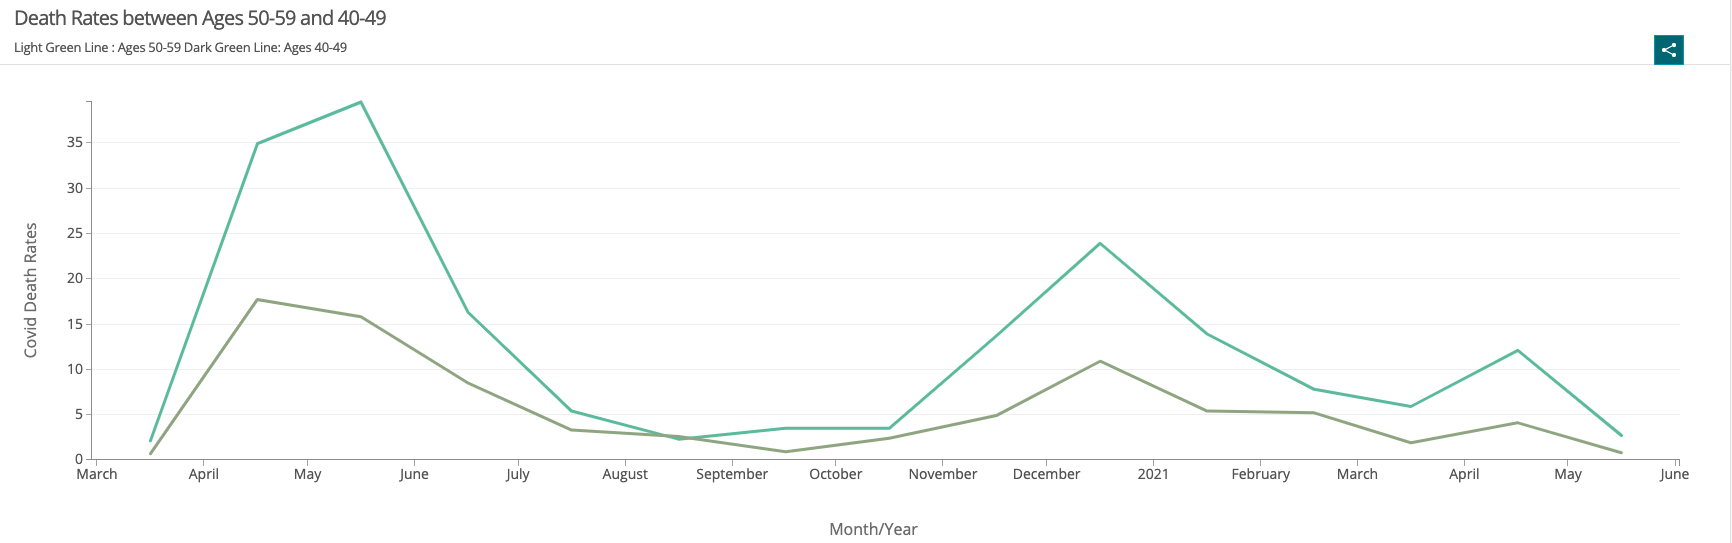

In [106]:
base64_data3 = "iVBORw0KGgoAAAANSUhEUgAABsQAAAIfCAYAAADHdbntAAABfGlDQ1BJQ0MgUHJvZmlsZQAAKJFjYGAqSSwoyGFhYGDIzSspCnJ3UoiIjFJgv8PAzcDDIMRgxSCemFxc4BgQ4MOAE3y7xsAIoi/rgsxK8/x506a1fP4WNq+ZclYlOrj1gQF3SmpxMgMDIweQnZxSnJwLZOcA2TrJBUUlQPYMIFu3vKQAxD4BZIsUAR0IZN8BsdMh7A8gdhKYzcQCVhMS5AxkSwDZAkkQtgaInQ5hW4DYyRmJKUC2B8guiBvAgNPDRcHcwFLXkYC7SQa5OaUwO0ChxZOaFxoMcgcQyzB4MLgwKDCYMxgwWDLoMjiWpFaUgBQ65xdUFmWmZ5QoOAJDNlXBOT+3oLQktUhHwTMvWU9HwcjA0ACkDhRnEKM/B4FNZxQ7jxDLX8jAYKnMwMDcgxBLmsbAsH0PA4PEKYSYyjwGBn5rBoZt5woSixLhDmf8xkKIX5xmbARh8zgxMLDe+///sxoDA/skBoa/E////73o//+/i4H2A+PsQA4AJHdp4IxrEg8AAABiZVhJZk1NACoAAAAIAAIBEgADAAAAAQABAACHaQAEAAAAAQAAACYAAAAAAAOShgAHAAAAEgAAAFCgAgAEAAAAAQAABsSgAwAEAAAAAQAAAh8AAAAAQVNDSUkAAABTY3JlZW5zaG90FvjXrwAAAj5pVFh0WE1MOmNvbS5hZG9iZS54bXAAAAAAADx4OnhtcG1ldGEgeG1sbnM6eD0iYWRvYmU6bnM6bWV0YS8iIHg6eG1wdGs9IlhNUCBDb3JlIDUuNC4wIj4KICAgPHJkZjpSREYgeG1sbnM6cmRmPSJodHRwOi8vd3d3LnczLm9yZy8xOTk5LzAyLzIyLXJkZi1zeW50YXgtbnMjIj4KICAgICAgPHJkZjpEZXNjcmlwdGlvbiByZGY6YWJvdXQ9IiIKICAgICAgICAgICAgeG1sbnM6ZXhpZj0iaHR0cDovL25zLmFkb2JlLmNvbS9leGlmLzEuMC8iCiAgICAgICAgICAgIHhtbG5zOnRpZmY9Imh0dHA6Ly9ucy5hZG9iZS5jb20vdGlmZi8xLjAvIj4KICAgICAgICAgPGV4aWY6VXNlckNvbW1lbnQ+U2NyZWVuc2hvdDwvZXhpZjpVc2VyQ29tbWVudD4KICAgICAgICAgPGV4aWY6UGl4ZWxYRGltZW5zaW9uPjE3MzI8L2V4aWY6UGl4ZWxYRGltZW5zaW9uPgogICAgICAgICA8ZXhpZjpQaXhlbFlEaW1lbnNpb24+NTQzPC9leGlmOlBpeGVsWURpbWVuc2lvbj4KICAgICAgICAgPHRpZmY6T3JpZW50YXRpb24+MTwvdGlmZjpPcmllbnRhdGlvbj4KICAgICAgPC9yZGY6RGVzY3JpcHRpb24+CiAgIDwvcmRmOlJERj4KPC94OnhtcG1ldGE+Cu/7cUcAAEAASURBVHgB7N0HmJTV2cbxh16WtnR26UgvIlIFFFCDaGz5NGrUxBY1iTUmmlhiokajCUaNvRt7gsYYbIACoqB0FVhApe0uZellkc537gPvODPMzM7CDtv+Jxc7by+/993Ndc3tc06Fva4ZDQEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAIEyJrB06VJr0qSJVSxj98XtIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIBAhQCAWwcEMAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIBAWRMgECtrT5T7QQABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQiBAgEIvgYAYBBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQKCsCRCIlbUnyv0ggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAghECBCIRXAwgwACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAgggUNYECMTK2hPlfhBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBCIECMQiOJhBAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBAoawJlPhCbPn26vfnmm7Zx48ay9uwKfT9b87d6iylTphR6X3ZAoDwL6O+H/o7o7wkNAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAoPQJVD6US960aZONGjUq4hCVK1e2zMxMa9mypf9XrVq1iPWHe+b999+3L2bPtq5du1rdunULffqFCxfaJ598ErFfjeo17IgjjrCjex9tFSuWnkxx7bq19uorr9gR7dvbgAEDIu6JmcILTBg/wb786ks744wz/Lte+CMcnj3mfDXHpk6bGvNktWrVsh//+McR61atWmUff/yxZWVlWZUqVfzvztChQ6127doR28WaKey5pn4+1WbMnGErVqywTh07Wf8B/a1t27axDl2sy1auXOl/d7r36GG9e/dO+lrmzZtnH3zwgWVkZNg555wTsd+2bdvsww8/NG2zefNm69ypsw0aPMhatGgRsV2yM4nOtXjxYhs/frwtW7bMmjZtav3797fu3bpbpcqVkj082yGAAAIIIIAAAggggAACCCCAAAIIIIAAAqVa4JACsQ0bNth7774bF6Cy+zL9oosusuHDh8fdpqhW6Atlfbl8yimn+C/xi+q48+fPj3uPur+TTz7ZLrzwwkKfLlXXW+gLKaIdlixZYksWL7EhQ4cU0RFL9mH27t1rzzz7jG377jvT9LXXXltiL/izzz+zD1wwHKtVq149IhBbtGiR3XLLLbZr587Q5jNnzLDRo0fbvffea+np6aHlsSaSPZfM7r77bps9a1boMFkuGPrPf950odDgEu0ZuuACJlSRec899/h3pIkLocIDMf3+33zzzbbSBYFB0/2/9d+37LZbb7Nu3bsFi5P6THSu//znP/bKyy+HjjN3zhz7cNw4a9ykiT3wwANF+vcydBImEEAAAQQQQAABBBBAAAEEEEAAAQQQQACBEiZwSIFYcC/6YvXGG2/0swrJcnJy7MsvvzR9kf70U0/Z5MmT7U9/+lOweUo+dY6XX3rJhg0blpIveI8ZONBOP/1027Vrl21Yv8Fmzprpv1R++7//tSbu/n/wgx8U6r5Sfb2Fupgi2Pj111+3b7/9ttwEYp9//rkPOkSnZ/mLX/zCqlatWgSSRX+IoLvQX/3qKheCNI44QbWq31dwKqS64447fBg2wgW95/z4HNu1e5c999xz9qmrklSA9de//jVi/+iZZM/1v//9z4dh9Rs0sN///vfWqlUrXyn18MMP2yeTJlm3bt3s+OOPjz58qZp/8KEHQ+9I9IU/+uijPgxTteb111/vq1c/+ugje/aZZ+zOu+60F154waq7sDLZFu9cqgxTGFaxUiW77rrrrF+/fpabm2svub+V+vv80EMP2Q033JDsadgOAQQQQAABBBBAAAEEEEAAAQQQQAABBBAotQJF0t+fvrjVF9r6d+SRR/oqLX3J/UcXgqmKat7cuTZ27NiYSPoSft3adbZnz56Y68MX5m/JjzsWWHS3huH7RU8rtEvmfOH71a9f33fl1qFDB+vbr69deeWVdv4FF/hNJk6cGL5paPpQrzdZm927dtv69etD5y1oIrybx+9chZO6biuoJbqWna6aaLbrljKVTdepLjoLaomuM9a+ehdUXVPY9u7+ysj+ruvJPbt3W7x3IDiugqIgLAqWxfvUdtu3b4+3OrRcvze634JacN5eR/eyLl26RPxrd0S70O5ffPGF5W/ZYu1cd6CXXHKJpdVK80GNqt8Uei9x4Yq6NkzUkj3X22+/7Q/z05/+1Fq3bm0VKlTwXTMqkFN48+STTyY6TcQ6PUO9H8k0/a6sXr26QLfgPUrGN9Z51Z2mAie9H7qf8KZrnT5tmv/bePvtt1vjxo1NXcuOGDHChrkQUO/ThAkTwndJOJ3oXP91gb3acccd57tJ1e++umS88bc3Wobr2vYzN56gqgJpCCCAAAIIIIAAAggggAACCCCAAAIIIIBAWRcokgqxeEgat+viiy+2p9yX288++6wNGzosNGaNvjj/+9//7scp0hfAaq3btLFf//rX1qxZs9AhFbS8+eabtmDBAv9FsVao+zFVj2jspqVLl/puydatXev3+fnPfx7a97777gtN5+fn++oXjYsUdAfXwo1zpmBLIdfBtD69+/iqtPCQ4FCvV6FisjZvvfWWTXNfrH/zzTfeRuFju3btbKCrZtOX6/GaxoV677337I033rCNLkxQq1uvnimcOPbYYyN2K+haFAQ9/vjj3nT9unWhbuF0DgVlvXr1sptuuinimL/61a9szZo1dt555/lnGKzUuS6//HKr567liSee8IvHua7dXnHjnm3eH4apiz899//7v//zIUr4vgW9TxrLSe+huqRT1366dnV5qFa9Rg1//yeeeGJwyLifCqLUvV26C0nPPedcHyrIM3pf3f+LL77ox5AK3nEdNDwgueqqq2yw6yJQQc0zrgtGjd21fX9AqePr/ZRh0KZNnWZjxo7xvzfaTsdq3ry5dezY0dsF24V/BkFiQWOA6dxqCk/Cm8KqgccM9N0Z6nkk6iI0mXMpjA7eu+jxuBo1amTdu3f34/7l5eX5sCj8WoJpBZJ6nstdtVPQOnbq5MP48PHxLrvsMj9mlgI+VUPluurVoHVz57n6qqutfoP6wSIXCObb/X+/3+a4bgX1zOSrMc1+dOaPQtsUNKHA7bHHH/Pv1JVXXOnfj/B99Dur1sONRxZdBSb7j1zXr+r+9aSTTgrfLeZ0QefKzs72+x1zzDER+2vssBNPONFVoj1vX3/9dYkcty3igplBAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQOUaBIKsQSXYO6EkyrVcsHJjm5+76MVvChUERj2aha4US3jboOUwWKuvVS4BC0Tz/51IcPqiI5wYUVql5ZtXKl7wYsqH7o0b2Hr7bQPn379rVjBx/r/9WpUyc4jB//aK6rVNOX0KraUHiUvWyZqULjYCqEdOANG/eFSbq2oB3q9SZrM/p/o30Yp0BQgclgF2Spim2BG/NMx0jU5K6u2eQz1HUx2d2ZKKD4hwsM3nnnndCuyVxL5cqVfeWJdlJ4ENgr5FGgEF05pi/o81at8usmua7xwpu21T5tXDCq9uorr9oTLmxTmDlw0CAX1Ayx3W7966+9Zk+5rjiDlsx1atudO3b64//l3r/4MbV0Hh1TYaCCsSddCDfnqznBYeN+KohRUyib2TzTmroAV+9SED4EOz722GN+/Lm0tDQ79bTTTN0Q6ndB91i3bl0fHgZh7C233mJjx4zxAcnxJ5xgvfv0MQWM97huCj/77DN/SFXy3Hffvb470iPc74G20++PuihNVOWjkErvu4KtRE0hpVrnzp0P2KxL1y5+2Sr37BK1ZM6lbkfVdE2qjIpuCvjUEt2TfvdXur8Denf1d0EVbHr37x85MmI/VT9quSpWVUmmrk+7uu4Y1eZ89ZXd85d7/LR+KMC89rpr7UtXKafwUL8bCuw0Pp7ck2mqKNNYa3rG6opQVXbRTUGfWiznYJmCroJaMucKKg31tyG6tWjZwi/S/dEQQAABBBBAAAEEEEAAAQQQQAABBBBAAIGyLpDSCrEAL9N1zbXQVXgtc6GBKqBeevElXwWjkEMBWNBU4TP500/t2eeetd/85jd+8fkXnO8ricKrOBRIaGwydZOoaqFfXfUry5qf5YMyVYiFB2HBsdVVmCpEVIGipioVjfukyrLJUybbCS5cKExTiKZqI7Xw6otDvd5HHn4kKZv33n/Pn/vPf/6zN/Uz7oe+AA/vEjFYHv15yg9/aBdddFFosbrLu+vOO+3VV1/1lU4aDyvZ56QQcpKrLlLIo2cRNI0jp/BLX7gHoeGkj/eFYArPlrkwTwFK8Lxmzpzpd1UIoVD0zTff8PMaVyp4buedd66vmlJ4dJoLmZq6asFkrzO4LlVW/f7mmyMqr/Ru6B7e/+B969Z9X2ASbB/+qRDigzH7ArFg3DhVhr34z3/6qjtVuKmp4kvHU1NAEly/xrj7rXu3t27daj/60b6qI73H37oqv4bu3dR1qLpOTV3hPfLIw777QI39FHQ7Gl1Zp3c5CD78jlE/1EWfqiJ1bZs3b7ZKzl7d9KmSSr8/wfmCbjfr1P4+SA4OFTyjYJtgefRnMufSu6UwTNekyk9VtwVNvrNmzfKz+nvRv3//YFXE5x9u+4M1aNggosJKFaHTpk61T93fEFV1hbeWrhpUvyvBOG+6j8vd3wqF8GtdENigYUP//BQMK+DUWGlB9ZbCqWuuucZfb/gxY02PGjXKlrr3XSFdz549Y23igzmtiFWxp9BSvxvJdAGZzLk0vqH+A4IprmtEGYQ3jYOnJmcaAggggAACCCCAAAIIIIAAAggggAACCCBQ1gVSXiEmQH0pq7Z8+XI/ds+ECeP9vLq9C29Dhgzxs+quLGjqPi88DNPy4EvyoKIl2DbR58muOicIJbSdQqOgazVdV0FNVTojXfWJvihXtcnFl1zsA51BrhIqvJvBQ7lehQHJ2qSnp/tLnuoCgPCmipsg4AhfHj6tL9zPOeec8EV+7Le2rrtFhUUKsgpzLREHCps56qij/FwQcGjm08mf+mU/dIGcmr6oD9pXrmJHrY+rjgqqsI50oUL4c1Nwkbm/gkgh3sFcp7rmDO+GUOcMnqGqjhI1VbFpnK0OLsQJnsHxw473u4wfP94HYZrJW72vCkjVZ+HXr2BQYZCcg9Bj9OjRfv9TTj4l4tn1H7AvDFJ3kQplgiofPZ8dO3b4ffRD73IN1+VjvKZuNNUlpAIYTSu4VEXbv15/3Qc9wbGC66lVu9YBh6rlKtvUVGWVqCV7ruB3T5V+qjrTc1S14x/+8IdQN4hBIBXrfKrMi14fHDNWFdvPfvqzUBim4+nZqctUtdz9v//BuF0XXnBhxLH1/ILw0+8Q58diF67JtH6DBn4Mtjib+VBS62rWrBlzEz1LVZglCjmTPVfQ/aXesXmum08561167rnnfEWiLiDaMeZFsRABBBBAAAEEEEAAAQQQQAABBBBAAAEEECjlAoelQiz4El1f6AdjfcntNdf1XXgLulJT4KAKG41zo6au6NTdobqGU/d4wRf46j4v2RZdMaL9gmXqVq2gtsZ9iax/4e0iNz7aKaecEr7ITx/s9RbG5sc//rHdeccd/gt4VQ4p8Bs+fHjCYCS4UIV2sQIUdd+36NtvbeWKlYV6TsFxoz99sPX++77i58wzzzR1FaeKMQVvGufsbdftnap5dN36kl7Bj7q+U2CTu3zf2FAan00hZHgLxqnKdeNHFcYsOEbQJWMwr89k34WgS8mMZhk2Y8aM0CFU3aX3Q9WG6i5SlWsKHlVxpPdf5moK3FQZpXVBEBGEcDNmzvCVjqGDugltp3BE96oqRp3/KxeI/exnP/OVfAoWVe2VqN11110HrJbrH//4R3/NGufs0ksv9ZVj2lBBTFBJFewYhDO6ZnVluGxpZFVR23ZtfQVSsue67NLLbOHChb6a6irXfWrQNEacukVVxVx4kBisD//U3wSNf6V72eL+ZqxzXUyqxfq70O6IduG7+mmFkwoGt2/b7uf1Dqp179Hdf4b/UBeViZq6W7znnnv8JgrME4XSVatU9dsFf++ijxss13hmUyZ/HxhrO/3HAepWMdlzKejVe6rK29td2Bjeeh19tM106wp6f8L3YRoBBBBAAAEEEEAAAQQQQAABBBBAAAEEECitAoclENMX1mrqsmv1/nGKND99+nR9RDQFAGq7du+ynbt2+m7O5mdl+WVap7AkVpjjN0jwI6jmSbBJwlUa50xd1am97qpAPnBBj7q6Cw/EFKypW7aDvd7C2GgstPtcUPTCCy/4sdhefukl392hApLzzz8/YbeJ8fyCbvHWrltbqOcUr4vGbl27+UBH3eKpMkVeaqrkUQClqqUsV7WigDPoLjGoKguq/xSgBdN+5/0/9C6oe7nCmAX7p9fbV10XzCf7qSDuC1chpqZKvqCaL3x/BVYKxHRtCgQ/d5WFt9xyix9vTEHNuHHj/OYafywY00sBsJoqeGI1H4q5bhH1Dj/44IO+i8iPJ33sxyd77913TcGGxuQLnl+sY0Qva+a6BVQ3gH90Y+ip4kxNx1fAqHApujs/dbWopt+/Ma67yg/334df6H6cdvrpduGFFwazEZ+xzlUzrab94x//sIkTJtrCrxfaju07rGOnjt5MXaeqBZWlEQdzM+riT8GbxlhTU8Wd7j1WEOY3cD/ivfPBen1qHDm1WNsG1Xl+gxg/nnFj8ul6zjn3XFPQlqgFx5JzrKbqQd3TgoULfJeZ4du0csdWOJfsubTv9ddf798/VTeudc9XgbAqJPX3V4FYA1fRRkMAAQQQQAABBBBAAAEEEEAAAQQQQAABBMq6QMoDMVWTBJVVCsRU4aWmSqBHHnkkoe/f/vY3Hy7pS+Crr746NFaWqsfOPTeyy7+EB3IrNW7SoTR1RRiEBBdccIELQybYN646RRVOqnZS01hXCsMO9nqDKqJkbHQ+fbGtKh+NgfSWq7ZSUKGqKwUtusZ4LegaL3p98GwUjBTmWlQdE6upwk9f3mv8uG9cxY+s1I4dfKz/7Ne3n02cOMGHYUG3igqR1BS8qP36hhtCXVv6BVE/guqqZM20e8VKB9dTqHzV1F1i9+4HVhH919mrskmVRqpuuv666+2m393kq6BefeUVv6/CrdPduF0/+clP/Lx+KBhUGPP888/HDGNCG7oJuWictksvu9Q/73//+98+1LjTjf8WXUkXvl+s6datWvvFCknUgtBYpgqxwpvGoVKrn17fhg4dGvpdDLYJHwcsWBb+GX0urdN7OmToEP8v2Fa/2/qboRZ9DcE26lZRIeKQIUPtJ+f/JHTdClXvufvuYLNCf6o6TWGU3ufoCi+NGZioqbtMtddd1av+RTf5nX3WWaZzBMFh8B8KhG8bjNGmgE+/O5e4yr3wpvcqeM7JnOslF5SrKUDXv/D2TzfunVpBAV74PkwjgAACCCCAAAIIIIAAAggggAACCCCAAAKlVSClgdgeV9USVHsc40IjVV4E3cSp8kcBTBB8xAIMxhK76aabIrpPy8nNibW5X7Zr566464pqhe7hYtdd4uOPPWaPP/649e7d2xSYHer1BhUxydiE34vG1VKXd+oe7WbXXZuqkBIFYurCT13g6ZrDm7qfU2vWtFmoOqcw1xJ09RZ+zKNd9ZICMY3BtsyNEZWRmRkaE27Q4EGhQEzd3yksUlWZWnM3TpiqV1S9FIwNFX7cYPpgzYL9C/MZBGJXXHGFr3aM3ldhxkcffmjvuqotdWmY5cLRpUuW2NHu/dD7ovcm1vuu7hWXuPGnNCZaMD5e9LGj53Ws0047zY9tddlll/n9gyAuett488HvUWCowGT6tGmmcemCSr1g388+/9xPdurcyRR+FRSABfsFn9HnCpZHf44ZO8aHg/1dFWGsSi11u6kwTCGigsHwpsqxQ2mqlFruuqbU70GXLl0iDpWdkx0xHz3TqVMni9f1qroh1but4Emhevdu+8JUdWV4ySWXRBxKvydq6r5U4deIESMi1mumMOc6YOf9C3Jzcn21Y20XvOl3lIYAAggggAACCCCAAAIIIIAAAggggAACCJR1gYMrlUlCRRU/V155pRuPaoWvirji8iv8Xr4rub59/bS6TFNFSHhTdUZQqRR0gabxk4Kmrveee+65YDb0GQQNs2bPCi1L5YS6vMt0oY0qezQGk9qhXm9hbNat3dddXPg9Bl3mxasAC7bVmFT/+c9/gln/qe769MW9umrTGEqFuRZV0+gLf40BFn1dCgvVRo8e7T8HDRrkP/VDAYz2mzRpknds3759aNy4YUOH+e3GufHR1OVidFP4pHehMNcZfYzCzMtH3dQp0FOlY6ymcdzUFEjq2j77fF+4oe7pNE5T8I5G76uxwdSeffZZCyqEgm10nMBU6xQyhzeN9RWM9xUrkFH14PLc5eG7+Gm9I0888YSfDqryhgwZ4p+Hqh/D99FYXwon9awUusZrhTlXrGOowiuoWtIYebGaPNTUzWb4e64uHd96661YuyS9LAheX3755QhnnSd4f+Md7E9/+pPde++9Mf9pH4VbWn/rrbe6dyjDWrZq5cfTC7oR1Ta6hzfeeEOTMYMwv8L9KMy5gn3CP1WZdvc9+yrpznJVa/odoiGAAAIIIIAAAggggAACCCCAAAIIIIAAAmVdoEgqxJYvX+677tOX9apSWeeCA4UuagqNrrvuOtOYQUG7/PLLTYGZxmO64sorfDCiMOlbF8ioazFVk2ncmyOPPNKPwTRy5Eg/LpOqYqZMmeKPry/nw1vnzp19JdLTTz9tS10lUvVq1W3osKHhmxT59C9/+Uu75eab/Xhiw4cPL5LrTdbmlltv8QGcwpaGrkJMz0BjBKmdcfoZCe9Vdm+MGuXHrPLjEbmg5RMXSqmdffbZoSq+ZK9F+ykkUpXT72/+vQ0bNsyHFRdddJFfHnQJqO3CAxWNPdazZ08ftmhdEJ5pOrN5pp3ixkN7xwVpt7oxuLq78EyVTApH1aWeurZ7yj1rde1YmOvUsQ+mBYFIrIqd4HitXMihwExVRtOnTfeVNxpr7qknn/T/gndW1W+qBDvxxBP99f/AjU831gV/qibTO6VnmpaW5u8zOzvbVxXpvX711Vdt8uTJvnpLx1CAoqpEBZHp9ev7qrrgWoLPea5K7SE37lgL93xUoaRuETUmm6rAdrnwWV1Nnn3W2X5zVWT96Ec/slGuG8YbfnOD9XXBtX4vp7mqMTWtC8I3vyDqR2HOpSD8kUcfMVXHaSwt/e6rklDtUlfx1qJFi6ij75tVsKiqJt3zb37zG++owEpdFh5qt6inu3HQ9Jx1Hddee61/fgreZB4evsW8sEIuVAXhnXfcYQ8+8IDvflXjimlML92XuuSMrlAr5OEjNn/NdeGo/9CgcqXKtmjxIl91qb/Pg124OfwHwyO2ZQYBBBBAAAEEEEAAAQQQQAABBBBAAAEEECirAocUiAWVBfpifa77Yl5NX/qrGkLj//Tr18+C6pdwQIUYj7nuBlUh9qXrJm7Sxx+HVqfVqhUan0ld06laTONyjd0/flNdt+8999zjK0mWuAAhaKp0UBd1+jL7PddlnVrXbl0TVj8E1x8cI9ZnxQr7iugU3kQ3dWumrt0+cyGduk783e9+d8jXqxAwGRtV9Xz00Uf2oatGCprsh7nKtXPijK8W3Iu671O3iaoSy3KVT2qqDNPYRkGVk5Yl+5y07VVXXWUax2qdG49KgYqavvSXsSrBprou9xq69yLons9v4H6oYkzVR2p9++yrHPQz7ocCNY099fwLz9tXruvEr4IV7rOj66Iu6PKxMNcZdoiIyeBdCD7DVypMmOYCJPked9xx4asOmFZg9owLr0a/M9p3S6kNtJ+CHx1bXVXm5OTYv15/3QchGkdPy+/9y7324ksv2gcffOCtggNrXwVTal27dvWhp9638Na1WzcfpMW69rZt2lpn1/2fquyyw7oU1PP+4amn2jnnnBOqytMxNa+KvzfffNMm7x/zTeNenXXeeXaGG/ssUSvMuXbt3hXxe6/rae3GxFO4qUrBeE33eMvNt9i9993rK6w0Zp5aOzfe1s0unNbfjGgHGSbTFAgqoPqLq+RSuKswVq2p+1umvznXuHEMY/0dSObY0dek34nb3FhoDz30kP8PA3QMXaf+nlx37XXJHDLuNtHnUgWmuj4NWhP3Lp555pmmKlcaAggggAACCCCAAAIIIIAAAggggAACCCBQXgQquC7I9vVBVkx3rNOvdFVhqsRQ9UrQ7V/45eRvybfVa1b7MCXWuELh225yFRaqgKlXt15orKrw9YdjuqiuNxkb2el8derWMY2BVNgv7LW/KmsUYiZqyVyLtpG9Kn4UABX0rBKdL3qdKnTU1Zsqp1RNo9AmVkvmOmPtV9TLNHaeAqVzzj3XzjzjzIjQSV0bKpRUkPyPhx/2VuHnV9eICizr1qnrKr/SDwh4tF7/VAXZqHGjuBbhx1Sop2etTz1rjWVVUNN4Xaoqqt+gfkGbRqxP9lzqCnLDRt2ne3ddlWNhm/bfvGWzZWRkJGVQmOPr75GqLhXsB8FrYfYvzLaq9Nu0cZPvSjE6zCrMceJtG/w9qlK5SsrOEe/cLEcAAQQQQAABBBBAAAEEEEAAAQQQQAABBIpbQL0Kqlin2AOx4obg/AikQuA8V1GlwOsV181hrPDupptu8mO2jbz//rhjkqXiujgmAggggAACCCCAAAIIIIAAAggggAACCCCAAALlSSAIxA7sB7A8KXCvCKRIQJVsahMmTPCfwQ+NnfX222/7MEzjfmVmZAar+EQAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAIEUCVAhliJYDlu+BSZOnGgPuzHy1DQ+VvPmzX13havcWE6qHNN4UfePvN8ymxOIle83hbtHAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQSKVAUCFGIJZKZY5drgU05tmnbhyxadOm+XHVatWq5cfJ69Gjhw0bNsyqV69ern24eQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEUi1AIJZqYY6PAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCBQrAJBIMYYYsX6GDg5AggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIBAqgUIxFItzPERQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQSKVYBArFj5OTkCCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggECqBQjEUi3M8RFAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBIpVoHKxnp2TI4AAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIJC3Q9sW3bHH+d0lvXxQbtkmrYYsuPKMoDlVsxyAQKzZ6TowAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIFE7Ah2GzphVup0PcevFRfQ7xCMW/O10mFv8z4AoQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQRSKEAglkJcDo0AAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIFD8AgRixf8MuAIEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAIEUChCIpRCXQyOAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCBS/QLEGYrt37bY9e/YUvwJXgEAhBXbu3Gl79+4t5F5sjgACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAsUhUOmPrh3sicd/9JEPBdLT0yMOMWPGDJs4YaJ17949Ynn0zM0332y5ubnWs2fP6FVJz+dvybcvZn9hY8eOtQULFpiCijq161jVqlWTPkZRb/jll1/aokWLrEWLFhGHzsvLs0cffdQGDBhgFSpUiFiXyplx48bZ1vyt1rhJ41SeJnTsb7/51j5y78a8efNC/2rXrm1169b126xevdreffddmzJlilWsWNGaNm0a2jd8YuPGjTZ69OjQMXS8bdu2WbNmzfxmmzdvtnfeeccfR55NmjQ5wFWh65tvvhk6xooVK2zvnr1Wv3798FMVevrcc86xLl26JmWqd1Lv5vjx423atGmWn59vNWrUsLS0tEKft6h2WLlypX9GHTt2jDikQr7777/fWrdqbbXr1I5YV9Qzh/u9DL/+7du322uvvWa1atWy4O+Xlo0ZM8a76N1r06bNAe9T+DGC6dH/G21r160N/b4n814G+/KJAAIIIIAAAggggAACCCCAAAIIIIAAAggUVuBP0+eYrVxe2N1ibl+9cmXblUzhUrNM+2PvxJlPzBOUgIX6vlffBVc+lGv517//bccff7y1bds24jDr16+37JzsiGUHM6PQpGWLltate7eYuyvoePWVV6xuvXrWrl07W7NmjY1y13TCiSfaFVdcEXOfw7Hw008/NQUvCr7Cm8KcpUuX2q5duw5bYLdp0yZ74vHHrYkLnR5++OHwy0nZ9OQpk+2DDz6w1q1bh87Rvn17HxgoDLv++uutYcOG1rx5c/vzXXfZxZdcYieffHJo22Aie1m2ve5Ci46dOgWLrLL75ezVq5cP+H75y1/6QPbII4+0e++91050z/0Sd6zwtmPnDn+Mtu79UAi1atUqW+OuoZW7thtvvNEaN05tSKhw9J577rFKlSqZDHbv3u1tFMg98sgj4Zd6WKcV2L788st22mmnHXDe7Oxs27xl8wHLi3JBcbyX4df/uPud+GTSJP8e6u+XgsDf//73tm7dOh/QP/fcczZ16lS/LHy/6OmJEyfaCy88b0f37u1/3xU8J/NeRh+HeQQQQAABBBBAAAEEEEAAAQQQQAABBBBA4HALPHj+WXbNscf409741nv21/fGHu5LOKznO6RALN6VnnDCCaZ/h9pUrfGjH/0o5mHmzp3rw7DhJ51kl156aaiSQxVBu3bvOmAffeEdXZUVa1mw48GuC/aP9dmyZcu4oVSi88U6VvgyVSBVqVIlfFFoWobpLnxZ5SqCFi9e7KteQiuTmIh3XfGW65CbNm6yPn362LXXXnvAGd577z2rWbOmjfzbSKtUuZKv3nr11VdtxIgRBzyfDRs3+Gu/y4Vm0e2dd9/xweJLL77kj6MKrFtvucWHYtGVedpXAWkQ3CoMuv32223kyJE+SIs+dqL5RPcdvZ+qFxWG6bnf/ofbrWZazdAmCk5itejjR8+H75NonbYraH34sYJp/Y488MADwWzEZ6LjxVp3qO9lrGMGFxRvXbzlwX76nDZ1mg/DFKQH7auvvrLsZcvsYRdSqtJQ78hNLjBVsB1UJAbbBp/r1q7zFZ+N3fZBK+x7GezHJwIIIIAAAggggAACCCCAAAIIIIAAAgggcDgFmtSuFQrDdN77zhhBIHYwD+Dtt9+2L774wm677TZTJchTTz1ls2bN8t0ZBl0ZBhVc+sL517/+tf8yuqnrCu9HZ55pQ4cNsz/84Q+Wm5Njjz32mN9fVRfhFVfvv/++ZWRm2mWXXRZxiQpZ9E9N16Gu4fQlubrwU9eMqgIZNWqU/fe//7Vt331nLVxYccOvb7DM5pl+n3jrdKyvv/7aduzYYbNnz/bVRoMGDTrg/P4gcX4EQcyLL77ov3D/+9//bv369TPdi8IDVT7JpZ77ol7VZKogUpWKmq79uuuu8+cNP/zzzz9vCpleefmV0H2Hr1cgNnDgQP883hn9jl119VV+daLnovuK56BuC//5z3/6cE3PUl3u3eKCqPCwUUFWpns2sdrMmTPtmGOOCV2rKgxV5bdkyZIDwrqgjDHWcVRpp3MHz1rTCibmz58f6rou1n5apmDshhtu8NVpCtK0ryra3njjDVvvKoTSXOnkme49PP300/0h9I5dcfkV9vwLz1ueqzB78MGHIg6t9+Ghhx7yz6dHjx6hdVM+m+LHyFPXoOFhmDYI5vVOqHJPFXIvvPCC31fvh35f9O7remrXqWNXXnGl9e3X16+Pt07HSvRO+Z2T+KH7lU/nzp39+33qqafa//73P9u4YYMd4arcfvazn1mn/VV78d6Tg30vdXlyUJWlnn/w9+K4447z1xLvfMm8lzq2ujN88KEH7ceuy0tVdwVt+vTp1rJVKx+GaZneEQXJ6tYzXih/31/v81V/CjxVWaZ2KO+lPwA/EEAAAQQQQAABBBBAAAEEEEAAAQQQQACBwyBwbOcOB5xF3Sducz3cldVWMRU3tnXrVlO3iWoKYZa5ygt9uf+Pf/zDB0rn/PgcU+iiNtONNzZkyBBfmdG3b1970oVne1x/lQquqlWvbhdddJHr8u8J69tnXxjgd3I/srKybOjQocFszE9dx1gXCKkyShVBCtU+/vhj34WevvS/3wVSqlZ6+pmn/f6J1ulYn7kvxzU+2d/+9jf75S9+aR+4IEvjZSXbFKYphFPT9EoXBqoyRYHJnXfe6ceZ0rhKak8++aSfv+3W2/y1K4xTaBPdOnToYEcddVQoGApfr5BAgYqqr4YPH26TPpnkgzdtk+i5JHJQ9ZDGVnr66ad9aDn8B8MjwjAdW2GbQqL77rvP/u26sMzNydVi3za4UCU8LNO4YhVdd4JrVq8JNgl9qtJMXSyqkkvn0/0o3FRTd4xaFzS9M985WwUSyTQFjDrvN9984zdXFdCFF15oTzzxpA9AXnEhncaUUlMQdP/f7/fdgz7k3uFmGfvGMNO6oEvE8847z8LDMK3Ts1WoFIydpmXRTe+BKpP+9a9/2eWXX+7H79J93f3nP/sg8x8uLNPvyt8f+Lu/90TrCnqnos8db173G37v//nPf/zvoe69WrVqvqtF7ZvoPTnY91KBqbpK/dOf/mTPPfucD6gUWOr3NdH5knkvdc0KDNVV51lnnRVRQadAK3osO3WnqW5YYzUF6jkusFe3m+FVaYf6XsY6F8sQQAABBBBAAAEEEEAAAQQQQAABBBBAAIGiEji7by9beNetNvL/TrUHJ04OHfbhSVPKdBimG01JIBYSdBOzv5jtq0lq167tx2vSl855q/NCm2S6L6c1jpG6KTvHVW3scpVSqvLReE+qOtKnqmmCSiDtqC+g9aW9xqEKmiq4LnLhmf7ddNNNwWL/+bvf/c66dOnigwmFShpPSlUdGsurf7/+NscFFwpTEq0LDnjZzy/zFUiq1tG1qwroUJqCFF2bAgQFH59//rk/nCpkFBCm1UrzBtpm/PjxB5xK1Va6v1ht9OjR1u6II7y7Qke1oCom0XNJ5JCenu6DKYWcGhOrT98+/rjhP0455RTr17efHeHOreDyuuuuNVUMqSloqe6CzvCm7h63xBizSvevCjKdR9VCd999t/32t7/1z1/LVa2lSsLXX3/dVxludkFcUFEUfvx403ong+BWYdbgwYP9pqp+2uPG+lL1WNAGHjPQB2UKzoJquIVfL7Q/u+BK45Zp/LLopsCkUcNGocUKT4N3VJ8KDoOmME7nb9SokX/OCus0r/dSFX76vVBlmN6BeOuCY8V7p4L1hf1UdZbeTd27flfnu2eq38FE78nBvpfqClXjq+lc+r1XoBiEUonOl8x7qbBZ76N+X4JnGFgo8FbYF970nqqiLLop4FVgqnexjqveC29F8V6GH49pBBBAAAEEEEAAAQQQQAABBBBAAAEEEEDgYAXS3HfvQQuCsJd+dp797cMJ1vKmP9l1r4yyWlfdZBk3/tGufunfwaZl9rNyqu9MX+ZrjKh6devZZhd6LM/N9RVRwXkV9ARNYYa+7A+qU4Ll0Z/6Mru6C8ry8r4P1gYNHORDpU8++cQ+++yz0C7qhlFdEAZNX64riFCVV9DU1Z6WJ1qnbXWs8C/N09LSfKVXcJyD+ezatWtot1quqz51nagv4RXI6F4UggQtOkgKlsf6VJAybX93i2e7apigqXtFje+W6LkkclD3iAq37rjjDu962aWXHRCKHXvsscHpfIikajeFGQqBZJafnx9arwndcx1XKfarX/3Kh1xadvoZZ9gFF1zgAr12mvVt6udT7a+umzpVgbV2FWLPPvecD4jULebFF1/sKxAVrCbTglC1eWZzv7kq0CZP3peGK4xRU9VZ0PoP6B9Mhj7V1aNaMDZZaMX+CQW2q/JWhRZnZGb4MGaVC/IedtVWu90zDtoxA/YNXKj5vFV5/vmrMi5oekcV3iVap2pHtVjvVHCcg/ns1rVbaDe9o0FL9J7EGsdN+xX0XsrhbVd99fjjj5tCLoVYl//85/6Uic5X0Hu51v1+q+tWhe4KV/VP750q7vQ8FGwpFAtvulYF+OHv5WmuG02F1t27d/fvv95FHWvLli3+vWzlul08lPcy/PxMI4AAAggggAACCCCAAAIIIIAAAggggAACByPw2xEn+jHBtK+qwE7u0snaN6pvt4z+wO7+3wcRh8x335Pmb9wZsayszqQ8EFOViwKx5SuW+y/qn37mmYgu5Aqq6FFwEaupokohyxkuOKlYsaLVb1Df//vm631d4AX7qPoovCkcUxXOXXfdFb7YTydapw2ij3XAAQ5iQaxjBqGDKq3OPvvsgziq2dixY32Xk+GhisaYut+FLMtzl/vqo3jPpSCHa665xhSEvfjSi/a3kX/zAZkq+eK18JBKYVN4N5O6FoV/GRkZPqRU1Z5arPCvabOmEadQhZcqltQ0BpmqBqO7LYzYIWxG44Wpde3W1Xd7qO4v1YWmghyFJL/8xS/Ctjar7PpOjW6Xu/He5syZ46vE1B2orie8KZh60Y23psBFBjJS9VntWpHbaZ/wCsgGDRr4YPihBx+KWK7tFIgpNI61TpWVarHeKb/iIH9UqRr5OxQcpqD3JNgu/LOg91IBqMby0vOUg7rdDMK1gs6X6L1c7I6nvxPqwlP/1FR1p7HR1B2pAi5dW3hT2KXg+Pzzz/fVpME6dem4du3aUGWmjqOmyjP9Th3Kexmcg08EEEAAAQQQQAABBBBAAAEEEEAAAQQQQOBgBe47Y0Ro12uPO8aHYne//Z7lbYksVgltVE4mDrnLRFVbqUIn+BfdxdgMN0aYmrpQU7VFfiHAFSKoQipWKKbxlta5L6U11pi6ttP4STr2uvXrEj46jTu2wAUHqpTamr/VsrOzQ5VBidYlPGiMlaouCUz0uW5t4usKP4Qq4I7u3dveeecdX+2mijnd45yv5oRv5qflo2qa6KawUPcjw+DfgAEDLN11R/fue+9aoueSyGHa1Gm2bds2352dwieFWaqOCW/vu3BJVTO7d+32Y4lpvKWTTz7Zb6KxzD6e9LEPIWSk8dtUeaegTIGRwgT9U6gzadIkW+HGWdPzV5inKq7WbvwyVYep6fhqCtjuuece63X00f44fmHUD72nqijUmF8PPvigH0fuvJ/8xIejula1tJpp/jk95yrPkmnNmjazq666yle9qTvH6Pf0lJNPcSFtA/+OTnHjz+l3Q+9peNVYrPMMGjzIuz719FM+nNO7oy405ZVoXaxjFbQs/B3VdGFaovfkYN9L3esyF0Spm0Z1lal7DlwTna+g97K3+31SWBX+T1V36u5S45Wpq0P9PVEopsqxUaNG2Xb3nivQD38v9W6GH0PTJ7juMnv36eOXy68w72VhvNkWAQQQQAABBBBAAAEEEEAAAQQQQAABBBBA4OAFDix7KeSx3nPVEvoXtOEnneQDjWCMHnVDpgqKJ554wm+S78ITVYCocinYJtg3+lPVXwp7zj33XN/d3ogR36eaCnlU0fPQQw/Zra4bv6CpeqZnz55+VsePPocCGVXsPO+6/XvWVauptXIBiwK7ROtiHSv62P5g+38sWbzYrnZhSdAU+ig8CVqsfcOXqZu2Bx54wEaGde14sqsY69b9++7rdKxp06bZh65buUsvvTRUGaTwSONr/fCHPwxOF/pUMKUxtzTOVLznkshh1BujXNXOvf54tV03c0GoFDqBm1Ag9owLr4J2pHseZ+3vtlFjUSncu9kFmWoK6BRIxGrz5s1zlVAPhlZlZGb6scKCBeeee46frOzCMwUoP79sX9d6wfrwzz/vrwhUV5uqRrv1ttvsyCOP9Juomz6Fj1dccbmf79uvnw+ywvcPfzbhyxXcaRwzVSe9/PLLvpvHYL2qvu4feb899vhj/lkqPAyawpiqVaoe8H5qvSqirrv+envsscf8s9UyXfeDDzyYcF2sa4y1TMdT0/WEv6Na9tprr+sj4rriHSPRe3Kw76VCW/0O/9NV1imI0rhwer6PPvpowt/PZN5Lf2Nxfqh7Rpk//PDD9qT7W6Vz3vCb3/i/ZXF2ibu4MO9l3IOwAgEEEEAAAQQQQAABBBBAAAEEEEAAAQQQOEiBG99674AuE1UpFqvLxIM8RancrYKrvojdJ2ER3I6qe665+mr7qwt1gqoeVeNc5sKbO+680zp37lzgWXR569etd8FJesSX9OE7ahuNL6Ru9tTdYLwv8KP30XFr1Kzhv3hPdl34dodjWtUmqnpTd3GxusJTNYsqtPSFfrIt2ecS2EcbqRJv566dEWOzRZ9b1Xf5W/N9t3fqqi666b60XmM3JWqqqNI7o+3Cx2/TPqr60jhchbn3ROfSNat7wFjOifZLdp3GAJNFrbRaB3SFGO8Yune9z7GcEq2Ld7xULI/1nhzMe6nj/PSnP/Xh6elurC41LbvyyittyHFDXPh6XmhZrN/dZN5Lf4ACfug5Hco7VdTvZQGXy2oEEEAAAQQQQAABBBBAAAEEEEAAAQQQKGcCFR5/1WzWtALvOs39h/8aI0zt7L697M+nnWyt0uva1aP+a0+O/8Qv1zZ1XE6yYuMmPx/3x1F9bO+V+76jjbtNCV2h4XFUZHXIFWKJ7k9hRnhT92cfffSRX6SAJ5mmMEDjgyVq2kbjghWmJTpuonWFOUdRbKsqo0T3pvCmsF/eJ/tc4jmk1Uor8NZqptX03SrG21D3FSvkid5eY8zFu/9k9o8+XqJ5XXMqW2Gfk66lbt26cS8p0bq4O6VgRaz35GDeS4Vf+qfjqSk0zcrK8l0ZNmr8/e93rPNp+2TeS21XUDuY5xR+zKJ+L8OPzTQCCCCAAAIIIIAAAggggAACCCCAAAIIIJCsQBCGaft/T53p/wXB2K0nHW9vfjHXVDmm9vCkKXb1S//202X1R0orxIT2jOuWcMyYMb4yRl30pbkKrosvvth3cVdWUUvDffFcSsNTKn/X+PHHH9tTTz3lx1pTl47qPvEk1w2r/mbQEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBNyQN0lWiCWyUjD2r0sviNikxq9utG27dkUsC82UgQqxlAdiwgq6/atdu7bv1jAEyESxCvBcipWfkycQWOu6QK1ardpBjeGV4LCsQgABBBBAAAEEEEAAAQQQQAABBBBAAAEESr1AUQRiTWrXspV/uyPCosIVv46Yj5gpA4HYgYM7Rdxh0cwE3f5pjC9ayRHguZScZ8GVRAo0aNiQMCyShDkEEEAAAQQQQAABBBBAAAEEEEAAAQQQQKDIBFZt3mIPfTw5dLzfvvVuaLqsTqR0DLGyisZ9IYAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAKlWeDal0fZTa+/Fb+bxNJ8czGu/bBUiMU4L4sQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQSKUSDumGHFeE2pOjWBWKpkOS4CCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggECJECAQKxGPgYtAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBIlQCBWKpkOS4CCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggECJECAQKxGPgYtAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBIlQCBWKpkOS4CCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggECJEKi8dOnSEnEhXAQCCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggEBigZbVqtiyo/ok3qiI1+qcpT1PqrDXtSJ24XAIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIFLuAgrwmTZoYXSYW+6PgAhBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBFIpQCCWSl2OjQACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAgggUOwCBGLF/gi4AAQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAgVQKEIilUpdjI4AAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIFLsAgVixPwIuAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAIJUCBGKp1OXYCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACxS5AIFbsj4ALQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQSKUAgVgqdTk2AggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIBAsQsQiBX7I+ACEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEUilAIJZKXY6NAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCBQ7AIEYsX+CLgABBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQACBVAoQiKVSl2MjgAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggUuwCBWLE/Ai4AAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAglQIEYqnU5dgIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAALFLkAgVuyPgAtAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBIpQCBWCp1OTYCCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggECxCxCIFfsj4AIQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQRSKUAglkpdjo0AAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIFDsAgRixf4IuAAEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAIFUChCIpVKXYyOAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCBS7AIFYsT8CLgABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQCCVAgRiqdTl2AgggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAsUuQCBW7I+AC0AAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEilAIFYKnU5NgIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAQLELEIgV+yPgAhBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBFIpQCCWSl2OjQACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAgggUOwCBGLF/gi4AAQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAgVQKEIilUpdjI4AAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIFLsAgVixPwIuAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAIJUCBGKp1OXYCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACxS5AIFbsj4ALQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQSKUAgVgqdTk2AggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIBAsQsQiBX7I+ACEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBCabkUCAABAAElEQVRAAAEEUilAIJZKXY6NAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCBQ7AKVi/0KuAAEEEAAgQME1m/fauOys/zys484+oD1LEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBIXoBALHmrQm05cuTImNvfcMMNMZezEAEEEJDAjNVL7cOc+fblmuwQSN1qNe0HLTqH5plAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQKJwAgVjhvJLeOlbwFS8kS/qgbIgAAmVSYMP272xcbpZNyFlgG7bnH3CP4926E5p3sooVKhywjgUIIIAAAggggAACCCCAAAIIIIAAAggggAACBQsQiBVsxBYIIIBASgRmrl5mH+bOty/cZ6KWvXmdjcnJspNadEm0GesQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEE4ggQiMWBYTECCCCQCoGNO1w1mAu3JuQusPXbDqwG0zlb1K5vgzM62JrvNtuYZXP9ZYx3+xyf2cmqVKyYisvimAgggAACCCCAAAIIIIAAAggggAACCCCAQJkWIBAr04+Xm0MAgZIiMMuNCfaRGxtslhsjLF4bmNHejnNBWJf0Zn6Tddu32ofZWbZ77x7L3bLexubMs5Nbdou3O8sRQAABBBBAAAEEEEAAAQQQQAABBBBAAAEE4ggQiMWBYTECCCBwqAKbdmzzY4NNdGODrd22Jebhmteqb8dmdrChLgirUblqxDb1q9W0E10A9v7SL/3y8S5QO755R6tWsUrEdswggAACCCCAAAIIIIAAAggggAACCCCAAAIIJBYgEEvsw1oEEECg0AKzVQ3mxgabmRe/GuyY/dVgXfdXg8U7yamtu7sqsbm2c89uW5G/wca6irEftuoRb3OWI4AAAggggAACCCCAAAIIIIAAAggggAACCMQQIBCLgcIiBBBAoLACm3du92ODfezGBlvtxv6K1TJrpduxGR1tqKsIqxlVDRZrey2rW7WGDW/V3UYvnu038VVibiyx6GqyePuzHAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQMCMQIy3AAEEEDgEgS/W5rqxwbJsRt6SuEcZ0PQIG9K8g3VNz4i7TaIVp7pAbNyyubZt905btXWTjXHnO731kYl2YR0CCCCAAAIIIIAAAggggAACCCCAAAIIIIBAmACBWBgGkwgggEAyAvmuGmxsbpZNyv3aBVQbY+6iarDBrlvEYa4irGaVajG3SXZhmtt/eOtu9t9vZ/ldJrixxE5wVWJaTkMAAQQQQAABBBBAAAEEEEAAAQQQQAABBBAoWIBArGAjtkAAAQS8wJdrl7uxwbJs+qrFcUVUDXZcRgfr1uDgqsHiHfiHLXvYuKVzLX/XDt8l45iceXZmm6Pibc5yBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAgTABArEwDCYRQACBaIHvXAClLgo/Wf61rcjfEL3az2ek1bPBblwwVYOlqmqrRuUqrkqsu735zQx/zgk5C2xYZmc3xlj1mNfEQgQQQAABBBBAAAEEEEAAAQQQQAABBBBAAIHvBQjEvrdgCgEEEAgJzFm/3D7M3lcNtje0NHKif9O2dmxGJ+tRxNVgkWf5fu6HrVyVmBtLbNOObbZ22xYb66rEzmrb6/sNmEIAAQQQQAABBBBAAAEEEEAAAQQQQAABBBCIKUAgFpOFhQggUB4Ftu3a6ccGUzVY7pb1MQmauWqwY93YYEPcGF61D/MYXlUrVrIftOpmo76e7q9tQu4CO95dR3q1mjGvlYUIIIAAAggggAACCCCAAAIIIIAAAggggAAC+wQIxHgTEECg3AvMXb/CPnLdIk5ftcR2790T06OfqwY7znWJ2KNBZsz1h2vhqaoSc5VrG7bl+39j3fSPjzj6cJ2e8yCAAAIIIIAAAggggAACCCCAAAIIIIAAAqVSgECsVD42LhoBBA5VYPseVw3mwqTJK76xZZvXxTxcs7S6Niijgw11QVidEjJWV6UKFe2kll3ttYVT/TVPWJ5lxzfvZA2qp8W8BxYigAACCCCAAAIIIIAAAggggAACCCCAAAIImBGI8RYggEC5Eshav9JVg8236XmLbeee3THvvU+TNr5LxCOLuRos5sW5hRpLbGz2PFv73RbbtH2bG0ssy849one8zVmOAAIIIIAAAggggAACCCCAAAIIIIAAAgiUewECsXL/CgCAQNkX2OGCL1WDTVn5jS3ZtCbmDTf11WDtbVhGpxJTDRbzQvcvPKlld3t5wRQ/NyE3y4ZldrTGNWon2oV1CCCAAAIIIIAAAggggAACCCCAAAIIIIBAuRUgECu3j54bR6DsC8zfsNLG5y5wY4Mttu27d8W8YVWDHee6RezZsEXM9SV14QjXbeLY7LmWt3WTbdmx3ca5KrGftO9bUi+X60IAAQQQQAABBBBAAAEEEEAAAQQQQAABBIpVgECsWPk5OQIIFLXAzj17XDg0z6as+NYWbVod8/BNata1wZnt/dhgdavWiLlNaVg4vGU3e3H+ZH+pE1w3kMPcWGJNa9QpDZfONSKAAAIIIIAAAggggAACCCCAAAIIIIAAAodVgEDssHJzMgQQSJXAgg2rbOLyhTZt1SL7btfOmKfpvb8a7KhSVg0W82bcwuEtutg4VyW2In+jbd21w48rdmGH/vE2ZzkCCCCAAAIIIIAAAggggAACCCCAAAIIIFBuBQjEyu2j58YRKP0Cu/fu8WODfbbqW/tmQ17MG2pcs44Ndl0iDnVjbNUrxdVgMW/OLRzuxhJ7PusTv3qiqxI7PrOTZaTVi7c5yxFAAAEEEEAAAQQQQAABBBBAAAEEEEAAgXIpQCBWLh87N41A6RZYuDHPPlY1WN5iy3fjZ8VqRzdubUNcCFZWqsFi3aOWneC6SdRYYrlb1ts2N07aWDeW2M86Doi3OcsRQAABBBBAAAEEEEAAAQQQQAABBBBAAIFyKUAgVi4fOzeNQOkT2LN3rw97PnddIi5cvzLmDagabFBGexuW0cnqVSu9Y4PFvLkEC0e4scSenjfJb6GxxIa6KrGWtdIT7MEqBBBAAAEEEEAAAQQQQAABBBBAAAEEEECgfAkQiJWv583dIlDqBL521WCTVnxt01cttk07tsW8flWDHee6RezVqGXM9WV9oSrhxmTPs2Wb19rOPbttXM48u6TTwLJ+29wfAggggAACCCCAAAIIIIAAAggggAACCCCQtACBWNJUbIgAAodLYK870TjX9d/nLgSbv255zNM2qlHbBmV2cNVgHS29Ws2Y25SnhSNadbMn5kz0tzwxZ4ENy+xsrWvXL08E3CsCCCCAAAIIIIAAAggggAACCCCAAAIIIBBXgEAsLg0rEEDgcAt8u2n1/mqwJbZh+9aYp+/VuJWrButoR5fTarCYKG7h4GbtbcyyubZ40xrbvXePrxK7rPOgeJuzHAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQKFcCBGLl6nFzswiUTIEP3bhXn+cttnlrc2NeYENXDTbYjQ2msbHqUw0W00gLT2rVwx776iO/fl+VWEdrW6dR3O1ZgQACCCCAAAIIIIAAAggggAACCCCAAAIIlBcBArHy8qS5TwRKmMAiVw32ycpv/dhg67blx7y6o1w12BA3NtjRjVrFXM/CSIGBTdva2Ow59s2GPNvr/jfOBY2XdyEQi1RiDgEEEEAAAQQQQAABBBBAAAEEEEAAAQTKowCBWHl86twzAsUoMCF3ga8G+2pNTsyrUDXYIFWDuW4RG1RPi7kNC+MLnNSquz284UO/wcfOemhmR2tft3H8HViDAAIIIIAAAggggAACCCCAAAIIIIAAAgiUAwECsXLwkLlFBIpbYPHmNfbpikU23XWLuOa7zTEvp6cbE2yIC296Uw0W0yfZhf0bt7Ex6U1t4fqVfhd1R0kglqwe2yGAAAIIIIAAAggggAACCCCAAAIIIIBAWRUgECurT5b7QqAECHy84mv7fNUi+2J1dsyraVCjlq8GG5bRiWqwmEIHt/BkVyUWBGKfLF/oq8Q61mtycAdjLwQQQAABBBBAAAEEEEAAAQQQQAABBBBAoAwIEIiVgYfILSBQkgSWbF5nU9zYYNNcNVje1k0xL03VYMe5scH6NG4dcz0LD01AVXad62dY1rrl/kAf5mYZgdihmbI3AggggAACCCCAAAIIIIAAAggggAACCJRuAQKx0v38uHoESozAJy4E+3zlIpu1emnMa6pfvZYNzmxvQ1wQ1qh67ZjbsLDoBE5u1S0UiE1e/o0bk62TdXZdKdIQQAABBBBAAAEEEEAAAQQQQAABBBBAAIHyKEAgVh6fOveMQBEJLNuy3j5zIdjUvEW2Mn9jzKMeub8arC/VYDF9UrXwqIYtrVuD5jZnbY4/xbiceQRiqcLmuAgggAACCCCAAAIIIIAAAggggAACCCBQ4gUIxGI8onVr19nSZUstIyPDmjSJHHdn/fr1tmlTZDdwderUsfT09BhHYhECZVNgshsXTNVgM/KWxLzB9OppNrhZBxvSvIM1phosptHhWDjCjSUWBGJ6XkObd7Ju6RmH49ScAwEEEEAAAQQQQAABBBBAAAEEEEAAAQQQKFECBGJhj2PFihU2cuRIW7pkiVWuUsV27dxp6fXr25VXXmm9evXyWz711FM2berUsL3MBg0ebNdee23EMmYQKGsCuVs22BRXCTZ11WJb7irDYrUeDVvYkMyORjVYLJ3Dv+zIBpnWo1EL+3J1tj/5uOwsArHD/xg4IwIIIIAAAggggAACCCCAAAIIIIAAAgiUAAECsbCHUK9ePevZs6fddNNN1qhRI9u4caPdfvvt9uijj9rTTz/tt1R12JAhQ+2SSy8J7Vm5MowhDCbKnMBUVwU2xY0PpmqwPXv3HnB/qgYb1Ky9DXVBWOMajA12AFAxLzilVY9QIDbdhZlfrM01BWU0BBBAAAEEEEAAAQQQQAABBBBAAAEEEECgPAmQ5IQ97Ro1atgFF1wQWlK3bl3LzMy0BQsWhJYpJOvRo4dpWxoCZVVghRsPTNVg01Yutuwt62LepqrBjs3oYP2btIm5noUlQ6BrejM7qnErm5W31F/Qh24sMQKxkvFsuAoEEEAAAQQQQAABBBBAAAEEEEAAAQQQOHwCBGJxrDVW2Oeff25T3b9TTzsttNXmzZstOzvb3n77batdq5Z16dr1gHHGQhszgUApE5i+eql95kKw6S4M27VnzwFXX69aTRvkQrChmR2sSY06B6xnQckUOMWNJRYEYjNdMDZrTbYd5QJNGgIIIIAAAggggAACCCCAAAIIIIAAAgggUF4ECMRiPOkLL7zQtn33nV/Tu08f03zQ6rsxxbKysuybb76xNatX+8UXuPWnn356sAmfCJQqgVXfbbYpq7711WBLN6+Nee3dGzZ31WAdbQDVYDF9SvrCTvWaWm/37NRlotqHOVkEYiX9oXF9CCCAAAIIIIAAAggggAACCCCAAAIIIFCkAhX2ulakRywDB1u4cKGtdmHX3Llzbfz48da+fXu74447Driz/C35NvL+kfbVl1/a0888Y+piMWgvvfRSMBn6XLVqlV166aWheSYQKG6BD1bMtw+WZ9mOPbsPuJQ6Vatb34at7ZiGbaxxtbQD1rOgdAkscl1f3p/1UeiiL28/0HrUaxaaZwIBBBBAAAEEEEAAAQQQQAABBBBAAAEEEAgXqFevXvhsqZ1eunSp7+mPCrEYj7BDhw6mfwMHDrSWLVvaM08/bXl5eda4ceOIrdNqpdlZZ53lA7HFixdbz549Q+vDxyILFo4cOdLKygsU3BOfpVdgef4G+1/OnANuoJurBjvOdYs4oEnbA9axoPQK9HL/59V//RLXJeYifxOfrV9mx7buXHpviCtHAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQKIUAgVgBWWtq+ypg1a9YcEIhp1+XLl/sjtGjevIAjsRqBkiUwzY0XFrS6GhusWXsb4oKwZmnfVzoG6/ksGwInu7HEgkDsSzeO2LS8JdanceuycXPcBQIIIIAAAggggAACCCCAAAIIIIAAAgggkECgYoJ15W7VjBkz7P333/fdJW7evNk+/fRTe+WVV6xps2bWuXNnv/y1116z3Jxc27hxo00YP8E03+voo61Bw4blzosbLt0Cs9Z8H4id3uYoO699H8Kw0v1IC7z6tnUa2TEZ7UPbfZgzPzTNBAIIIIAAAggggAACCCCAAAIIIIAAAgggUJYFqBALe7o7duwwjf2lLhKD1rJVK7vmmmusQoUKVtH9mzhxor0xalSw2jp07GiXXXZZaJ4JBEqDwIKNq+yb9XmhSz222RGhaSbKtsApLbvb5OVf+5ucszbHPlu12Po3aVO2b5q7QwABBBBAAAEEEEAAAQQQQAABBBBAAIFyL0AgFvYKDBgwwPr372+bNm0yhWP10+tbpcqVQluoCuyxxx4zVY9t27btgPWhDZlAoIQLzMxbFrrCXo1bWfXKVULzTJRtgVa169vgzA42KXehv9EPc7MIxMr2I+fuEEAAAQQQQAABBBBAAAEEEEAAAQQQQMAJ0GVi1GugSrC6detao0aNIsKw8M1q166dcH34tkwjUBIFZoWNH3ZMU6rDSuIzSuU1neyqxIKWtXa5fbpyUTDLJwIIIIAAAggggAACCCCAAAIIIIAAAgggUCYFCMTK5GPlphCILzBzzTJbnr/Bb1C9UmWqg+JTldk1LWql25DmnUL395GrEqMhgAACCCCAAAIIIIAAAggggAACCCCAAAJlWYBArCw/Xe4NgRgCM1d/311iv2btYmzBovIgEF4ltmDdCpu0ct+4YuXh3rlHBBBAAAEEEEAAAQQQQAABBBBAAAEEECh/AgRi5e+Zc8flWGDbrp02OywQG0h3ieX2bchIq2vHt+gSuv+PchaEpplAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQTKmgCBWFl7otwPAgkEpq1eYhu2b/VbNKxRy7qkN0uwNavKusDJrbqFbvHr9Stt4oqFoXkmEEAAAQQQQAABBBBAAAEEEEAAAQQQQACBsiRAIFaWnib3gkABAjPCqsP6N6G7xAK4yvzqJjXq2Iktu4bu86Oc+aFpJhBAAAEEEEAAAQQQQAABBBBAAAEEEEAAgbIkQCBWlp4m94JAAoHV2/Lty7BAbGCzIxJszaryIqAqsYoVKvjb/XZDno3PpevE8vLsuU8EEEAAAQQQQAABBBBAAAEEEEAAAQTKkwCBWHl62txruRaYkbfEduzZ7Q1a12loLWqll2sPbn6fQKPqte0HLbuHOD7KyQpNM4EAAggggAACCCCAAAIIIIAAAggggAACCJQVAQKxsvIkuQ8EChCYuWZZaIsBTduGpplAQFViVSpW8hCLN62xcYRivBQIIIAAAggggAACCCCAAAIIIIAAAgggUMYECMTK2APldhCIJbBk8zqbtzY3tGpQs/ahaSYQqF+tpg1v2S0EMZ6xxEIWTCCAAAIIIIAAAggggAACCCCAAAIIIIBA2RAgECsbz5G7QCChwPTVS0LruzVobnWr1gjNM4GABEa4KrHqlap4jKWb19oH2fOAQQABBBBAAAEEEEAAAQQQQAABBBBAAAEEyowAgViZeZTcCALxBWavXhZaeUyztqFpJhAIBBSS/iCqSmz33j3Baj4RQAABBBBAAAEEEEAAAQQQQAABBBBAAIFSLUAgVqofHxePQMECc9evsCVuXCi1ihUq2OCmdJdYsFr53EJVYmmVq/qbz9myzsZkZ5VPCO4aAQQQQAABBBBAAAEEEEAAAQQQQAABBMqcAIFYmXuk3BACkQLT85aEFvRr0s4quFCMhkAsgdpVqtkPWncPrRqfk2U79uwOzTOBAAIIIIAAAggggAACCCCAAAIIIIAAAgiUVgECsdL65LhuBJIQ2LN3r32xJju0Jd0lhiiYiCMwokVXq121ul+7PH+DjaVKLI4UixFAAAEEEEAAAQQQQAABBBBAAAEEEECgNAkQiJWmp8W1IlBIgemrl1re1k1+rzou5DiqYctCHoHNy5tATddl4nDXdWLQxudm2bZdO4NZPhFAAAEEEEAAAQQQQAABBBBAAAEEEEAAgVIpQCBWKh8bF41AcgIzXCAWtH5N2wWTfCKQUGBE865Wr1pNv83K/I02Nmdewu1ZiQACCCCAAAIIIIAAAggggAACCCCAAAIIlHQBArGS/oS4PgQOUmDTjm02e82y0N6Dmh4RmmYCgUQC1SpXsZMiqsQW2NadOxLtwjoEEEAAAQQQQAABBBBAAAEEEEAAAQQQQKBECxCIlejHw8UhcPAC01x1WP6O7f4AGWn1rF3dRgd/MPYsdwLDW3SzBtVr+ftWt5tjcqkSK3cvATeMAAIIIIAAAggggAACCCCAAAIIIIBAGRIgECtDD5NbQSBcYFZYd4n9m9FdYrgN0wULVKlYMWIssQk5C2yzqzqkIYAAAggggAACCCCAAAIIIIAAAggggAACpVGAQKw0PjWuGYECBFa4cZ9mr6a7xAKYWF2AwEktulrjmnX8Vmu+22xjc7MK2IPVCCCAAAIIIIAAAggggAACCCCAAAIIIIBAyRQgECuZz4WrQuCQBKavWRLav0N6U2tco3ZongkEkhWoWKGCDW/ZLbT5hJz5tmHHd6F5JhBAAAEEEEAAAQQQQAABBBBAAAEEEEAAgdIiQCBWWp4U14lAIQRmrs4ObT2gKd0lhjCYKLTA8BZdrGlaXb/fum35NjaHKrFCI7IDAggggAACCCCAAAIIIIAAAggggAACCBS7AIFYsT8CLgCBohX4emOefb1+Zeigg5seEZpmAoGDETipZffQbqoSW7d9a2ieCQQQQAABBBBAAAEEEEAAAQQQQAABBBBAoDQIEIiVhqfENSJQCIEZeUtDW/dq3MqqV64SmmcCgYMROKF5J8usle533ejCsLHZ8w7mMOyDAAIIIIAAAggggAACCCCAAAIIIIAAAggUmwCBWLHRc2IEUiMwa82y0IGPoTosZMHEoQmMCB9LLHe+rd62+dAOyN4IIIAAAggggAACCCCAAAIIIIAAAggggMBhFCAQO4zYnAqBVAvMWpNtuVvW+9PUqFTF+jdpk+pTcvxyIjAks6O1rF3f3+3mHdtsXPb8cnLn3CYCCCCAAAIIIIAAAggggAACCCCAAAIIlAUBArGy8BS5BwT2C8xc/X13iX2btcUFgSIVOKlV+FhiWbbqu01FenwOhgACCCCAAAIIIIAAAggggAACCCCAAAIIpEqAQCxVshwXgcMssH3XTpvtKsSCNpDuEgMKPotI4Nhm7a11nYb+aPm7drixxKgSKyJaDoMAAggggAACCCCAAAIIIIAAAggggAACKRYgEEsxMIdH4HAJTHNjh63flu9P17BGbeuS3uxwnZrzlCOBEWFVYhNzs2xF/sZydPfcKgIIIIAAAggggAACCCCAAAIIIIAAAgiUVgECsdL65LhuBKIEZuQtCS3p34TuEkMYTBSpwMCm7axdvcb+mN+5qsSxOfOK9PgcDAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQSIUAgVgqVDkmAodZYK2rDJu9elnorAObHRGaZgKBohY4qeX3Y4lNzF1guVs2FPUpOB4CCCCAAAIIIIAAAggggAACCCCAAAIIIFCkAgRiRcrJwRAoHoHpq5fazj27/ck1xlOLWunFcyGctVwIDGjSxjqkN/X3un33LhubS5VYuXjw3CQCCCCAAAIIIIAAAggggAACCCCAAAKlWIBArBQ/PC4dgUBgpgvEgjagadtgkk8EUiYwomW30LEn5CywpZvXheaZQAABBBBAAAEEEEAAAQQQQAABBBBAAAEESpoAgViMJ7Ju7TqbNWuWrVq1KsZas507d9rcuXNt3rx5tnvXvqqcmBuyEIHDIKAgYu7a3NCZBjVrH5pmAoFUCfRp3No618/wh9/lqhPH5Wal6lQcFwEEEEAAAQQQQAABBBBAAAEEEEAAAQQQOGSByod8hDJ0gBUrVtjIkSNt6ZIlVrlKFdvlgq/0+vXtyiuvtF69evk7XbRokd1yyy1+nRZUr1HD7v3LvZaRue+L4TLEwa2UEoEZa76vDuvWoLnVrVqjlFw5l1naBU5q2dWy1i33tzExZ74Ny+xobWo3LO23xfUjgAACCCCAAAIIIIAAAggggAACCCCAQBkUoEIs7KHWq1fPevbsaY8+9pi9+uqr9vQzz1jNmjXt0UcfDW3117/+1Tp06GCvvfa6veK2adOmjd331/tC65lA4HALzMr7PhA7phndJR5u//J8vqMbtbKuLoRV27N3r41zoRgNAQQQQAABBBBAAAEEEEAAAQQQQAABBBAoiQIEYmFPpYar9rrgggusUaNGfmndunUtMzMztMXSpUttzerVdv7551ulypWsiqsi03RuTo4tz91XJRHamAkEDoPAvPUrbPGmNf5MlStWssFN6S7xMLBzijABVYkFTVVi325aHczyiQACCCCAAAIIIIAAAggggAACCCCAAAIIlBgBArE4j2L9+vX2/vvv29TPP7djjz3Wb5W3Ks9/tmvbLrRX27b7KnJyc78fwym0kgkEUiwwffX31WF9GrexChUqpPiMHB6BSIGjGrawHu5f0MblMJZYYMEnAggggAACCCCAAAIIIIAAAggggAACCJQcAcYQi/EsLrzwQtv23Xd+Te8+fUzzahs3bfSfqg4LmqrE1NatXxcs4hOBwyKw153li9XLQuc6ptn3QW1oIRMIHAaBk1p2sy/XZPszTcpdaEMzO1mHuo0Pw5k5BQIIIIAAAggggAACCCCAAAIIIIAAAgggkJwAgVgMp9tuu81Wu64R586da+PHj7fbb7/d7rjjDt9FYozN/aJqVatFrHrppZci5oOZDRs2BJN8InBIArPXL7dVWzf5Y9Rx71+byrWN9+uQSNn5IAVaVkqzbukZNse9k2rvLfrCGrfpc5BHYzcEEEAAAQQQQAABBBBAAAEEEEAAAQQQKAkC9erVKwmXUWTXQCAWg7JDhw6mfwMHDrSWLVvaM08/bXl5eZaenu63zt+Sb2m10vz05s2b/We99MgXQ2ORRbeRI0daWXuBou+R+cMnMH/5l6GT9Wt6BO9WSIOJ4hA4td1RNmf6vkBs2pqlNrxNd+tUr2lxXArnRAABBBBAAAEEEEAAAQQQQAABBBBAAAEEDhBgDLEDSCIXpKXtC77WrFljbdq08StnfzE7tNHs2fumW7duHVrGBAKpFti8c7vNXLUkdJpBzY4ITTOBQHEIdE1vZr2btA6d+sPs+aFpJhBAAAEEEEAAAQQQQAABBBBAAAEEEEAAgeIWoEIs7AnMmDHDd5V49NFHW/Xq1e3LL7+0V155xZo2a2adO3e2ChUqWPcePey5556z5s2b+z1feOEF69CxI9U5YY5Mpl5get4S27prhz9RRlo9a1enUepPyhkQKEBguBtLbPr+oHbKym9saPOO1sUFZTQEEEAAAQQQQAABBBBAAAEEEEAAAQQQQKC4BQjEwp7Ajh07TGN/qYvEoP0/e/cBH9dVJfD/WFa1umQ1q9qyZUnuNW5y3ENCQlgSIARCelhCAoRA/ktZlrL582dDElggbHpIB8KmsCRx7yUusuxYzU1Wtazeu+T/vU+eK8mxHcmWRjOj3+WjzH1v3rx37nfk3dGcd8+Ni4+Xb3/721YyTO97+HsPy89+/jP5/sMPW4fEqpKKjzzyiO1wHhGwi0B6eYG5zoKoRNOng8BwCqSoEolXRU6Qj0pPWmGsL8wiITacbwjXRgABBBBAAAEEEEAAAQQQQAABBBBAAAEjQELMUIgsXLhQFixYIHV1daKTYyHBITLafXSvI8RaO+yxxx6T5uZma7+Pj0+f59lAYKgFSpvr5GB5vrnMErV+GA0BRxG4Jm6KSYjtO5MnhytLZHroOEcJjzgQQAABBBBAAAEEEEAAAQQQQAABBBBAYIQKsIbYeW+8LosYGBgoYWFhn0iG9T5UJ8JIhvUWoW8vAV0u0daSgiMl3MfftskjAsMukBQYIYvGTTJxbCzKMn06CCCAAAIIIIAAAggggAACCCCAAAIIIIDAcAmQEBsuea6LwGUKHCwvNK9cGEm5RINBx2EErolNNbEcUAncjIqe31nzBB0EEEAAAQQQQAABBBBAAAEEEEAAAQQQQMCOAiTE7IjNpRC4UoETteWSW33anCaNconGgo7jCCQGhEladJIJaGNxjunTQQABBBBAAAEEEEAAAQQQQAABBBBAAAEEhkOAhNhwqHNNBC5TYH+vtcNmh8eLt7vHZZ6JlyEwtAJres0SO1iWL+nlBUN7Qc6OAAIIIIAAAggggAACCCCAAAIIIIAAAghcQoCE2CVweAoBRxM42CupsIjZYY729hBPL4Hx/mNlWUyy2cMsMUNBBwEEEEAAAQQQQAABBBBAAAEEEEAAAQSGQYCE2DCgc0kELkcgo6JYihqqrJf6unvKgojxl3MaXoOA3QTWxPSsJXZIJXN7z3C0WxBcCAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQUAIkxPg1QMBJBNIrTplI50aSDDMYdBxWIM4/RFbEppj4NhZlmz4dBBBAAAEEEEAAAQQQQAABBBBAAAEEEEDAngIkxOypzbUQuEyBtq5OSVfrMNnaYsol2ih4dHCBa2KmmAg/riiSvWWnzDYdBBBAAAEEEEAAAQQQQAABBBBAAAEEEEDAXgIkxOwlzXUQuAKBfSqJUNPaZJ0hzMdfUoOjruBsvBQB+wlE+wXJ6riepBizxOxnz5UQQAABBBBAAAEEEEAAAQQQQAABBBBAoEeAhFiPBT0EHFYgvbxndthVERMcNk4CQ+BCAnotMbdRo6ynMiuLZdeZkxc6jH0IIIAAAggggAACCCCAAAIIIIAAAggggMCQCZAQGzJaTozA4AhUq5lhB86cMidbHDXR9Okg4AwCUb6BsiZumgl1U1GO6dNBAAEEEEAAAQQQQAABBBBAAAEEEEAAAQTsIUBCzB7KXAOBKxDQ5RI7znZZZ0gIGCuxfsFXcDZeisDwCKyJTREPt9HWxXOqSmRH6YnhCYSrIoAAAggggAACCCCAAAIIIIAAAggggMCIFCAhNiLfdgbtTALpFQUm3IWRE0yfDgLOJBCu1r5bEzfVhLypKNv06SCAAAIIIIAAAggggAACCCCAAAIIIIAAAkMtQEJsqIU5PwJXIFDQUC1HKorMGZZETTJ9Ogg4m8Ca2FTxHu1uhX20ulS2nT7mbEMgXgQQQAABBBBAAAEEEEAAAQQQQAABBBBwUgESYk76xhH2yBA4UH7KDHRqaIwEevqYbToIOJtAqLfveWuJMUvM2d5D4kUAAQQQQAABBBBAAAEEEEAAAQQQQMBZBUiIOes7R9wjQuBgr3KJi6ISR8SYGaRrC6xWa4mNcfe0Bnm8pky2FOe69oAZHQIIIIAAAggggAACCCCAAAIIIIAAAgg4hAAJMYd4GwgCgU8KZNeUysmacusJTzd3SYua+MmD2IOAkwkEe42Ra+J7rSVWkuNkIyBcBBBAAAEEEEAAAQQQQAABBBBAAAEEEHBGARJizviuEfOIENhfdsqMc054goxS/6Mh4AoCq2NSxd/T2xqKTvpuLCIp5grvK2NAAAEEEEAAAQQQQAABBBBAAAEEEEDAkQVIiDnyu0NsI1rgYHmBGT/lEg0FHRcQCFDJsDVxPbPENheTEHOBt5UhIIAAAggggAACCCCAAAIIIIAAAggg4NACJMQc+u0huJEqsL88X8qa6qzhB3v7yqyxsSOVgnG7qMCamBQJUuUTdTtVVyHri7JddKQMCwEEEEAAAQQQQAABBBBAAAEEEEAAAQQcQYCEmCO8C8SAwHkCB1RCzNbmqnKJNARcTcDXw0tWx00xw9qsEmJnz54123QQQAABBBBAAAEEEEAAAQQQQAABBBBAAIHBFCAhNpianAuBQRBobG+V/WfyzJmWRE00fToIuJLAGrWWWIi3nzWkgvoqWcssMVd6exkLAggggAACCCCAAAIIIIAAAggggAACDiVAQsyh3g6CQUBkf1m+NHe0WxTRfsGSGBAGCwIuKeDj7iHXxKWaselZYu1nu8w2HQQQQAABBBBAAAEEEEAAAQQQQAABBBBAYLAESIgNliTnQWCQBA5U9JRLvCpywiCdldMg4JgCq2OnSJiPvxVccUO1rC/McsxAiQoBBBBAAAEEEEAAAQQQQAABBBBAAAEEnFqAhJhTv30E72oCZ5rrJF3NELO1JZGUS7RZ8OiaAp5uo2VN3FQzuM1FOdLa1Wm26SCAAAIIIIAAAggggAACCCCAAAIIIIAAAoMhQEJsMBQ5BwKDJLC/rMCcKSk4UsLPzZwxO+kg4IICa2JTJNI30BrZ6cYaNUss0wVHyZAQQAABBBBAAAEEEEAAAQQQQAABBBBAYDgFSIgNpz7XRuA8gYO9yiUujEw871k2EXBNgdGj3ESXTrS1zUW5ah29NtsmjwgggAACCCCAAAIIIIAAAggggAACCCCAwBULkBC7YkJOgMDgCJysK5ecqtPWydxGjZI0yiUODixncQqBNbGpEu0XbMV6pqlW1hVlO0XcBIkAAggggAACCCCAAAIIIIAAAggggAACziFAQsw53ieiHAECvcslzgyLE293jxEwaoaIQLfAKPWwWiXFbG2LWkussb3VtskjAggggAACCCCAAAIIIIAAAggggAACCCBwRQJ2TYjl5eXJhg0b+gS8fv16+eUvfyn//d//LZUVFX2eYwOBkSRwoPyUGe4iZocZCzojR2BVTIrE+odYAy5vrlezxLJGzuAZKQIIIIAAAggggAACCCCAAAIIIIAAAggMqYBdE2IZGRny4YcfmgFt27ZN3n33XWlpaZGjR4/KCy++aJ6jg8BIEjhUWSzFDdXWkP08vWRBxPiRNHzGioARWNNrLbEtai2xurYW8xwdBBBAAAEEEEAAAQQQQAABBBBAAAEEEEDgcgXsmhA7efKkjE/o/qL/7Nmz8v7770t0dLQ8+uijct9990l+fr50dnRe7lh4HQJOK5Benm9inxOeYPp0EBhpAsujJ0tCwFhr2JUtDbKeWWIj7VeA8SKAAAIIIIAAAggggAACCCCAAAIIIDAkAnZNiLW1tUlwcLA1kMwjmdLQ0CA3XH+DtT1+fHeirKCwYEgGykkRcFSB9q4u2V92yoS3mHKJxoLOyBRYHddrLbHiXKlubRqZEIwaAQQQQAABBBBAAAEEEEAAAQQQQAABBAZNwK4JsZSUFMnMypTS0lJ56+9vSVBQkEydNtUaTHNzs/UYEtK9fsygjfAyTlRXVye6vGN5efknXl1dXW3NZNOz2Ww/eh8NgcsV2KfWDqs994V/xJhASQ2OutxT8ToEXELg6qgkSQwKt8ZS3dIo6wuzXWJcDAIBBBBAAAEEEEAAAQQQQAABBBBAAAEEhk/A3Z6XnjNnjmzYsEH+8z//07rsvffeay5/+PBh8fT0lMDAQLPP3p3Ghkb541N/lH1794q7h4d0tLdLRGSk/PDffijRMdFWOM8++6z1fO/YlqSlyXe+853eu+gj0G+Bg2U9syLnUS6x324c6NoCq9VaYidqyqxBbinJlpUxyRLq7evag2Z0CCCAAAIIIIAAAggggAACCCCAAAIIIDBkAnZNiMXGxsqPf/xjOX78uCQkJIjetjW9lthtt91m2xyWx9Huo8XPz0/+67HHRJdwrKqskh/+6Ify+huvyw9+8AMrJj17bNmy5XLX3XeZGN3d7cporkvH+QVqWptl75mTZiCLoyaaPh0ERrLAkshE2VSULUerS6WutUWtJZYtt0ycO5JJGDsCCCCAAAIIIIAAAggggAACCCCAAAIIXIGAXUsm6jijoqJk5syZ0tjYqGZa7ZMutX6Sbrqc4qxZs6z+cP3H29tb7r//fisZpmMICQ2RBQsWSHZ2T7mu2tpaCQsPEx8fH/PjoWaT0RC4HAFdLrHzbPe/gQkBYRLr173G3uWci9cg4GoCq2J7ryWWLWXN9a42RMaDAAIIIIAAAggggAACCCCAAAIIIIAAAnYSsPvUprfeeku2bNlihjd9xnTx8vKS11973Vpf7NFHHzXPOUInMzNTpk2bZkKpr6+XwsJCee+998RfzSZLnTJFIiIizPN0EBiIQHp5T7nEq9SMGBoCCPQILIqYIJtCciSnqkQa2lplg5olduuk+T0H0EMAAQQQQAABBBBAAAEEEEAAAQQQQAABBPopYNcZYtu2bbOSYboc4aKFi/qEGBMbI3r2VWVFRZ/9w7mxdetWyT91Sq699loTRkhIiDVj7IMPPpCnnnpKHvjWt+Tdd981z9NBoL8ChQ018nFFoTl8SRQJMYNBB4FzAqtiU4zFlqIcKW2uM9t0EEAAAQQQQAABBBBAAAEEEEAAAQQQQACB/grYdYbYnj17JDAwUB5++GE5pRJNu3bvMnHqJJluVdXVEjp2rNk/XB09M+wPv/+93HTzzZKcnGzCeOKJJ0y/saFRHn/icXn1lVfUumLLrLHZnnz11Vdt3T6PNTU1fbbZGLkCO0/nmMEnB0XK2aZWqVE/NAQQ6BFI9gyWyQHhkltXJk0dbfJ/xzLk5rjpPQfQQwABBBBAAAEEEEAAAQQQQAABBBBAAIEhEQgKChqS8w7XSe2aEGttbZW4uLgLjlWXIdRNl08c7nbs2DH5xS9+IctXrJBbbrnlouH4+vnKzSph9vHhw5KXl2etjWY7+Gtf+5qtax4ff/xxcbVfIDM4OgMWyMwtNa9ZGjOZ3w2jQQeBvgLXTpghuRnrrZ17KvLkusTpMs7Xtf6fcd8Rs4UAAggggAACCCCAAAIIIIAAAggggAACgy1g15KJsbGxomde1dX1LXnV3t4umzdvtsYWExMz2GMc0Pn0zLWf/vSnsnjxYrn//vs/9bUlJSXWMbHDHPenBsoBDiWQU1MqeXXd5UG9R3tIWtREh4qPYBBwJIG5YfEyfWysFVJLZ7usV2uJ0RBAAAEEEEAAAQQQQAABBBBAAAEEEEAAgYEI2HWG2Odu+Jykp6fLj370I4mIiLDifPrpp+X48ePS1dUl119/vbi52TVH18eqpLhEfvjDH0p4eLisWrVKsrKyzPM6mdfS0iIbN26UtCVp4ufvJwfTD8qbb74ps+fMcYgyjyZYOg4vsL+8wMQ4S33ZP0r9j4YAAhcXWBWTIofPrbm3Va0ltiI6WWL9gi/+Ap5BAAEEEEAAAQQQQAABBBBAAAEEEEAAAQR6Cdg1IRYSGmIlw97621ty9NhRK4yjR4+Kn5+f3HDDDdasrF6x2b2rk3UdarZaSXGx/IeaJda7PfDggzJ1yhTZunWr/P2tt8xTSZMnyz333GO26SDQH4EDZ/LMYYuiEk2fDgIIXFhgdlic6OTxwfJ8aevqlA1qltidyYsufDB7EUAAAQQQQAABBBBAAAEEEEAAAQQQQACB8wTsmhDT146MjJQHHnzACqOpsclaM2y0++jzwhqezetvuF70z6Xan/70J6mvr7dmi4UEh4ijxH6pmHnOsQQOqC/0y5vrraBCvf1k1rlScI4VJdEg4HgCK2OSrYSYjmyLmiW2XM0SS/APcbxAiQgBBBBAAAEEEEAAAQQQQAABBBBAAAEEHE7ArvUJP/jgA9mxY4dBGOM7xiSUdJLp0Ucf/cT6YuZgB+r4+/tLWFiYid2BQiMUJxA40Ktc4uzweCeImBARcAyBmSp5PCc8wQqm82yXmiXWU9bWMSIkCgQQQAABBBBAAAEEEEAAAQQQQAABBBBwVAG7JsROHD8hRUVFF7Q4e/asnD59Ws6cOXPB59mJgCsINHW0yd7Sk2YoS6Immj4dBBD4dIHVManmoK3FuXKyrtxs00EAAQQQQAABBBBAAAEEEEAAAQQQQAABBC4mYJeSiZUVFVKnZoA1NDaIu4e75OX1rJ+kA2tqapLNmzZbMcbFxV0sVvYj4PQC+8tPSUtnuzWOWFXqLTEgzOnHxAAQsKfA1NBxclXEBPnozEnRN1JsUKUT70vl35E93wOuhQACCCCAAAIIjASBZnUzo5uMEi93j5EwXMaIAAIIIIAAAgiMCAG7JMQ2bNwo27dvt0D1DLEjR45cEDctLc1aU+yCT7ITARcQOFBWYEYxL2K86dNBAIH+C6yMTbESYvoV29QsseXRk2VSYHj/T8CRCCCAAAIIIIAAAghcQmDr6aPyWs4eGe02Sr40cb71efMSh/MUAggggAACCCCAgJMI2CUh9uUvf1muvfZa+cMf/iC+vr6ybNmyPjzu7u4yceJEkmF9VNhwNYGy5no5UHbKDGtJJOUSDQYdBAYgkBocJQvVv5/dpcetV20sziEhNgA/DkUAAQQQQAABBBC4uMA/84/IG0f3mAOez9ouVa2NctOE2WYfHQQQQAABBBBAAAHnFLBLQkzTBAQEyK233ioN9Q0yddpU59QiagSuQGB/eb55dXJIlIT7+JttOgggMDABPUvMlhDbUXxUlo+bLJODIgZ2Eo5GAAEEEEAAAQQQQKCXwF+O75d/5GX02tPdfftEupUUuzcl7RPPsQMBBBBAAAEEEEDAeQTc7BlqQkKCSYa1tbXJhX7sGQ/XQsCeAgfKehJieg0kGgIIXL5Askp+LRk3yZxgY3G26dNBAAEEEEAAAQQQQGCgAs9n7+iTDJsQFCZfmDjHnGZrUa78+uBaqWxpNPvoIIAAAggggAACCDiXgN1miGmWlpYWeeaZZ+To0aMXVXr00UclMDDwos/zBALOKJBXVyG51aet0N1HuUka5RKd8W0kZgcTWBmTIjtKjllR7So5rtZ2SJaUoEgHi5JwEEAAAQQQQAABBBxZoLWrXf50ZJvsP5Nnwpw2NkbuUbPBQr19JcRzjLymSig2d7TLxxWF8puMtXJnyhJJYg1b40UHAQQQQAABBBBwFgG7zhA7cOCAlQxLTEyU+fPnW0bLly8Xf//u0nE333Sz6TsLIHEi0B+B/RU9s8Omh8WJt7tHf17GMQggcAmBSepLiKXRk80RGwuzTJ8OAggggAACCCCAAAKfJqBne/3m4Po+yTC9Vu13Z6y0kmH69cvU581vTVshkb7dN+4W1lfJEyoptrtXAu3TrsPzCCCAAAIIIIAAAo4hYNeE2MH0gxIfHy8PPfSQXH311eLm5iY33XST/OpXv7ISZO9/8L6MGjXKMWSIAoFBFNhX2nO34aLIxEE8M6dCYGQLrIpJNgB7Sk9KZnWJ2aaDAAIIIIAAAggggMDFBPLqK+TxjHWSXdXz+XFV3BSV/FomXm59b2CcOTZWHpy2UvRa0Lo1tLXKHw9vlPcLjlzs9OxHAAEEEEAAAQQQcEABuybEautqJTQ01GIICAiQrq4uaW1ttbaXLl0qTU1NUl5e7oBMhITA5QscqSyRksYa6wQBXt6yIGL85Z+MVyKAQB+BCQFhsqxXUmx9IWuJ9QFiAwEEEEAAAQQQQOATAofV32i/zdggBfWV5rl/SZwtd0xeaLbP78T7h8h3pq+UBZE960G/nrtHXlHlFGkIIIAAAggggAACziFg14RYRESE5OTkWDJBQUHWoy6jqNvZs2etx/a2duuR/yDgKgL7K06ZocwKizd9OgggMDgCq2JSzYn02g+HKovNNh0EEEAAAQQQQAABBHoL7DpzUn53aJ1UtjSY3bclL5KbJsw22xfr+Ht4ywOqfOI18VPNIWvzj8jvD29Sa4y1mX10EEAAAQQQQAABBBxTwN2eYel1w7KysqxZYV5eXjJt2jR5/fXXZceOHVJaWipjxoyR6Jhoe4bEtRAYUoHOs12yV/3BZWuLVT16GgIIDK5Agrpbd2VsqtjWENtYlC0zQvn/JYOrzNkQQAABBBBAAAHnF1in1px9OWeXGcgYd0+5PWWxLB5gWfvbkhZIiJefvHFudthH6m++qrYmuSt5scT6BZvz00EAAQQQQAABBBBwLAG7zhDTCbDHH39cdDJMt1tvvVViYmKkoKBAIiMj5Y477rD28x8EXEVgb1m+1LW2WMOJ8g2S1ODumvOuMj7GgYCjCKyKSRG3c2tQppedkoMVhY4SGnEggAACCCCAAAIIOIDA3/MO9kmGhfn4y7dUCcSBJsNsQ/msmiX2TTVbLNBrjLXrWHWpPKHWJKNagU2IRwQQQAABBBBAwPEE7DpDbNS5LyttDP7+/vJv//Zvtk2prq6Wzo5OGe0+2uyjg4AzCxysyDfhzwlPMH06CCAwuAL6Tlw9S2x9QaZ1Yj1LbJZa/JyGAAIIIIAAAggggMCfc3ebz4laIyFgrNylZobp9WivpC1W64mFqITYK+r8ej2y8uZ6eTJjrdyuZootj558JafmtQgggAACCCCAAAJDIGC3GWK6VOIHH3wg+/fvt0om9h5LV1eXvP/++/If//Ef0tDYU8e79zH0EXA2gdq2Ztlz+oQJ+3LvPDQnoIMAApcUWK1miXm4dd9QkVFeIAfUDw0BBBBAAAEEEEBg5Ap0qbXKn8rc2icZNjU0Rr49Y+UVJ8NsqinBkdb5pp27GatDfb/xfNZ2+fvJdNshPCKAAAIIIIAAAgg4iIBdZoi98MILkp7e82HQzc1NfvKTn0h4eLjk5OTIn//8Z6mvr5fQ0FDx9vZ2EBrCQODKBPapcon6DzDdEoPCqSV/ZZy8GoFPFRinypKuiE0RvbC5bnqW2JywuE99HQcggAACCCCAAAIIuJ6AvkHx6cxtcrhXKe0FakbXPSlp4u3uMagDjvQJkIdmrJKX1Ppk24pzrXO/fSJdqlob5V51PRoCCCCAAAIIIICAYwgMeUKssLDQSobFxcXJZz/7WSvx9Y9//EOefvppGTt2rGRmZoq7u7t86UtfkrS0NDm/rKJjMBEFAgMX2F9+yrxofvgE06eDAAJDJ7BalU3cUpQjrZ0d1pcf+9R6YvMoVzp04JwZAQQQQAABBBBwQIHihhp5OnurnKwpN9Hp8tp3Ji8y24Pd8VSVCu5LTZMgzzHynlqvTLetRblS1dKkknBLJNTbd7AvyfkQQAABBBBAAAEEBigw5AmxE8e7S8Y9+OCD4uPjY4XnNspNXn7lZTlz5owsXrRYPv8vnzfPDTB+DkfAIQWKG2vkSEWRiW1JVKLp00EAgaET0HfnroqdIv88dci6yEaVHCMhNnTenBkBBBBAAAEEEHA0gZyaUnk2c7ucaao1od2YOEu+OGGO2R7KzpcmzpEgta7YG0f3SHtXp3ysZqj9Rq0rdqdKiiUFhg/lpTk3AggggAACCCCAwKcIDPkaYlXVVVYZRFsyTMczZcoUK6wvfvGL8pVbv0Iy7FPeJJ52PoH95fkm6OmqlnygZ3cy2OykgwACQyawKjZZxrh7Wuc/Ulkke87kDdm1ODECCCCAAAIIIICA4wjsV2Xrf3tofZ9k2FcnL7RbMswmsUaV8f7W9BUy1sff2lVYXyVPqKTYbj6X2oh4RAABBBBAAAEEhkVgyBNinZ2d4uHRtz63r193qQAvL69hGTQXRWCoBfb1+kNH16mnIYCA/QTCvP1Fl8SxtU3F2bYujwgggAACCCCAAAIuKrBZrd31O5UMa2hrtUboPdpDvjHtark2rvuGXHsPe25YvDyokmJ6PWnddFx/PLxR3i/oXu/W3vFwPQQQQAABBBBAAAGRIS+ZqJEbGxvlpZde+oT35s2bJScnp8/+r3zlK0KirA8JG04mkFt7Rk7VVVhR61kqaVETnWwEhIuA8wtYa4mpRFi9+uIhq7JEdpaelMUkp53/jWUECCCAAAIIIIDABQT+ocpl/+XYPvNMqI+fWi9sscxU1TqGsyUGhMl3p6+Sl3J2yQG1tq1ur+fukcqWBrktaYG1zX8QQAABBBBAAAEE7Ccw5AkxMJfQ5QAAQABJREFUT8/uslXp6el9RuXm5ianT5+2fno/8YUvfIGEWG8Q+k4nkF5WYGKeGR4no9T/aAggYF+BELVuwwo1S+zdE90LmutZYiTE7PsecDUEEEAAAQQQQMAeAm+oRJht/Vh9vXj/ULkrdYnoZJQjtGD1ufShGavkRZUU21iYZYW0Nv+I1LQ0yT0qTp9zpb4dIVZiQAABBBBAAAEEXF1gyBNiN954o+gfGgIjReCjMyfNUBdGJJo+HQQQsK/A6phU2VKUK7WtTZJbdVq2lx6TtMhJ9g2CqyGAAAIIIIAAAggMmcCz2dtlq/q8Z2upodFyd8piifAJsO1ymMc7kxdJsPcYeevYfism/XdjVVuT3KVmssX6BTtMnASCAAIIIIAAAgi4ssCQryHmyniMDYHzBdLLC6Siud7aHaYWUJ41zCU6zo+PbQRGkkCQp49aSyzFDHlTry9LzE46CCCAAAIIIIAAAk4n0NzRJk8c2tAnGTYvYrx8d9pKh0yG2YA/nzBT7p26VHRpfd2OVZfKExnr5FBlse0QHhFAAAEEEEAAAQSGUICE2BDicuqRJ3Cgole5xLC4kQfAiBFwMIHV0SkS4u1nRaW/cNh6+qiDRUg4CCCAAAIIIIAAAgMRKFM3IP7m0HpJP7cml37tcnUT1Hemr5QxHt2JpoGcz97HXh2VJN9SsY7zDbIuXa7G82TGWtlc3DPTzd4xcT0EEEAAAQQQQGCkCJAQGynvNOMccoHmjnbZc/q4uc6SqImmTwcBBIZHwN/TW60llmwuvqkox/TpIIAAAggggAACCDiXwIm6cmtGlS6HbWufGz9T7lZlB52pzVClHR9USbGUkHFW2B1dXfJ81nb5+8m+a68705iIFQEEEEAAAQQQcAYBEmLO8C4Ro1MI7C8/Ja2dHVaseiFnR1nE2SnwCBKBIRRYE50quoSpbidqyrj7dgitOTUCCCCAAAIIIDBUAhkVhfJbVSaxqKHaXOLWyQvkSxPnmm1n6uh1wx6asUoWRvbcSPn2iXTR66LREEAAAQQQQAABBIZGgITY0Lhy1hEosK9XyY45EQkjUIAhI+CYArp0zoo+a4llO2agRIUAAggggAACCCBwQYEdpSfkdyoZVt3SaD3v6TZa7pt6tVwXN/WCxzvLTr2W2LemLZPrEqabkLeqdW9/fXCtVJ4bq3mCDgIIIIAAAggggMAVC7hf8Rku4wTV1dWif852nf3Eq8dPGC9ubuTpPgHDDocWKG+pVzXs802MS3rd5Wd20kEAgWET0GuJ6S8XSptqJa+uQjao0omrYnpKKQ5bYFwYAQQQQAABBBBA4JICHxZkyqu5u80xwd6+cqcqkTjbhdZsvnXSfAnyGiOv5+6xxvmxmg33G7Wu2J0pSyQpMNyMnQ4CCCCAAAIIIIDAlQnYNSHW0tIijz32mJw5c+aiUT/66KMSGBh40ed5AgFHFNhfVmDCSlX14MPPlWczO+kggMCwCni7e1izxGxfMmwuyiYhNqzvCBdHAAEEEEAAAQQ+XeBvak2td1UZQVuL9Q9x2SSRnu1mS4rVtDZJYX2VWi9trdyevEQWRoy3EfCIAAIIIIAAAgggcAUCdk2IpaenW8mwOXPmyLRp08Tby/sTofv5+n1iHzsQcHSBfWV5JsR54QmmTwcBBBxHYHVMimwpzpUSte5Efn2lrCvMkjWxqY4TIJEggAACCCCAAAIIGIEXc3bJRvV5zdaSQ8bJ3WpmWJSv695AuyhigoSomWKv5Oy2Pq82tLXKHw9vlGq1Vpqzl4e0vY88IoAAAggggAACwylg34TYgXSJiYmRO++8czjHzLURGFSBU/UVcrS61DqnrmWfRrnEQfXlZAgMloCH+ve5IjrZlNzZrMomrlRJstGjRg3WJTgPAggggAACCCCAwBUKtJ/tkqePbJE9pSfNmeaqNZrvTUkTXw8vs89VO8lBkfKdmavkJZUQPFxeaA1TVzmobGmQ25IWuOqwGRcCCCCAAAIIIGAXAbsu1tXc0izOMAOsrq5OMjIypLy8/IJvQnt7u2RmZkpWVpZ0dnRe8Bh2jhyB/eU95RKnqzr2ujQbDQEEHFNAzwjTpXZ0K2yosmaJOWakRIUAAggggAACCIw8gWpVKvDxg+v6JMOWqXVfvzt91YhIhtne8XBvf/n+jDVydcxk2y5Zm39Efn94kzR3tJl9dBBAAAEEEEAAAQQGJmDXGWIpySny4doPpbm5WXx8fAYWqR2ObmxolD8+9UfZt3evuHt4SIdKfEVERsoP/+2HEh0TbUVw8uRJ+fGPf2w9p3d4q3H8+v/7tYyLHmeHCLmEIwp81OvOxQWRExwxRGJCAIFzAm5qNtjy6BR5OWentWdzsZ4llix6dicNAQQQQAABBBBAYPgEClRZ62cyt8qpugoTxPXjZ8otE+ea7ZHU0Z9b9aw4va7YuycOWkP/6MxJqWprkrtU6chYv+CRxMFYEUAAAQQQQACBQREY0hlieqbVzp07zU9AYIC4ubnJL37xC3nnnXdk27Zt5jnbcXr21XC10e6jxc/PT/7rscfkjTfekKeffkZ0PK+/8boJ6TH1XFJSkrz55l/U/jdk/Pjx6vj/Ms/TGVkCmdUlcrqxxhq0/kNlQTiLHY+s3wBG64wCa2JTJD5grBW6Xk9sfWG2Mw6DmBFAAAEEEEAAAZcRyKo+LU9mrOuTDLslaf6ITYb1fmO/OGGO3JGy2NzAdUyV639CWR2qLO59GH0EEEAAAQQQQACBfggM6QyxkpISK7F0fhz19fWyYcOG83db21OnTpXAwOFZJNfb21vuv/9+E1dIaIgsWLBAtm/fbu3Lz8+XClVG8aGHHhKdPNP/++pXvyo/UTPGSopLmCVm5EZOZ39ZvhnsTFUukYYAAs4hoNcSe7FuhxXs5uJsWRk9mXKnzvHWESUCCCCAAAIIuJjAnrI8eSFzuzSdKwXorm6ivSN5iSyLTnKxkV7+cFapdW+DvXzVWrh7pLy5Tv3UqwTiWrldzRRbrj7H0hBAAAEEEEAAAQT6JzCkCbFJEyfJz3/2s/5Fcu6ogICAAR0/1AfrtcKmTZtmXabsTJn1mDgh0Vx2woTuEnnFxcUkxIzKyOh0nT2ratufMINdFNnze2F20kEAAYcU0GUStxbnysm6ciltrJX1xVlyQ/wMh4yVoBBAAAEEEEAAAVcV2FCUIy9ld9+kpMcYqKpu3KVmQ80Ji3fVIV/2uOaoGzBDvMfIyyoppmeJdXR1yfNZ26WqtVFumjD7ss/LCxFAAAEEEEAAgZEkMKQlE/UsqtCxY82PhtVrc/XeZ+sHqFlh5RUVclYlGRylbd26VfJPnZJrr73WCqm2rtZ61OOyNQ81Ht2qqqtsu3gcIQJ7y09JfVuLNdpoVb89NThqhIycYSLgGgIrVFLM1jYX5UpTOwuU2zx4RAABBBBAAAEEhlrgnVMZfZJh+m+qb09fSTLsEvDj/cfKQ9NXydyInlL9b59Il2ezu6vaXOKlPIUAAggggAACCCCgBIZ0htj5wm+88aaMDRsrt9xyy/lPSVtrm/zhD3+QRx55ROLihr/0nJ4Z9off/15uuvlmSU7u/tLUlvz6RPBqh5enV5/dr776ap9t20ZNTfd6U7ZtHp1XYHfRMRN8SkCE8N4aDjoIOIXATN8IGe8XKnkNlVLWVCfvHU+Xz0T1JMmcYhAEiQACCCCAAAIIOKHA3wsPy+bSoybyRJXo+UrCHIkQL/6uMioX79wRN0fGqCUctp05bh20Vd3cVdZQJ7fGz5ZgT5+Lv5BnEEAAAQQQQACBAQoEBQUN8BWOfbhdE2KXoigoLLCedh89/CEdO3ZMfvGLX8jyFSv6JO+Cg4OtGBsbGsXXz9fq6/XQdAsK7vuL8bWvfc3a3/s/jz/+uLjaL1Dv8Y2kfp2aGZZe2f07q8e9Mn6KBPn1/R0YSR6MFQFnFVidMFWeObLVCn9PZb58duJM8ffwdtbhEDcCCCCAAAIIIODwAk9nbZPtvZJhs8Pj5Z6UNAnw5DPYQN68+4KWScSpYPnbsX3Wy7JrTssznbvlzpQlkhQYPpBTcSwCCCCAAAIIIDBiBOySffrggw8kKytLCgsLRSe+9HpbvVtzc7OUlpZKoCqbOC56XO+n7N4/pUok/vSnP5XFixfL/fff3+f648d3lyXIOJRhPa+fzMjIsI5JSEiwHvnPyBDYp8ol2op7TgqOlFhV3oOGAALOJ7A0apJsKT4qR6tPS4VanHx9UbZ8Yfws5xsIESOAAAIIIIAAAg4u0NjeKn/K3CoZ5T03Fi6Nniz3pqbJKAeP3VHDuzFhhgSrdddeO7pHGttapbC+Sp7IWCu3Jy+Rhb3KKjpq/MSFAAIIIIAAAgjYW8AuCbGkSUlSVlYm+fn50tbWJrZZVbbBuru7y7Jly0ySybbf3o8lxSXywx/+UMLDw2XVqlVWEs8WQ2xsrPj7+8u06dPlxRdflJiYGOupP//5z5I0eTIzv2xQI+Rx75k8M9K5YQmmTwcBBJxPYKVaS0wnxHTbohZ2XxmdLIGUmnG+N5KIEUAAAQQQQMBhBUoba+Vptc7VsepSE+NnVTLnK5PmmW06lyegb/AK9faVl3N2S3FDtTSoxNgfD2+U6skL5Lq4qZd3Ul6FAAIIIIAAAgi4qIBdEmKJExNF/+iEkk6IXWgNMUfwTU9Pl472dilRM9j+Q80S690eePBBufrqq+Xh7z0sP/v5z+T7Dz9sPR2r1jvT657RRo7AafXHXGZl9yzHUepexiVRiSNn8IwUARcUWByZqGaJ5Up2VYlUtTRas8RunjDbBUfKkBBAAAEEEEAAAfsLHK0tk+cyt0lJY425+JdVIuwGlRCjDY7AlOBx8t3pq+TF3F2Sde5v1ddz90hlS4PclrRgcC7CWRBAAAEEEEAAARcQGHVWNRcYh92HoMs86ubj0/8Fa/UaYg+fS6TZPWAuOGgC/zh1SP5yrk77zLA4+f7MNYN2bk6EAALDI7BbzfrUd9LqFqjKzvzyqs9LiHqkIYAAAggggAACCFy+QLoqj/h89g6pbW2yTuI2apS1xtVyVSqRNvgCrV2d8oLy3llyzJz8qogJck/qEvFx9zT76CCAAAIIIIAAAiNNQFcvjIiIELvMELPh6tzbhg0b5NChQ58om2g75pEfPCK+fr62TYd9HEgizGEHQWCXJbCn9KR53XzqshsLOgg4s4BeY2FLaLQ1+1N/YbO+MEu+PHGuMw+J2BFAAAEEEEAAgWEV2Hb6mDyfuV06z3ZZcfh7estdKUtkXnjCsMblyhf3chst35xytQR5jpF/qhs5dfvozEmpamuSu5IXs/a1K7/5jA0BBBBAAAEE+iXg1q+jBumgjz/+WN59910pKCgQvW5YZWWleHp6Wo+6nzw5WTw8PQbpapwGgcEX0OU+8usrrRP7eXpJmqrXTkMAAdcQWBmTYgaypThHylX5RBoCCCCAAAIIIIDAwAXeLzgizxzZapJhUb5B8u0Zq0iGDZzysl6h12b76uSFomfk6abXbnsiY50cOldO8bJOyosQQAABBBBAAAEXELBrQkyv0RUUFCS/+93v5LbbbhM3Nzf58Y9/LI8++qjEx8dLYVGhlSBzAVeG4KIC6WX5ZmQzx8apFcRoCCDgKgLz1d3K08bGWsOpb2uRDWqWGA0BBBBAAAEEEEBgYAJ/Ob5f9PpVtjYxOFy+rda3SgmKtO3i0Q4C18ZNkQemr5Rg7+4KPOXN9fJkxlrZrNbOpSGAAAIIIIAAAiNVwK4JscLCQklKSpJR6i6lMWPGSFdXl3R2dEpgYKCsWbPGmjlWW1s7Ut8Lxu0EArtLT5godS12GgIIuJbAqphkM6AtRTlyprnObNNBAAEEEEAAAQQQuLTA8zk75R95GeYgvebyQ9NXq1J9QWYfHfsJ6Bu+vq2SYgkBY62LdqjvYJ7P2i5/P5luvyC4EgIIIIAAAggg4EACdk2IBQcFy4kT3QmF0JBQi+FkXvd6THpBM92qqqqsR/6DgKMJHKwolMqWBius8DEBMuvcTBJHi5N4EEDg8gXmhMWL/uJGt8aOVrWWWM7ln4xXIoAAAggggAACI0SgtatTfnd4o2wuzDYjXhKdJN+bsVoCPX3MPjr2F5gUGC7fm7nGfMbVEbx9Il2ezd5u/2C4IgIIIIAAAgggMMwCdk2IzZg5w1ovrLW1VUa7j5bo6Gj505/+JO+995689NJL1rpiunQiDQFHFNhXdsqEZfvC3OyggwACLiPQey2xrcXZcrqRmcsu8+YyEAQQQAABBBAYdIFKte7q46oU374zeebcn4mfLv+autSsYWWeoDMsAiFeY+T7Kim2rFc1hK1FufLrg2vVTZ+smzssbwoXRQABBBBAAIFhEbBrQuyqq66y1gzz8vKyBnvLLbdIR0eHrFu3TkpKSuQzn/mMta7YsEhwUQQuIdDS0S57TveUS1wcmXiJo3kKAQScWUDP/pytysvo1qz+7a8v6rnT2drJfxBAAAEEEEAAAQQsgVP1FSoZtk6yKkuMyM2T5srXkuabbTqOI3BPyhL5l8TZJqCPVRWU36hk5tHaMrOPDgIIIIAAAggg4MoC7vYcnKenp0RFRZlLjh8/Xh577DEpLi6W2NhY8fDwMM/RQcCRBPZXFEhbV4cV0nhVfz0xIMyRwiMWBBAYZAE9Syz93KzQrcU5sjI6WaJZ+2KQlTkdAggggAACCDizwBGVBHs2e5tUNneXlddjuUMlXHqvyerM43PV2G+aMFtCvHzl1dzd0trZIYX1VfKESordnrxEFkaMd9VhMy4EEEAAAQQQQMASsOsMMZt5fX295OTkyL69+6wk2IQJE0iG2XB4dEiBj850r3Wng5sVTllPh3yTCAqBQRSYERot8859IaC/KFhfnDWIZ+dUCCCAAAIIIICAcwvsUn8f/fbQepMM8/X0km/PWEUyzEne1uXRk+XB6SslQq2NrVtDW6v8Ua0B937BEScZAWEigAACCCCAAAKXJ2DXGWI6xLfeeku2bNliop0+Y7roEoqvv/a6ZGZlyqOPPmqeo4OAIwjomuoHy/JNKEuiJpo+HQQQcF2BVbEpZi0MvcbCinHJEucf4roDZmQIIIAAAggggEA/BNYVZsvLOTvNkTqpcndqmqQG91SDMU/ScViBmapMeIi3n7yk3suj1aVWnK/n7lFrijXIbUkLHDZuAkMAAQQQQAABBK5EwK4zxLZt22Ylw3SpxEULF/WJOyY2Rmpra6WyoqLPfjYQGG6B/eU9ybCpoTES7u0/3CFxfQQQsIPAlOBxsiBygnWl9q5O2VDMWmJ2YOcSCCCAAAIIIODAAv+bd7BPMmxCUJh8Z8ZqkmEO/J5dKrQ4v2D5vnr/bJUR9LFr84/I7w9vUmvptl3qpTyHAAIIIIAAAgg4pYBdE2J79uyRwMBAefjhh2XR4r4JMZ0k062qutopIQnadQX29CqXOIdyia77RjMyBC4gsDI21ezdUpQjeWrheBoCCCCAAAIIIDASBV5Wa0797/EDZujT1Qyjh6avFp1UoTmvwBgPL/mOKp+4Jm6KGYReMuC/MtZJYQPfzxgUOggggAACCCDgEgJ2TYi1trZKXFzcBeEKCwut/bp8Ig0BRxHIVwsMHztXPsJrtLukRVIu0VHeG+JAwB4CKUGRsmjcJOtSXWfPygaVFKMhgAACCCCAAAIjSeCsnJWnMrfKuoJMM2z9+eihmasl2GuM2UfHuQW+Pnmh3JI03wxC/x38hEqKHaosNvvoIIAAAggggAACzi5g14RYbGysZGZmSl1dXR+39vZ22bx5s7UvJiamz3NsIDCcAvsresolzgyLE293j+EMh2sjgMAwCKyMSTZX3aoSYifqys02HQQQQAABBBBAwJUF6tpa5LGD62RXyTEzzDVxU+X+KVeLxyi7fp1grk9n6ASuj58u35y2XPw9u29ULm+ulycz1srm4tyhuyhnRgABBBBAAAEE7Cjgbsdryedu+Jykp6fLj370I4mIiLAu/fTTT8vx48elq6tLrr/+enFz40O1Pd8TrnVpgd2nj5sDetdVNzudvLPr8BbZe2S7hASMldCgsRIcECahgWEyVq0FoB9FRjn5CAkfgSsXmBwYIWnRSbK9+Kh1sg1F2ZKYqv990BBAAAEEEEAAAdcVKG6skWeytsmJmjIzyC9MnCNfGD/LbNNxPYHFkYkS4u0rf87eKUWqZGKH+q7m+aztUtXaKDdNmO16A2ZECCCAAAIIIDCiBOyaEAsJDbGSYW/97S05eqz7i8WjR4+Kn5+f3HDDDbJ48eIRhc9gHVsgq/q0lDbWWkGGePvJgvDude4cO+r+R7cjY4Psz9ptvaCqrkL0j0jfcnAXSpSFqKTZqFEkyvovzZGuILAqJsUkxHRibHl0siQFhrvC0BgDAggggAACCCDwCYGcmjPyXOY2KW3q/ntIH3B7ymJZrT4T0VxfQJcN/97MNfK8SoplVhZZA377RLqVFLs3Jc31ARghAggggAACCLisgF0TYloxMjJSHnjwAQu0qbFJ9Jpho91HuywwA3Negb1leSb4mWGxpu8KncraMpMMu9R4BpYoG6sSZczwvJQnzzmvQKJKBF8dM1m2FnWXi9moZomREHPe95PIEUAAAQQQQODiAvvL89WMoG1S39ZqHeSjysbflbpUFka41g2CFxfgGS0Q7uMvj8xaI89m7ZAdJd03NOvPwlUtTXJPyhIJVbPIaAgggAACCCCAgLMJ2D0hpoHa2tqktbVV/P39nc2LeEeIgF44ek/pCTPaBRETTN8VOq9/8KwZRtTYaJmdslAqqs+ITpSVV5dJrSqNcanW70SZKrsYHDhW3EiUXYqT55xEYFV0imxTs8POnj0rO9U6GsujJ0uyunuWhgACCCCAAAIIuIrAFrVW1PPZO6zPO3pMYSopcveUNJkaPM5Vhsg4BiAwWv0d969Tlkqw1xj5R16G9cqPKwrlN2pdsTtVUowbxAaAyaEIIIAAAggg4BACdkuINTY0yl/++hfJysqSlpYWa/B6vbCwsDC58cYbZfr06Q4BQhAIaIF9ZfnScO6OyFi/EEkNjnIZmLW735FOVQfe1pbPu1bC1fgmxfYtf1LbUKOSZKVSrsql2BJlNfVVtpdd8LG/ibIQlSQLVeuWubkxO/SCkOx0SIHx6nd2WUyybC7MtuLbWJhDQswh3ymCQgABBBBAAIHLEfi//MPy5tG95qUJ6rPPPWpmWIJ/iNlHZ2QKfHniXJUU85XXcndL59kuKVR/Fz6hkmK3Jy9h5uDI/JVg1AgggAACCDitgF0SYqdPn5Zf//rX0tHRYZVMjI6OljFjxkhpaank5eXJM888I/Pnz5evf/3rTgtJ4K4lsPfMSTOgmWFxpu/snfzSk5Kd97EZRtqslVYyzOzo1Qn0CxL9kxib3GuvSJ1aV00nyirUbLIKlSyrqC4/t/5Yn8P6bAwkUabXLRtNoqyPHxuOI6BniW1Xd07rxcV3lx6X5aqMoislzB1HmkgQQAABBBBAwJ4CbxzbJ/88dchccmpojNyXmiYhlMUzJiO9s0bdQBniPUZeztmtyiY2WDeQ/vHwRqmevECui5s60nkYPwIIIIAAAgg4iYBdEmIvvPCCdKkvD7/5zW/KlClT+tDomWMvvvii7N27V+bNmycpKX1nqfQ5mA0E7CBQ396iyiX2JMQWRSba4ar2ucTbm14zF0qInihzUhaZ7f52AnwDRf9MUImA3q1eJ8p0gkwnylT5xYracqmsKe99yCf6/U2UBQeESmhgqEqUeXziHOxAwJ4C8eoOaT1LbENBlnXZjWq2GAkxe74DXAsBBBBAAAEEBlvgWVUicWtRjjntgsiJcp8qk+jJTWrGhE63wNyweAlVM8VezN4pJ+u6/9Z7PXePVKoE2W1JC2BCAAEEEEAAAQQcXmDIE2J6BpieIXbTF77wiWSY1vH185X7vnGf/OhHP5J33nmHhJjD/8q4foD7VblEW5scEiWxfsG2Tad+/N9Nr5j4PdTC2CvmXGu2B6Pjr5Jk+md8dFKf0+lEWWVdhUqWqVllan0yXX5RzyrT67RdrPUnUabLLoaoRFmw/1jR46EhYC+B1dGpapbYUWnt7JCP1GzS5ZXJMjWUdTXs5c91EEAAAQQQQGBwBJo72uR/MrfJgbJT5oSr4lLljskDv2nOnICOywvoMuIPz1ojz2XtkIPl3X87r80/IjUtTarE5hLxcfd0eQMGiAACCCCAAALOKzDkCbHi4mJLZ0la2kWVPD09ZfHixbJ9+/aLHsMTCNhLYHevcomzx8bb67JDep2svENSUHrKXGPZ3GskQJVDtEezJcoSovrOtKtvrJOq+vLu2WQ13YkyPaOs9/pm58fXr0SZ+gMtWM0mC/EPVYky/hg735DtKxeIVv92ro5OlnUFR6yTrS/OIiF25aycAQEEEEAAAQTsKFDWXC/PZG2TnKrT5qqfT5wtN0+YbbbpIHAxgUBPH3l45mp5IWenbDq3vq6+UayqrUnuSl7sMjeVXmz87EcAAQQQQAAB5xUY8oRYWVmZeHt7i4fHpWdwRERESFtbm7S2toqXl5fzihK5UwuUqtlMWZXdSdzRo9xkSdREpx6PLfh1u9+zdSU5YapMmTDLbA9Xx983QM0oC5D480pS1jerRFlthSq32L1GWaVVerFMOjo7Lxpq/xJlIdZsMr1GmYcHibKLYvJEvwRWx6i1xEpypbmjXQ6cOSUZFYUyc2xsv17LQQgggAACCCCAwHAK6FJ3z2Rul6KGKhPGbcmL5JrYVLNNB4H+COjkV7Aqofj34/utw4+ptaafyFgnd6QskRmh0f05BccggAACCCCAAAJ2FRjyhFin+hK7PwmukJAQa+AtLS39Ot6uSlxsxAjsr+gplzgjLFYCPb2dfuyvvP8/Zgx+Y/xlxbzrzLYjdvx9VKJM/cRHTugTXqNKlFWoRJlOlunyi3o2mS6/2N7R0ee43hufmihTs8iCdelFVXZRr1Pm6UEyvrcf/YsLRKnyoFdHp8iH+YetgzYW55AQuzgXzyCAAAIIIICAgwgcUjf/PadmhlW3NFoReY12l7tSl8ri8z57O0i4hOEEAv8yfqaEeo+Rl7N3S0tnu5Sr2YdPZqyV21WybHl033WnnWA4hIgAAggggAACLi4w5Akx7dfc3Cx7P9p7ScrCosJLPs+TCNhDYNfpE+Yyc8MTTN9ZO/tUXXedOLK15XM+47RJH1+VJNM/F0qUVeoZZdaPKr14rvxiW3u7bdifeOxJlPV9Ss8eCw0aK0EqUWZbn0yvVUairK8TW90Cq2OTZfvpXGlsa5WDau3B9IoCmT02Dh4EEEAAAQQQQMAhBXaUnpAX1JphbV3dlRdCvf3k7tQ0mc5MHod8v5wpqKVRSRLi6ScvqRKKpU210tHVJc9nbZeq1ka5iTKczvRWEisCCCCAAAIuL2CXhJguhfjyKy+7PCYDdG6BY2q2UUF9pTWIADUzLC1qklMPSM+o2pmx2Yxh5uR5kqi+wHe1ZkuUxZ13V2ujujNRl1vUya/KGp0wO2Ntt6rkxcXapRJlOjEWHKDKLqqZZCH+YdajlwvMILyYBfs/XSBCJWiXj0uW/zt1yDp4Y1EOCbFPZ+MIBBBAAAEEEBgGgQ8LM+XVnN3mynHqBrB7VTJsvLohjIbAYAhMDR0n35u5Rp7P2SG559ame/tEupUUuzclbTAuwTkQQAABBBBAAIErFhjyhNg111wjCxYs6Heg/v7+/T6WAxEYTIH9aoaHrc0Ii5dRtg0nfXz1/WdM5KFB4bJMzQ4bSc3Xx1/NKPOXCyfKVOlFlSirVusnVFgzysqlpbXlojyXTpSFds8oC1TlF62ZZWFCouyilC73xGq11sY2tZZYXVuLHCovkF2lJ2XReclZlxs0A0IAAQQQQAABpxJ462S6vKMSE7aWqmaE3Zu6RMK8+dvbZsLj4AiMU2XFfzBjjTyXvV32qM/Fum0typWqlia5R60rFurtOzgX4iwIIIAAAggggMBlCgx5QiwgIED0Dw0BRxfYXXrchDjfycslbjnwoTS3NpvxrJg7spJhZuAX6PQkysb3edaaUaaSZHqNsmo9q0zNLtPlF3s79nmB2rhUoizYSpDZZpSp2WVqhpm3p8/5p2DbyQX0H/XL1Fpi7+UdtEby1MebpK2zQ+1LcvKRET4CCCCAAAIIuILAS7m7ZENBlhnKvIjx8g21Zpi3u4fZRweBwRTQv1sPTFshQV5+Zr3djysK5TdqXbE7VVIsKTB8MC/HuRBAAAEEEEAAgQEJDHlCbEDRcDACwySQoT6gV51bWDpS3dU2a2zsMEVy5ZctrSyRjNx95kRXTV0q0eHxZpvOhQVMokx9SdC7NbXo0ovda5TpRJlOgulEWZO6y/Fi7WKJsmBVkiZElV0M0mUX1Y9tRpm3F4myi1k6w/4vTZwjx1RJzuyqEitcvVC9XptjTWyKM4RPjAgggAACCCDgggKdZ7vkT0e2qVk6PTf9rVCfTe5KXuyCo2VIjijwtaT51oyw13K7S3UW1lfJEyopdnvyEll43t9cjhg/MSGAAAIIIICAawqQEHPN95VRDVDgo7I884qZY507efS3DS+ZsUSHx8nC6VebbToDFxijSsnon9jz/mhrUglUa40yNZOsur47YVal+o3NjRe9iE6o6Z/zm16XzEqS+asZZbrsorVe2Vjx8Rpz/qFsO6jAj+dcp+56XScZqmyibi+rBcXbVVLss/FTHTRiwkIAAQQQQAABVxWoUZUi/idrqxypKDJD/Nz4WaJv4qEhYE+Ba+OmSLD6m+bl3J1Sp0rUN6j1nP94eKNUT14g18XxOdme7wXXQgABBBBAAIFuARJi/CaMeAE9k2PP6RPGYWFk3xlC5gkn6Pxzx9+ks7PTRLpi3rWmT2dwBcaoUnn6JzYioc+JexJlKvlVX26VYKyqq5SGpvo+x/XeqFbP65+etGz3szo5Nk4lNeemLBA9u4zm2ALfV4uI/+HjLeZO7DeO7lEzxTrkX8bPdOzAiQ4BBBBAAAEEXEagoKFans3cKnm9bsL66uSFohMTNASGQ2CBurEwRP3d9GL2DtGzxHR7PXePVLY0yG1J/V9vfjhi55oIIIAAAggg4HoCJMRc7z1lRAMU2Fd2yprJoV+WGBQmiQFhAzyDYxx+oihHjhXkmGCunnONhFKf3XjYq/OpibJzs8Rsa5XVXypRVq8SZeonrzhX5qYuktnJC+01DK5zmQIPTFum1uRwly3q36Nufz++X9pVkpo7si8TlJchgAACCCCAQL8FsqpPy3NZ26Wsqc56jYfbaLlryhJJi5zU73NwIAJDIaDXDfv+zGvkOZUU0+uJ6bY2/4jUqDL096QuER93z6G4LOdEAAEEEEAAAQQ+IUBC7BMk7BhpArtLe2aHzQpz3nKJ/9j2N/PWJcYmyazJ8802neEXuFiirFn9EVhVVyYVap0ya40y/aiSYPWN3V9k6Mj1emXb0jdIXslxmaf+YIxz4lmMw/9ODH0E96jFwr1Gu1t/5OurvZd30FpTTK+jQEMAAQQQQAABBIZCYK+6ye+5zG3S1NFmnT5Yzci5W30mmenEayMPhRPnHD6BUPU7+f/Mukaezd4uW4tyrUA+OnNSqtqarLXtYv2Chy84rowAAggggAACI0ZgSBNiJ46fkKefeXpAmP/+7/8u/v7+A3rNUBzc0tIi5eXlEhsb2+f01dXVUlfX80W1fjIgIECCg/nw1gfKSTaqWpvMmj865EWRiU4Sed8w/7r+RbPDw91DVsy9zmzTcWwBH+8xEu2dINHhCX0CbVa/m3pNsl2HN0txWfddlIWlp0T/zE6eL/OmpLHGWB8xx9rQ5V+81b/Fd08ctAL7MP+wmonaIXcmL3KsQIkGAQQQQAABBJxeYKOama7L0dlajF+I3Ks+Kzpr5QvbOHh0TYF7U9LUumK+8s6JdGuAx6pL5Qm1Fu8dKoE7IzTaNQfNqBBAAAEEEEDAYQSGNCHm6+crkyb1lGcYNWqUHD58WLq6uiQyMlKCg4KlvaNdSkpKpKmpSebNmydeXl7DjpObmyu/+tWvpLGhQf721lt94nn22Wdl3969ffYtSUuT73znO332seEcAvvVnZS2Nk3dPRnuPfzJWFs8/X08dGy/lJQXmcNXzL9OfH2cbxxmAHQsAR+1+HR0eLx8cdUdcjB3r+w6tMn6v5f6yfScvWq22AmVFFskqaxP5bC/MV+cMEe81UyxvxzdZ8W4sTDLKs96X2qaw8ZMYAgggAACCCDgXALvnjokfzvW/VlDR54cEiX3pS6VcP4ecK43coRFe/OE2RLsOUZeyd0lHer7ofLmenkyY63cnrxYlkdPHmEaDBcBBBBAAAEE7CkwpAkxnfS69957zXi2b98uGRkZ8sgjj0hcXJzZf/bsWfn9738vx44dE0/P4a0d/c4778hrr74qcfHxVkLMBHmuo2eHLVu2XO66+y7zlLtaL4bmnAK7So+bwGeH9fxOmp0O3mlXJVE27/vARJk6YbqkJEw323RcQ0CXv5wcP0W2H1wv2XkfW4OqrquUdbv/odYXU2UU1doQ4cGRrjFYFxvFDfEzxMvNU17O2WmNbJtaD06vKfatactcbKQMBwEEEEAAAQTsLfDq0b2iZ6Hb2hxVceBfpyxlPSYbCI8OLbAyJllCVBnFl9Tn5MrmBisx9rxaA6+qtVFuUgkzGgIIIIAAAgggMBQCbkNx0oudc//+/RITE9MnGaaP1TPHVq5cKTU1NVJZUXGxl9tlv07i/fgnP5Gbb775gterra2VsPAw8fHxMT8eHh4XPJadji1Q0FAtx2vKrCB9VGmztMiJjh3wBaJ79f1nzN4Av0BZOf96s03HtQT0GmTXLPy8fG7plyQkaKwZ3LGCbHlrw59lr1ozguaYAmtiU+S+qVeb4HarRPyThzaYbToIIIAAAggggMBABZ7O2tYnGbZMJRcemrGKZNhAITl+WAVmqSotD89YI4lB4SaOt1UpRb3OGA0BBBBAAAEEEBgKAbsmxBpUCUKdcLpQCwsLs3ZXVlVd6Gm77VuwYIHMnDnTKut4oYvW19dLYWGhvPfee7J50yY5c+bMhQ5jnxMI7C3LM1HOHBtvrfdjdjhBZ9fhLVKrknq2tnzOtTLabbRtk0cXFZgQM1m+ft03Zf7UnrJ7be1tqqTiVvnLuhfk5LkFql10+E47rKVRk+Q76ksqWzugyrX++uBaaevqtO3iEQEEEEAAAQQQ+FSBxvZWeTxjvWwvPmqOvV6V0L5Hrb9EQ8AZBeL8Q+SRmdfI3IgEE/5W9TeN/qxc2dJo9tFBAAEEEEAAAQQGQ8CuCbF4VYYwPT1dDh48KO3t7Sb+lpYWeeONN2TMmDGSOCHR7HfETkhIiGRnZ8sHH3wgTz31lDzwrW/Ju+++64ihEtOnCOw+fcIcMSci3vSdoVNTXyV7j/TcNTc75SoZH92zXp8zjIEYr0xg0fRlctt135CE6J6ZjacriuW9bX+VDXv/KXWNtVd2AV496ALzVBmjR2Zfa877cUWh/Jf6Q7++vcXso4MAAggggAACCFxMoLS5Th4/tF4OluebQ76SNF9umTjXbNNBwBkFfD285LvTV8nquCkmfP1Z+TdqXbGjtd1VXcwTdBBAAAEEEEAAgSsQGKXW7zp7Ba8f0Ev17Kqf//znohNguo0dO1ZGjx4t5eXl1oys279+u8ybP29A5xyqg3fu3Cm/ffJJ+dtbb130Eo0NjfL4E4/Lx4cPy3PPPy+BgYHm2FfVOmTnNz2b7O677z5/N9vDIHCsvlx+l7PVunKIl6/8YnrPl9TDEM6AL/nmxuekpbXZel1oQJjcsOSWAZ+DF7iOwLHCLEk/ukuaz/1O6JH5+vjJ1AlzJCWeNeUc7Z0+2VAlT2RvMmEl+IXI3YkL1cLiPmYfHQQQQAABBBBAoLdAnvr88Nqp/aKTYrqNHuUmtyTMloVjE6xt/oOAqwisKz0q7xX2rI3n6+4pX1K/63OCY1xliIwDAQQQQAABpxIICgpyqngvFmx+fr5ERESI+8UOGIr9/v7+8stf/lLWrVsnR48etdYM0wmxKVOmyIoVK2TSJOea4eLr52utNaYTYnl5eVapRZvb1772NVvXPD7++OPiKr9AZlBO2jlSmmUin61mhznT+7L+o/dMMkwPYtWCzzpV/AaezqAJzAtaJDOS58j2Qxvl46MHrPM2qoWpP8rcKmdqimV+6mIZFxY3aNfjRFcmMFt9kPh/g4LlR7v/bp3olPqC69mTe+SBaStknG/PjRVXdhVejQACCCCAAAKuInCwokCeU58ValubrCEFeo2Ru1WJxNl8vnOVt5hx9BL4UtB8GRcUKi9n75SmjjZpVD8vHt8jrZMXyHVxU3sdSRcBBBBAAAEEEBi4gF0TYjo8Hx8fufHGGwceqYO+oqSkxIosNoa7lRz0LbpgWHtOHzf754ePN31H7xSrdYcyTxwyYS6asUyi1ELENAQ8VZmRlXOvk6TYVNmZsVFKK7v/b9Op4uOSr8qDzk1eKAtnLBc3dTcxbfgF4vyC5YklX5bv7fiLFUxBfaU8qUogfUslxRLUOgo0BBBAAAEEEEBAC2w7fUxeyNouHV1dFsg43yC5Z8pSSQoMBwgBlxVYEpkooaqSywvZO+R0Y401ztdz96g1xRrktqQFLjtuBoYAAggggAACQy8w5N+M6rKCuiSibrpfXV19yR87VnAcsK4ex5tvvinFRcVSW1srWzZvsbZnz5kjoar8I805BPaX5Vt3melo4/xDJTU4yjkCV1G+vfl1E2tcZILMn5JmtukgoAVi1WLUt1xztyyZtUJGuY2yUM52nZV9WbvkjQ+fk9z8I0A5iEC4j7/8fumtJhr9x/5vVVKMdRIMCR0EEEAAAQRGtMD7BUfkmSNbTTIsKThSvjdrDcmwEf1bMXIGn6J+37+vft9TQ6PNoNeqv2V+f3iTNKtZYzQEEEAAAQQQQOByBIZ8htgTTz4heu2sJ9V6XC+++KLk5OZcMs5HH320z1pclzx4CJ8cNar7i+Tel3BT+7Zu3Sp/77WuWNLkyXLPPff0Poy+gwvsLj1hIpwV7jxl5N7Z+oZ0dHaa2JfPda51z0zgdOwiMDdlsUyKnSI7MjbIsYJs65rl1Wfkg51vS17JMblKJVODA0jk2+XNuMRFglXJoz8tu02+ueUV66iK5nr53aENcv+05TLFiZL1lxgiTyGAAAIIIIDAZQj89fgBeS/voHnlrPB4+dfUpeKrqgLQEBgpAhE+AfKDmdfIc9nbZaf6G0a3j86clKq2JrkrebHEqqoLNAQQQAABBBBAYCACo9SMrLMDecFAj83KyrLWClu0aJHk5uZKWVnZJU+xYMEC8fDwuOQxw/1kfX29tLS0SEhwiIx2H93vcPQaYg8//HC/j+fAwRdobG+Vb5z74lmf/VcLb1Yfoh1/YUA9q0cnMmxt+bxrZcakubZNHhG4pMDRgixVRnGT1DZUm+N8vHxkbuoimZOyyOyjM3wCrR3tcv+216S1s8MKYoxaPPybKik2i5Kow/emcGUEEEAAAQSGSeCFnJ2yqbD7hiYdwtLoyXJfKpUhhunt4LIOIvDm8f3yf3kZJpowVW3hDrWW3oxeM8jMk3QQQAABBBBAAIHzBPLz8yUiIkKGfIZYamqqubTOvU2bNk2Cghw/AWGCvkDH399f9A/N+QT2qXKJtpYSMs4pkmE63t7JsKS4FJJhtjeRx34JJMWlysSYZNl5aKMcyN5jvaa5tVm2H9xozRabl7pE4qMS+3UuDhoaAS93D3l2+e3ygEqK1bW1WAuI/7eaKaaTYvPDE4bmopwVAQQQQAABBBxKoK2rU/50ZIvsO5Nn4rouYYbcOmme2aaDwEgVuGXiXNHVFV7J2WURlKvKCk9mrJXb1Uyx5SppTEMAAQQQQAABBPojMPpnqvXnwME45s033pS//u2vomeNeagv/yIjIsXNbciXMRuM0AflHLt37xY9U442fAKvHftIdEky3a6JmyqTnGAx6jc+fFYamxusmPW/my+s+Jr178fawX8Q6KeALgOrk17jx02SmoYqqWustV6pH3NOfSwtbc0yLixWRo8e8vsk+hnxyDtMv0efTZgu208fsxJiXeomEl0SJtw3UOL8QkYeCCNGAAEEEEBgBAlUtTTKf3+8SQ6VF5hRf1klwm5OnG226SAw0gUmBoZJXECo5FSXSktnu+jPywfVv5mzasULZ1obfKS/j4wfAQQQQACB4RCora0VPz8/sWtCLCYmRrq6uqzSienp6bJhwwarhGJwcLBDrBs21G8ECbGhFr70+c8018lrud2zYzzcRsu9U5aKt4N/+X8gZ7dknTxsBvaZhZ+XSEpCGA86AxfwG+MvqRNmiI+Xr5yuKJTOc+vSlVaWyDFVmkeXrA1n7aqBww7iKz6jkvV7y06pmWLN1ln3q36wt6+MZ823QVTmVAgggAACCDiOwKn6KvmDSoYdrzljBTVKRsndqkTiNXFTHCdIIkHAQQTG+QZJcnCk5NVXSk1rkxVVTvVpqWxrlDlh8Q4SJWEggAACCCCAgKMJDEtCzD/A3yqZuGbNGomPi5fmlmY5dOiQ7NixQ3bt2iUdHR2SEJ/gsrPGSIgN7z+DzcU5kllVYgUxWy1KvWxc0vAG9ClXb1Yf7v9302vmqGkTZ8u8KYvNNh0ErkQgMnScpI6frmaGNUl5dfeXL3qW2Mmio1KhvowJDgwVX2+/K7kEr70CgVWxKXKoqkiq1d3iuuk7X309vUXfFUtDAAEEEEAAAdcROFJdIk99vFlON9ZYg/L39LJKJi+OpJy167zLjGSwBYLVzX36b/qSplopVT+65ddVyoFyvUTCKJnAjWSWCf9BAAEEEEAAgR6BYUmI2S6vy0KFR4TL3LlzZcWKFeKvpqrpxFhOTo6kpaWJt7e37VCXeiQhNrxv50vZu8yMi+vHz5B4/9DhDehTrv7aB89YZez0YQF+gVapRH23KA2BwRLw9PCSRLW2WKRaT6+8rkzdpNCdfKlSf0zm5B2WTjWjNzYiYbAux3kGKKDXQsipPSN6fQTdDqsZfR7u7jI5KGKAZ+JwBBBAAAEEEHBEgd1qrbA/Hd5s/kaJVGWS75+2QqZTEcIR3y5icjAB79Eeskgljqvbm+VUXYUVXa26wS+josC6sWy0Wp7D0f/mdzBSwkEAAQQQQMClBWwJsWFbLKa9vV0Oph+UHTt3yMmTJy1sXVLRVZNhLv3b5ASDO1FXLoVq3STdAtVCvGlRkxw66m0H10mNKp1ia6vmX69SYSTDbB48Dq5AQvQk0T97Pt6mfrZaJ29XM3Y/Utv5JcdlXupiSYxNHtyLcrZ+Cfxo9rXyxKH1kl6m73YV+cvRvdLW1Sk3jZ/Vr9dzEAIIIIAAAgg4psCHBZnyau5uE9zEoHC5L3Wp6HJwNAQQ6L/A3cmLZUHEePnr8f1yoqbMeqF+1D9bi4/KipgUWRw5of8n5EgEEEAAAQQQcGkBuybEzqoFT3Nzc60SiYcPH7bWExszZoysWrVKlqYtlZDQEJfGZnDDJ/CRuvvS1maGxTl0aqm8plTSsz+yhavKJC6SOD7AGw86QyewYNpSmaQSXzsOb5K8omPWhfTaYv/Y/jeZkjhDlsxYKT5qLSuafQW+N2O1PJW5RXap5KRubx8/IO1q7bdbJs61byBcDQEEEEAAAQQGReBN9cX9/+VlmHPNUH+ffEMlwwJUeWQaAggMXGBK8Dj5+bzPSboqM/7Wif1ScO7m0ly1tpj+2VaSKytVYmx+eMLAT84rEEAAAQQQQMClBOyaEHvuuees0ohacPr06bJ06VKZPHmy6BKKNASGUmBX6Qlz+rkOvtDu25teN7FGjh0ni1USgoaAvQRC1d3JNy69RbLzDsnOjE3S0NxgXTrzxCHJP31C5qQsllmT59srHK7z/7P3HuB1HNfZ/0sCIACi994LUQgCLKBIgJ0iKcmSKSuyJMtN3ZbjfHGif/J8iZ3YKf84TXbs2HFcVGzJRZYlW7Iqiyj2BpAA0XvvvXfgO7MXuwAIFnRcAO/hc7m7s7uzM797ce/unDnvGSXwldg9sBZZmBMVOVqJGkTrHx7EFyK3kREJkAAJkAAJkMASITCCEfwk+zROS9SKbrtEIvmZmJ36JpckQAKzILBJnMvqpeRI3xDHWG2XKb9YVlMV1GuDewDuFMeYOoZGAiRAAiRAAiSwMgksqEMsICBAc4DdcccdsLa2XpnE2esFJ5AuN76to7mRlATJRrkJNld7/9yb6B5tq2rjvsR7zLWpbNcyJxAtefZCZYDmfMbHSMu7rPW2s7sTJ1M/RKlEKm2L2w0fd79lTsG8uqfkYKxXW+GDsmtaw46UZWJA5BNVOY0ESIAESIAESMC8CTT3deOn2aeQ0VhpNPS+kAQ8zIhvgwdXSGCuCGwXCUX1OlWTj98VXkFzr2mSn8rJq16bPIPEMRbDfH1zBZz1kAAJkAAJkMASImDxLbGFam94eDiCgoLQ19uH7OxsZGRkoK6uTpNOdHZe/lrp58+fR1JS0kLh5nVGCfyhNE0kE5q0LTUDM85Mk1SX1hRIRM4J433buXG/yNfFGNtcIYGFJmBpYYlg33D4yQNjq/wNdXZ3aE1o62xBVtFVDAz2I8gnbKGbtaKvt0G+v4YlqDpXpF+UqQTi9X2dMPfI1xX9prHzJEACJEACK55AseQz/kHGCRS01hksPh+VhMMyAYlGAiQwfwSCHNxwd9B6OFjbori9Hv0iO66sRiLHztYUoqqrFQ4iVeph6zB/jWDNJEACJEACJEACZkGgra0N9vb2WNAIMdXz48eP46233tKcYONJBAYG4stf/jIcHR3HF3OdBGZFQEVPXJAbXd22egXrq2a3fPf074w2BfuFizQdnacGEK4sKoEA+bt5+OATuJJ7HufST2Bw9EEyNecCSkVGMTFmB6KC1y9qG1fSxR8M3QRbcVb+Ov+S1u0zIrs0MDiIP9uwbyVhYF9JgARIgARIYEkQSJWcRi/lnEGrRIgps19jjceidmCbRK/QSIAEFobAAZFJVK93RWHhTZFS7Bsa1C58sa4Y6pXkG6FJKUY6eS5Mg3gVEiABEiABEiCBRSOwoBFiWVlZeOWVV+Dr64u9e/fi8OHDiIyMxJo1a5Cbm4uioqJlHUHFCLGF/5xfrC/Fxdpi7cIRLt74VMjGhW/EFK74xvFfoKWjxTjygb2fhTWTahs8uGIeBHxEbjQyKBY9MqDT1NagNaqntxuFFbny+W2Cl6svP7cL9FZFOnvB0Xot0hrLtStWdbWgRN6DJG9G7C3QW8DLkAAJkAAJkMBtCRyvzMWPMk+gd2hAO1bJt38lbh8S3P1vey4PIAESmHsCkSpfskiVYvUq5DbXGheo6GjGyao8NPZ1wdXaDi5yn00jARIgARIgARJYXgT0CLEFdYi9+eabWmTYN77xDSj5RCcnJ805Fh8fDxcXF5w6dQq7d+3WHGTLC7epN3SILfy7+pvCy6jrNiXS3R8QjShn74VvxG2umFV8FVdHczSpQw9suxcBnDF6G2rcvVgEbERuJCIwGm4ye7KhpRa9/T1aU5paG5BTkiap4kfgxyTVC/L2hDq6w9POCSni+FdWK991+W31mlNs1SrRVaSRAAmQAAmQAAksGoE3Sq5KNPdF4/rRMnHoqxv2Qkm40UiABBaXQLSLDx4I24SBkWHkt445xspkgtnJ6jy0yDOOu40DnNbYLm5DeXUSIAESIAESIIE5I6A7xFbPWY1TqKi2thbrItfhRgN10dHRWg3qGBoJzAWBFoliSReJEmVqaDjJO1RbN6f/hoeHcfTCO0aTlOxcbKh5RrEZjeQKCQgB5RT7/Ce+jMTYMb4g518AAEAASURBVGnP3v4+LQ/e68deRkVdKTktAIEdEhH2tYQDxpUymyrx/6e+h55B00x0YwdXSIAESIAESIAEFozAi7ln8fvCVON62+Q55K82HoKXLdMDGFC4QgJmQODh8C14cf/jOCh5xnQbHhnBRxU5+ObFP+AXeee1fGP6Pi5JgARIgARIgASWPoEFdYi5u7mjqrrqhtQqKyu1cl8/3xvuZyEJTJfApdGoCXXeBolY8ZAZXuZmrx190WiSlaUl9iXeY2xzhQTMnYDFagskx+/HI5JfLNB7LA9GVX0F3jj+Ck6kvD8pX6S592kptm+LRxD+Pxlk0y2vpQb/Ik6xttHoPb2cSxIgARIgARIggfkl0DHQh++kH9UG0/UrHZKB9q+KTOIauW+ikQAJmB8B9bf5hcht+PGez2OPf5TRwH7JR36kPAvfvPQWflVwGQ29HcY+rpAACZAACZAACSxdAgsqmTggM9bPnDmDjo4OBAQEwMbGBtVV1Th/4TzeeOMNeHp6Yt++fUuX5m1aTsnE2wCa492v5J9Di+Q3UnZPUByUvJg52aWsU8gtyTSa9InkP4GH5DmjkcBSI2C/1hHRIRtgZ2OPmqYKDI4mqa5rqkZu6TWssVoDT5Eloc0fAe+1Tljn6oMz1QXaRVolQvZaUxU2SI4SOyvr+bswayYBEiABEiABEtAIVHS24AeZHyFb7n90ezgyEZ8O26JvckkCJGDGBNZYWGKTTKRVTrH2gV6ovGLKBsQxVtBah3O1ReiWMS0/OxfYWFqZcU/YNBIgARIgARIggRsR0CUTV42I3eiA+Sp7+eWXkZKSMql6d3d3PPfcc3BwML8onkmNnWHB888/r/VxhqfztGkQUA+kf3P+De0MO0trfH/nI7A2o5vW9s5WvPj2fxs9SliXiD2b7zK2uUICS5VAR087Ll47hcyiqxO6EOYfiR0J++FiZo7pCY1cBhv5bXX4x0t/NHriJY6yr8XfiQB7F6OMKyRAAiRAAiRAAnNL4Jo4wV7KOY2GHlMEyZrVlng8Jhk7fSLm9kKsjQRIYMEI1HS14bWiy0i5TgrexcYOe8VpdsA/Bg6ceLZg7wcvRAIkQAIkQAKzJVBWVgYvLy8saISYanRCQgJiY2Ph4uKivTZs2ICDBw/i/vvvh63t8k5Yygix2X5sp37+kcps5LWY8tFtFc1+pdtvTvabD19E76icmaOdEz6197Pm1Dy2hQRmTMBaHgpDxfnlJdFKLR2N6Orp0upqaW/SnGRDMsMywCt4xvXzxFsTcJMovY0ys/VEVa52YJdIN11trECkixdcre1ufTL3kgAJkAAJkAAJTJvA6ZoC/E/GR+iU31xlHrYOeFYkErd6Bmvb/I8ESGBpEnBYY4NtXqHYJH/Ljb2dqOtu1zrSK1FiOc01uFRXgj55tgm2d4MlJVGX5pvMVpMACZAACawoAnqE2Lw7xIaHh1FfXw97e3sDsLOzMyIiIhAfH4/IyEh4eHjAwmL5a6rTIWZ8BOZ95YXsM1ADwco+FbpJZA2c5/2aU73AiZT3UFpTZBz+yd0Pw9GM2mc0jCskMAsCLo5uiAvfjNWrV6NidFalCkiuqi9HSVU+HOwc4ezgNosr8NSbEXCxXotErxAcr8zRDukZ7EdqQxnCnD0ll+LYb/HNzmc5CZAACZAACZDA1Aj8sSwdP885h+FR0RX1W/un4gyLlCWNBEhgeRBwtrZFsk841rv7oa6nE42jkaDdco+d3VyNSw2lGJTvAJWiYfWqVcuj0+wFCZCAWRCol+8bpkAwi7eCjVgmBBbMIVZeXo5vf/vbWBe5Dq6urjfFd+TIEbz22mvYuXPnTY9Z6jvoEFuYdzC3tRbvl2VoF/OU3EZPRCcvzIWncJUaidQ4ful948g71u9CTGi8sc0VElhuBPw8gxAWsA49vV1oligxZV3yIJlbmon2rlaJFguRCRGWy63bi94fpzW2SPINx1FJBK6sX/K6XZZZrIHihFT5xmgkQAIkQAIkQAKzI/BK/gW8VZxmVLJJ7nn+LG6/RIhx8okBhSsksIwIKCWGXb4R4vD2Rk1Pq5GvXEWHZjRVIqW+DMMYQZiTxzLqNbtCAiSwGARUGpjfFV3BjzM/1ia3+sgkehWBTiMBEpgdAd0htnp21dz+7MLCQu0gHx+fWx68du1aVFdXY2hw6JbHcScJ3I6ASnarW7x7gL5qFst3Tr9utMPb3RfbN+w2trlCAsuVgIc8NN678yEc3P5JOKwdu4nLLr6Gl9/5IdLzLy/Xri9qv7xtHfG9nZ+BjYUp6Xfv0AC+m3YUl+pLF7VdvDgJkAAJkAAJLGUCSiLtByKR+GFZptGNvQHR+Mv4A8wnZBDhCgksXwLr3XzxD4mH8RcJBxHgMDbpu7KzGb/IPYdvXPyDyJfnLV8A7BkJkMC8EVARYWrCzbcuvYUTo4ovZR1NeP7qh/hYlHZoJEACc0Ng3h1iJSUlcHJywlq7tbdssZ+fn7a/rq7ulsdxJwncjsCFcXKEWz1Dbnf4gu1XzjA9n5K66IE77luwa/NCJGAOBGJC4vHZu7+EjVFbjeZ0S46xEykf4M2PXkH9aN4/YydXZk3AVZJ+f2fHw3ASGUVlQyPD+H76MZyuLZh13ayABEiABEiABFYagbqedvynDEpdqC02uv6psE14Msp8FCmMhnGFBEhgXglslry93972AP50wz54jVNgKG1vxAvZp/Gty2/jlOQYpJEACZDA7Qi09/fi9eJUfFMcYWrCTZ8ovIw3tf2z7FPaMePLuU4CJDAzAvOuU2VtbY1VU9BRHhgY0HrQ0dkxs57wLBIQAipPjtLyVhYsGt7RLt7a+mL/V1CRg8KKXKMZuzcfgpsTcwsYQLiyYgjYiAb/7k2HEOIXiYsZJyWnWIXW9/LaUvzq/Z9iU/Qd2LXx4IrhsRAddZSE4P+Z9CC+LrNV60eTgf9Y2PdLRPZ+/6iFaAKvQQIkQAIkQAJLnkBua502yF0jks/KVKagL0bvwJ38LdV48D8SWKkEtnuFQr1O1uTjjcJUNItUvLLC1nrtdbI6X+65o5Ekx9BIgARIYDwBFXX+QXmmRIPlGvkJ9f0xbn444B+Dj6vzkN5QrhW/VXQVDZKC4ol1SbCxNCnB6MdzSQIkMHUC8+4Qi46OxsWLF9HR0QEHhzGprOubqEsr+vv5X7+L2yQwZQJnakwSneqEjZ6BUz5vvg88euEt4xIh/hHYuG4sQsbYwRUSWEEEAiV3mHpdyT2P89c+xsCgaQbUlZyLKK0qwvb4PYgQ+SHa3BCwtVyDfxOn2DfFKVbe0axV+lLOGfTLDfjdgbFzcxHWQgIkQAIkQALLlMAFycP5s6xTUPLDylTktcpTvNkjaJn2mN0iARKYLoHdPpFQryMyGfbN4hR09vdpVeQ110C9TrrliQM9GomewdOtmseTAAksQwIfVmTjuLyqRyfa6F2McPGU74pYJHuHaUWJkqP0F3nncWQ0P/i56gJxinXgMXGKBY2TbdXP55IESOD2BCy+JXb7w2Z+hHKCHT9+HMrhtX379htGiymZxJdeekmTVrzrrrtmfjEzP/P8+fNISkoy81Yu3eZ1D/Tjx1knjQ48vi4ZKjJisU1JwTW3mwagVVs+vf8LWGNlvdjN4vVJwCwI+EieP+X46hvoRaPMolTW09eNgvJs+btpgJ/c/FmJM4c2ewIWEq2tZqdmtFTLzNVOrUKVANzCwgJRkueNRgIkQAIkQAIkMJnABxVZmjNsUGSHlQXK4NOfxu1FrKvv5INZQgIksOIJhDl54N7geKyxtER+S50mWa6gqAHsi3XFKOpohK1EdviMk1lc8dAIgARWEAEVTapkVU9KrsEOGQfRLcjBDQ+Gb8FjIsMcaD+Wn1Dtj5dxEzsZ37zWaFLYUc/zaY3l8JC84b52znoVXJIACdyGQFtbG+zt7THvDjElmbjWdi2UM+j06dOwsrLC8PAwlERiWVkZTpw4gVdeeQUjIyN49svPwtV14h/9bfqxpHbTITa/b9eZ2kJcHQ0jjpXQ4nuC4ub3glOoPS3/EtLzU40jDyUdhq9ojdNIgATGCNjKLOtwcYq5OrmjqbVBc4ipvU1tjcgQ2ZHVq1fL303A2AlcmxWBPb6RyG+vN+QTs5urMSy6TzEuPrOqlyeTAAmQAAmQwHIj8FphCn4nL93Wu/vjz+L2wY+DTzoSLkmABG5CINLZC4dDE4DVq5AjEWK61XW34XxtEco6m2FnZSP5x26upKSfwyUJkMDSJ3Beos1fzjuHI2VZaJVJwLr5yD3F/WEb8aXYXQiR1C83s3BxtofJ90p6QwUGROmlZ3AAF8TJbmO1BhFMyXIzbCwngQkEdIfYKnFEjUzYM08bly5ewqu/fFVzhl1/CScnJzz66KOIjV3esk3PP/88nnvuueu7z+05IvDPqe8hVwZ2lX0+KgmHAmLmqOaZVdMnSTF/9Lv/ME6OCd2Ag9sOG9tcIQESmExgQHIAXso6jctZ5ybs9PXwx86Nd0JFlNHmhsB3048htb7UqOwemcn6aESisc0VEiABEiABElipBNQD8k8kef3pqnwDwQ7fCDwTs0vGtlX2MBoJkAAJTI/Ab8S5/k5J2qST7vAOxZ0ydhFNxYZJbFhAAsuBwFWJ6joq0oh6dJfeJzdbe+wTBZe7AtfDerWFXnzbZb1Em/73teMoaW80jr1T0iA8tm67sc0VEiCBGxNQwVleXl5YMIeYaobyvVVXVaOouAjNzc1wc3PTGhEREXFDKcUbN33pltIhNn/vnfpB+Mszr2kXsLawxHd3PLLocom/+fAF1DaZHHRWIpfw5Qf/GhbT+JGbP1qsmQTMn0C1zHq6mHkaZTVFExobH7kFe7fcPaGMGzMn8CORmT0rGuS68UZaJ8ElCZAACZDASiXQIrO2fypSRuMHrj4hk0Y+w0kjK/UjwX6TwJwRUPl7f11wCUdHcwGNrzhZnO4qxxgjPcZT4ToJLF0C2S01klMwGykSGTbeHET6cL84wQ/5x0Ctz9R+kPERLtQWG6cniBrV4yK36GZjZ5RxhQRIYCIB3SE275KJ4y+7SmbTOTo6IigoCFFRUdpSOcVU+UowSibO37t8rCoXSvZL2SbJObRbJMEW086mH0d+WbbRhPt2PqTJwRkFXCEBErglAQc7J0SHxMFWbubq5W97QOQAlNWJkzmrOA1rbdbCXeQCaLMjoJJ6t4lueYnka1NW3NaApv5ubKa06+zA8mwSIAESIIElSaBYZlv/IEPu41vrjPZ/VmZcf0rJntFIgARIYJYELFatRoIoXhwIjEGXKGOUjovwqOho1nIKNfV3wVWegVxEVp5GAiSw9AgUy7P1a0Wp+GXeBVR3tRodsLGwwsGg9Vq0+RaPIKjJ/LOxrV4hGJTAk7zWWq2aWpFjzWyugp/kOvWwsZ9N1TyXBJYtAV0ycUEdYsuW5hQ7RofYFEHN4LCXc86iXSQKlX0ydOOkBJQzqHLGpzTLgPL7Z39vnL8p+g4kRG41trlCAiQwdQLebr6IkPD/waEBcYyZtPf7B/pQWJGHOtn2lVwe1rOYVTX1lizfIzfKQ3mfzFYtGB38K5MH89reDihnGY0ESIAESIAEVgqBK5KL+PsZx9DQ06l1ea3lGjy9fjf2+a1bKQjYz+sIKCnvhuZa2K91vG4PN0lgdgTUQPgmmYC2W75f2gd7oZxhupW1N+GUyLW2yCQ1dxsHOK2x1XdxSQIkYMYEqsT59UbxFbyYfQblHU1GS5XU8j6JCHs6ZieSvMOg7i/mymJdfeEueQhT68u0KtW46GWJSHOSCcTBDm5zdRnWQwLLhgAdYovwVtIhNj/QlW7uW6Na3C4yk+rLkohyMe23x36B3tEEmY4S5XL/nkcXszm8NgkseQLK4RXqFwlPF2+0SvLprtGBqlZ5cEwruKzl8vCTyFDazAnEuflNSPitHsrLu1qwzSt05pXyTBIgARIgARJYIgSOi9rEjzJOoH9oSGuxt9zDfyVuHzYxd+kSeQfntpm9fT1IyTmPIxfewtW8i8goTNVUbXxkIhaNBOaSgBoYV5PQtskgebOMIdSMRpOMYETLD3S6pkBTc/ASp6y9lfVcXpp1kQAJzBGBpt4u/EHGJF/IOoXCtvoJte6UcYynxBG2V5zfs5FHnFDpdRtB4vha7+4n0WHV6JGJHIMjw7giDrIhEWOLdfG57mhuksDKJkCH2CK8/3SIzQ/0d8sy5UfHJGuy3SdcHlwD5+dCU6j16IW3UV47pg98/97PwGGt0xTO5CEkQAK3I+Di6I71YRuxymIVqmQWtzwnaq+KulIUVebBxdENTvbOt6uG+29CIFpulq0sLZA1mvtQyTsUdTQiWR7QaSRAAiRAAiSwXAm8WXIVvxanh27r5Pfwq+v3IkTuO2gri8CQSHQrB9jxS+/JvWWuSHb3awCUdHdZTbE4yc5hSJymvh5+MiHLYmXBYW/nlYAaKN/uHSrpHwLRIIPr9d3t2vWGZGC7SAbYz0jO3075PPraOc9pdMm8doqVk8AyJ9AhyjXvlF3Dz7JPac/QQyJfqNsd8vf8ePQO3BUQuyDyp24ikZjsHY5ieX5v7OnQmpEnOczqRPklXib3KLlWGgmQAECH2CJ8CugQmx/oP846iT6RU1P2YNhmeC+SA0o5wk5dOWp0Mil+D6KC44xtrpAACcyegMo56S/RYKF+EegVGZHmtkat0m55cMwpuYaOrjaE+IbLLF7e8M2E9jpnb9jK7NOMpkrt9DrRIc+VCQc7fSJmUh3PIQESIAESIAGzJvBi7lm8V3rNaGOi5OP4PxIZ5iJSQ7SVRSAt/zKOXX4XeaWZ6BuV4lcEHO2dZLtPgzE8PIyq+nJcyjwj96E98HDxwhpG7aysD8o899ZZ8obtkEm+saLeUC8D2Y2jyhgDo/Lm5+oK0S1jH352LlD5iGgkQAILT2BAfgveL8/ACyKNqCKx9Ohy1ZKNkhvsC1FJ+GRwvEieLmweLyXFuss3QssJrtIgKFPKLzmSYyzE0YPyqxoR/rfSCdAhdptPQG9vL2pqauDkNDm6Z2BgALm5uWhsbISriytWr57awCsdYreBPoPd1ySS4aPKbO1Mf3sXfG7dthnUMjenvH7sZfQPmGYRqrxHh7bfPzcVsxYSIIFJBOxsHRApucUc7BzRKLmv9IGKhpY6XCtMga21rUgsUh5gErgpFEQ4ecJR+KU1VmhHN8gMs4yWam3GmYU4JGkkQAIkQAIksNQJdMms7h9mfoxzNYVGVw7IfcWXRHrdcjUjfwwoK2Alq/iqRIS9i6yiNPT0dhs9Dg+Iwn27HkbShj2iQuCO9i4l291l7K+V59AruRc0OW9XUSmwFel+GgnMFQE1kL7LNxLhMlmtpqcVLaOfzb6hQeS11OJCXTF6hge13OlrZBCcRgIksDAEjlbmSETYaZyvKUL3aBSxurJyYn9WxiMfDNsEJXG6mLZZ8hNaWYjyi0goKmvq7cRVebb3kFxjKsqURgIrmYDuEFs1IraSQdyo73l5efj2t7+Nrs5OvP673004pLi4GF//+tcxKE4xZTa2tvi3f/03+Pr5TjjuRhvPP/88nnvuuRvtYtkMCfxIosPOinyAsvtCEvBw+JYZ1jS709498zoKynONSr5477Pag5NRwBUSIIF5I9Aj0WGXss6IxM2lCdfw9wrC/sR7+Lc4gcrUN07W5OOnmaeME4JlMOhvNt0NO86ENphwhQRIgARIYOkRqOhswU8lz0dxe4PR+AcjtuD+4ARjmyvLn0CuRIJdK0hBdYNpApDe40DvECTH74eX2+SJVWUyAHo5+ywq68r0w41liKgXJMYkiZzi4sn3G43hyrIjkNpQhtcll12l5FMebx4y8L5PchMd9I+BtSUjxsaz4ToJzCWBU5LP71h59oR7B1V/hOQ5v1P+/pJFItHc7HJ9Kf5H8qOqCFPdPrtuO+6WCUA0ElipBMrKyuDl5QU6xK77BPzhD3/AL199FYFBQSgXSNc7xJ599ll4enri7//u7zEses7/9E//hPb2dvzXf/3XdTVN3qRDbDKT2ZQoPe0njr8MtVT2j3ccRqiEAS+05ZSk48PzbxuX3Zt4N+LloZpGAiSwsATKaotxOeu0DFKUT7hwYmyyDGzsm1DGjakROFtbhB/JTbRufhKJ+3/FKeYici40EiABEiABElhqBDIlqud/ZUJda58p0sdSlD4ej9mB3T6RS60rbO8MCRRV5CK94LLkfS6dUIOPux+S5H4xwCt4QvmNNmobqySf2FkUVuRN2u3r4Y8t0UkI9V83aR8LSGC2BM5JZNgbooZRN5pjTK/PR6I+9vlH42BANHMF6VC4JIE5IHBJnEpHK7KRMxptpVcZJJHByhG2VxzS5mzlMgnohxkfoUqWuqmI+C+KY4xGAiuRgO4Qs/iW2EoEcLM+t7a2Yt++fYiMjISSOHzooYeMQxW0P/z+9/jaX/wFPDw8YCEhqL6+vnhLnGg7knfAwdHBOPZGK5RMvBGVmZedl5vBS3UlWgUq+fX9EiG2GPb6sZ9jaHTGRYh/BHZvOrgYzeA1SWDFE3AWZ01MaAKsZHZkbVOV8XepZv6qWcBOst9FblxpUycQaO8KfwdXXJTvW2UdklMjRWaoJngEwJ6RYlMHySNJgARIgAQWncDp2gJ8L/0YekdzD6sE9M+u34NtXuY3q3vRYS3DBpRKdNfJq0dwMfM02jpbjR66OXvgwNZ7sXPjAblXdDbKb7ViL1E5kUGxWBcUh4HBPijJbt06xFGRV5aF/IocrJF7Ug+JHqCRwFwRCJDnmUMymO0q318lHY3oHTQpF3UO9Go5gFMln5GaLhzmtPATheeqj6yHBMyBQJpMfHg1/wLeElndRkkhoJuSHLxfZBGfidklebnc9WKzXTqtscUuyQde3tWCWskPrqy4rQHF8v0RLeOotowsNdv3jg2bHwK6ZCIdYtfx9ff3h7e3N8rLy3HhwoUJDrGC/AKcPXsWzzz9jJE3TOUYe+ONN7Bhwwb4+fldV9vETTrEJvKY7dZvZGafPjPqQGAMIp29ZlvltM9/86NX0dzeZJz38IHHtcF4o4ArJEACC07AV5w1YTIrt08eDBtb67Xrq8TneWWZaOloQqDIGVhSa3/K74uf3PSHOLnjvESLKeuWvCtqplysqx+cJdcYjQRIgARIgATMncA7Zdfw85xzRjNVcvk/jduHKDorDCbLdaVK7lnOpB3D2bQTaG0fk5tzlDy0exPvEnntT8xYXlvlrA3zj0J8ZCJGRoZQIwOouql8ZEWVecgsuoJVkoPVx91f38UlCcyaQLBM8rtHHLJ2a2xQJM87uiRauzzzpEuuoCuN5drnbikM2M8aBisggTkkkNtai18XXBKJ0suGA0lV7y45zO8LicczsbuxbhHGHmfTRZUbNck7DF1D/ShqM42PKOdYpkwi9ndwgcpZSCOBlUJAd4gx++Y03vG2dpM33cJyLNGylZVJp7m5ZezmehpV8tAZEmiVG71rcqOnbLU8YNzhFTLDmmZ+mpLJKK81RaipWu5JfgC2lBGbOVCeSQJzSMBVZkXelfQpqHwOKr9YU6spT0heaRaKK/ORnLAfCTJ4QZsagY3ugSKVeA/+9cp72gmtkrftX1LexXObDiHSyXNqlfAoEiABEiABElgEAq/IDO8PZVKMbgmS4+npmJ1Qs6Zpy5eAkjVU0og5JRkTOqmcWEkb9iIuYvOE8tlsqGfAXXJPtEOizC5lnsGV3HPoH8053tndiZOpR3Eu/WNsit6OO2J3yOTasfGE2VyX55LAoYAYqJdy+r8hOcZ0x1hpeyNeyD6Nk9V52C9SijslQoRGAiRwcwKlEjF1RCJ7T1VNlMJ1tLYROVL1dxYLhyWukPL5yG3wXuskE4TOaiAqJCfh81c/xOejkrQospvT4R4SWH4E6BCbxnuqO79udIr1GusJxa9KHrIbmZJkpM2ewIm6QqOSWGcfWPUOobV34dj2SN6BM1c/MtoQKTehnk5+4PtrIOEKCZgFAS8nf9y19QGki9Z+ZnGq1qYBkRb5OOUDZBelYZvM8HJ1pENnKm+Wv8VafC1qL/4r15RTrEskgv5VnGLPRCQjigyngpDHkAAJkAAJLCCB/qFBvFqWiitNpkl06tLbPULw2eDNGOnuQ6u8aMuPgFIDyC1LR1551oTOqXQHGyPuwPpQkyNsvp7bogI2QL2yS9ORJfeeXTKJSJm6/7yYcUp7xQRvQFxYIidTTniHuDEbAjucArFjcyDeq87Ge1XZRlWFEj2mXsfLsrHDKwxbXBipaMDhCgkIgbreDpysL8KpcWOMCoyNKMoke4Rhj1c4XGQCzVBXD1rRs+SZJdr7wH7dTvy86CI6B/vRI79NP8k8ifKWBtzrG7Pk+8cOzB8BZ+epyUrPXwvmtmY6xKbB08XFRTu6q7MLdvZ22npHh0lL1tll4gfjc5/73KSan3/+eSy3D9CkTi5QwZW8MTmKO3zCFpzrh0feNHpqZWmJu3c+gFXyj0YCJGCeBO50vwfRobG4nHUWKoeEsvqWWrx95jWZrXsHdm1k7r+pvHNb5CboH5wc8Q+X3sbwyAj6JX/iD/NO4y8SDmCTzLinkQAJkAAJkIA5EKjracePsy4gX37rdTscthGfHnWG6GVcLh8CrR3NWkRYRuEVDA4OTujY1vU7JSpsz4Sy+d5IStgN9copScflnPNoHlUrUNfNLr2mvaJD4pAYmyyTs5jvab7fj5VS/6POSXg0Jkkk3y7jXXHK6lbY0QD1SnHz1yLGEj2D9F1cksCKJNDS140PZeLEB+WZGJRnWt0sVq3G3oAoHPKPhY+dk168rJbb5Zk+1MMHP8w8geLR36YPxJHeOTKgRdArBjQSWO4E6BCbxjscEmKS5UtLT0NycrJ2ZlpamrYMDg6eRk08dDYEqrpaUdJukj9zEM3s7QucCPvUlSMT9OHv2/UwnWGzeUN5LgksEAE/efBTr7T8S+IYO4OuHtOM3Ss5F5EvsyZ3bz6EiIDoBWrN0r1MmAza/PMdn8I/p7yDbplVNiL/vpN2BH+6Yb98Hy+8fO3SJcmWkwAJkAAJzAeBvNY6/CjzYzT2mCYuqmt8ISoZB/kbPx+4F73OLnF+puVfhnKE9fb1TmjPxqit2JFwJywWUaIwWnLOqFex5BNLkTx21Q2VRhuVnKN6hfhHYmt0EnwkDy6NBOaCwGciEvFAWAJ+U5CCo+OiJTObKiVvUCXiZSLbnSKluNGdn7m54M06lg6B7oF+fFCZJc6wTHT1T4wU3+W3TrtXCHZwXzodmmFLvWxlkmviYfxPxseSK9ykwHWmugANvZ14Yl0y/OwnBn3M8DI8jQTMloDFt8TMtnWL2LCKigpcuHABDz30kNEKa2tr5Obm4uTJk4iPj4dKxPb9738fQUFB+MQnPmEcd7OV8+fPIykp6Wa7WT5FAh/IDV2eJLpUdod3qOQPC53imbM/rK6pBkcv/tGoKDE2CXHhJtkNo5ArJEACZk3A280P4TIopqRrGkZnjvfLjXFBeTYaZRDN3ysYVpZrzLoPi904J8m/scUzGCkNZegVjsou15XAba09gh3cFrt5vD4JkAAJkMAKJXChvgTfvXoEXQOmQS41ee7Z9Xuwy5f5c5bbR6K3r0ccTOdx/NK7KK0uwqBIZOoWGxaPB/Z9TrvfW20mM91dHN0RK1GKgTJ5qEvk91VEm26t7U0ir5iGCrmXWiv5yFwceS+ls+Fy5gQsV1kgQRxed0p6h86hPpTJ50y3uu42GQQvQpnkEHKwsoHnWgd9F5cksCwJKHWT9yuy8L9ZJ3GlvgwDQ2NRYdtkXPHx6B1aPj5n+Q5eKaY0rrbK2MewrOS21GjdburpxNWmcniKw8x3mUbIrZT3l/28MQHly7G3twcdYjfmg8rKSlwQB9Z4h5g6dMvmLbh48SJ++9prOHLkCDw9PfH1r38dNjY2N6lprJgOsTEWs1n7mSSHVVEJyj4Vugl+dgs3c+HNj19FT2+3dm1HO0cc3v0ZbZ3/kQAJLC0CNjJAFiazcT2cvdAuUaedo7PIm+VBMVUGV6wsreDLWbq3fFPVIGOi3ECnyyzTztGBR/VwYS8a62FOlP65JTzuJAESIAESmHMCH1Zk42dZp7TIZVW5v70LvhK3DxtkIgxt+RAYkok4V/MuiiPsPRRV5soEJ9NzoephZFAMPrn7EcSExmv3cubYawcZYIwKjkNEYDT6B3plMpZJ+US1taOrHXllWSioyMUaqzXafao59oFtWloErCUX0maPIOyU6Jf2/l5UihNMtxp5DjpTU4Dq7lY4yoQ3dxt7fReXJLBsCByT3wrlCDtfUyg5s8Z+MzaKeswXJBrqPsnruJI/+zEuPvCwc0CqPMsrU4wuiMPc1soaEU6ey+ZzwI6QgCKgO8RWjYgRyfQJ9PSYkina2tpO+WSVQ+y5556b8vE8cDIBJYHyT5f/qO3wXuuE/0z+9OSD5qnk6MV3kFV01aj90bufgqf8cNBIgASWNoHh4WFczDqNlOwzGBoaNjrj6eqFvVvuhg+lRAwmN1pp7e/Bf1z5AGWSxF63z0RuxSeCNuibXJIACZAACZDAvBJ4rTAFfywxSdmrC8WIE+zpmB3wsGHUw7yCX+DKlTTitcLUCfm4VBOC/cKRHL9vSTqQOkTyMUVy3Kbnp0yi6SBRO5slH1SC3FfRSGCuCFSLE+w38p15pb50UpU7JJp2v0gpchB8EhoWLEECZ8Sp80FZBkrbGye0fr3k0jsgijHKUUwbI5DfVi8SiicmSE4fDIwVp+H2sYO4RgJLnEBZWRm8vLwYITbT99HKygrqNR1jhNh0aN342LckKbH+Y5YsN2vx8kO2EKY038+kHTcutXPjfsk1FGNsc4UESGDpEli1ahUCJNIp2Cccvf3dUFFiylSOsayiNPSIrE0IpZZu+gbbWFhpuRzz2hrQJJrjyjKbqoDVqxDNSQM35cYdJEACJEACc0Pgf7NP4di4HDlJvuH4s7j9mgzY3FyBtSw2gaziq5o0onZfNqrWodrk5xmAu5M+hURxftot0cgWa5mBr+4zN0dvl7zUQG1zNfQ5y0rSW8lBXsm9gCGZwOUr/VX3rTQSmA0BLQ+7SMRtlDxijX2dqO9uN6orFynPk1V5aJJnIjf5m3KWqDEaCSw1AikS6fRC7ll8KM6w1r5uo/mRLt54WCYYqBx7vguoNGU0wMxX3GzssM07DKUSRdowqqBTJM/4JZ1NiHX1g41Em9JIYKkT0CPEKJm4gO8kHWKzh/0jma0wOGKK4HhEfsg8FujB582PXhVJC1NotbebLw5uOzz7zrAGEiABsyJgL7NwI4NiYW/rgKa2RvSJpIgylTswLf8S1H53kVikTSZgJTfH2+XmuViixPSH6pzmGvTL9/V6V9/JJ7CEBEiABEiABGZJoEUGub577RhS60qNmu6S6OQno5NhQaeBwWQpr+SWZuKjy+9p0VNdktdENxXFf2DbfRIVJo7PZZLjxGK1BQK8Q3DH+p2a3KPKa6vy3SobGh5CpQzwXsw8jT6RWfRy8TVbSUj9PeLS/Am4SK6kHTIhUEXU1vV2QOUO0q1MImqUY0wpQXhKpK2jSKXTSMDcCVxrqsbP887hrZKrEz7PwZLD8cGwzfhiVBICRE6ZdnMCarLrTp8ItMjfvh6MUNvVhozmSgQ4uK5oacmbU+OepUSADrFFeLfoEJsd9JSGMk3fWtUS6uyBh8K2zK7CKZ793tnfoaZRoh1G7aEDj8GaN4Q6Di5JYNkR8HT1QaTkdRgeGUSt3FQrU4naCyvyUCvfBSq3GL8DJr/tFpK0PtknDJUiw6KkWJTlt9aiY7BPS+g9+QyWkAAJkAAJkMDMCJTIYO130o+gRGYu66bkeh8M26RvcrmECRRJDq2PU9+XvK4X0DEuesXZwQX7tt6DPZvvhrOD2xLu4a2bru41N0cnaZO0lHJBrwxM6qbuRVW+W5UD11UGeW3FqUEjgdkQULmTdvtGIlwm/lXLwLceUTMiGRlL2htwuiYf7coRu9YR9hLRSCMBcyOQ31aHV/Mv4vXCy6gb95vhJ86v+0M34ZmYnVBOMdrUCWySCNI1lpYm5Rc5rV1+h1JkApKzzVoELePf36kT4pFLlQAdYovwztEhNjvovy1KMQZZ9/nHiBSX9+wqnMLZGQWpklfovHHkgW33irRaiLHNFRIggeVJYI087AWLfI23u68MxLRpSc5VT1s7WySR+yWsFjlAP0nCS5tIYJWI/WzzCkWtzDKtEMkVZcUyWNkssivqpppGAiRAAiRAArMlcKWxHM9f/VAGbU1OAjWb+an1u3Gn5L2hLW0CpTVFOHn1iBYJ1dZpmlyjerRWZJx2bzqEg9sPw83Jc2l3chqtV5O0EtZt1frc0dWCznERPA0tdVrkXENLLRztXOAgzgoaCcyGgHJ47fOPQqCjGyrlmad9VC1jSBQfiiS30NnqAnQO9mtSc2st18zmUjyXBOaEQJk8b75WdBmv5J43xgpVxR6i+HJfaII4wnYhkgovM2at2KnvgysN5VDfAwMSrZwq0cojMhYSw9QIM+bKExeXAB1ii8CfDrGZQ++RG68fZ540KnhsXdK8h+0PiUTF70/+CkNDQ9p1Q/wjsDPhgNEGrpAACSx/Amr2cazcTFuKJGC9SACqSDFlFXVlyCvLlgEKdzhRdmHSByHRM1hyEnShTCQUlSm5hdredqhyGgmQAAmQAAnMlMAJkfBSCd/VwIwyTxnA/cqGvdjiwUkqM2VqDudV1ZdKvuZjOJt2Aq3tpgk1ql1WllbYkbAf9+78NJRzaKWam5MH1odvkhxigZLjtgPjnYUtEkGWVXQVlTJzf62t3bKOnFup7/9C91vlVrpT8qV7ybJccgd1DfRpTVCD4QUi5XmurhDdQwPwF0esmpBAI4GFJlDX047fFV/Bz7JOoXz0eVO1wUkiZu8JjtMcYesl55VSMKHNjoD6PkhwDxTllzotSkzVlivjIvWSf3CzlDOv5ez48uyFJ0CH2MIzBx1iM4d+qqYAaTIrQVmcuz/uDlo/88qmeOZbJ1+TPEJjMiyPHnoKFkwiOUV6PIwElhcBX4luUgnPVd6GplbT90Kv5C7JKbkmkjVtsi9cbgZ5wz3+Xd8sg5NtwktJrShTEWNlkqB3uyTxppEACZAACZDAdAm8KTlBfpV3wTgtQtQivrp+L8LEWUBbmgSU/N/Z9I9w8spRLX/r+F5si9uNB/Z9Fj7y7EczEVCTsKJDNiDUP1KTUWyWnLe6qftRlXOtqDIXa6xsJO/tyomk0xlwObcEAuXzdigwFi4SoalkanvFCaasTyYI5klk4oW6EvQODyJIjlP5hGkkMN8EVE67P5Sk40cyMUZFLepmKxGLhwLX4+nYXdispP74edTRzMnS2dpWS41Q1d2KGvmtUaYckTmSHiHCyQsOTCkzJ5xZycIQoENsYThPuAodYhNwTGvjlwUXjaSYdwXGzfuD74WMU9pMO72R98msRI8FkGjUr8clCZCA+RFQcj0RAdFwkvwVreLc6ent1hqpJGtSRaZhrbXdip69fKN3bKN7ALqG+o0HlhrJd1EgDjKVwJtGAiRAAiRAAlMl8LOcM3i/NMM4fLNEHP+fuL1ws7U3yriydAg0yUzz89dO4qPL76GxdWxQU/Vgc/Q2qJzNAV7BS6dDC9xSO5EDiwyUFALiHBsUVZN6cU7o1t3bJXlvc5FVnCYS3xbwdvPTd3FJAjMiECK5l+4JioOdDHoXyt+uihRTplR8cpqrcVEiPAdGhhAkx1lyguCMGPOkWxPole+5P5ZlaI6wrOYqyW43op2gPm/75Lvw6eid2qRLW4kqps0PASv5PdnuHaY5wVWkqLJGkfG92lgh+QWd4CMvGgksBQJ0iC3Cu0SH2MygN0guml+Ozga1lZD8J2N2wHoeZ3y0drTgndOvG42NDYvHlphkY5srJEACK5uAh2hpR0mU6ojINdU0VmowhoeHUVwlkaz5l7QbdD/myzI+JPFu/ugXVvkyg0xZvSQ6zpb1XRJxRyMBEiABEiCBWxFQUl3/de04LtYWG4ftFymvZyVnGCMSDCRLZkVNKLooElfHxRGmosPGW5xIAv7Jvs9J9NM6SjCNB3OLdZs1tlq0WMK6Oybcl6pT+uVvp7S6EFdzL2j3pkrtgNJWt4DJXbclEC7RuPeFxMt3r4UmnzY8YnJKqO/pzKYqpIhjbFDKwhw9+Fm7LU0eMBUC6hP2QXkW/ifzBK5I7irdGavO3S2/FU9KjrA9vpGMUJoKzDk6Jk4mWTiKNGWa5HNV1i2O8fO1RVgrDnP1HUEjAXMnQIfYIrxDdIjNDPrRyhxky8wjZVu8QrFTpMnm094+9Rt0yICtMktLS3xGpBJpJEACJDCegMopFuQTBj/PIHSL017P5aByjFXUlkJFmfaKpIOHi5fI1liPP3VFrq939cXwKtEbb6nR+t8o+S/Smyux12/diuTBTpMACZAACdyeQFVnK/4z7YiWs0Y/+oHwzXg0Yqu+yeUSIdAl+V4uZ5/RIsIqJQ+rmkikW1Twehze/QiiQuK0nK16OZdTJ6DflyqZSYvVqyVirMbIgz0k0TwVkl/sYuYp9A/2aWoGKjcbjQRmSmCdszfuD9044d5e1dUhUukZTZVIaSjT4neUY4xGAjMloHKG/lAcYedrCqEixHTb7h2OJ2TC+kH/GCgpP9rCEwiVaNBwmSScIc/zSkJV2TWJFFPKMGoyLI0EzJkAHWKL8O7QITYz6C/lnEVHf6928idDExAgGtXzZaevHkV+WbZRvZql6ChJJGkkQAIkcCMCTvbOmlyNvUjXKAeY7kxXx9Y2VeOKzMptFolAJbOo5G1WssW4+EgeRgtjgkOLSPqoB+YdMsnBcpXFSkbDvpMACZAACVxHILOlGv+R9oEmx6N2rV61SgbAduIeyRFCWzoEevt6kJJzHscvvSvRSkVQE4d0C5M8WEqWPi5iM6yZf0THMuulmqyVKIPFtiL13Sw5dvokeke3GonKS5X3o0NywLjJTH4bDibraLicAQF1b/+psI3oFwe3LqGmqmmXZ6J0GRy/KhEk6rs7WAbPaSQwVQLn6orxv5kf40RVLjrHfX9tEqnkL65Lwr3BcXCzoVzyVHnO13Feax2h5KuLZayjWZ7rlam8bqWdTVgvTrH5VPWarz6x3pVBQHeIrRoRWxldXvxePv/883juuecWvyFLqAWlHY34xoU/aC1WOQK+t+OReWt9lYRgv37sF0b9ibHJSI7fZ2xzhQRIgARuR6CgQiJaJdFvSWXBpEP9PAOxJToJIX4rWyrwvfJM/GpUBldB8pFJB3+35V44cjBs0meGBSRAAiSwEgmcEemd/804YXTdRQb2H49KxibKERtMzH1lSGbzpxVcxrWCKxJF3zKhuQFeQfKMtR/e7sxtNQHMPG3klmUiNfscVM7b6y08YJ3cmybzvbgeDLenTUBF8Pym6DKOlY9NLtYriZBc7Pv8o7FT8g/RSOBmBFIbyvFu2TXkj8uJqI5d7+6PAxINtpn3ADdDt6jlSjr1x9mncLZ6bPwj0MENj8tvS4ST56K2jRcngRsRKCsrg5eXFyy+JXajA1g29wQYITZ9pn+UH0Q1y0BZkk84NroHTL+SKZ7x1snfoKe3Wzvawc5RpDs+M8UzeRgJkAAJmAio2bYqv5ianQsRC2mSGVOaZohsqdm4eTIokVeWBSuRY/WUWZUr0dSNsb3kvFAzR5V1irzKxfoSmWEWAjvLNSsRCftMAiRAAiQwSuAdufd/WdQhdAuSQZU/jduLGNeV+Zupc1hKy7R8GRS//C7ySjPRN6ryodrv5eaDg9sPY/uGPbCXmeW0hSHg7uyJDRKF5+3ui05JC9Au96O6Nbc3IbPoKiplYuhamXzq7OCq7+KSBKZFwHK1BRJkrEbleOwUac6yjibj/ObeTqRKfrEcySGscj/Op+KPcVGuLBkCWSLx+lLuObxVfBVN8lnRbZ08Kz8cuRWfCU+Er52TXsylmRFQuSkTJVJsZPUq5Dab0iO0SZRoSl0JXOR3JdCevytm9pat+OYwQmwRPgKMEJs+9K+cehXtfSa5xL/edDc2SALH+bBjl95BZuFVo+rPf+JLIiPB2QwGEK6QAAnMiEBDax1yitOQU5KBHpENGm/Wa6yxOXq7yNrsWJGJp5Uu/AvZpw0kTpKc9+ub75EHHsrUGlC4QgIkQAIriMDP887jaHmW0eMNMrj6tMgkusjvA838CWTJYOa1glTUNZkGxPQWuzi6ISl+LyICovUiLheRQI1MSEqRiLGiyvxJrfB09ZJ70ySsk8ldNBKYDYEGybH8mnwfXKgtnFSNivi5UyLGQh3c4SoRwLSVSaBAJr6/W5ahOU7GEwgRic07JSJst1/k+GKuLwEC10f4qyar3K8PhGxcAq1nE1cKAT1CjJKJC/iO0yE2PdjpTVX4jyvvayepkNt/2fap6VUwxaNVtMb7Z980jt69+RA2rttqbHOFBEiABGZLoEOSyecUpyO7+BpaO5onVZewLlEcY0mSZ2xlzZi+/qbZViLE/lacYupBiEYCJEACJLAyCPQPD+EHIpF4RSIIdNspA2Ffitmlb3JpxgRyJRLsWkEKqhtMkd96U+3XOogjbA9iQhL0Ii7NiEBLeyMuZZ3RJm1d3yxHicbYLPel8RFbrt/FbRKYFoGqzla8JlKKVyQK8UbmITmWlXy6r50L/GXpJ/mZAyX3svVqqxsdzrJlQKBCZHTfLc/AmaqJTnk/exfsF0fpQYkypC1dAnkyIfjHWSdRLxHJuvGeTifBpTkQoENsEd4FOsSmB/1/5Ev03KgO7WFJ1vrp0M3Tq2CKR7/w1vdEysz0Ze0tUh6PHHpqimfyMBIgARKYHoFhSTqdUXgFOaXpqG2snnRyRGC0lstByQqtFLsgcgo/uHbc6K6SXPm/4hSLcvYyyrhCAiRAAiSwPAnU93Tgv+U3oEQG53W7TxwoD4dzIF7nYa7LoopcpEuesPLa0glNVBHw2zfsRUJk4oRybpgnge7eLlwWx9jVvEuTGqjeyy1KzSB256R9LCCB6RAolu/43xalILOx8ranrVltKU4yJ81J5isOMuUo8xeHmSqjLV0C9RI1+G5pBo5XZE/ohKdI6O7zj8KhgPWwWr16wj5uLE0CLX3d4hQ7hcymsb/3aFdfPCXKOF4rbALw0nwHl3er6RBbhPeXDrGpQ1eJGR87/iLUUtk/3nE/QuchYuC9s28gv2zsB/npT31NIjQcpt5QHkkCJEACMySgolOzJWqsrKZoUg1+ngEyAJGEkBUiFaGSKH837cgEDn8lMrnx8ySTO+FC3CABEiABElgUAnltdfh++nG0ycCJbp+L2o67AmL1TS7NkECp3LcoR1hJZcGE1q2S/CFJkh9MSUHTlh6BYYnUvCiOsSs55zAwODipA5ujt4ljbAdsJA8sjQRmSiBX8oj9tjAFHZJjqGZcPrup1Ocs8rmmaDKJJFNOMokoCpL8RHZW1lM5nccsEoF2ySWppBHflxyh+vieaop6P/eKlO5dIo/I93CR3px5vuyLuWfxUUWOcRUVEfpY9A4+4xtEuLIYBOgQWwTqdIhNHfp4Ga0omUnwDYkWmGtLk1lwH6d+aFR7KOkwooM3GNtcIQESIIGFIFBWW6zlGcstHcubol9XJTdXM3PXh2/Si5btUsnkfjftQwxKFJ1uX0s4gC0eQfomlyRAAiRAAsuEwCWRR/x++jGjN3aW1nhcHCnbvEKMMq6YF4Eqec/SRRoxv2xscEtvYWJsEpLj9+ubXC5xAlfzLkiesfPo6umc1JPYsHhxeu6Es8ja0UhgNgSGRoZR1tGEcpGTL+tsRqVI6VV1NRs55KdS9yo5SDnJ1MtPosiU5GKAOMkCxVlGW1wCSg75HXGCvV96DT2DA0Zj1opE/j6RRjwUGMscoQaV5bvyblkmfp1/wejgKqzC56OSRBqTeUUNKFxZUAJ0iC0obtPF6BCbOvR/u/oBMkbD6R9dtw33BM5tYt/evh68/McfoFdmqygL8YvA4d2PTL2BPJIESIAE5piASkKfU5qm5XLo6++bULuSrNksjrEtMclYvWr5SknktNTiv9KOomtwrP/Pxu1FsnfYBB7cIAESIAESWLoEPqjIwqu5540O+MpA5hPiDIty9jbKuGI+BGobq7SIsJySjEmNSli3RXOEWckAJ235EcguSUNK1nk0j5M01XsZERg1KvPtqxdxSQJzQqBNosdKxUlW0dkkrxZUyrpylikH2lRNOV18xDmmcpP5idSiklxUOYqdGOE4VYSzOu698ky8J46w1nER4FYii79HSSOKI8ybsnmz4rvUTlaToH6SeRK9Q2OO0UNB6/H5yG1LrSts7zIgQIfYIryJdIhNDboKqf7KyVe1gy1FQ/g/kj8ND5u5lTH8w8lfo7Sq0GjQnz3yt7CQH2gaCZAACSw2AZXTMLPoqpZnrL2zbVJz4iO3aAMQDnaOk/Yth4KCtnrJJ/MRmnvHZiU/KTOR9/qtWw7dYx9IgARIYEUT+FXBJW2QTIeglCCeZk4JHYdZLZta65CWn6LlPr2+YTGhcdiRsB9r5/gZ7frrcNs8CBRV5knE2FnUiHP0egvwCsIWkVIM8g69fhe3SWBOCVR1tqJMIshURFmFRJRViZOsUfJQTsfcRbLNJLtocpIFObiJo8xNYlZUrBlttgSOV+biPYkKq+tun1DVbnGEHRRpxCBRP6GtTAIlHY34qeQVU3+/um32DMaXYnZhrRUn1ehMuJx/AnSIzT/jSVegQ2wSkhsWvF+ehV/mmWaNqi/Iv4i/84bHzbTwUtZpnEv/2DhdRYapCDEaCZAACZgTgWGZBZkuA1G5Jemoa66d1LTlPDNXzQr9YcZHklug1ej350Ra4a6AGGObKyRAAiRAAkuLwH/L9/pFkQnWbZsMoD8duxPWq630Ii7NgECr/AarHGEZhVcweF0uqfCAKC0izMWRg5pm8FYteBOq6stwOessVB65683T1VvLfxsZxByA17Ph9vwR6BUpvlJxjulOsoquJlR1tEyQ6Lvd1VXkku4k8xWpxUCRXAxxcIebjd3tTuX+UQJna4vwrkSElYsE5nhL8g3HneIIi3TyHF/M9RVKoGugDz/JPo1UiRjTTTml1eTXUIngpJHAQhCgQ2whKF93DTrErgNyk81vXPwDSkdlGZ5Zvwu7fCJvcuT0i9VMx1c/+ClGhke0k5UG+oE7Pjn9ingGCZAACSwggRx5wMgpTkd5bemkq/p6BIiUYhJC/ebuu3LSRRahoEqcYT/MODHhwerhiETcFxy/CK3hJUmABEiABGZKoFWkyr+XcRwFIour20GRyvkCpXJ0HGax7Oppl4gwkyOst88kK683LNA7RHOEebn56EVcrmACDfJMrSLG8m6Q/9bJ3klTMoiL2LyCCbHri02gobdDc5Kp3GQV4uRX0WTV4ybaTaV9TtZrxVHmJLKLzprkYrBEkgWLo2wNlYUMfKkNZZInLGPC77vaqSa2HwyMQawLJVUNWFwxCPxaJt28W5pubNtJeogvRiUjyYuRxgYUrswbATrE5g3tzSumQ+zmbPQ91V1t+Otzr2ub6gbkOzs+PaezRn979CVUN1Rq9VtaWuKrD/2NfmkuSYAESMDsCZRUFWhSijdKaO8sEhRbJM/Y+vBNZt+PqTawXmRQfpD5EYpbG4xT7g/bhAdDl08fjY5xhQRIgASWIQElkfO99GMiazUmg8vJDeb1RqvcyiZHWCq6xr1PqpU+7n5Iit+HAK9g82o0W2MWBDrk2f1Szllk5KdOao+NtY2W/zZRJFFpJGAOBEZGRiSarAnlRkRZi+ZTSCtNAABAAElEQVQoaxuX52oq7VROMhVR5id5yQJHJRdXWk6srJYa/FFUTDKbTGNrOrc49wAc8I/GJo9AvYhLErghgaOVOfi5/H6MtwfDt+D+kITxRVwngTknQIfYnCO9fYV0iN2e0WuFKfLDmqYduNt/HZ6O3nn7k6Z4xOm0Y0jNHkvg/fDBx+QhL2CKZ/MwEiABEjAfAnVN1VqesVyZkTcwMJacVrVwjWhwb4rZjq3RyVi9DGYwtshD6g8kUixPHrx0uyd4Ax6N2KpvckkCJEACJGCGBK42VuC7aUcwLIOQytSs+sdkcHyXD6XKzeHtGhKpsTSZpX2t4AraJHpivLk5eyB5w16EyvMYjQRuR6BfZLAuZ5/BlZwLGBoennT4FrkvVY4x6zU2k/axgAQWm4DKYa8kF7VoMslRVinrlfKdODg8NOWm2VpawcfeWaLJTJKLwcpRJi9by+WVG6movQFviyNsvOSdghTl6oP9Io243Stkysx4IAmkyX3iz0RCsXWcU3qX5A1/RiQUaSQwXwToEJsvsreolw6xW8AZ3fW1M68ZiVH/IuEgNs/RzJIy0Tn//YlfGQ1IjE3SZD+MAq6QAAmQwBIk0NHVjmuFlyXPWAY6uicnlY6P3Cyzc5PhKDMZl7J1yEDLDyT3TFZTldGN/ZJP7HHJK0YjARIgARIwPwLHKnPxcs4Zo2Hutg54InoHNrj5GWVcWTwCKiLsWmEqmsdFYKvWONo5SkTYXkTJxBMaCcyEQIrM+FeTUHsk8vB6Wx+2EYmxyXCSPE00EjB3Akq9yCS5aIoqU7KLDaJeMR1zs7XXosn87VwRpCQXJT9ZwBL8/Fd1tuLtsnScrS6Y0P1QmTyxXyLCds9hmpMJF+DGsieg/s5+mnN6guxmtKsvnpEcsx42Dsu+/+zgwhOgQ2zhmYMOsVtDz22txT9ffkc7SIWg/0fSg7c+YRp7f/n+j9HQUq+d4SAPek8e/vNpnM1DSYAESMC8CQyPDONq3kVxjF0zvuvGtzg8MApbxHnkLdJHS9VU0uz/zjyB9IZyowucQWag4AoJkAAJmA2B34qj5e2Sq0Z7wmTA7MnoXQhcgoOARieWyUpW8VWJCEtFXdNY1LXqmq21LZIkIox5n5bJG20G3cgsvCJRY+cmRR+qpkUERmOLOMa8XJiTzgzeKjZhGgT6hgdQKhFkKqKsQqQXVSSZiijrHuyfci2Wq1drTjKVm0xJLqq8ZCqazNEMIyibervwVmkaPqrImdA/f3Hs7Q+I1uQRJ+zgBgnMgMCAjGW8IJOozlTlG2d7rnXEE1E7sN6NeegMKFyZEwJ0iM0JxulVQofYrXn9TL4AP5bZpMrmUg7r+KV3kSE35Lp98d5n4eLorm9ySQIkQALLikBWcRpyRMqism7McaR30NfDX/KMJS1ZCSQlu/W9a8cnyHRs8w7FV+P26V3kkgRIgARIYBEJ/Cjr5IQZ5Bs9g/CMSKA7mOFA3yJiWvBL55ZmiiMsRXIpV0y4tqWFBbZv2CPR5Iy4ngCGG3NGIL88WyLGzqKuuXZSnYHewdgSk4xAuZejkcBSJqAcR2UdEkkmkosVo5KLKqJsOqYcYj4iuRjg4CKRZOIoUxFl4ixbDOsSdY63StPxfuk1mESPTa3wEifFPpFGvCswBharVi9G03jNZUzgjZIr+P24sdvVq1bhC1HJuNM/ahn3ml1baAJ0iC00cbkeHWK3hv7URz9H75ApF87fJd6Hdc5etz5hCnvVoPCH5982jty9+RA2rmPeGQMIV0iABJYtgRKZYaWcY4UVeZP6qKRqVD6HuPDNk/YthYIfZnyM87WFRlPVgOtz8QeMba6QAAmQAAksLIHugX5899ox5DRXGxfeKwMYT4pMIm3xCBRV5CJd8oSV15ZOasTW9TslKmzPpHIWkMB8ECivLZaIsbOouMFn0cvNR3PKRsogO40ElhMBLZqsUxxlHRJJpiLKulrQKs6z6ZjXWif4y7NboCa5KLnJZHK3q/Xa6VQx5WNVpM7bJWmaI6x3aNA4z8XGDuo3/S7/WKyVfNU0EpgvAqdqCvCzrFNG/ll1nbkMmJivdrPepUOADrFFeK/oELs59Mv1pfhe+jHtgHBnT3wr8ZM3P3iKe0YkkuClt/8b7aJJq0zdaH/m0FNTPJuHkQAJkMDyIKBkkVSesTyZHT44NDE59Bp5oNkUJYnOY7fDYrXVkurwj7NP4fQ4WYVYyUvzN5vuXlJ9YGNJgARIYDkQqOpqxXfTjqK223TPrfp0f9gmPBi6aTl0b0n2oVTyJytHWEnlxHwvqjMbo7ZiR8Kd8rtvsST7xkYvbQJ1TdVQecYKyk3KMON7oyZsJcYkYX04vzvGc+H68iKgciOXi5OsTJddlKWKJusfnvicdqte21hYwddBJBclkixIk110Q6g4ymYTtfVu2TW8V5aJtr5u49J2ltbYJ9KIByV3s8s8OeGMi3GFBEYJ5Eg6nZ9lnUbduPvKLV7B+HLMbthYLq0xC76p5keADrFFeE/oELs59O+IM+yKOMWUfToiEYeD47X12fz3/rk3ZQA4y6jiS3/ynOjjz89MGuMiXCEBEiABMyXQ0dOONC3PWAa6eibPTIyL3IxEyTPmaO9spj2Y3KwXcs/ixDhN+wgXb3xzy72TD2QJCZAACZDAvBDIaqnG81eOyEDe2Ezyx6KVvE30vFyPld6aQJU8T6WLNGJ+2cR8L+qs2LB4zRHG56FbM+TehSHQKhEzl7NPI6sofdIFVU67zaJksEW+S2gksFII1MhE7jKJIqsYJ7tY390+re672tiL5KIrgjTJRVmKs8zL1vGWdRyTtCXviTNs/LWsZMLEXvkdPyhRm963Of+WlXMnCcyQgJIhVWl1MhrHpJ6Dxen7VMwukRJ1nWGtPI0EADrEFuFTQIfYjaH3Dg7gqRM/N3b+W9KD8JMEo7OxtPzL+DjlA6OKu5MfwLqgWGObKyRAAiSwUgmMiBRGas55ZBdfQ3N74yQM4QHrRLZmO3zcAybtM8eCn+edx9HysckP6kb5H7cehtIcp5EACZAACcwfgZM1+fhp5injAk4y8exxGcDe4hFklHFlYQjUNlZpEWE5JRmTLhgZFIPk+P1wWkITXiZ1ggXLlkBvXw8uiWPsSs7FSX1ctXoVNmtKBjtgbWU9aT8LSGC5E1BRYyo3mRFNJpFkVeIw6+zvm3LXVdSYklwMEMlFk6NMZBfFYZbSWI53JcVIhTjhxtsekUY8GBAr0Wcu44u5TgKLQuCl3HM4XpFtXNt+jTUeEznubZ4hRhlXSGA6BOgQmw6tOTqWDrEbg1QzUl4Wz7+yeI8A/FXCoRsfOMXSDplZ88sPfoLevl7tjBC/CBze/cgUz+ZhJEACJLByCGQVX5WZuWmobqic1GkfDz9skYixsADzT2L7a5GFelcSP+vmK5Mq/mHrJ2FrSY17nQmXJEACJDCXBN4suYo3C1ONKtWM9KdkgCLMydMo48r8E2hqrUNafgoyxiWh168a7BcujrB98JiDvMx6nVySwHwRUOkOLmefQWr2OfRJTsLrLU5kFBNjkpeUksH1feA2CcwVgWaRNVSOsnIVUTaan0zJLo7Iv5lasm+EFt0dwd/xmSLkefNE4B2JYPxN/qUJtc+VstiESrmxIgjQIbYIbzMdYjeG/o8p7yC/pVbbqTz9d8qMlNnYWyd/g5KqMb38P3/0G1gl/2gkQAIkQAI3JqC+M68Vpd4w14jK57AlehviIrbc+GQzKX29OBVvFV01WuNu66Dlo3QW2R0aCZAACZDA3BFQEjYfy4Q23da7+ePpmJ1ws7HTi7icZwKtknNG5QhTjrDBwTG5SnVZP88AzRHm6xE4z61g9SQwPwSU2ktqzjl0dE2Wi1MRj1vEMeYpMtk0EiCBiQTK5behrKtJc5KpyK9KcZK1iPTcrWyLVwgOSI6wWBefWx3GfSSwqAQu1JXgBYkm7hkcmzChohnVZCwaCUyHAB1i06E1R8fSITYZpNKF/fPTv9Z2rJWZ/P+Z/BAc19hMPnCKJWpW2dm0E8bRD+z7LAK9Q41trpAACZAACdycQF1LDdJyLyJXEiqPDE+cYWhlZYVNIluzJToJVmaazPb3JWl4ozDF6KCjtQ2+mfjJ22rnGydwhQRIgARI4KYEBoaH8Z30oxPyOagZ5V+SfA6Uqb0ptjnd0aXygYqzQDnCdDUM/QKerl5Iit+LYJ8IvYhLEljSBHJLr+GyyHw3tdRP6kegdwgSY5MRIIP5NBIggZsT6Bro03KTKWeZiiirFMnFKokqWycOMOUI27hEZPJv3kPuWSkEitsbxCl2RouO1Psc4+aHL8t9qCsnZelIuLwNATrEbgPoZrtbWlrQ3j5xppKjoyNcXG6vr0uH2GSq4wcvk+SB+iuxuycfNMUSpZ3/+rGXMSQP68piQ+NxYNsnp3g2DyMBEiABEtAJqAE3lWdM5SLpkdwO15uSrdkSkyT5SG7/23f9ufO9fb2kgq2FFf5e5BMDzLCt882C9ZMACZDAXBGo7+3Ad64e0Wab63V+Ijgen4lI1De5nEcCKs+SyRGWiq6ezglXcnZw0RxhkYHMlzwBDDeWDYGSqnykSMRYVX3FpD55u/lis9yTRgRET9rHAhIgARIggeVFoGOgFy/mnMVliRjTzXOtI54SpYIYRjnqSLi8BQE6xG4B51a7/v3f/x2XL03ULt2xcyf+/M///FanafvoEJuM6K/P/Q7VXa3ajq9u2I9ts5jhpZxh+k2ypYUFvvrw306+IEtIgARIgASmTEDlc0iRG86sonQoeabrLSxgneQZ2w4fyf9oTvahJN59RRLw6qaSSX8t4U6ZAUn5KJ0JlyRAAiQwVQJ5kqfq+asfonucTM2j67bhnsD1U62Cx82QwNDgANJEGvFawRW0ifTVeFsrs6GTNuzF+vCN44u5TgLLlkBNQwUuyX1pSeVYegS9s86Sx3BdUCwsLFZjldz3rVav1WrdAuo+UCuzWKWVqzK1b6xctleZ9qny1bJ/1eh+Ux2m+kx1q2P1uqWO1epYlaCBKRr094JLEiABEphvAr8quIT3JIpYN/V9/lh0Mvb6rdOLuCSBGxLQHWKWN9zLwpsSUNFhe/bsxRNPPmEcY2lJjAaMaayUtDcazjAPyfUyG2fYmbRjhjNMNeGhg49PoyU8lARIgARI4EYEVsngQGLMDu2VVXxVk2iqbaw2Di2qyIN6+bj7YVP0drOZnXtI5D8s5ab4Jclzo2xoZFgGc49o6/4SKZYgjrFNnoGIdPLSyvgfCZAACZDAjQmcrS3GjzI+MnbaimTu4zILN8mLkuQGlHlaURFh1wpT0dzaMOEKSrZ4+4Y9ImO8bUI5N0hguRNQE7AOezyC5rYGXM4+qykZ6H1WE7cuZp7WNxd8qZximoNNc6iZHGiaE07KlQNNd8KZHG4mh5qpXPaPnqMfYyHbJqeeuNmM+sTxJs4+dQ3tvNF6NeedlClnnak+VbdyAsq56lijfLwTUF1znNNPtU+2VTu087Rrmhx/pmuOrqv6VD/VueocuQaNBEiABBaDwKMRW+FuY49fjE6CVc/7KsdYXXcHHjHz3OeLwYvXnEyAnpzJTG5Z0tbWhg0bNsDW1vaWx3Hn7Qmcrhmb2ZUwi6TPxZV5SMk+b1wwMTZJkuwyIagBhCskQAIkMAcEYkM3ihTtRpRUFWiyTWU1RUatNSJZ++7p38HR3gmbo5IQH7nF2LdYK/slya6VRAv/JPPkhCao5NLq9U5pulYeKUnZN8oAy2b3IPjaOU84lhskQAIksJIJ/LEsHa+JU0Y377VOeEImSVCSRicyP0s1AeVaQSrqmmomXWBb3G5si9s1qZwFJLCSCLg6eeDQ9vuxI2G/5hhLyxv7nlosDir37iCGZBaWvFaIGU5AzVFmcpApp9xYVN14p5qUKyfdqIPPQ+6/gyTXu3pZmGlu4hXyNrKbJLBkCRyUSbAquOJFmQTb0tul9eOd0jTU9bTh2fV7sEac9zQSuBmBVSKHNHKznSyfTOCxxx5DXFwcIiIi4GBvj5jYWHh5TW2GOSUTJ/J89uSr6Ojv1Qr/Zss9iHXxnXjAFLd++f5P0NBSpx3tYOeIJw/fXr5yilXzMBIgARIggZsQqG+pwRXJM5ZbmjXpCDV7Xc1c3xydhDVWaybtX8iCK43lyGiqQoFIfpVKZPKtTD2ob5DE0htlksZmjyA4r+Hkl1vx4j4SIIHlS+DlvHM4Vp5tdFBNHng6eid87JyMMq7MLYHc0kxxhKWgWmThrrfN0dtk8P9ORmRcD4bbJCAElLToRYkYUzY8PIQRiRQYVi/JLa69Roa0pRr60spl34jsUxEFI3K86RhZV/vVOapcXkND+rp+zIip7nHHqGPVcbSZEbCztUeAVzACfULEORYGOxncppEACZDAdAhUdbbixdyzyJPxCd1CHN3xdOxuBDKPuI6Ey1ECumQiHWLT/Ej85V/+JZRsopWVFRobTPIVn/v853H48OHb1kSH2BiitMYK/KfkIlAWLF9U/3zH/WM7p7F2IuU9pOenGmc88ck/kwgFzvA3gHCFBEiABOaZQFdPh5boPLs4HX39fZOutj58E7aInKLK7bDYVtvTjrzWWrlZrkOhOMj0HJY3a5fDGmtxkAVqDrKN7v6wXm11s0NZTgIkQALLhsDz6Udxtb7M6E+i5Ph9RmQSbS0Xd4KD0aBltlJUkYt0yRNWXls6qWdx8huqomCs19hM2scCEiAB8yFgcsKNiHNsvENOd6Qpx5wql/3iQBsWB5rp+KFRp5xyvKljxeE26qjTnHLKWaeOVw442aety3HqmLFy0zGGs087Vq9Pv47pfM3Jp11/fBv1Y0xtGxl1Aqr2GNeRc1QEnOn6al2cgPKaa7OSVCT+8nsT6B2sRY65OnnO9SVYHwmQwDIl0C/fly9IpNjZ6jElMge5d3pCJnMlegYt016zWzMhQIfYTKhdd05XZxee/87zyLh2DT974QU4OY3NmHz11VevOxqoq6vDk08+Oal8JRa8VHwJqU3lWtfv8ovBvb4x08ZQXJ2LU2lHjfO2yoN6THCCsc0VEiABEiCBhSOgHsQzi1ORX5GJDtHuvt4C5QE3NnQTvGYYDXx9fXOxXdnTisKOJhR3NqK0sxnNfSaphZvV7SE65TFOPohz9kGUIx/Sb8aJ5SRAAkuTQPtAL35UcBYVXS1GB3Z5heOhQN5fG0BmudLb142m9np5NaCprREtHfVo72qfVGuYXyQ2rUuCnQ2jJSbBYQEJkIBZENCcerpzTjnNRiPwNEfaaLmpzOSAG5L96hz1qmuuRnl9CZpa62/aFy9XH/i4BkDljjOn54ebNpg7SIAEFp3AH6uz8GFVzoR23B+wAXd6R04o48b0CTg7L4/gEzrEpv/e3/CM7OxsfPPv/x5f/8Y3kJBw64dFRoiZEMptEL5w9EX536TW+c/bHkDwNCMH+gf68Mv3f4o2yQOjzMvNB5859JTpAvyfBEiABEhgUQlkFafhmuSdqWuundQOb3dfkVPcjsjA6U+EmFTZHBfktdUhXyLI8lvqUSjruqzvzS6jpBhUDsxNEkWm1mkkQAIksFQJFIuD5nmZaNYmDhvdHpSk5PdzspmOY9rLIZmtXC+Dvuq3sEFkfBolOrleopNVpMXNLMw/Esnx+6ByJNFIgARIYLkT6BL1hoKKPKi88OW1JTftrquzBwKVtKLkHAvxjaB87E1JcQcJkMDHVfl4SaLFVESubvsCovFEVLK+yeUKJqA7xCxXMIM56Xp1dbVWT4C//5zUtxIqOVNTaDjDYtz8pu0MU4w+uvye4QxT23+y7/NqQSMBEiABEjADArGhCRINloDSmgLJM3ZhggxUbWM13jvzBs7YHcMmkVJMiEw0gxabmrDOyQvqBVFVGJCBzJz/1955wFdZ3f//C0nIIiEDkkDCRqaCICICCmpd1br1566tu1J3rdVaa2v/dbe12mqrVau12tZVrXvgYMgQUJAZdgJJyCABkpAE/t/PuTk3T27uSnKT3Jv7OXk9efZ6n/s8zznnc77frzZert2lApk2YObrUNtQ3+xaN2pMMgyv5X9llo/Tb9pEFccmZOYxzk4zUpwhARIIZwKLijfJH5Z/6L7E2B495bIxM2SWWikxBU+gbFeJFKnwVWIEMIhgRVLTGC850FEGZg9WIew4yembG2hTricBEiCBbkMgOTHV1AVQH0AsuHUFLnFsozZo19U3lbvLKkoEw7I1i6R3EuKOwbXiUBmi4lhifFK34cEbIQESaD8BlF/7JaXIs6vmyvY9FeaAH29dJcXqxeYajSuWFs844e2nHPlHYAyxVuRhicYM++ijj+SoGUdJ75TesvSrpfLCP16Q4cOHy89+9rOAR6KFmAvRfV+9KytKt5mZi0cdKScNGheQnXOD5Rps+pNF77gXnTz9LBk1uHXHcO/MCRIgARIggQ4nUKwNhEtWzZc1m1a2OFesxguYNOoImTx2uvSKi2+xPlwWVKllMuKPrUb8MRXJ8tXFi+8+/iLxMbEaf2ygTMoaJIek57HgHS4ZyesgARJoRuCdLSvlH2vmu5dlqGvYH46ZLofq+4vJNwHEzywq264WYDtkp34bMK7cs8v3Do41yYnJkpU5QPprJ4psHTAO5++f49I5SQIkQAKdRmDT9nzJV+uxjYVrZPfe3V7PGxcbJ3kac2xQ9jAZ0n+YpNNjg1dOXEgC0UigpKZK/rZqnnyzc6v79rOT+siV446S0Wk57mWciC4C1kKMglgr8r105075+V13yU4VxmwaOWqU3HjjjdKvX2C3FhTExLifuvZTV3y1Xj1j5cHp50pmQrLFGXBcrj3x//XBs1JdW222HZI7Qs6YeUHA/bgBCZAACZBA1xNAA+JiLZSuyF8qdXV1LS7o4OET5bAxUyOiMltas0dWayMoRLL1aj22paqsxf04F6Trt26CNjDDgmxcen9J0Ao8EwmQAAl0JYEX1i6Udzd/7b4EuH69fOzRbfLe4D5IN5yoq9+ngpeKX7D+KoflV7Gx/grmVuO000dWxgDJUQHMil8pyU1xp4M5BrchARIggWgnsKO0UPK3rZINBes07lhTe5wnl9ysgcZ6bLCKY/3ZscMTD+dJICoJPL16rnyiFmI2wRPCD8bNkJn96QnBMommMQWxduR2VVWV1NTUSEZ6hsTExgR9JApiIm9vXiEvrl1gmB2uZu43jD8uaH7Y8I3PXpKN29a597nxwrvc05wgARIgARKIDAKIIbnk23myXOOMVanrAs80NO8gmaxxxnKz1HdhhKRCdcewSsWxdWo5tk4FsqK9/i0F8nqnqwXGILUiy5OxKpAxkQAJkEBnEvjD1x/JoqKmeC0TNB7iVWOPkj696EamRN/hiPkF14fFKoBBDHO67vKXT/3SsyXbCmDq/rBfmrrhZSIBEiABEggZgYqq8kZxbK0UFDdZfnieIBNxx9St4iBtdxpKF8CeeDhPAlFF4I1Ny+Xf6xY1u+fThk6U80Yc1mwZZ7o/AQpiXZDHFMRE7vzyNdlcWWroX3PIMTIjZ3jQObHo2y9k7rJP3Nuffdwl2vtniHueEyRAAiRAApFH4NsNy2Tpmi9Nj3vPq0eP+klqMTayla51PY/TFfMb1KJ5jTaqwoIsf1exlKtFmb80Mj1HrccGyjhtSB2WGtjq3N+xuI4ESIAEfBHYq9ZODyx9Vy1bi92bzMwbJVeOOco9H00TcHNYooJXESy/9H1drFYIe6r9v68tn1S19MrW7xS+VTlwfagdHHr2DL6zpD0OxyRAAiRAAm0jUKtxGtfDcmzbWh3WuWPVex4tReMJDYQ4psOw3NHqpraX5yacJwES6OYE5hVtkOe0XXmPloVtmpozTK49eJbEqNUYU3QQoCDWBfkc7YJYgfae/+m8/xjycB310PRzJL5ncC6jCou3yKufvCD1DQ1m/3HDJsjxU0/rglzkKUmABEiABDqCwKbt69RqbIFsLdrU4vApyakySS3GJo6a0mJdJCxArDHrXnGtxiDLV6HMWRD3vIeePXqY+GOwIIN7xf50r+WJiPMkQAJtILBld7k8vPQ9Ka1pisUSTb1jazUWpNv1oVp/IQZYeWNHvUA4E3olqOvD/s3Er8RWuH0PdHyuJwESIAESaD+B/G2r1XpM446pa0UbZsPzqBDD0LF6oDaED8s9SFKT0zw34TwJdCkBWKcbS3WtN8JV83DtuJSnlo5Z2oGSqX0E1mlH1edWz5NN2nnVpmFqTXr1mJmS25vvAsukO48piHVB7ka7IPbS+sXy1sZlhvysvNFyxZgZQefCfz58TrapKIYUGxMjs//vjqD35YYkQAIkQAKRQwAVgCUaZ2zNppUtLhrv/4mjj5DJY6ZLvDZORmqqqa9rFMiKZN2uImOpUb/f1eHD2z317hWv8ccGySGZeUYgS49P8rYZl5EACZCATwJLNaD4I8velwMHING70qWjp8kJA8fa2W43Rsyv4lKX5VdRWaERwA7sb7p/Xzfco2cPdXvoEr+MBVjGQI1tmeFrcy4nARIgARIIQwIFxZuNOIa4YxV+Yv3mZg0ycceGqcv2LLoxD8Oc7L6XBAtHp/i1U633S1QE85XgljlPf695WUMkT60d4+PifW3K5X4I7FLuf1v1hSwp3uTeKlXbFhBH9zB1Ic7UvQlQEOuC/I12QeyGL16S0mpXj9RbJp5oXEMFkw1zl2uMg5Xz3JtecsrVktknyz3PCRIgARIgge5HYE91lRHGvl63xG0d7LzLccMnqDA2TRsp+zoXR+T0rn3VJv4YrMfWq/XYhkrfwcJxg1lJqSqQDZSD1b3i2PQBkhgbnLV1RMLhRZMACbSbwAfqTuq5VXPdx0lRkf0H6iJxijaodJe0S63fYPGFHtVFpSqE6XSNNngEk9JTM9X1IQSwXB3yjBVYMPtxGxIgARIggcggUKpWIbAcg2vFHeoa11fql55lxLEhA0aoe8VhvjbjchJoNYHK3RXG2gsC2E4Tq7RI4La5rSkhPkGFscEac1sFMrUeY8zS1pN8fu0CeW/zimY7Xjhqqnx30MHNlnGmexGgINYF+RnNgtgq9cn/m0VvGeq5vdPl/iPPDioHNhaslTc+fdm97eHjpsn0Cce55zlBAiRAAiTQ/Qks/nauiTPmLa7LkNwRcpi6U+xOMSWLqitN/LG1Wllap0OBNvT6S0NUFJzQb6ARx+BikYkESIAELIGX1UPDm40eGrAM5fDLx86QkX2y7SYRN66prdaYX03iV5E2bgbbqJScmCxZGvOrv4pf2Yj7pUMv9rCOuN8AL5gESIAE2koAne7WG3FstWzevtHnYeCyHfULiGMj8sZojEjGGPIJiyuaEYCbw6ahSAWw4qA76eBAfbSsBnG2b1qOWi1mS6l2ltxYsF4KS7Y2O49zJisjxwhkEMkGqkAWxzh5Tjw+p9/dulJeWD2/2frjBo2VH4ya1mwZZ7oPAQpiXZCX0SyI/XXV5/KpFjqQTh16qJw/YnJQOfDiu3/VHp47zLYIhHr5GTcGtR83IgESIAES6H4EvtVG3SWrFkhpRUsLKvTuR5yxUYPHdbsbR9yfNdqxxFiQqYvFEq3I+0vjtIH3EB3Gqjg2LLWfv025jgRIoBsT+PPKT2Vu4Tr3HY7V9wJclmclpriXhfsEXDwayy+1+MIYrg/9uRNy3k9cbGxj3K8m8SuFMRmdiDhNAiRAAlFNoEFdlq/fulotx1bLRv1e7qur88ojHnHH1EXdYLUaGz5wjCQxhqRXTtG20MQmNR101OoLll/lcHlYLAf0L5gEF82w7OqblqUCWH8jfmGMOHfe0j6NhYrfKYbNhfk+4+QlJiQ2Wo9prLzswfSw5Q2mY9mSki3yd40r5oyxO169sVwzbqbAlSJT9yJAQawL8jOaBbHLP35WahvqDfW7p5wmBwXh8vCTxe/I8rWL3Tl15Zk3SnIEVeDdF84JEiABEiCBkBLYtD3fuFPcumNTi+Oi88SkMVNloro76K4JwYCNQKbWY/m7SmRX7V6ftxofEyso0I9V94qwHhvAwOE+WXFFcAQQA69cf3Nl+/YEtwO36hICr21YJqtVPLLpyJwRctW4oySuZ4xdFJbj8soyjacBl4eFxq0VxnX1rjpEoAtGbI1sfdflqAVYdt9cug8KBIzrSYAESIAEmhHYvGODEcfgWrFqr+8OaHnZg1ziWN5oyejDzmfNIHbTGViiwy1zsbq4d7k83CGVu4N3eQgXh31V/EJZpV96jmvQ+fakHTsLZAPEse3rjbtoX8dCx1FYjmEYpNZjMXS33wIVOqA+u3qudkB1GWRgg/5ab75Sy86R7FWhxY1ygVAQ64IfQbQKYgs1UOGjyz80xEfqi/8Xk08NSH+1+nF9d+5r7u1mHnZ8t27cdN8oJ0iABEiABIImAB/sX62aJ6s3rWyxT0xMjH43jpDJY6dJQq/EFuu7y4KGA/tN/DEIZOu0RyJikNU0eO/dintO1x6t4/vmyRiNPQYLsoz4pO6CgvfRTgL71RIHQldp7W4pq9lrpjFfocJXuc5XYLp2j1SrIMYUWQROGjxeLh45Jewuem/NHm1YKjTeILaXFkixuj705hrX24WnqqVXtgpfEL8Q+6u/vtd6hrnY5+0+uIwESIAESCA8CSAeZX6BWo5pGA9Y/fhKEDgG5gxRt4qjZUC/Qb424/IIIlCi9SmIX7BIxwABrKY2uLikuM0+vfsYwQsCWJa2gfbVAeWWjkzVWlbfULhGNhWuV4Es36e1Y1JCkst6TN2Bwnosg95E3NmCTn9/WzNX5ilDm2K1bAlX40f1P8gu4jjCCVAQ64IMjFZB7OHlH8jS4s2G+PlaGT9VK+X+EirHL7//jCA4NhJ6M1xw4hX+duE6EiABEiCBKCawt6ZKFn87X5auXSgH9rd0UTF22HjtvdlX4uMS1AVFggpkCWY6vle8xKtYFq/zMd2kIXWvutJYpZU2xB9bq+4V83UMocNXQjwhuFiEOAYLssRY7y46fO3P5ZFBoHJfjZQ1Cl1lKmyV73OJW26hS0WvylZU9CPjrnmVIBBM2bszSMEtFay94PZwh4pfaGgsrywN6tR4Z2dl9G8mfiXSXVVQ7LgRCZAACZBA+wns2l0h+dtWqfXYWtlWvMXnASF6QBwbnjtKhuWN8rkdV4QHAbggRKwvWKa7hC91eah1J2/1SW9X7HJ5iFhfLsuvLK1LwforHGKTbi3apOLYOoFnFW/hBuz99O87QHJhPaaWY4NUJGPnIpF/rV8i/9241CIy4zOGT5Jzhk1qtowzkUmAglgX5Fs0CmK1Wvm9/KNnDO2ePXrI/Ueeo2an/ntGvDf/NVm1cYU7h358/h3dpqHSfVOcIAESIAES6BACi1fNVauxBbJXe8m1JsVqrJlesfGmApOgQhkqMhDK3ONYFdF0HusgrJl1Om+mG7dtzfk6a1uIH6vVemyNVvZgPba5yn8D9EFaiRurDc9jjEA2QHp01oXyPG0igJ6MZWq1BYsuuDDENCy5jNBlRC8VvnQdLAlDlWJ69JQ0tSzso/EJYnuEt/u9UN1zJB4nRd9Th2vjxoyc4V1y+WXqzrVIrb+K1Oprhw4QwoJpYELjUnaj+GUswDIGSnpqRpfcA09KAiRAAiRAAp4EEDfKimP5Bev02+a9jIWOdwP1Ozws9yAZrtZjqDswdR2BKuPyEOKXxvrSOhGs/mwn/GCuyuXyELG+4O4QApiKX+10eRjMeUOxDdw9btTf6qbtLoHMV3ksObG3Wo8N0mGI5GnMvPSU6C1/fVKwxsQVq9M2bZumDThIrh13tNaPWUO2TCJxTEGsC3ItGgWxD7QXzXPaOIl0aL/Bcuuhx/sl/826JfLRorfd25w8/SwZNXice54TJEACJEACJBAMgW83LpMlq7+UUj8uToI5Tmu2MRZnDiGtFwQzFdmssGYt08xy9zqXlRrWdUaPvO1aIYJABusxCGSY95XQkeXgTHWvmKEimbpYHE6XGr5QhXw5rPqs60Jj0eUQuspV+ILIVa7LbHzWUF1AqsY3SOuVbASvNHWpkq7CV7rOw7Vmus5nxCdLn27sgjRUHKPtOHuqqxqFr4LGuF/bpUatEoNJ6amZxhsE3B7m6PsGLhCZSIAESIAESCBSCGzYtkYFsjXqrm6tVNdU+7xsuKcbouLYiNzR0icl3ed2XNF+AqVax4Hw5XJ5CAGsWKprfeeN5xlh6QfRq29ajro8VPFL60Kp3SgOM4SxjQXr1YIs368oOKBfnlqPqUBmrMeGSg+tG0ZTWqEdup5TF4rO+vKItCy5euzMgIYe0cQp0u6VglgX5Fg0CmL3LH5LY5q4ghJePvYoOUZNx32lUv1IvfLx8+5e/UNyR8gZMy/wtTmXkwAJkAAJkEBAAnATUViyVf2o10itNtDCNUatTpuxmd8nNbrMV+/OgCcI4QZxsFJTQQ1uHePN2IppjZZpKpoZizWIbg4rtQQ7rctbmzZV7VSBrEi/1TrsKlZLo90+D9Fbe7qOS8+VUbAeUwuO3G5UMfR50x2wYte+auUMay616oLQpZZcsOiCwOWy7Noju/fVhvTMSeoK02XVBZErWUUul9gF0QsiV6YOEL2iraIbUshRcrC6+n3q+tDl9tBYfmljAXoeB5OSE5MlSwWv/ip+ZSPulw54pzGRAAmQAAmQQHcgUFiyxYhj+epasaKqzOctZanAMrj/cBN3DNbQTG0jsK9un4pe21X8gsXXDnUNiHhfxdLgw2rP21lcwpe1/IIAlhNV1nzllTtVzFXLMRXI4GbRV+qdlGJij+Wpe0VYPkaLqFtUXSnPaMzyFaXb3Gj6aJ3pCm3fnth3oHsZJyKHAAWxLsiraBPESjSmy02fv2xIoxHtwWnnCty3+EpvfvayFh7WulffeOFd7mlOkAAJkAAJkEBHEkCFyghm9S7hDNMQzmpUmLBiGlyk2GnX9k3iWp26ruvqBFdjRkjzsErrFder0UrNJbSZWGqwUNPBimmYxvK1lSWyBhZkWqHMVysyf8JMVlKqjFZxbIxWHMepBVlGlMf0qVahAK4LS1Xoqti32wheELiM6KVjCF8VKoT5jujW+l9QL41910e5Q+xKU8stY9Gl8xC9IHBlQPhS9yfx3SRGXusJcY/2EkAsjaKdLsuvIo0Bht7WwSQI/K64X03iV0oAt+nBHJfbkAAJkAAJkEAkEIDr4Hx1uwYLsu07C31ecp/efWRQzggZMXCUEcl8bhjlK6r2VLrFL5fLwyK/1k2euOD2PrMx1pfL7aFL/PLcLprn96t7wPyCtSb22Ga1Httd7bujZG7WwMbYY0M09tjQbo3tgNbenlbPZ3O2rW52nxePniYnDRzbbBlnwp8ABbEuyKNoE8Re1SCEr2owQqQZuSPlmrFH+6SOmC9fLP3Yvf7s4y7RXgdD3POcIAESIAESIIFwJrBfeyJCQDNCmltMU0u0xmmXmKYCmrFKqzXuxNxWavUQ1mClFkqppG204mLj3FZqENLq1DVGjcafqmyok3IIgnrYel3WoLGjGlSAM4PGlGrQZQNS+8rIjAEqkA1Qgay/JOn+3SEh/lZpo0WXteKCO0MTqwviFwZdv8/hY7699w1LLStypam4Zd0XGoErvrdxX5ipglcyrWvai5r7OwjA0mtHaYG6P7SuDwulrr7esYXvSfSwztbnHy4Ps/vmRkxcDd93xDUkQAIkQAIkEBoCe7WcmL91tbEeg/cKXwlxqgblDJNheaPkIPWuFKPl8mhMpeq1olgtv1wuD9XqSzvjtM7lYaqJ9dVXBTBYfEEAS+2dFo0o23XPcDu5CdZjhevV40qThZTnQVOSU13WY+oWdGDW0G7L+vVNy+Q/6xY3u/3jB42T7486stkyzoQ3AQpiXZA/0SaI/WTef9TXaoUhfcOE78jhGpjRW4JZ+auf/EPqGyvcY4eNlxOmnu5tUy4jARIgARIggW5LwC2QGcu0RnENYpnTSk2nrfC2z7EO+wbbcN2RACHpNfRUgUzFslh105ekFkqwYMpQyxDESYM7SPTQNHHVYl1WarBqMxZqjVZrPVVg66xUofEEYMFlBuu2UAUuCF9G8NIGjL1q+RXKlKL3mWa4uNwWIkaXy7IL7gsx9FYxLDGUp+SxSKAFAYjwVvzargJYsbo+3FO9p8V23hYgtgZcPEH8Quyv/n3zOiUGordr4TISIAESIAESiCQC+7Wj1XoVxzaotcmGgnXqfcJXObOHimNDXOKYWo8lJ6ZG0m0Gda1wwwxXh654X65YX7D+amjYH9T+2KhfepbG+tI4X4j1pR3yos3lYdCg2rkh6qMbC9cYcQyibk2t71ixeRp3LFfbf/NyIJANaeeZw2v3uTvy5e9r5ske5WHT0SpeX6UuFJkig4AVxGIj43J5lZFGYIO6XLJiWLa6VPIlhuG+5n09xy2GxcbEUAyLtMzm9ZIACZAACYSEgCt+GOLp9GnT8eDmAhZoNRqjqhYuIBst1txWasZarVFQg7VXo7Vak9UaKuTts1JDqOVYtZaLRT22Xq9Dg4sXV5ZKcSvuqHdSb+nTO13SemdIWmqGTmdIuo7TemcKLNiCSXv1/uG6EEJXOay79rnG5W6xq1p26XQoU2JMnIp/6rpQLboQowvTELis+8J0nUesrphOFPxCeX88VmQTQLyvHRr/wCWCbZdyfS6DSRCyXa4Pm8SvxCh3jxoMN25DAiRAAiRAAt4IoOPXyEFjzYD1W3ZsVGEM1mNrBW4Bm9IBsw7r5yx+Vzui9JehA0bKQSqOwfVfpKU9GoupuGyHwBUzRLCS8mK/cdY87y9eO9T1TbOxviB+weVhf8/NON9BBMB/9JDxZsAptu/cKhtV0IU4hnx1pm3FWwTDlyu0VqsuQXM17lieegCDOBbp7rOn5wyXfuqO/lmNK7alylWW/kxdo1IQc/4CImO6xwFNkXGpkX+V0WQh9uya+fLhlpUm004cfLBcMnKq1wyct/xjWbhyrnvdpadcIxl9+rnnOUECJEACJEACJNB5BGA1Ytw+qphmhDQjosFardHNY2OMtSZrNsResyJbjfbobOjQi03WCkiyuuWI03EPtTar18pZtVqk7ZIeUlFXrVZdGPZIfSuCaQe64FiNv2XcF6rVFoIoQ+CCRZcRu2D9phZemE4IUqwLdD6uJ4H2EMCzWbG7XEo1BmCREcEKpahse1AuWRGHMDujv8vtIay/MgYaMbo918N9SYAESIAESIAEgiMASym4VtygcZz8xexEx7FheQcZ67FwtMApMy4PIXq5xK+dFcWyVz0xBJvggq8vLL7S4O7Q5fYQ98wUngTgEnRj4VojkG1WgcyX15IeWmfL64fYY4g7NkQGqCVZpCbUOZ9e/YUsLd4spw+dKOeOOCxSbyXqrttaiFEQ68SsjyZB7JpPn5fdjSakd0w+RcZ66bmxafs6ef2Tl9w5MHnsNJlx6HHueU6QAAmQAAmQAAlEFoGGRiu1WrVSy9ceoJu0Yr+1cqeUaAM9BLYY7YcVo65inGNYlMHuy7gtCDJekTcqdTE9pSYmVmpVwDLjWEzH6nSM7NeYXN4ShC6IXBgbt4Vm2iVwZajwBaELLg6ZSCBcCKAv4y59njBU6lCxB+NdUqluyit3V7QqxkZ6aqbpcQ63hzmZeUYIC5f75HWQAAmQAAmQQDQTQFzP/G2rjOXYtqLNPlEkaoetIQNGNLpWHONzu45YUVdfp6LXdnV5COFLY31VuNwetqaDXKa6POzntvyC1VeOulen6/COyK/OOubWoo0qkKn1WEG+lGk90FdKS0lXcWyQsR6DQNYd3YL6uncu7zoCVhCjy8Suy4Nue+alajprxbChqf28imFoMJv/9aduBilJKRTD3DQ4QQIkQAIkQAKRSSBGxagktZrCMDm1r0zWQMNI+7URf7VWkjGsU6FsvfYUrfYRmytercwS9tdLvIpjCQ061vl4nU+o9299FqfxBuIa9kmKF3QxiFuWkGLcdMD9YpZWvvPSBxi3jL3iennZg4tIoOsI7K2pUjdCFbJLxa5dOq40ohfmKzzcKQV/jcmJyZKlVl/9VfzKRtwvHeCmlYkESIAESIAESCD8CCBe58RRU80A6+98jTmWr5ZjG3VwxtiqVkuVVRu/MQMsvYf0HyHDc0fKiIFjJCGEMWn3VFepa7ztjS4PXQJYRVVZ0ODitbxtY331heVXpkv86qFeHpi6F4GB2UMFw9ETRTtwVbjEse3rVSBb3+xGK6q0Y5cOK/OXS4x2YMxV6zHrWrG/TjORQEcSoIVYR9L1OHa0WIg99s3HsmDHBnP3Z6nZ6FlqPuqZ5ix5V5atWeRefPXZt0ii9sJmIgESIAESIAES6P4EIIatUnFsrcYPWKeu3dYjgLZajgVKELsyesQIwoonaOeaOO2ZKtoQsK96T6Bdfa6HUGBilqVonDIdnDHLKJb5xMYV7SCwT2PcQeyq1EYAI3ppYwHELlh5Vem0L1czwZ4SrobQkAbLLyt+RXrMhmDvnduRAAmQAAmQQHcnAFEMMcc2aOwif64IB/TLU8uxkSqQjWmVC+SyXSWNVl8qgBnLryK/5/HkjQ7vfdXSy1p+IdZXH7UGYiIB/HY3qTi2sXC98XDgi0h6SqbkZlvrsaGms6WvbbmcBFpDwFqIURBrDbV2bhstgtjFHzzlJvX/jjxbBnn4+l2zeaW8M/dV9zYzDzve9HpxL+AECZAACZAACZBAVBEor92r1mNF2qEmXw7on43TlZ6grgw1Rlcm4nbpdFKsb2su9FKt2F0q5ZVwJ1em4zKXazkVHg7sb1vIXCuWQTCDe7kmsSyD1jVR9Qtt/c3ucotdje4NG10awgWSv8arYM4E90ipvdOM6JWarGP9fabpgN8phh4+XIQGc2xuQwIkQAIkQAIkEDkEtpdsVcuxNUYgK68s9XnhGeq5AXHHhueNkf59c812DdqxDHHLXC4P4e4Qbg+LpL4VMYEz0/qp8KXxvhDzS0UwiF+htEzzeUNcEfEEILzCtSLEMX9uQePUDf6AfoPVemyQDMwaKjmNv9+IB8Ab6BICFMS6AHu0CGK3zfuPFGql/zANlHjThO80I11VXSmvfPi8msW6TKuzM/vLBSde0WwbzpAACZAACZAACZBAKAkYlxy7d0qFimUVKpZVIPYSBLN2iGVwCwnf9y6xDJZlmcYFI1wy0hVdKHMvPI+FAOIQXk0sLxW5XAKYK44XRK/2pFit+KckpUkftfLqkwLhyyV64bcG4Yu/r/bQ5b4kQAIkQAIk0D0JlGu8pvxtEMfWyPadBT5vEh2+esUmSHmVbwHNc2d4TehrY30ZAUzFr4z+7ITjCYrzbSKAsDob9HcLgWzz9nzZ48f7B8Td3KzB6pZRh5yh9DbWJuLRuxMFsS7I+2gRxLZoI9MWbSCYkTO8BeX35r9ufBvbFTdc+HP1GEyfwZYHxyRAAiRAAiRAAp1LAEJGOUQybRRwWZmpRQ+Esz1lbbYsS1JrNpf7RQhmGcZNTZoKZhTLOjdv23M2BIqv1DItBC8IqHBnaNwaqkvDKp3eV6fuOtuRrFtDiF0uyy47Tteg4t4i4bXjZNyVBEiABEiABEggqghUq/eF/K2rZb1aj3nGbgoEordxeagWX1b4UssvlGuZSKCzCBSXb1eBDOLYer/ibq+4OBmg4lhelst6LFvj5TKRgD8CFMT80emgddEiiPnCt2L9Evlw4dvu1SdPP1NGDT7YPc8JEiABEiABEiABEggnAhBDyuGKUYddKpiVQyBRAQ0CyYH9gWOeebsXiGXG0qcxXlmaWpSlq2iWpr7y43vFe9uFyzqIAAJ9O2N5VdpYXjqmW8MOgs7DkgAJkAAJkAAJdCqBAwcOyHoVx/ILVsvGgnVSu6/Wff4M4/Iwq9HlYX91eZhDixs3HU6EA4HafTWyoVBjjxWsNwJZjeP363l9cOGZZwQyWJANpftOT0CcFyuIxZIFCXQGAfiGnf/Np+5TDckdQTHMTYMTJEACJEACJEAC4UjAZbmjQcD7t7R6N5ZDKpRBMDMxy4xoppZEKpY1+BHLILRg8ObKxoplCDwOizL0xk3XAeP4XgnhiCisrwm9o1vE8tq9S629dNhb0WYLQNw03RqGddbz4kiABEiABEiABBoJILboQYPGmAGLthZtkjiNy5uVkSM9e/QkJxIIawKoA40ZMt4MuNDCki0u14qF+Sb+nfPiSytKBMPytYslXt18DlC3ihDIBmYPMfHtnNtyOroJUBCL7vzvtLuf9/UnzXzAnjHzgk47N09EAiRAAiRAAiRAAqEmYMWywV7Fsgq1IlOLMsQpM+4Y1apMBbP2iGWJcMOo8aOsdRksyqxgFq1iGYLBw8KrApZdOlTqNKy8jHtDHe+r29eubHe5NUQML43lZdjTrWG7gHJnEiABEiABEiCBLicAcYCJBCKVwIB+gwTD9AnHaTtzlbF63KiuFTerQFbfUO++rVqtB2xUt4sYkPqlZ7lij2UNkTx9BqK1/uQGFOUTFMSi/AfQGbe/ZNU8Nc9e4z7V2cdd4p7mBAmQAAmQAAmQAAl0NwJ9ekM4SZPBXuKpQripgEhWqTHLGsUylxVTmTQ0+HbDWK1WZRi8WZYlxicaccyINsaqTC3MVDBLN24YI9uyDNZcsMaD2OXipIJXo+jlL+B2ML8pcEvVfILghVheqSp6WdERLNGjmokESIAESIAESIAESIAESCD8CCDu7sEjJpkBV7dlxwZjPbZJxbFyrWs5U0l5sWBYtmaRJKjVWa7GHctVCzK4VkS8PKboIkBBLLryu9PvdvvOrbLgm8/c5x07bLwxVXUv4AQJkAAJkAAJkAAJRBGBJrFsWIu7htBTbsQyWJY1xiyrVCFIxaCGhoYW29sF1bXVUl1b4FMsc7lgVOsyI5I1umPU2GUJvRLtIbpsXKPXbtxPukWvRksvCGE6tDVWG26Ibg27LFt5YhIgARIgARIgARIgARLoVAKDcoYJhpmTxHSk21C4TjYVIvZYfrPrqNG4ZPnb1poBK+A+FALZwEbrsV5xjOvcDFg3nKEg1g0zNZxuad7Xc6RO3dkgxcTEyAlTTw+ny+O1kAAJkAAJkAAJkEDYEDDWSsayzLtYBosyE7MMsct0epeKZbCcqg8ollXLjp2FLe4TFlJusay3xipTkSwdsctCKJY17G9QwUuvtQrCnsu6y47h2tAZ2L3FBQaxgG4Ng4DETUiABEiABEiABEiABEggigigjjNx1BQz4LY3FKw17hU3q3vFyj2VzUgUl+0QDEtXLxTUjyCO5ak4BveimWlZzbblTPcgQEGse+RjWN4FxLCtOza5r+2ik650T3OCBEiABEiABEiABEggeAJWLEOvR88Et4IVVWpRpkLZLgxqbQXBrFJFqLaKZQnxCeo+MKNRMINYBsuyvuqGUS3LtKLoTFVaqTQuDfW8iOeFWGkQu2Dxtrt6t3PTVk/TrWGrkXEHEiABEiABEiABEiABEiABB4FhuSMFA1LprmKXa8WC9bKteItjK1GvG9Um7I8N/ZOd2d9hPTZU4mLjmm3PmcgkQEEsMvMt7K96k5qjLlzxufs6J489UjL69HPPc4IESIAESIAESIAESCA0BFwxsPoYFyGeR3SJZRDK4ILRZalVDsFKhTN/YllNbY3sqC2UHaUtLctcYlm61Oyrlaq9FX5jn3lej+c83Rp6EuE8CZAACZAACZAACZAACZBARxHI7JMlGCaPmW68mm00rhVd7hX3asxmZyoq3S4Yvlr1pSQlJKk4NlitxxB7bAjbuZ2gImyagliEZVgkXG5d/T5Z8PUn7ktNSUqRGYd+xz3PCRIgARIgARIgARIggc4hYMUyyRna4oRValnmcr0IF4ylxq1hRiR3+AAAPBVJREFUhYplsDCrr69vsb1d4BLLttvZgGO6NQyIiBuQAAmQAAmQAAmQAAmQAAl0MgFYfI0cNNYMOHWRdgY0Apm6VvR0OQ+xbN2WVWbAtjmZA+TI8bNkcP/hmGWKIAIUxCIosyLlUuct/1h7Ezc1klz03asj5dJ5nSRAAiRAAiRAAiQQNQRSkvsIBsn2LpYhZllFpQ4YY1AXjHCHWOchltGtYdT8ZHijJEACJEACJEACJEACJNBtCWSryIVh6iEzpUbdJ24oXCubCtfLZvWE5hn7GJ40Fq78nIJYBP4aKIi1IdPq6upk7dq10qNHDxk1cpTExMa04Sjdd5f8bWvcN3f0pOMloVfzOBPulZwgARIgARIgARIgARIISwJWLBvoVSyrNAJZfC/EGUuXXnHxYXkPvCgSIAESIAESIAESIAESIAESaAsBxE0eO3SCGbB/QfFmYz0GcaykvNgcMjtjQFsOzX26mAAFsVZmwIYNG+TOO++UehXFkBISE+X+++6XAbl8ACxKNKBUanD1QeqaZ9LoqXYxxyRAAiRAAiRAAiRAAt2AAFwgYmAiARIgARIgARIgARIgARIggWgggPhhGBAWqKq6UurqaiUjtV803Hq3u8ee3e6OOviGHnzwQRk5cqS89NLL8uI//ylDhw6VBx58oIPPGlmHP2PWhXL+CT+Us469OLIunFdLAiRAAiRAAiRAAiRAAiRAAiRAAiRAAiRAAiRAAiRAAj4IpCSmUgzzwSYSFlMQa0Uubd68WXaWlMhFF11k3CTGxcWZ6YJt26SwoLAVR+rem8bF9pKcvrnd+yZ5dyRAAiRAAiRAAiRAAiRAAiRAAiRAAiRAAiRAAiRAAiRAAhFDgIJYK7KquMjlH3T4sOHuvYYNG2amCwoK3Ms4QQIkQAIkQAIkQAIkQAIkQAIkQAIkQAIkQAIkQAIkQAIkQAIkED4EKIi1Ii92Ve4yW8fExrj3gpUYUll5mXsZJ0iABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABMKHQGz4XEr4X4kVv7xdaXyv+GaLH3744WbzdsbXcrueYxIgARIgARIgARIgARIgARIgARIgARIgARIgARIgARIgARLoagK33HJLV19CSM9PQawVONPT083We3bvkeTeyWa6qqrKjNPS05odKdgfygsvvCAXX3xxs305E54EmFfhmS/2qpg/lkT4j5lX4Z1HzJ/wzh/n1TGvnDTCe5p5Fb75w7wJ37zxvDLmlSeR8Jpn/oRXfvi7GuaVPzrhtY551fX5wTzo+jwI9gqYV8GS6vztmDedz7w9Z/TMr+5o3EOXia34hQwdOtRsvWz5Mvdey5a5pocMGeJexgkSIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESIIHwIUALsVbkRUpKihwyfrw888wzkpeXZ/Z87rnnZOSoUZKW1txCrBWH5aYkQAIkQAIkQAIkQAIkQAIkQAIkQAIkQAIkQAIkQAIkQAIkQAIdSIAWYq2Ee8vNtwhcJ96qvjMxpKamym233dbKo3BzEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiCBziJAC7FWkkbssAcffFCqq6vNnomJia08AjcnARIgARIgARIgARIgARIgARIgARIgARIgARIgARIgARIgARLoTAIUxNpIm0JYG8FxNxIgARIgARIgARIgARIgARIgARIgARIgARIgARIgARIgARLoZAI9Dmjq5HPydCRAAiRAAiRAAiRAAiRAAiRAAiRAAiRAAiRAAiRAAiRAAiRAAiTQ4QQ2b94s2dnZwhhiHY6aJyABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEuhKAhTE2kC/qqpKoCju2rXL696IL4b15eXlXteHYuGdd94pn376aSgOFdXHqKioMHkVSghz586V4uJic8h58+bJrbfeGsrDR82xtm7dKlu2bPF5v9u3bzd5t3//fp/bcEXHE8B7sKioqONPxDO0mwCep5qamqCPw+9M0KhatSHeXSUlJa3ahxu3j0BZaZksW7ZMKisr23egLtr72Weflb/85S9ddPbwOS2+NYsWLpJ169ZJXV1dh18YuTdHDOao39g4ys61eLZs2de5PFymoyUvUXZGHmFAfkSCIxjWldr/lODd+NVXX3l9NnF0tF1gPX4X3n4TgfbHMVDeZ9kFJMR8f+xz5hz7ahty7eX6z9+7k0bHTnd1WwLzOnT5u2HDBtmze0/IDoh6wWeffeY+Huu8bhStmgiHdvFWXXAUb9zadqBoQcUYYm3I6f/973/yyn/+I8NHjJD77ruvxRFQ6fr4o4/kiKlTO0wMwQ+6rKysxbm5oHUEHn30Ufnm66/lb888IykpKa3b2cfWjz32mJz2vdPkggsvMI1vBQUFPrbkYn8Ebr7pJrP61/feK6NHj262KSoc1//4x2bZE088IZl9+zZbz5nOI/Dyyy/L8uXL5fHHH++8k/JMrSawb98+ueXmm+XmW26RI488Mqj9+Z0JClOrNoKA/5Of/ETS0tIE34pwSmg4QEP3yJEjw+my2nUta9euld/97ney0yFApqSmypNPPilxcXHtOjZ2Bi8IbcE+U209IUTU2tratu4e8fvlr8+X+x+4X8q13NszJkb2NzSYe7rgwgvlrLPOCur+kE+DBg6SjMyMoLbHRtHO3RNUfn6+3PXzn8vIUaPkN7/5TbPVr7/+uixZskT+8Ic/NFseLjPRkpe27OzkPuKgg2T2dbMlNy/XuThspiGmsq7UtuyAGINvXMG2bRKr37R6Fa3HjB0rd//ibomJjTEH/fDDD+VJrSvZd+eQoUPl17/+tSQkJBiBLND+OMj7778vTz/9tAwZMkTuv//+tl1sN9rLvgs9b+n4E06Qq666ynNxs3n+3pvh6NAZ+z7sqrYE5nVoshfvuZ/edpsE83wFe8bPv/hcXnj+eTnqqKOkR48ephM221aDpde0XTi0izddDad8EWhLO5CvY3W35RTE2pGj+evXm55S/fr1cx+lob6hWW8D9wpOhB0BiCoQw1CB+OCDD4JuVAl0Iw8/9LAKNJmBNuP6IAngQ+spiKFixkQCJEACkUZgwYIFpmdx0Y4dsnHjRhmqDVPhkl588UXJysrqVoLYww8/LL169ZLHVLBHWQ2V6p0lO0MihiHf0Lv0vffe63BBLFx+I11xHbBIuOPOO8zv8p577pH+/fsbS9ePtOPZs9qZqUHFsXPPPTfgpeG3cIt2CGiNIBbwoFG6wdo1awSN7N/5zneilEB43/blV1whJ2jDPOo5mzZtEnRcuvHGG+TBhx4ygkZ4Xz2vrjUE0JA7VgWwX/7yl6ajDTqB3HnHHfLxJx/L8ccfb34DEMPO+7//M+9JWEXcfMvNgu/9D3/4Q9MQ7G9/WJOh8y86FPRl58MWWfPwI4+YGCR2RWwMm9Ysi3Aasy0hnHKj9dfy9ttvm/a6Tz75RC7/4eVusb/1R2ra47vf/a5MmjTJvAOblnKqrQTYLt5Wctyvqwnwq93GHMjRCjlcIr777rtyySWXuI/yxdwvBD3Ahw0f7l6GCbgp+Mc//iGFhYVm+ZQpU+Tqq66WpOQkI6qhxzgKs3/84x9lizbY/OQnt8mUI6bI1yrYoEfWDm08Q5o1a5Zce+21ZhqNBLfffrtpVMvNzTXrTjvtNLOO/wITgKiSkZlpKvRo0HL2MkYj18cffyxjxoyRd955x/QCH6EWgehpZK2R0MM8IyPDrMOxMvVY6Bn70MMPycknn2wqIoGvglv4IzDu4INl4cKFpmd8fHy8e1MImOMnTJCv1TLJJrjyefKJJ2XxksVqUr9b8Iyef/75Mn36dHlIGwHq6+vN82K3R2/hn/3sZ8ZaY9y4cXYxx+0kgJ6Rl112mUybNs19JLynMI/3E54tNGQecsghggIuLCwmTpxoKupWHEBe/vnPfzZ5j8ZO5M/1118vqWrZwRQaAm+9+ZZ8+tmn8uCDD7oPCFdkT/7lSXnqqafcyzCBiuR///tfY9FkrWrQSII8Ofroo4NqjG52wCiewW/+qBlHyY6iHfLmm28ahhZHMHmyatUqgSUGGqd69uwp9r140UUXyXAtd/zqV7+S3//+96ZhDMeFK4sfqzXtXT+/S63ah8vSpUvltddeMy7nEhMTZdiwYXLdddfJX//6V1m8aJHpQQ53zIceeqg2oN5oLy1ix3v37pUZM2a4G6zwjrHvGdyUv3cNylgom1199dXyrFr+w8UyGgSvveZaOfiQg80zgXIdrJXwzktOTnZbyr7xxhsmf8EfAg6eFbBGulktNdFYje/YNu3Vj3LEFdqAXVVZJf986Z/GshzvxP/TBszBgwebffAP78IHHnjAlAvRCDr1iKly1dVXucU9XC/KIHAnCBHw2GOPle9///vmd4L37pw5c8yyv//978bS6u/aMxa/gXBPz6johffOL37xC/e9wrLhlFNOMS7h/qMeG0757immPI17wbvqrbfeMvcYr9vh2cB8jX5rYNmAZ+aCCy6QE0880ZS/Ue4GMyR8a/C89OnTx8zjX3u429+Qt/K9+wQROHGUvvdRN5k8ebL7XeN5G+iNim8JynD4zqOegvrLQWqthDxC2RqW5XiPIeGbMnv2bFN2PuOMM8zvHG5CwRD5gXycOXOm2Rblb+QjynGoJ2EajVuoW8HzA6yNUGY//bTTTV3K7KT/oiUv8X4A1/T0dDPgfQ62EIXxe0fy9+7DenC3zwbqtTk5OebbgmODeajzJiYmRl566SVjiYTfC/LvphtvcgvY/q63uz5nyIdAadCgQc0skmDhPVCXIY8giOG9D8uws88+2xwKHQJQR0X5A4JYoP2R36gLY1uUHdCRh6mJAN49GDwTfpO+vsfYNtDv3VcbQ6A6Fp4TX3VhnNfbceFKHe/P008/HZuYhA4PeB7/9Kc/mfKEXR6J41C1JeDevfFDPuN799e//FUWLV5k2iDgiQAdeGxCOQVthnv27DEiDNonBg4caFdz7IcAftMow6LdFHXUefPnGasuuwvK1HingS/K1CiLowxh20R9fR9qamtMZxF6uLEk2z4OVbt4UXGReW7u0E4dTm8lKNehDoZ6AFNoCATT5mCfLXwPNmnnKnQsnaVaxDnnnOO+CH/lQfdGYT7hqoWE+UWG4+Wh4oYfBBp2nQkVPGdDsF0HVzcodKKijQYK9BL/7PPPzGpU0NCA/3N1Q4JK340quoweM1rdHxTIr7VxCw35l19+uWmEQSOJTR9A0NGGFDRa4aXxvDZyMJaPpRN4DBEMDUbo4VpWWiqrV69274RGtJUrVrgtx/Dgw3fxL+6+270NzKpfffVVsw0qGmg0Q8KHd7fmJ1P7CcyaOcs0Njrj5aFBGG6T8Pw5ExrM9lbvlVNPPVV7k99pBEq4U0RCY8CSxYubxfXDyx3P5ehRzd0xOo/J6dYTQN7g+XEmPCu7q1zPBNZ9u3KlKbgir1DARY9WNPTahAZ9NKLhucP7co32RncKN3Y7jttOYPee3VKq7z1nwvOzSwucngmNjHhH4rtl08oVK2WHNkYedthhdhHHAQiU7twpa/Q7c/wJxxtBBPEmUdGzKZg8QYMmEkT+iy68yJQd0JkD70NUyFGW2N/QFFcRDZlYVruv1rzv0NO7d+/e2oP8TiMKwCIM7hvPPutsQQUe+XmbuiU595zAFjf2usN5jPIYxJBPtIMLWHgmf+8aWzZDRQwuEdEQhfLYPff80vS6P/zww42wj441YHbDDTeYw0PoghuWqeo2G0IYEipxNn4fyghPq1AAsQv7oPJ+329/K089/ZTgm3fNNdfIt99+axr2zc6N/1brtw8xga64/Aoj8qEMCbEICff205/+1HzjfvSjH5nf19sqZKOMgmTKNPreRcUfeQzXqZEghuHa4ZoKwosV47HMJvzuIUhu3rLZLEKDCMrCECFv0kaS8847T0apez8IjkgQGZFXeKfBowMET7iGReMUniN8a9CBA2V8m9rD3f6GPMv39tiROsZvMDY2tsVv1Hk/j6jlBMpuEKSvvPJK8366QzshwULlsEmHGTemSxYvce8Csb5Y4yChxzaELtR/8H5CHQfiyGMq5KCsgIQyxf/0uUZZG0IPynj//te/zDMwbOgwsw+e1YcfediIcfYk0ZqXEDVOPulk88223xy/777GZwPiBxoWb9J66fHfOd70pO+ovKnVRnl0LkQjJiw+0fjyi7ubGr/8Xq+PerTN92gaQ0yEIIxnDAntAhAzrfCMZXhGwNv+FrDMJs/9sRy/gezsbK/fULsfx00EAn2PsWWg37uvNoZAdSx/dWGc19tx0YaEjm/OhG/pgAEDIl4Mwz2Fqi0Bx/LGD8vxvUOZbPJhk+WnWobA+xLPHRLcmKIzHERH1HlRzoCFJlNwBOZ+Mde8e6bPmG7K4p6/VZSp/6KdZPB7RTsrOt+gHGjrrL7KYSgXIz+Z2k8gVO3i6LCIbxXePzahrQ71ZVgyM4WOQDBtDvbZgtEHyuIHq6HCy9pRAvmBFKg8GLqr7dgj0UKsHXxRuXhPH1j01EZlDA0VMBeFeOXZwx6NKc4YE2jsnT9/vpx00knuK4BbOFSabUKPZKRH//CoV9Pgg9XCAhV7JDS8oOL5+eefN1NtzUr+a0FgxTcrTMMvCizoQYl4cN7M6dEwhYYYJFinPKW96CGM2Z7eKOQ89OBDYeuXv8WNR9gCNBQeqiIwPozoUY+EfBqlzwpezp7JPg9YDrH4Vm30Q4UeViywgIAIZl0r4XmZPm2612fL87icDz2Bu+66y239ULGrQv7xwgumgXLP3j2y8Msv5ULtDY5KOBKsLP6lLn8wDlWsv9DfUfc9InoE4R2JTgTwtY70wYcfGAtb+y7svncfujt7WzvM9FHxCQ304AZxAu+hYN2OIY4SBEsIxehZiuGll18yIog3scDzylFhgXgACw1YOGGwCdZjEEiQ192p0vH9S79veuSil/NzWkFGYyusRhBbBbEd/L1rLJvjjjtOLlMLMCRYtl6nghNEL+QDLMZQoXYyQ09g9Ei2Igwa9SEELNZOGRAHkPBds2JZUlKS/EZjZaKDDmKPIqFD1Bv/fcNM239w73z/ffeba591zCwjcqFTFoQ6lCer9H7wXrUWcGh0sdeJYyDvL7n4Ejn1e6faQ0bE2FrmebtY68IL3hdgxQABEPFxnD2zsR8aeZGGaPwbm1focQyx+FcaSwf7IuG5hDgJrw5W7G8vdxzXs3yPZZGc4nrFaRzX67Ujy/3yxRdfuH/X9p7gqg+dkM5Sod3+pvHbv+Tii+XV1141zwZ6FH/40Ydy+JTDzW4on2VrAyI6Dz7+2OPGPRKEezyrqONAtPzg/Q/cvYYT9H11rz43EHsgTs/V64AQOvvHs83x0MHwbhWiUWG336lozsv+A/obLvA4Ajb+3n2o1+LZ+KVaOHh6UHj1lVc7JG9wceg4gGcUKSM9Q7+Rj5k6F55zf9drdtB/3e05s/fVmjEs91AeOGLqEWY3fOc8Oz/0Tult1sHTDb5PzuS5v3Mdp1sSgMUQvuE2oRMG4rEG+h5je1+/d/u+amsbg6+6sC0beB4XDdALtAwBS2mUD9FpYbMK0tc3dvKx9xap41C1JfjiZ793p2ud9WL9xiHZtiPL7G7tUG0t/lHn/ec//2k63uD7xeSfwP/e/p9pQ8V7DW1BiGOKhnrUV2xCeQIusZFQ1kCZHSIkyg428ftgSXTMOFTt4shjeNm47kfXmfLf/HnzTf0l2Lpyx9xd9B7Vm96AzmnwwBVMeTASyFEQa0cu5eblqhCSZ9x+QBCDdVhffTmjMOGZUKF/5+13JH9DvjH5RIXE9hyx2x5zzDF20ozRwwsVexsUt9lKnTloRNN58EFFRXCn9kBnCkzgrf+9ZSp0GCOh94h16+KsOEAJtwl5jARzbFtYRX7jd8DUcQTQo+r/afD2woJCSc9Il0Xq1ss2JHqeFQ2O8+bNM+K0tdLbs3uP6eGGF7cVxCBqomH5hBNdIpvncTjf8QRsxQBnsg0g++r2mecLy9BT2PZAgRCGhPcmBTGDotP/wT3Zo+oWBN+ylN4p5n3pdDPb6RcUYSeEGAXxAtZZcFmHhEo6yg3BFvLxjUeC9RDKGagQopcxBLZgEtzMfVfz8UV184drOfPMMwXlDmfP8WCOE0nbwC31rbfeaixLXnnlFfmn9srFtx6WcviWIwV619hvP7ZF4yEa4q37ayxzJuQzrCnRoxHnRcIyJDTM24Qe+jahNyuS8zwoV0DAciZs5ywPonwyT3vpocFz86bNZlOn6xdYBsBq0JmOnnm0czYiptEI4nkf9sL3KWckNEiCM3rPowNMMAnx5OBKzPn82DIfOtJYQSwU3D3L98FcX7hvAyFrklob4jc3QV1YO9PWLVvN7KETXeVmzOD9gzoTLPKQ4M4NLkeRt6jDLFmyxFitYt2WrVtcVo+3/xSz7rR9R9MzhN7gtjERLkKT9d06fvx497b2ubKWmVgRzXlpy8To3Bfo3Wfzz5sHhY7KG+SPLQtietzBLlfmuFabh4He1d3xOQOLYBM6Y3yhHWPvUmHR1mXx/kQd15msZRieG2fytr9zPadbEoAlquWJtfgOBfs99vV7b28bg6+6sL16z7YLCAXp2on0/ffeN2VLxJ/Dt3HakU2u7+2+kToORVuCvXdPfmivQ3J6cbLb2rFnnRflO7zX7HNqt+O4OQGUmzdpeQx1f9SdbHkaYhc8yNjkWQZBJyd4F3CmaP8+OFl0xHSo2sXhzvwV/ZbNXzDfiJt4H6EjPLyZMHU+AW96A+q4SMGUBzv/ilt/RgpirWfWbA9YeMH1DRps0dhufXQ7N0JPm+tmX2de5rASwwsZjWC2gG+3tZU3O48Clr+YOYlJ4R/7wd5LOI0hkKDnKtwcoRewTSicIFgnCk02oQJvk604ON1RwYUEU8cSQCMhGiDffudt05iBxlvETlmzdk2zEz+rFpVwoXO4ukLCc4aGZ7jYsQnu+T7XHuEQw/CsovDv9E9st+M49AQ8GzPRS9tXstuiMRINXs7k2ZPVuY7T7SdgCzjejoSKMaxs8OwMHjTYuAAJVsjxdrxoW4ZvDXrco0BvvzuoCCNmKMT+AbnNf+uWjzNPIO6cpjEe4I4PsTxg9TJZLSOcPSDtfnZsnyc7/4Mf/MDE4XlZLS6f0Dh9iEcGl4C2Ydlu193GeNcjZiQs8vBdQCXbsvH1rrFWRc7e3+CCeCGeDYyWl62so6ELbvmcyVohYVlCYlPZwm4TSOz3zCNbJsG1oDMBEsqXzu0Qp8QmvHf9lSntduE2hnWIFVE8r22L9sRHwrfCsse3P5gU09PFxskrNibWNAQ689e5HsdtLXfs41m+x7LukOCeE54U8G0YmDfQfUs9Y3qaac/YOpi3jcf4rcKtEawbUa5DGRxWkkjYBlZMdt4s1H/OMre3hsSOfoZwHZGal3ALj0ZucLVxoHy9+/A+wfvCKcDbPOiovLHHt2P7nKHOFey7OlLzxt5ze8bwpAFXRrDqcQrD8IKCTjTOBIsWJPwWbPK1v13PsXcCiMHqfC9hK7QlIPn7HpsNHP+cv3e72PO4drnn2D4fWP5sgLowtvF2XLRn/fvf/zbvc5ST4G7a2/OP/SMxhaotAffuyc/yRyc3b8lfndfb9lzWRABegfDdgicG694Q7t1RF7300kvd5d3kpObs8Tx5ukmP5u9DE9GOnQpFuzi+WWPUPSI6wEyaOElW6fdrtrrCZOp4As42B3s2f3pDMOVBe5xwHlMQa2fuIMAzYjggrgcCdsO1jmdauGihaTz85d2/dDd6YZ9ASjcaf5cvX+55OM63kwBcfeHj+thjjzWLSfFbdZMDodIpiKGHtS34IGggUlZ2c/cS7bwc7h6AABqj0PAO1094ZlDB8FZIh8XDBBXPrKsIFOidCT3uslTA/FhjycCKzOmu1Lkdp9tHAM+WMzYVhH8IAcEmW2BFw5bzWQx2f24XHAHEf0FwZ8TRsc+T7TXu7QjYZtasWUZQgKs+uFBEoZUpOAKIYzVCrbrwnbEJDfio0MFSGW7vgskTiDQQ8+Gu7KCRBzUL5m4bVEp2lmiHjwxzGrju8Ux4F0Icgku9n2u8RcTuQdweJNtY7blPd5m3Pa/Xq3tr9IpG8vWusYIYGFo3e7CQhHVxTrYrNgS+T05maNiHpQoqFaF+f8Ei0JlWakwwJDyH9r2JWEtOiyfn9pE6fcSUI9QV4ismFo4tj9l7gYtEuCHFOwns0XkG7t6su127nRW16vY1xeyDlSVEmE2bNjW5mdSONljm7IwRrdwtO39jNKhfdeWVRhCD+zWb7HOGvLDT+NaA9VEzjjKb4bmDKxY0HiPvxo4b5xZsYQ0LK4cTTzjR/X2yx27POFrzEu+wD7UMPXPmLIPPvi98vfvgwaReRUnkF8R9Z+qovME5nHWuFRrHGQl1Lusay9f12ne12SEK/6H+g865EKitW2uLAe+5N//732Yux5cvW27KEfa96G9/exyOgydgn69A32Nfv3d/ZwpUxwpUF/Z1bNSzYUH/3vvvmViDEPq6UwpVW4I3JtZ7A753nu9Lb9tzWXAEIGjNmTPHxHdF/Feb0Inwhhuul8WLFrtdLsNSxZlQPvYWWsO5DadDTyBU7eKoPz2ssbLf/+B902YLgZ4ptASCaXMIdMaOLA8GOnco17u68IXyiFF2LPRQhJ/glVpwR2M8CuueyZpJb9i4wfhlfvEfL5oGFc/tPOfRYI8KyUP6QkClBL378LFlah8BxMHBixVuJJzp5JNdAafB2iawhxCGSjRcSaBXirOXt92O444lgGcBrsGK1GUe8slbQgUEDTIYYIHxkvaU9EzwbwxhDQLNCcfTXaInn1DMQ8iH6AhLPDS4P/DAA606LBo+RqoLuDfffFP+q5V4xGaEKyX4k2YKHQFYeaHhF/FcYMWMXnh4NvwlFFB3qGUN8uOkE0/ytynXOQigN/aKb75pIcKjgg4LCDQIo7E4mDxBT2+UM7YVbDMxQ/GM2WQr5fhW4bmB5QViJ9qERsO33nzLvCPRoxUuSJF6xbncJqHxBnmL67U9Xu2+kTiGNfgLGpsQjPAbh/AHS5Z4tfxGzKFg3zWI9TDnkznGNeFzzz1nUBxz7DFmPGrkKPNMwP2eZYbnZL3G4kDHJzREI8+QJ9b1a1tZ4rv1B3VbivhiiCeHjh1TjnDFiUHMBPRCRkcfuJpFQxtiZFm3s209Zzjsd9bZZxmhCy4oEScXv23kKcTl1atWmbi9EFSQ0CkN5XHkOxigLIAyHaz9IZzN+XSOETAhYiKGHsRLMENcWZSvET8HotoRjVxxzGjljnsPJh2j7zB8sxFD2SbwhtiFb/gnWh7A8/HwIw+bb84pp55iNzPxQJBfaLyycWKxErH+8H267/77zPOD/WHBghg37UnRkpd4RlAGwzfgb3/7m9x8002m/vLDH/7Q4Av07oOLcTS8w3oYzwX4432C1FF5g2PbOhfe17CCtnWuQNeLfaM1IYYfrL1nzTrGxODD98YOaFDGuwzfvN///vemLrvwy4XasWmO21VzoP2jlWt77jvY77Gv37u/cweqYwVTF/Z2fFiPj1fXtyjj4FtpOwx52zZSl4WqLcHz/tFRZ6DGvoTHBVi1oOyBskp7y3ye54m2eXy/0PbjLBuAATxqgDdii9m0WMNpwMIRbUBo50PHNXoxsXQ6bxyqdnH73UL9C15QPNtsO++Ouu+ZgmlzCHT3HVkeDHTuUK6nhVgbaKIRy/aqwu5oZEewX8/ewHYbCChwa/QHLYwiwffwKeq+zfbuNQu9/IN590UanBMvgy8XLDBbHKuVfRtnwh7fy65c5IMAGpF2qrh1slYOPRP8D6NxBJVu9PBB41KG9sT/9a9+ZTZFxQy96oPhHsw2nufnvG8CKGwinh4asdAT3Jl69HA1hCHgOho70VsZ6ZxzzxVYZTjTcd85Tgv7z8qw4cPdFhTO9ZxuPQHrpsruee2118pT2lP1p7fdZhaN0zg3KLi25pn4yU9+Ir/73e+MOyW4VEKCdc3p6i6OqW0EPPNp8uGTBd8TWFj8S93n4X0Hv91wO+pMznzDs4cYMHA3N206e2s5OfmbhtCIxkVvPdxQbnhbxUhYkqPQ7y9PYJ2Ehn+4WYTAAiskWKZna29+NOqjInL5FVeYdddpT3Gk72nDMnqHI8H11OtvvG7egZjH9w7rIQwg4VpWqcBwxeWXm/ftgw8+aJZH6r+G/Q1GnH9DGymQkAeIEYXvuHWHHMy7BtZzf37iz6aBHse4Wl3E2RiwR0w9wlj43doYzPvfmi9nn3W2Ec+QrxiQwNrpQcD5XPXUMmUwaZo2UkMQuPHGG8zmsNKEZSES8v6ee+4x783f67vTJrjYRON2JCe42cPvG43zGEMoQYLb6zs1uLotE2PZhRdeaCyUkecYkF/XXnOtKdOdc845prHvwgsukNPPOEMu1vL1b+79jRFd7rnnl9jdHBMcrbUllkUrd9y7Z3L+bp3rbrzxRpk9e3az7/ztt99uYvU98eSTJs/wjbnuutluazzsP+XwKebbg2m4wrYJVo6wdnlaxZxlKmQjIS9vveVWu0mbxtGSl//VDkQYwAwN6HgPoIzsbFTy9+5Dp4s77rjDvE9+c++9hnWOWu0hPl9H5Q3Kif7qXP6ut00/hm6yEywokObM+cQMZqbx31NPP23cIv5K67H3aj7+SMvnSFPVrTzeh0jB7G821H++nn+7PprGloUdO+89mO9xoN+783jO6UB1rGDqws7jOacRK/hr9Ux07DHHOhd3m+lQtSV4A4LvHTqA/lU71SBBhI70MrS3++zMZWiPQ2cbb95IUF99Sjv8IYYuEuKZouMs6rNIqEu1RRDz9jybA/KfTwJg5uQWinZxHA8dRt/RWHHIa6b2EwhFO5DnVXRUedDzPB0930PhuKJ9d/SZeHzTexjuWpJ7J7eaBno8pKakhtR1SKsvIop2wEcYvaQgRqLXN3rWO32tRxGKiLtVNBqjp5vtMe68ARScLtcesmjQbEtByXksTrsIoJECjcO3NDYIWy5gjYZMzxgidn0wY1jNlJWXGYsY24AdzH7cpiUBWECg0feJJ56QTI3JYxN6EMMiyFuFw27jHMONylAVp2GtwdQxBHzlCUTiTWrtcv/997sFHVggoff/L7URf5y6HLMJPezT0tO8vgeR3yj6+XLbjH1TUlOaNZ7a40biGJZie6v3CmJROSttznvx9q6BBd2PtZH/QbUUh6V/eVm5uplK93oM9ASG+wk0hNkExmWlpdJL34PevAfY7Vo7xv0gRpPzXM5joLyyV92hpqo7O2cDuHObSJ5GeRhxwvzdG/ITv3PrOtTeL56tco1FATHN+VsAswP7Dwji9PlK0c7dF5dAy5EXVburfL5vAu2PfES+4X3lzLNA+/lbz7xsouPt3de0VoyVg+e7za7viLwJVOcKdL322jhuSQD51Tu5N9sSWqLpsCWBvseBfu++LixQHctfXdjXMWGR84iGAPmTWhzCKjOaU1v4gRfCBKCzGtuMOu/Xc8kllxi3imeeeaaxEGN7aeexb8+Z8O7z1y7+pHam+lINTmDlztR+AqFqB/J1JR1RHvR1rlAth/cDdJSghVioiAZxHPQ4dfY6DWIX9ybBNla6d+BEyAi0J99CdhE8UNAEfDXy4gBwHwZLP/g4ZmofAfR8Q4MxrFUu0B73ngmiZHsT4lZFe6WsvQxRwUVMAVgkD1C3ok4xDMeGcBzs9wXHKVZXIOgJydRxBHzlCQqbEFac4jDcACIlJTVvyPcUApxXG6ii7m9f53EiZRqdkAJ1RAr0rkFDvD8u3gQv7OP5vIWCWaB7gVDmSywLxfm7+hjBvK+Qn97yC8+WtzwJhle0c29rviMv/JXLAh030Psq0P7e1jMvm6gEevd5e7fZvTsibwLVuQJdr702jlsS6Ij8ankWLnESCPQ9DvR7dx7LOR2ojtXady48sDz77LMak2kK610KurX8bN6gfO4so9vlHHcOgWDKh51zJTxLIAL+3n1wDY+4p1c0en0KdCyu900glO1Avs8iEd0JgIKYv5zlOhIggW5BAK6WFql/abgX+/ldd/ntWd4tbrgTbgJueFC5vv766431RCeckqdoAwFU6mCld4W60vMMth7s4WAxC9eKsKw4S93BebotDfY43K59BC65+BK548475LLLLjPBogsLC02cUbiHhdUeEwmQAAmQAAmQAAmQAAkES+CGG24wHRxhdX2NelBhIgESIIGuIIDYpw+rlSo638ItPN0ltj8XQtEO1P6rCO8j0GVieOcPr66LCCBGztq1a2lJ1EX8Q33a1atXy86dO+Uw9TEdTE/wUJ+fxyOBSCZg34djx45lz9Euzkj04v36668F7lzQE/Igja3nrwd/F19uRJ8ero4QGH3G9Bl+XelF9E3y4kmABEiABEiABKKWACwI0HEO8Ti9hRuIWjC88YgggHL6kCFD2FkzInLL/0Xu3bNXFi1eZPJy2LBh/jfmWhJoJwHrMpGCWDtBcncSIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESIIHwJGAFsZ7heXm8KhIgARIgARIgARIgARIgARIgARIgARIgARIgARIgARIgARIgARIIDQEKYqHhyKOQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmEKQEKYmGaMbwsEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiCB0BCgIBYajjwKCZAACZAACZAACZAACZAACZAACZAACZAACZAACZAACZAACZBAmBKgIBamGcPLIgESIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESCA0BCmKh4cijkAAJkAAJkAAJkAAJkAAJkAAJkAAJkAAJkAAJkAAJkAAJkAAJhCkBCmJhmjG8LBIgARIgARIgARIgARIgARIgARIgARIgARIgARIgARIgARIggdAQoCAWGo48CgmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQQJgSoCAWphnDyyIBEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEggNAQpioeHIo5AACZAACZAACZAACZAACZAACZAACZAACZAACZAACZAACZAACYQpAQpiYZoxvCwSIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESIIHQEKAgFhqOPAoJkAAJkAAJkAAJkAAJkAAJkAAJkAAJkAAJkAAJkAAJkAAJkECYEqAgFqYZw8siARIgARIgARIgARIgARIgARIgARIgARIgARIgARIgARIgARIIDQEKYqHhyKOQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmEKQEKYmGaMbwsEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiCB0BCgIBYajjwKCZAACZAACZAACZAACZAACZAACZAACZAACZAACZAACZAACZBAmBKgIBamGcPLIgESIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESCA0BCmKh4cijkAAJkAAJkAAJkAAJkAAJkAAJkAAJkAAJkAAJkAAJkAAJkAAJhCkBCmJhmjG8LBIgARIgARIgARIgARIgARIgARIgARIgARIgARIgARIgARIggdAQoCAWGo48CgmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQQJgSoCAWphnDyyIBEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEggNAQpioeHIo5AACZAACZAACZAACZAACZAACZAACZAACZAACZAACZAACZAACYQpAQpiYZoxvCwSIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESIIHQEKAgFhqOPAoJkAAJkAAJkAAJkAAJkAAJkAAJkAAJkAAJkAAJkAAJkAAJkECYEqAgFqYZw8siARIgARIgARIgARIgARIgARIgARIgARIgARIgARIgARIgARIIDQEKYqHhyKOQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmEKQEKYmGaMbwsEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiCB0BCgIBYajjwKCZAACZAACZAACZAACZAACZAACZAACZAACZAACZAACZAACZBAmBKgIBamGcPLIgESIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESCA0BCmKh4cijkAAJkAAJkAAJkAAJkAAJkAAJkAAJkAAJkAAJkAAJkAAJkAAJhCkBCmJhmjG8LBIgARIgARIgARIgARIgARIgARIgARIgARIgARIgARIgARIggdAQoCAWGo48CgmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQQJgSoCAWphnDyyIBEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEiABEggNAQpioeHIo5AACZAACZAACZAACZAACZAACZAACZAACZAACZAACZAACZAACYQpAQpiYZoxvCwSIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESIIHQEKAgFhqOPAoJkAAJkAAJkAAJkAAJkAAJkAAJkAAJkAAJkAAJkAAJkAAJkECYEqAgFqYZw8siARIgARIgARIgARIgARIgARIgARIgARIgARIgARIgARIgARIIDQEKYqHhyKOQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmEKQEKYmGaMbwsEiABEiABEiABEiABEiCB6CHwpz/9SRYsWBA9N8w7JQESIAESIAESIAESIAESIIFOJkBBrJOB83QkQAIkQAIkQAIkQAIkQAKdT2DFNytk9uzZZigvL/d6AcXFxe5t1q1b53Wb9i7cv3+/eDv/t99+K1u3bg368HPnzjXX+sorr5jxsmXLWuy7ePFis+7zzz9vsY4LSIAESIAESIAESIAESIAESCDaCFAQi7Yc5/2SAAmQAAmQAAmQAAmQQJQTmPvFXK8EOkM4gtD229/+1uv5W7MQglhKSoqcdtpp0qtXL3nttdea7X7gwAGzLCkpSaZPn95sHWdIgARIgARIgARIgARIgARIIBoJUBCLxlznPZMACZAACZAACZAACZBAlBLIzMyUufNaCmIQkObPny9Y7y9hu2CSr+1WrFgRzO5+t9m1a5ds2bJFjjzySImLi5NTTjlFSktLxWkltnjRYsF2Z5xxhvTs2bLa5+v6/J7Yy8pQHcfLobmIBEiABEiABEiABEiABEiABEJKIDakR+PBSIAESIAESIAESIAESIAESCCMCUyZMkXeeecd2bhxowwdOtR9pWvWrJGamho55phjzHr3Cp2orq6WF198UVauXCn79u2TPn36yIknnihHH320e7M5n8yRRYsXyamnnir/+te/pKSkxIhrRxxxhBx33HESHx8vL7zwgjtO2O233272veCCC2TChAlmuqGhQZ577jn55ptvzLVAnDv//PNlzJgx7vNgAsId0ozpM8x41sxZ5pphJXbooYcKRKrX33jdXCdEM5twH88//7zAPWN9fb3k5OTIpZdeKoMGDbKbyGeffWYGuI+Ee8fRo0bLKaee4maF+1zy1RK56KKL5O9//7sR5iZPniyXXXaZ+xicIAESIAESIAESIAESIAESIIFwJNCyq2A4XiWviQRIgARIgARIgARIgARIgARCQGD8+PHGYsrTPSKEIAhdeXl5zc4CcQkuDpcuXWpcD5533nmSnZ1tRC8Iazbt3r1bNm/eLI8//rgkJibK9773PXO8t99+W9544w2z2dixY82+sbGxRjiDeJaXm2sPIV988YUsX75cDj/8cJk1a5ZUVVXJn//8ZzN2b6QT8+bNk/79+0tGZoZZHBMbY1wnWiuxL7/80liHnXnmmdKjRw+zDe7jvvvuE1iogQFEurKyMnnooYfMtvb4WI/rg+CHbdbnr5c//vGPRhzDNvY+H3nkEYmJiTH3MXXqVLs7xyRAAiRAAiRAAiRAAiRAAiQQtgRoIRa2WcMLIwESIAESIAESIAESIAESCDUBWGodcsgh8tVXX8lFF14kEJNqa2uNUAQRyDPBGgvC0aWXXCpTjphiVsMy7N577zVWWbAoS0hIcO92+umny/HHH2/mcbxbb73VWGRhwaRJk2Tx4sVG4Joxw2Xd5d5RJxAL7P777zduELE8KyvLCG+wZoOIhVRYUGiu55yzzzHz9h+OB/Ht1Vdflbq6OmOdBsstm+BCEYLZueeeKzNnzjSLx40bJ48++qh88MEHcs45ruP96Ec/sruYMQS1Dz/8UHbu3GmuBwthOQZB7qabbmq2LWdIgARIgARIgARIgARIgARIIJwJ0EIsnHOH10YCJEACJEACJEACJEACJBByAkcddZRxGbhs+TJz7EWLFhmRZ/r06S3OtWHDBrPs8CmHN1sHUQ3CUMG2gmbLJ02c2Gx+xIgRxqqq2UIfM6NHj3aLYdgE80iIBWbTF3O/MJNw/ehMiBN22mmnGbEMlmVnn322c7WsW7fOPb9gwQLjuhEiF1JBQfN7wP5r166VRQsXGbEQ2+zduxcjdwJDJhIgARIgARIgARIgARIgARKIJAK0EIuk3OK1kgAJkAAJkAAJkAAJkAAJtJvAqFGjjFUX3CYedthhgvHgwYMlLS3NuD10nqCivMK4ELSuB+06HAOWVbC6Gj5iuF2sx0h3T2MC7geDTXDZ6ExxcXHOWRMbbOHChTJy5EhJSk5qtg4ziBcGCzFYrFmLMrsRrNyQEGfMmXB99t727N4jT/7lSYEICIEtJSVFENfMW/I8vrdtuIwESIAESIAESIAESIAESIAEwolA8LWzcLpqXgsJkAAJkAAJkAAJkAAJkAAJtJEABCDEvZozZ44RwGAhdfHFF3s9Wr+sfrJ6zWqpqKgwgpndCG4WkVL7pNpFZtyjpytmV7OFQc5AhPKXYLVVU1Mj3twtYj/cV3JyssAtpGfqndLbLLrnnntMbDPP9Zh/4R8vGDHswgsvNOIajoe4Zi+99FKLzVsj9LXYmQtIgARIgARIgARIgARIgARIoAsI+K9xdcEF8ZQkQAIkQAIkQAIkQAIkQAIk0NEErMu/xx9/3FhDwVLMWxo2dJhZvHLlymarEYMMacCAAc2WB5qB1RdErQMHDgTatMV6WLJBNJswfkKLdYEWDBw40GwCCzNfCcJgUlKSTJs2zW01hhhqTCRAAiRAAiRAAiRAAiRAAiTQHQjQQqw75CLvgQRIgARIgARIgARIgARIoFUEsrOzpV+/flJSUiKTJk1qFrvLeaDxE8ZL37595ZVXXpFecb0kKztLli5dKkuWLBHE8UpNbW4h5tzX2zRij2Hf/731P5l8+GRJTEz0abHl3L+urk6+/vprmagxymJiY5yrgpo++uij5b333pM333zTiF2DBg2S7du3y/r164213Lhx4+Tggw+Wzz77zFiFZWZmypdfftnChWRQJ+NGJEACJEACJEACJEACJEACJBCGBCiIhWGm8JJIgARIgARIgARIgARIgAQ6ngBcDyKmlrUW83ZGuB+8+eab5amnnpLnX3he9u/fb6y0pk+bLuedd563XfwugyA2YsQIefe9d81w9llnyTHHHmv2sbG8vB0AYhjO7ctdot0Hx/B2HFim/fS22+Rvzzwjr7/+ut3cxBubPn26mT9Or2Pz5s1uF4m9e/eW2bNny2OPPeb1mO6DcIIESIAESIAESIAESIAESIAEIoBAD3XV0XpfHRFwY7xEEiABEiABEiABEiABEiABEgglgYb6Bo0lVi4Zaj3lTXRqzbmqq6ulem+1pGekt/tYrTkvtsV9lJaVGuu0lJSUFrvv3bNXGvY3iLd1LTbmAhIgARIgARIgARIgARIgARIIcwLo+AcvIRTEwjyjeHkkQAIkQAIkQAIkQAIkQAIkQAIkQAIkQAIkQAIkQAIkQAIkQAJtI2AFsZ5t2517kQAJkAAJkAAJkAAJkAAJkAAJkAAJkAAJkAAJkAAJkAAJkAAJkEBkEKAgFhn5xKskARIgARIgARIgARIgARIgARIgARIgARIgARIgARIgARIgARJoIwEKYm0Ex91IgARIgARIgARIgARIgARIgARIgARIgARIgARIgARIgARIgAQigwAFscjIJ14lCZAACZAACZAACZAACZAACZAACZAACZAACZAACZAACZAACZBAGwlQEGsjOO5GAiRAAiRAAiRAAiRAAiRAAiRAAiRAAiRAAiRAAiRAAiRAAiQQGQQoiEVGPvEqSYAESIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESIAE2kjg/wNL5c1szsNSmQAAAABJRU5ErkJggg=="
display.Image(b64decode(base64_data3))